In [28]:
import SimpleITK as sitk
import numpy as np
import csv
import os
import pandas as pd
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import matplotlib

In [29]:
import numpy as np
from skimage import morphology
from skimage import measure
from sklearn.cluster import KMeans
from skimage.transform import resize

In [30]:
def load_data(target):
    names=os.listdir(target)
    x=[]
    y=[]
    for j in names:
            path_final=os.path.join(target,j)
            if j.startswith("images") & j.endswith(".npy"):
                print(path_final)
                x.append(path_final)
                y.append(j)
                
    return x,y

In [31]:
def load_mask(target):
    names=os.listdir(target)
    x=[]
    y=[]
    for j in names:
            path_final=os.path.join(target,j)
            if j.startswith("masks") & j.endswith(".npy"):
                print(path_final)
                x.append(path_final)
                y.append(j)
    return x,y

In [32]:
def load_pos(target):
    names=os.listdir(target)
    x=[]
    y=[]
    for j in names:
            path_final=os.path.join(target,j)
            if j.startswith("pos") & j.endswith(".npy"):
                print(path_final)
                x.append(path_final)
                y.append(j)
    return x,y

In [33]:
os.listdir("/home/atul/major/data_all/0")

['lungmask_0348_47100.npy',
 'images_0671_296000.npy',
 'lungmask_0476_163000.npy',
 'images_0163_307500.npy',
 'masks_0835_206900.npy',
 'images_0058_65700.npy',
 'lungmask_0144_370100.npy',
 'masks_0620_368400.npy',
 'pos_0753_290500.npy',
 'images_0229_297200.npy',
 'masks_0309_281600.npy',
 'masks_0146_381900.npy',
 'images_0405_306100.npy',
 'images_0036_445900.npy',
 'lungmask_0866_415100.npy',
 'lungmask_0874_472700.npy',
 'images_0140_108800.npy',
 'nodule_0409_359600.npy',
 'images_0270_10100.npy',
 'images_0661_252500.npy',
 'images_0480_188200.npy',
 'lungmask_0554_124100.npy',
 'lungmask_0110_72600.npy',
 'nodule_0098_448100.npy',
 'lungmask_0329_409200.npy',
 'lungmask_0050_524400.npy',
 'images_0881_522200.npy',
 'masks_0368_85300.npy',
 'nodule_0713_0400.npy',
 'images_0249_485600.npy',
 'images_0294_188400.npy',
 'nodule_0601_424800.npy',
 'images_0601_425300.npy',
 'masks_0719_99800.npy',
 'lungmask_0260_61200.npy',
 'images_0032_494000.npy',
 'pos_0213_215900.npy',
 '

In [34]:
file_list0,a0=load_data("/home/atul/major/data_all/0")
file_list1,a1=load_data("/home/atul/major/data_all/1")

/home/atul/major/data_all/0/images_0671_296000.npy
/home/atul/major/data_all/0/images_0163_307500.npy
/home/atul/major/data_all/0/images_0058_65700.npy
/home/atul/major/data_all/0/images_0229_297200.npy
/home/atul/major/data_all/0/images_0405_306100.npy
/home/atul/major/data_all/0/images_0036_445900.npy
/home/atul/major/data_all/0/images_0140_108800.npy
/home/atul/major/data_all/0/images_0270_10100.npy
/home/atul/major/data_all/0/images_0661_252500.npy
/home/atul/major/data_all/0/images_0480_188200.npy
/home/atul/major/data_all/0/images_0881_522200.npy
/home/atul/major/data_all/0/images_0249_485600.npy
/home/atul/major/data_all/0/images_0294_188400.npy
/home/atul/major/data_all/0/images_0601_425300.npy
/home/atul/major/data_all/0/images_0032_494000.npy
/home/atul/major/data_all/0/images_0044_482000.npy
/home/atul/major/data_all/0/images_0461_80200.npy
/home/atul/major/data_all/0/images_0107_506000.npy
/home/atul/major/data_all/0/images_0827_159200.npy
/home/atul/major/data_all/0/images

/home/atul/major/data_all/0/images_0447_1400.npy
/home/atul/major/data_all/0/images_0446_0900.npy
/home/atul/major/data_all/0/images_0723_129600.npy
/home/atul/major/data_all/0/images_0359_8300.npy
/home/atul/major/data_all/0/images_0564_144600.npy
/home/atul/major/data_all/0/images_0221_240800.npy
/home/atul/major/data_all/0/images_0150_171500.npy
/home/atul/major/data_all/0/images_0543_57600.npy
/home/atul/major/data_all/0/images_0577_279000.npy
/home/atul/major/data_all/0/images_0863_402100.npy
/home/atul/major/data_all/0/images_0641_118700.npy
/home/atul/major/data_all/0/images_0131_120900.npy
/home/atul/major/data_all/0/images_0207_181400.npy
/home/atul/major/data_all/0/images_0827_159000.npy
/home/atul/major/data_all/0/images_0654_211100.npy
/home/atul/major/data_all/0/images_0692_444500.npy
/home/atul/major/data_all/0/images_0674_312800.npy
/home/atul/major/data_all/0/images_0224_277500.npy
/home/atul/major/data_all/0/images_0608_467700.npy
/home/atul/major/data_all/0/images_058

In [35]:
mask_list0,b0=load_mask("/home/atul/major/data_all/0")
mask_list1,b1=load_mask("/home/atul/major/data_all/1")

/home/atul/major/data_all/0/masks_0835_206900.npy
/home/atul/major/data_all/0/masks_0620_368400.npy
/home/atul/major/data_all/0/masks_0309_281600.npy
/home/atul/major/data_all/0/masks_0146_381900.npy
/home/atul/major/data_all/0/masks_0368_85300.npy
/home/atul/major/data_all/0/masks_0719_99800.npy
/home/atul/major/data_all/0/masks_0243_443800.npy
/home/atul/major/data_all/0/masks_0740_200200.npy
/home/atul/major/data_all/0/masks_0094_406000.npy
/home/atul/major/data_all/0/masks_0403_298500.npy
/home/atul/major/data_all/0/masks_0458_69700.npy
/home/atul/major/data_all/0/masks_0193_106800.npy
/home/atul/major/data_all/0/masks_0457_60200.npy
/home/atul/major/data_all/0/masks_0761_344100.npy
/home/atul/major/data_all/0/masks_0147_383700.npy
/home/atul/major/data_all/0/masks_0045_494700.npy
/home/atul/major/data_all/0/masks_0722_123600.npy
/home/atul/major/data_all/0/masks_0138_88500.npy
/home/atul/major/data_all/0/masks_0293_182900.npy
/home/atul/major/data_all/0/masks_0822_77800.npy
/home/

/home/atul/major/data_all/0/masks_0343_543100.npy
/home/atul/major/data_all/0/masks_0602_435400.npy
/home/atul/major/data_all/0/masks_0732_192900.npy
/home/atul/major/data_all/0/masks_0725_150100.npy
/home/atul/major/data_all/0/masks_0682_362300.npy
/home/atul/major/data_all/0/masks_0455_54700.npy
/home/atul/major/data_all/0/masks_0674_312900.npy
/home/atul/major/data_all/0/masks_0106_503800.npy
/home/atul/major/data_all/0/masks_0200_166800.npy
/home/atul/major/data_all/0/masks_0452_21500.npy
/home/atul/major/data_all/0/masks_0416_402600.npy
/home/atul/major/data_all/0/masks_0269_5000.npy
/home/atul/major/data_all/0/masks_0405_306300.npy
/home/atul/major/data_all/0/masks_0724_138100.npy
/home/atul/major/data_all/0/masks_0057_63700.npy
/home/atul/major/data_all/0/masks_0349_49100.npy
/home/atul/major/data_all/0/masks_0227_291300.npy
/home/atul/major/data_all/0/masks_0151_178700.npy
/home/atul/major/data_all/0/masks_0412_366300.npy
/home/atul/major/data_all/0/masks_0341_520400.npy
/home/

In [36]:
pos_list0,c0=load_pos("/home/atul/major/data_all/0")
pos_list1,c1=load_pos("/home/atul/major/data_all/1")

/home/atul/major/data_all/0/pos_0753_290500.npy
/home/atul/major/data_all/0/pos_0213_215900.npy
/home/atul/major/data_all/0/pos_0714_14500.npy
/home/atul/major/data_all/0/pos_0091_12900.npy
/home/atul/major/data_all/0/pos_0647_227900.npy
/home/atul/major/data_all/0/pos_0646_135400.npy
/home/atul/major/data_all/0/pos_0579_282000.npy
/home/atul/major/data_all/0/pos_0236_328600.npy
/home/atul/major/data_all/0/pos_0725_150100.npy
/home/atul/major/data_all/0/pos_0699_501200.npy
/home/atul/major/data_all/0/pos_0049_518800.npy
/home/atul/major/data_all/0/pos_0884_291700.npy
/home/atul/major/data_all/0/pos_0559_126300.npy
/home/atul/major/data_all/0/pos_0183_31400.npy
/home/atul/major/data_all/0/pos_0530_285200.npy
/home/atul/major/data_all/0/pos_0477_165000.npy
/home/atul/major/data_all/0/pos_0826_150600.npy
/home/atul/major/data_all/0/pos_0045_494300.npy
/home/atul/major/data_all/0/pos_0885_353400.npy
/home/atul/major/data_all/0/pos_0409_359400.npy
/home/atul/major/data_all/0/pos_0402_293400

/home/atul/major/data_all/0/pos_0309_281300.npy
/home/atul/major/data_all/0/pos_0124_545400.npy
/home/atul/major/data_all/0/pos_0154_213800.npy
/home/atul/major/data_all/0/pos_0001_15900.npy
/home/atul/major/data_all/0/pos_0715_58700.npy
/home/atul/major/data_all/0/pos_0301_209900.npy
/home/atul/major/data_all/0/pos_0475_152200.npy
/home/atul/major/data_all/0/pos_0475_151700.npy
/home/atul/major/data_all/0/pos_0290_143200.npy
/home/atul/major/data_all/0/pos_0597_391300.npy
/home/atul/major/data_all/0/pos_0554_123700.npy
/home/atul/major/data_all/0/pos_0719_99400.npy
/home/atul/major/data_all/0/pos_0054_50900.npy
/home/atul/major/data_all/0/pos_0604_437600.npy
/home/atul/major/data_all/0/pos_0295_189600.npy
/home/atul/major/data_all/0/pos_0137_87400.npy
/home/atul/major/data_all/0/pos_0106_504000.npy
/home/atul/major/data_all/0/pos_0596_386300.npy
/home/atul/major/data_all/0/pos_0577_278900.npy
/home/atul/major/data_all/0/pos_0414_390000.npy
/home/atul/major/data_all/0/pos_0269_5000.npy

In [37]:
print(len(file_list0),len(mask_list0),len(pos_list0))
print(len(a0),len(b0),len(c0))      

5499 5499 5499
5499 5499 5499


In [38]:
print(len(file_list1),len(mask_list1),len(pos_list1))
print(len(a1),len(b1),len(c1))      

1351 1351 1351
1351 1351 1351


In [12]:
pos_list

NameError: name 'pos_list' is not defined

In [ ]:
imgs = np.load("/home/atul/major/data_process/images_0375_0301.npy")
masks = np.load("/home/atul/major/data_process/masks_0375_0301.npy")
pos= np.load("/home/atul/major/data_process/pos_0375_0301.npy")

In [110]:
pos

array([[   0, -137],
       [   0, -288]])

In [111]:
n=imgs*masks

In [63]:
print(pos[1][0],pos[1][1],pos[0][0],pos[0][1])

297 368 192 263


In [64]:
pos

array([[192, 263],
       [297, 368]])

In [43]:
type(pos[0])

numpy.int64

In [112]:
n=imgs[0]*masks[0]

In [227]:
n=n[297:368,192:263]

In [93]:
n=n[pos[1][0]:pos[1][1],pos[0][0]:pos[0][1]]

In [94]:
n.shape

(71, 71)

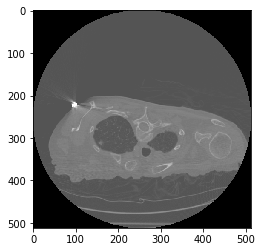

In [115]:
plt.imshow(imgs[0],cmap="gray")

In [231]:
n

array([[ 0.,  0.,  0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ..., -0., -0., -0.],
       [-0., -0.,  0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ...,  0.,  0.,  0.]], dtype=float32)

In [ ]:
import numpy
# x is your dataset
x = numpy.random.rand(100, 5)
numpy.random.shuffle(x)
training, test = x[:80,:], x[80:,:]

In [11]:
len(file_list1)

1351

In [12]:
len(file_list0)

5499

In [13]:
file_list0_a,file_list0_b=file_list0[:5000],file_list0[5000:]
file_list1_a,file_list1_b=file_list1[:1200],file_list1[1200:]

In [14]:
len(file_list1_b)

151

In [39]:
def nodule(file_list):
 for count, fname in enumerate(file_list):
    print(count)
    print ("working on file ", fname)
    imgs_to_process=np.load(fname)
    masks = np.load(fname.replace("images","masks"))
    pos = np.load(fname.replace("images","pos"))
#    print (pos)
    w=pos[1][1]-pos[1][0]
    h=pos[0][1]-pos[0][0]
#    print(w,h)
    try:
        out = np.ndarray([3,w,h])
    except ValueError:
        continue
    for i in range(len(imgs_to_process)):
        mask = masks[i]
        img = imgs_to_process[i]# we're scaling back up to the original size of the image
        new=mask*img
        new=new[pos[1][0]:pos[1][1],pos[0][0]:pos[0][1]]
        out= new 
        name= f+str(count)+"_"+str(i)+".png"
        print (name)
        matplotlib.image.imsave(name, out,cmap="gray")
 #       cv2.imwrite("/home/atul/major/data_all/train/0/{}_{}".format(count,i),out)
#        np.save("/home/atul/major/data_all/test/1/{}_{}".format(count,i),out)

In [40]:
f="/home/atul/major/data_all/train/0/"
nodule(file_list0_a)

0
working on file  /home/atul/major/data_all/0/images_0671_296000.npy
/home/atul/major/data_all/train/0/0_0.png
/home/atul/major/data_all/train/0/0_1.png
/home/atul/major/data_all/train/0/0_2.png
1
working on file  /home/atul/major/data_all/0/images_0163_307500.npy
/home/atul/major/data_all/train/0/1_0.png
/home/atul/major/data_all/train/0/1_1.png
/home/atul/major/data_all/train/0/1_2.png
2
working on file  /home/atul/major/data_all/0/images_0058_65700.npy
/home/atul/major/data_all/train/0/2_0.png
/home/atul/major/data_all/train/0/2_1.png
/home/atul/major/data_all/train/0/2_2.png
3
working on file  /home/atul/major/data_all/0/images_0229_297200.npy
/home/atul/major/data_all/train/0/3_0.png
/home/atul/major/data_all/train/0/3_1.png
/home/atul/major/data_all/train/0/3_2.png
4
working on file  /home/atul/major/data_all/0/images_0405_306100.npy
/home/atul/major/data_all/train/0/4_0.png
/home/atul/major/data_all/train/0/4_1.png
/home/atul/major/data_all/train/0/4_2.png
5
working on file  /h

/home/atul/major/data_all/train/0/42_2.png
43
working on file  /home/atul/major/data_all/0/images_0886_405800.npy
/home/atul/major/data_all/train/0/43_0.png
/home/atul/major/data_all/train/0/43_1.png
/home/atul/major/data_all/train/0/43_2.png
44
working on file  /home/atul/major/data_all/0/images_0029_342500.npy
/home/atul/major/data_all/train/0/44_0.png
/home/atul/major/data_all/train/0/44_1.png
/home/atul/major/data_all/train/0/44_2.png
45
working on file  /home/atul/major/data_all/0/images_0286_169900.npy
/home/atul/major/data_all/train/0/45_0.png
/home/atul/major/data_all/train/0/45_1.png
/home/atul/major/data_all/train/0/45_2.png
46
working on file  /home/atul/major/data_all/0/images_0586_336000.npy
/home/atul/major/data_all/train/0/46_0.png
/home/atul/major/data_all/train/0/46_1.png
/home/atul/major/data_all/train/0/46_2.png
47
working on file  /home/atul/major/data_all/0/images_0744_231100.npy
/home/atul/major/data_all/train/0/47_0.png
/home/atul/major/data_all/train/0/47_1.png


/home/atul/major/data_all/train/0/84_2.png
85
working on file  /home/atul/major/data_all/0/images_0408_351500.npy
/home/atul/major/data_all/train/0/85_0.png
/home/atul/major/data_all/train/0/85_1.png
/home/atul/major/data_all/train/0/85_2.png
86
working on file  /home/atul/major/data_all/0/images_0524_502300.npy
/home/atul/major/data_all/train/0/86_0.png
/home/atul/major/data_all/train/0/86_1.png
/home/atul/major/data_all/train/0/86_2.png
87
working on file  /home/atul/major/data_all/0/images_0056_57300.npy
/home/atul/major/data_all/train/0/87_0.png
/home/atul/major/data_all/train/0/87_1.png
/home/atul/major/data_all/train/0/87_2.png
88
working on file  /home/atul/major/data_all/0/images_0101_475100.npy
/home/atul/major/data_all/train/0/88_0.png
/home/atul/major/data_all/train/0/88_1.png
/home/atul/major/data_all/train/0/88_2.png
89
working on file  /home/atul/major/data_all/0/images_0386_196400.npy
/home/atul/major/data_all/train/0/89_0.png
/home/atul/major/data_all/train/0/89_1.png
/

126
working on file  /home/atul/major/data_all/0/images_0644_26700.npy
/home/atul/major/data_all/train/0/126_0.png
/home/atul/major/data_all/train/0/126_1.png
/home/atul/major/data_all/train/0/126_2.png
127
working on file  /home/atul/major/data_all/0/images_0206_181000.npy
/home/atul/major/data_all/train/0/127_0.png
/home/atul/major/data_all/train/0/127_1.png
/home/atul/major/data_all/train/0/127_2.png
128
working on file  /home/atul/major/data_all/0/images_0173_26000.npy
/home/atul/major/data_all/train/0/128_0.png
/home/atul/major/data_all/train/0/128_1.png
/home/atul/major/data_all/train/0/128_2.png
129
working on file  /home/atul/major/data_all/0/images_0601_424900.npy
/home/atul/major/data_all/train/0/129_0.png
/home/atul/major/data_all/train/0/129_1.png
/home/atul/major/data_all/train/0/129_2.png
130
working on file  /home/atul/major/data_all/0/images_0069_191200.npy
/home/atul/major/data_all/train/0/130_0.png
/home/atul/major/data_all/train/0/130_1.png
/home/atul/major/data_all/

/home/atul/major/data_all/train/0/166_2.png
167
working on file  /home/atul/major/data_all/0/images_0839_224500.npy
/home/atul/major/data_all/train/0/167_0.png
/home/atul/major/data_all/train/0/167_1.png
/home/atul/major/data_all/train/0/167_2.png
168
working on file  /home/atul/major/data_all/0/images_0842_239100.npy
/home/atul/major/data_all/train/0/168_0.png
/home/atul/major/data_all/train/0/168_1.png
/home/atul/major/data_all/train/0/168_2.png
169
working on file  /home/atul/major/data_all/0/images_0582_308700.npy
/home/atul/major/data_all/train/0/169_0.png
/home/atul/major/data_all/train/0/169_1.png
/home/atul/major/data_all/train/0/169_2.png
170
working on file  /home/atul/major/data_all/0/images_0509_400200.npy
/home/atul/major/data_all/train/0/170_0.png
/home/atul/major/data_all/train/0/170_1.png
/home/atul/major/data_all/train/0/170_2.png
171
working on file  /home/atul/major/data_all/0/images_0058_65800.npy
/home/atul/major/data_all/train/0/171_0.png
/home/atul/major/data_all

/home/atul/major/data_all/train/0/208_0.png
/home/atul/major/data_all/train/0/208_1.png
/home/atul/major/data_all/train/0/208_2.png
209
working on file  /home/atul/major/data_all/0/images_0145_372500.npy
/home/atul/major/data_all/train/0/209_0.png
/home/atul/major/data_all/train/0/209_1.png
/home/atul/major/data_all/train/0/209_2.png
210
working on file  /home/atul/major/data_all/0/images_0228_296500.npy
/home/atul/major/data_all/train/0/210_0.png
/home/atul/major/data_all/train/0/210_1.png
/home/atul/major/data_all/train/0/210_2.png
211
working on file  /home/atul/major/data_all/0/images_0347_547600.npy
/home/atul/major/data_all/train/0/211_0.png
/home/atul/major/data_all/train/0/211_1.png
/home/atul/major/data_all/train/0/211_2.png
212
working on file  /home/atul/major/data_all/0/images_0500_329900.npy
/home/atul/major/data_all/train/0/212_0.png
/home/atul/major/data_all/train/0/212_1.png
/home/atul/major/data_all/train/0/212_2.png
213
working on file  /home/atul/major/data_all/0/ima

/home/atul/major/data_all/train/0/250_2.png
251
working on file  /home/atul/major/data_all/0/images_0433_511100.npy
/home/atul/major/data_all/train/0/251_0.png
/home/atul/major/data_all/train/0/251_1.png
/home/atul/major/data_all/train/0/251_2.png
252
working on file  /home/atul/major/data_all/0/images_0735_193800.npy
/home/atul/major/data_all/train/0/252_0.png
/home/atul/major/data_all/train/0/252_1.png
/home/atul/major/data_all/train/0/252_2.png
253
working on file  /home/atul/major/data_all/0/images_0493_268300.npy
/home/atul/major/data_all/train/0/253_0.png
/home/atul/major/data_all/train/0/253_1.png
/home/atul/major/data_all/train/0/253_2.png
254
working on file  /home/atul/major/data_all/0/images_0172_25100.npy
/home/atul/major/data_all/train/0/254_0.png
/home/atul/major/data_all/train/0/254_1.png
/home/atul/major/data_all/train/0/254_2.png
255
working on file  /home/atul/major/data_all/0/images_0364_45500.npy
/home/atul/major/data_all/train/0/255_0.png
/home/atul/major/data_all/

291
working on file  /home/atul/major/data_all/0/images_0861_375200.npy
/home/atul/major/data_all/train/0/291_0.png
/home/atul/major/data_all/train/0/291_1.png
/home/atul/major/data_all/train/0/291_2.png
292
working on file  /home/atul/major/data_all/0/images_0868_424600.npy
/home/atul/major/data_all/train/0/292_0.png
/home/atul/major/data_all/train/0/292_1.png
/home/atul/major/data_all/train/0/292_2.png
293
working on file  /home/atul/major/data_all/0/images_0786_508500.npy
/home/atul/major/data_all/train/0/293_0.png
/home/atul/major/data_all/train/0/293_1.png
/home/atul/major/data_all/train/0/293_2.png
294
working on file  /home/atul/major/data_all/0/images_0245_452700.npy
/home/atul/major/data_all/train/0/294_0.png
/home/atul/major/data_all/train/0/294_1.png
/home/atul/major/data_all/train/0/294_2.png
295
working on file  /home/atul/major/data_all/0/images_0536_13500.npy
/home/atul/major/data_all/train/0/295_0.png
/home/atul/major/data_all/train/0/295_1.png
/home/atul/major/data_all

333
working on file  /home/atul/major/data_all/0/images_0133_129000.npy
/home/atul/major/data_all/train/0/333_0.png
/home/atul/major/data_all/train/0/333_1.png
/home/atul/major/data_all/train/0/333_2.png
334
working on file  /home/atul/major/data_all/0/images_0609_470200.npy
/home/atul/major/data_all/train/0/334_0.png
/home/atul/major/data_all/train/0/334_1.png
/home/atul/major/data_all/train/0/334_2.png
335
working on file  /home/atul/major/data_all/0/images_0491_266000.npy
/home/atul/major/data_all/train/0/335_0.png
/home/atul/major/data_all/train/0/335_1.png
/home/atul/major/data_all/train/0/335_2.png
336
working on file  /home/atul/major/data_all/0/images_0243_444300.npy
/home/atul/major/data_all/train/0/336_0.png
/home/atul/major/data_all/train/0/336_1.png
/home/atul/major/data_all/train/0/336_2.png
337
working on file  /home/atul/major/data_all/0/images_0841_237800.npy
/home/atul/major/data_all/train/0/337_0.png
/home/atul/major/data_all/train/0/337_1.png
/home/atul/major/data_al

/home/atul/major/data_all/train/0/374_0.png
/home/atul/major/data_all/train/0/374_1.png
/home/atul/major/data_all/train/0/374_2.png
375
working on file  /home/atul/major/data_all/0/images_0842_239000.npy
/home/atul/major/data_all/train/0/375_0.png
/home/atul/major/data_all/train/0/375_1.png
/home/atul/major/data_all/train/0/375_2.png
376
working on file  /home/atul/major/data_all/0/images_0720_110400.npy
/home/atul/major/data_all/train/0/376_0.png
/home/atul/major/data_all/train/0/376_1.png
/home/atul/major/data_all/train/0/376_2.png
377
working on file  /home/atul/major/data_all/0/images_0805_36900.npy
/home/atul/major/data_all/train/0/377_0.png
/home/atul/major/data_all/train/0/377_1.png
/home/atul/major/data_all/train/0/377_2.png
378
working on file  /home/atul/major/data_all/0/images_0593_383200.npy
/home/atul/major/data_all/train/0/378_0.png
/home/atul/major/data_all/train/0/378_1.png
/home/atul/major/data_all/train/0/378_2.png
379
working on file  /home/atul/major/data_all/0/imag

/home/atul/major/data_all/train/0/415_0.png
/home/atul/major/data_all/train/0/415_1.png
/home/atul/major/data_all/train/0/415_2.png
416
working on file  /home/atul/major/data_all/0/images_0447_2000.npy
/home/atul/major/data_all/train/0/416_0.png
/home/atul/major/data_all/train/0/416_1.png
/home/atul/major/data_all/train/0/416_2.png
417
working on file  /home/atul/major/data_all/0/images_0833_177400.npy
/home/atul/major/data_all/train/0/417_0.png
/home/atul/major/data_all/train/0/417_1.png
/home/atul/major/data_all/train/0/417_2.png
418
working on file  /home/atul/major/data_all/0/images_0719_100100.npy
/home/atul/major/data_all/train/0/418_0.png
/home/atul/major/data_all/train/0/418_1.png
/home/atul/major/data_all/train/0/418_2.png
419
working on file  /home/atul/major/data_all/0/images_0195_140300.npy
/home/atul/major/data_all/train/0/419_0.png
/home/atul/major/data_all/train/0/419_1.png
/home/atul/major/data_all/train/0/419_2.png
420
working on file  /home/atul/major/data_all/0/image

/home/atul/major/data_all/train/0/458_0.png
/home/atul/major/data_all/train/0/458_1.png
/home/atul/major/data_all/train/0/458_2.png
459
working on file  /home/atul/major/data_all/0/images_0264_349600.npy
/home/atul/major/data_all/train/0/459_0.png
/home/atul/major/data_all/train/0/459_1.png
/home/atul/major/data_all/train/0/459_2.png
460
working on file  /home/atul/major/data_all/0/images_0571_249100.npy
/home/atul/major/data_all/train/0/460_0.png
/home/atul/major/data_all/train/0/460_1.png
/home/atul/major/data_all/train/0/460_2.png
461
working on file  /home/atul/major/data_all/0/images_0656_233200.npy
/home/atul/major/data_all/train/0/461_0.png
/home/atul/major/data_all/train/0/461_1.png
/home/atul/major/data_all/train/0/461_2.png
462
working on file  /home/atul/major/data_all/0/images_0659_242500.npy
/home/atul/major/data_all/train/0/462_0.png
/home/atul/major/data_all/train/0/462_1.png
/home/atul/major/data_all/train/0/462_2.png
463
working on file  /home/atul/major/data_all/0/ima

501
working on file  /home/atul/major/data_all/0/images_0848_282900.npy
/home/atul/major/data_all/train/0/501_0.png
/home/atul/major/data_all/train/0/501_1.png
/home/atul/major/data_all/train/0/501_2.png
502
working on file  /home/atul/major/data_all/0/images_0646_135800.npy
/home/atul/major/data_all/train/0/502_0.png
/home/atul/major/data_all/train/0/502_1.png
/home/atul/major/data_all/train/0/502_2.png
503
working on file  /home/atul/major/data_all/0/images_0379_157600.npy
/home/atul/major/data_all/train/0/503_0.png
/home/atul/major/data_all/train/0/503_1.png
/home/atul/major/data_all/train/0/503_2.png
504
working on file  /home/atul/major/data_all/0/images_0795_551000.npy
/home/atul/major/data_all/train/0/504_0.png
/home/atul/major/data_all/train/0/504_1.png
/home/atul/major/data_all/train/0/504_2.png
505
working on file  /home/atul/major/data_all/0/images_0614_496500.npy
/home/atul/major/data_all/train/0/505_0.png
/home/atul/major/data_all/train/0/505_1.png
/home/atul/major/data_al

/home/atul/major/data_all/train/0/542_1.png
/home/atul/major/data_all/train/0/542_2.png
543
working on file  /home/atul/major/data_all/0/images_0800_236200.npy
/home/atul/major/data_all/train/0/543_0.png
/home/atul/major/data_all/train/0/543_1.png
/home/atul/major/data_all/train/0/543_2.png
544
working on file  /home/atul/major/data_all/0/images_0476_162700.npy
/home/atul/major/data_all/train/0/544_0.png
/home/atul/major/data_all/train/0/544_1.png
/home/atul/major/data_all/train/0/544_2.png
545
working on file  /home/atul/major/data_all/0/images_0415_390400.npy
/home/atul/major/data_all/train/0/545_0.png
/home/atul/major/data_all/train/0/545_1.png
/home/atul/major/data_all/train/0/545_2.png
546
working on file  /home/atul/major/data_all/0/images_0729_179100.npy
/home/atul/major/data_all/train/0/546_0.png
/home/atul/major/data_all/train/0/546_1.png
/home/atul/major/data_all/train/0/546_2.png
547
working on file  /home/atul/major/data_all/0/images_0262_71200.npy
/home/atul/major/data_all

/home/atul/major/data_all/train/0/584_1.png
/home/atul/major/data_all/train/0/584_2.png
585
working on file  /home/atul/major/data_all/0/images_0165_316300.npy
/home/atul/major/data_all/train/0/585_0.png
/home/atul/major/data_all/train/0/585_1.png
/home/atul/major/data_all/train/0/585_2.png
586
working on file  /home/atul/major/data_all/0/images_0521_489500.npy
/home/atul/major/data_all/train/0/586_0.png
/home/atul/major/data_all/train/0/586_1.png
/home/atul/major/data_all/train/0/586_2.png
587
working on file  /home/atul/major/data_all/0/images_0586_335800.npy
/home/atul/major/data_all/train/0/587_0.png
/home/atul/major/data_all/train/0/587_1.png
/home/atul/major/data_all/train/0/587_2.png
588
working on file  /home/atul/major/data_all/0/images_0131_121200.npy
/home/atul/major/data_all/train/0/588_0.png
/home/atul/major/data_all/train/0/588_1.png
/home/atul/major/data_all/train/0/588_2.png
589
working on file  /home/atul/major/data_all/0/images_0399_270300.npy
/home/atul/major/data_al

/home/atul/major/data_all/train/0/627_0.png
/home/atul/major/data_all/train/0/627_1.png
/home/atul/major/data_all/train/0/627_2.png
628
working on file  /home/atul/major/data_all/0/images_0706_542700.npy
/home/atul/major/data_all/train/0/628_0.png
/home/atul/major/data_all/train/0/628_1.png
/home/atul/major/data_all/train/0/628_2.png
629
working on file  /home/atul/major/data_all/0/images_0689_413700.npy
/home/atul/major/data_all/train/0/629_0.png
/home/atul/major/data_all/train/0/629_1.png
/home/atul/major/data_all/train/0/629_2.png
630
working on file  /home/atul/major/data_all/0/images_0188_89800.npy
/home/atul/major/data_all/train/0/630_0.png
/home/atul/major/data_all/train/0/630_1.png
/home/atul/major/data_all/train/0/630_2.png
631
working on file  /home/atul/major/data_all/0/images_0138_88500.npy
/home/atul/major/data_all/train/0/631_0.png
/home/atul/major/data_all/train/0/631_1.png
/home/atul/major/data_all/train/0/631_2.png
632
working on file  /home/atul/major/data_all/0/image

/home/atul/major/data_all/train/0/671_0.png
/home/atul/major/data_all/train/0/671_1.png
/home/atul/major/data_all/train/0/671_2.png
672
working on file  /home/atul/major/data_all/0/images_0099_455000.npy
/home/atul/major/data_all/train/0/672_0.png
/home/atul/major/data_all/train/0/672_1.png
/home/atul/major/data_all/train/0/672_2.png
673
working on file  /home/atul/major/data_all/0/images_0545_90000.npy
/home/atul/major/data_all/train/0/673_0.png
/home/atul/major/data_all/train/0/673_1.png
/home/atul/major/data_all/train/0/673_2.png
674
working on file  /home/atul/major/data_all/0/images_0373_117400.npy
/home/atul/major/data_all/train/0/674_0.png
/home/atul/major/data_all/train/0/674_1.png
/home/atul/major/data_all/train/0/674_2.png
675
working on file  /home/atul/major/data_all/0/images_0777_456500.npy
/home/atul/major/data_all/train/0/675_0.png
/home/atul/major/data_all/train/0/675_1.png
/home/atul/major/data_all/train/0/675_2.png
676
working on file  /home/atul/major/data_all/0/imag

/home/atul/major/data_all/train/0/714_0.png
/home/atul/major/data_all/train/0/714_1.png
/home/atul/major/data_all/train/0/714_2.png
715
working on file  /home/atul/major/data_all/0/images_0604_437500.npy
/home/atul/major/data_all/train/0/715_0.png
/home/atul/major/data_all/train/0/715_1.png
/home/atul/major/data_all/train/0/715_2.png
716
working on file  /home/atul/major/data_all/0/images_0785_505700.npy
/home/atul/major/data_all/train/0/716_0.png
/home/atul/major/data_all/train/0/716_1.png
/home/atul/major/data_all/train/0/716_2.png
717
working on file  /home/atul/major/data_all/0/images_0475_151500.npy
/home/atul/major/data_all/train/0/717_0.png
/home/atul/major/data_all/train/0/717_1.png
/home/atul/major/data_all/train/0/717_2.png
718
working on file  /home/atul/major/data_all/0/images_0210_207200.npy
/home/atul/major/data_all/train/0/718_0.png
/home/atul/major/data_all/train/0/718_1.png
/home/atul/major/data_all/train/0/718_2.png
719
working on file  /home/atul/major/data_all/0/ima

/home/atul/major/data_all/train/0/755_0.png
/home/atul/major/data_all/train/0/755_1.png
/home/atul/major/data_all/train/0/755_2.png
756
working on file  /home/atul/major/data_all/0/images_0865_410400.npy
/home/atul/major/data_all/train/0/756_0.png
/home/atul/major/data_all/train/0/756_1.png
/home/atul/major/data_all/train/0/756_2.png
757
working on file  /home/atul/major/data_all/0/images_0292_202700.npy
/home/atul/major/data_all/train/0/757_0.png
/home/atul/major/data_all/train/0/757_1.png
/home/atul/major/data_all/train/0/757_2.png
758
working on file  /home/atul/major/data_all/0/images_0087_341000.npy
/home/atul/major/data_all/train/0/758_0.png
/home/atul/major/data_all/train/0/758_1.png
/home/atul/major/data_all/train/0/758_2.png
759
working on file  /home/atul/major/data_all/0/images_0563_138800.npy
/home/atul/major/data_all/train/0/759_0.png
/home/atul/major/data_all/train/0/759_1.png
/home/atul/major/data_all/train/0/759_2.png
760
working on file  /home/atul/major/data_all/0/ima

/home/atul/major/data_all/train/0/796_1.png
/home/atul/major/data_all/train/0/796_2.png
797
working on file  /home/atul/major/data_all/0/images_0564_144700.npy
/home/atul/major/data_all/train/0/797_0.png
/home/atul/major/data_all/train/0/797_1.png
/home/atul/major/data_all/train/0/797_2.png
798
working on file  /home/atul/major/data_all/0/images_0599_405500.npy
/home/atul/major/data_all/train/0/798_0.png
/home/atul/major/data_all/train/0/798_1.png
/home/atul/major/data_all/train/0/798_2.png
799
working on file  /home/atul/major/data_all/0/images_0107_506600.npy
/home/atul/major/data_all/train/0/799_0.png
/home/atul/major/data_all/train/0/799_1.png
/home/atul/major/data_all/train/0/799_2.png
800
working on file  /home/atul/major/data_all/0/images_0005_531500.npy
/home/atul/major/data_all/train/0/800_0.png
/home/atul/major/data_all/train/0/800_1.png
/home/atul/major/data_all/train/0/800_2.png
801
working on file  /home/atul/major/data_all/0/images_0680_346700.npy
/home/atul/major/data_al

838
working on file  /home/atul/major/data_all/0/images_0056_56700.npy
/home/atul/major/data_all/train/0/838_0.png
/home/atul/major/data_all/train/0/838_1.png
/home/atul/major/data_all/train/0/838_2.png
839
working on file  /home/atul/major/data_all/0/images_0844_241900.npy
/home/atul/major/data_all/train/0/839_0.png
/home/atul/major/data_all/train/0/839_1.png
/home/atul/major/data_all/train/0/839_2.png
840
working on file  /home/atul/major/data_all/0/images_0412_367000.npy
/home/atul/major/data_all/train/0/840_0.png
/home/atul/major/data_all/train/0/840_1.png
/home/atul/major/data_all/train/0/840_2.png
841
working on file  /home/atul/major/data_all/0/images_0274_93400.npy
/home/atul/major/data_all/train/0/841_0.png
/home/atul/major/data_all/train/0/841_1.png
/home/atul/major/data_all/train/0/841_2.png
842
working on file  /home/atul/major/data_all/0/images_0709_343200.npy
/home/atul/major/data_all/train/0/842_0.png
/home/atul/major/data_all/train/0/842_1.png
/home/atul/major/data_all/

/home/atul/major/data_all/train/0/878_0.png
/home/atul/major/data_all/train/0/878_1.png
/home/atul/major/data_all/train/0/878_2.png
879
working on file  /home/atul/major/data_all/0/images_0426_441600.npy
/home/atul/major/data_all/train/0/879_0.png
/home/atul/major/data_all/train/0/879_1.png
/home/atul/major/data_all/train/0/879_2.png
880
working on file  /home/atul/major/data_all/0/images_0484_221000.npy
/home/atul/major/data_all/train/0/880_0.png
/home/atul/major/data_all/train/0/880_1.png
/home/atul/major/data_all/train/0/880_2.png
881
working on file  /home/atul/major/data_all/0/images_0858_355200.npy
/home/atul/major/data_all/train/0/881_0.png
/home/atul/major/data_all/train/0/881_1.png
/home/atul/major/data_all/train/0/881_2.png
882
working on file  /home/atul/major/data_all/0/images_0483_220500.npy
/home/atul/major/data_all/train/0/882_0.png
/home/atul/major/data_all/train/0/882_1.png
/home/atul/major/data_all/train/0/882_2.png
883
working on file  /home/atul/major/data_all/0/ima

/home/atul/major/data_all/train/0/920_0.png
/home/atul/major/data_all/train/0/920_1.png
/home/atul/major/data_all/train/0/920_2.png
921
working on file  /home/atul/major/data_all/0/images_0109_19000.npy
/home/atul/major/data_all/train/0/921_0.png
/home/atul/major/data_all/train/0/921_1.png
/home/atul/major/data_all/train/0/921_2.png
922
working on file  /home/atul/major/data_all/0/images_0204_169400.npy
/home/atul/major/data_all/train/0/922_0.png
/home/atul/major/data_all/train/0/922_1.png
/home/atul/major/data_all/train/0/922_2.png
923
working on file  /home/atul/major/data_all/0/images_0208_183100.npy
/home/atul/major/data_all/train/0/923_0.png
/home/atul/major/data_all/train/0/923_1.png
/home/atul/major/data_all/train/0/923_2.png
924
working on file  /home/atul/major/data_all/0/images_0814_92000.npy
/home/atul/major/data_all/train/0/924_0.png
/home/atul/major/data_all/train/0/924_1.png
/home/atul/major/data_all/train/0/924_2.png
925
working on file  /home/atul/major/data_all/0/image

/home/atul/major/data_all/train/0/962_0.png
/home/atul/major/data_all/train/0/962_1.png
/home/atul/major/data_all/train/0/962_2.png
963
working on file  /home/atul/major/data_all/0/images_0648_148300.npy
/home/atul/major/data_all/train/0/963_0.png
/home/atul/major/data_all/train/0/963_1.png
/home/atul/major/data_all/train/0/963_2.png
964
working on file  /home/atul/major/data_all/0/images_0471_136800.npy
/home/atul/major/data_all/train/0/964_0.png
/home/atul/major/data_all/train/0/964_1.png
/home/atul/major/data_all/train/0/964_2.png
965
working on file  /home/atul/major/data_all/0/images_0323_381500.npy
/home/atul/major/data_all/train/0/965_0.png
/home/atul/major/data_all/train/0/965_1.png
/home/atul/major/data_all/train/0/965_2.png
966
working on file  /home/atul/major/data_all/0/images_0650_159900.npy
/home/atul/major/data_all/train/0/966_0.png
/home/atul/major/data_all/train/0/966_1.png
/home/atul/major/data_all/train/0/966_2.png
967
working on file  /home/atul/major/data_all/0/ima

/home/atul/major/data_all/train/0/1002_2.png
1003
working on file  /home/atul/major/data_all/0/images_0869_428600.npy
/home/atul/major/data_all/train/0/1003_0.png
/home/atul/major/data_all/train/0/1003_1.png
/home/atul/major/data_all/train/0/1003_2.png
1004
working on file  /home/atul/major/data_all/0/images_0756_310000.npy
/home/atul/major/data_all/train/0/1004_0.png
/home/atul/major/data_all/train/0/1004_1.png
/home/atul/major/data_all/train/0/1004_2.png
1005
working on file  /home/atul/major/data_all/0/images_0604_437900.npy
/home/atul/major/data_all/train/0/1005_0.png
/home/atul/major/data_all/train/0/1005_1.png
/home/atul/major/data_all/train/0/1005_2.png
1006
working on file  /home/atul/major/data_all/0/images_0310_295800.npy
/home/atul/major/data_all/train/0/1006_0.png
/home/atul/major/data_all/train/0/1006_1.png
/home/atul/major/data_all/train/0/1006_2.png
1007
working on file  /home/atul/major/data_all/0/images_0715_58800.npy
/home/atul/major/data_all/train/0/1007_0.png
/home/

/home/atul/major/data_all/train/0/1043_1.png
/home/atul/major/data_all/train/0/1043_2.png
1044
working on file  /home/atul/major/data_all/0/images_0561_132600.npy
/home/atul/major/data_all/train/0/1044_0.png
/home/atul/major/data_all/train/0/1044_1.png
/home/atul/major/data_all/train/0/1044_2.png
1045
working on file  /home/atul/major/data_all/0/images_0498_315800.npy
/home/atul/major/data_all/train/0/1045_0.png
/home/atul/major/data_all/train/0/1045_1.png
/home/atul/major/data_all/train/0/1045_2.png
1046
working on file  /home/atul/major/data_all/0/images_0271_36100.npy
/home/atul/major/data_all/train/0/1046_0.png
/home/atul/major/data_all/train/0/1046_1.png
/home/atul/major/data_all/train/0/1046_2.png
1047
working on file  /home/atul/major/data_all/0/images_0656_233600.npy
/home/atul/major/data_all/train/0/1047_0.png
/home/atul/major/data_all/train/0/1047_1.png
/home/atul/major/data_all/train/0/1047_2.png
1048
working on file  /home/atul/major/data_all/0/images_0140_108400.npy
/home/

/home/atul/major/data_all/train/0/1085_0.png
/home/atul/major/data_all/train/0/1085_1.png
/home/atul/major/data_all/train/0/1085_2.png
1086
working on file  /home/atul/major/data_all/0/images_0876_497500.npy
/home/atul/major/data_all/train/0/1086_0.png
/home/atul/major/data_all/train/0/1086_1.png
/home/atul/major/data_all/train/0/1086_2.png
1087
working on file  /home/atul/major/data_all/0/images_0186_81400.npy
/home/atul/major/data_all/train/0/1087_0.png
/home/atul/major/data_all/train/0/1087_1.png
/home/atul/major/data_all/train/0/1087_2.png
1088
working on file  /home/atul/major/data_all/0/images_0209_206100.npy
/home/atul/major/data_all/train/0/1088_0.png
/home/atul/major/data_all/train/0/1088_1.png
/home/atul/major/data_all/train/0/1088_2.png
1089
working on file  /home/atul/major/data_all/0/images_0653_209200.npy
/home/atul/major/data_all/train/0/1089_0.png
/home/atul/major/data_all/train/0/1089_1.png
/home/atul/major/data_all/train/0/1089_2.png
1090
working on file  /home/atul/m

/home/atul/major/data_all/train/0/1127_0.png
/home/atul/major/data_all/train/0/1127_1.png
/home/atul/major/data_all/train/0/1127_2.png
1128
working on file  /home/atul/major/data_all/0/images_0439_529300.npy
/home/atul/major/data_all/train/0/1128_0.png
/home/atul/major/data_all/train/0/1128_1.png
/home/atul/major/data_all/train/0/1128_2.png
1129
working on file  /home/atul/major/data_all/0/images_0346_545700.npy
/home/atul/major/data_all/train/0/1129_0.png
/home/atul/major/data_all/train/0/1129_1.png
/home/atul/major/data_all/train/0/1129_2.png
1130
working on file  /home/atul/major/data_all/0/images_0297_193300.npy
/home/atul/major/data_all/train/0/1130_0.png
/home/atul/major/data_all/train/0/1130_1.png
/home/atul/major/data_all/train/0/1130_2.png
1131
working on file  /home/atul/major/data_all/0/images_0066_161800.npy
/home/atul/major/data_all/train/0/1131_0.png
/home/atul/major/data_all/train/0/1131_1.png
/home/atul/major/data_all/train/0/1131_2.png
1132
working on file  /home/atul/

/home/atul/major/data_all/train/0/1167_2.png
1168
working on file  /home/atul/major/data_all/0/images_0550_109400.npy
/home/atul/major/data_all/train/0/1168_0.png
/home/atul/major/data_all/train/0/1168_1.png
/home/atul/major/data_all/train/0/1168_2.png
1169
working on file  /home/atul/major/data_all/0/images_0703_530300.npy
/home/atul/major/data_all/train/0/1169_0.png
/home/atul/major/data_all/train/0/1169_1.png
/home/atul/major/data_all/train/0/1169_2.png
1170
working on file  /home/atul/major/data_all/0/images_0370_104600.npy
/home/atul/major/data_all/train/0/1170_0.png
/home/atul/major/data_all/train/0/1170_1.png
/home/atul/major/data_all/train/0/1170_2.png
1171
working on file  /home/atul/major/data_all/0/images_0495_289000.npy
/home/atul/major/data_all/train/0/1171_0.png
/home/atul/major/data_all/train/0/1171_1.png
/home/atul/major/data_all/train/0/1171_2.png
1172
working on file  /home/atul/major/data_all/0/images_0207_181500.npy
/home/atul/major/data_all/train/0/1172_0.png
/home

/home/atul/major/data_all/train/0/1209_1.png
/home/atul/major/data_all/train/0/1209_2.png
1210
working on file  /home/atul/major/data_all/0/images_0678_324700.npy
/home/atul/major/data_all/train/0/1210_0.png
/home/atul/major/data_all/train/0/1210_1.png
/home/atul/major/data_all/train/0/1210_2.png
1211
working on file  /home/atul/major/data_all/0/images_0390_204800.npy
/home/atul/major/data_all/train/0/1211_0.png
/home/atul/major/data_all/train/0/1211_1.png
/home/atul/major/data_all/train/0/1211_2.png
1212
working on file  /home/atul/major/data_all/0/images_0290_143700.npy
/home/atul/major/data_all/train/0/1212_0.png
/home/atul/major/data_all/train/0/1212_1.png
/home/atul/major/data_all/train/0/1212_2.png
1213
working on file  /home/atul/major/data_all/0/images_0024_39800.npy
/home/atul/major/data_all/train/0/1213_0.png
/home/atul/major/data_all/train/0/1213_1.png
/home/atul/major/data_all/train/0/1213_2.png
1214
working on file  /home/atul/major/data_all/0/images_0810_67700.npy
/home/a

/home/atul/major/data_all/train/0/1249_0.png
/home/atul/major/data_all/train/0/1249_1.png
/home/atul/major/data_all/train/0/1249_2.png
1250
working on file  /home/atul/major/data_all/0/images_0075_243600.npy
/home/atul/major/data_all/train/0/1250_0.png
/home/atul/major/data_all/train/0/1250_1.png
/home/atul/major/data_all/train/0/1250_2.png
1251
working on file  /home/atul/major/data_all/0/images_0849_297800.npy
/home/atul/major/data_all/train/0/1251_0.png
/home/atul/major/data_all/train/0/1251_1.png
/home/atul/major/data_all/train/0/1251_2.png
1252
working on file  /home/atul/major/data_all/0/images_0651_176500.npy
/home/atul/major/data_all/train/0/1252_0.png
/home/atul/major/data_all/train/0/1252_1.png
/home/atul/major/data_all/train/0/1252_2.png
1253
working on file  /home/atul/major/data_all/0/images_0241_394300.npy
/home/atul/major/data_all/train/0/1253_0.png
/home/atul/major/data_all/train/0/1253_1.png
/home/atul/major/data_all/train/0/1253_2.png
1254
working on file  /home/atul/

1291
working on file  /home/atul/major/data_all/0/images_0802_18100.npy
/home/atul/major/data_all/train/0/1291_0.png
/home/atul/major/data_all/train/0/1291_1.png
/home/atul/major/data_all/train/0/1291_2.png
1292
working on file  /home/atul/major/data_all/0/images_0569_247400.npy
/home/atul/major/data_all/train/0/1292_0.png
/home/atul/major/data_all/train/0/1292_1.png
/home/atul/major/data_all/train/0/1292_2.png
1293
working on file  /home/atul/major/data_all/0/images_0653_209000.npy
/home/atul/major/data_all/train/0/1293_0.png
/home/atul/major/data_all/train/0/1293_1.png
/home/atul/major/data_all/train/0/1293_2.png
1294
working on file  /home/atul/major/data_all/0/images_0183_31400.npy
/home/atul/major/data_all/train/0/1294_0.png
/home/atul/major/data_all/train/0/1294_1.png
/home/atul/major/data_all/train/0/1294_2.png
1295
working on file  /home/atul/major/data_all/0/images_0085_326300.npy
/home/atul/major/data_all/train/0/1295_0.png
/home/atul/major/data_all/train/0/1295_1.png
/home/a

/home/atul/major/data_all/train/0/1332_1.png
/home/atul/major/data_all/train/0/1332_2.png
1333
working on file  /home/atul/major/data_all/0/images_0430_485900.npy
/home/atul/major/data_all/train/0/1333_0.png
/home/atul/major/data_all/train/0/1333_1.png
/home/atul/major/data_all/train/0/1333_2.png
1334
working on file  /home/atul/major/data_all/0/images_0531_336900.npy
/home/atul/major/data_all/train/0/1334_0.png
/home/atul/major/data_all/train/0/1334_1.png
/home/atul/major/data_all/train/0/1334_2.png
1335
working on file  /home/atul/major/data_all/0/images_0717_92900.npy
/home/atul/major/data_all/train/0/1335_0.png
/home/atul/major/data_all/train/0/1335_1.png
/home/atul/major/data_all/train/0/1335_2.png
1336
working on file  /home/atul/major/data_all/0/images_0246_459900.npy
/home/atul/major/data_all/train/0/1336_0.png
/home/atul/major/data_all/train/0/1336_1.png
/home/atul/major/data_all/train/0/1336_2.png
1337
working on file  /home/atul/major/data_all/0/images_0257_538800.npy
1338
w

/home/atul/major/data_all/train/0/1373_1.png
/home/atul/major/data_all/train/0/1373_2.png
1374
working on file  /home/atul/major/data_all/0/images_0093_399800.npy
/home/atul/major/data_all/train/0/1374_0.png
/home/atul/major/data_all/train/0/1374_1.png
/home/atul/major/data_all/train/0/1374_2.png
1375
working on file  /home/atul/major/data_all/0/images_0580_284300.npy
/home/atul/major/data_all/train/0/1375_0.png
/home/atul/major/data_all/train/0/1375_1.png
/home/atul/major/data_all/train/0/1375_2.png
1376
working on file  /home/atul/major/data_all/0/images_0570_247600.npy
/home/atul/major/data_all/train/0/1376_0.png
/home/atul/major/data_all/train/0/1376_1.png
/home/atul/major/data_all/train/0/1376_2.png
1377
working on file  /home/atul/major/data_all/0/images_0144_370000.npy
/home/atul/major/data_all/train/0/1377_0.png
/home/atul/major/data_all/train/0/1377_1.png
/home/atul/major/data_all/train/0/1377_2.png
1378
working on file  /home/atul/major/data_all/0/images_0746_257900.npy
/home

/home/atul/major/data_all/train/0/1414_0.png
/home/atul/major/data_all/train/0/1414_1.png
/home/atul/major/data_all/train/0/1414_2.png
1415
working on file  /home/atul/major/data_all/0/images_0396_245100.npy
/home/atul/major/data_all/train/0/1415_0.png
/home/atul/major/data_all/train/0/1415_1.png
/home/atul/major/data_all/train/0/1415_2.png
1416
working on file  /home/atul/major/data_all/0/images_0884_291900.npy
/home/atul/major/data_all/train/0/1416_0.png
/home/atul/major/data_all/train/0/1416_1.png
/home/atul/major/data_all/train/0/1416_2.png
1417
working on file  /home/atul/major/data_all/0/images_0020_380600.npy
/home/atul/major/data_all/train/0/1417_0.png
/home/atul/major/data_all/train/0/1417_1.png
/home/atul/major/data_all/train/0/1417_2.png
1418
working on file  /home/atul/major/data_all/0/images_0784_491100.npy
/home/atul/major/data_all/train/0/1418_0.png
/home/atul/major/data_all/train/0/1418_1.png
/home/atul/major/data_all/train/0/1418_2.png
1419
working on file  /home/atul/

/home/atul/major/data_all/train/0/1456_0.png
/home/atul/major/data_all/train/0/1456_1.png
/home/atul/major/data_all/train/0/1456_2.png
1457
working on file  /home/atul/major/data_all/0/images_0536_13600.npy
/home/atul/major/data_all/train/0/1457_0.png
/home/atul/major/data_all/train/0/1457_1.png
/home/atul/major/data_all/train/0/1457_2.png
1458
working on file  /home/atul/major/data_all/0/images_0736_250300.npy
/home/atul/major/data_all/train/0/1458_0.png
/home/atul/major/data_all/train/0/1458_1.png
/home/atul/major/data_all/train/0/1458_2.png
1459
working on file  /home/atul/major/data_all/0/images_0711_473700.npy
/home/atul/major/data_all/train/0/1459_0.png
/home/atul/major/data_all/train/0/1459_1.png
/home/atul/major/data_all/train/0/1459_2.png
1460
working on file  /home/atul/major/data_all/0/images_0640_114600.npy
/home/atul/major/data_all/train/0/1460_0.png
/home/atul/major/data_all/train/0/1460_1.png
/home/atul/major/data_all/train/0/1460_2.png
1461
working on file  /home/atul/m

/home/atul/major/data_all/train/0/1498_0.png
/home/atul/major/data_all/train/0/1498_1.png
/home/atul/major/data_all/train/0/1498_2.png
1499
working on file  /home/atul/major/data_all/0/images_0075_243300.npy
/home/atul/major/data_all/train/0/1499_0.png
/home/atul/major/data_all/train/0/1499_1.png
/home/atul/major/data_all/train/0/1499_2.png
1500
working on file  /home/atul/major/data_all/0/images_0168_333200.npy
/home/atul/major/data_all/train/0/1500_0.png
/home/atul/major/data_all/train/0/1500_1.png
/home/atul/major/data_all/train/0/1500_2.png
1501
working on file  /home/atul/major/data_all/0/images_0521_490200.npy
/home/atul/major/data_all/train/0/1501_0.png
/home/atul/major/data_all/train/0/1501_1.png
/home/atul/major/data_all/train/0/1501_2.png
1502
working on file  /home/atul/major/data_all/0/images_0757_329200.npy
/home/atul/major/data_all/train/0/1502_0.png
/home/atul/major/data_all/train/0/1502_1.png
/home/atul/major/data_all/train/0/1502_2.png
1503
working on file  /home/atul/

/home/atul/major/data_all/train/0/1538_1.png
/home/atul/major/data_all/train/0/1538_2.png
1539
working on file  /home/atul/major/data_all/0/images_0326_393500.npy
/home/atul/major/data_all/train/0/1539_0.png
/home/atul/major/data_all/train/0/1539_1.png
/home/atul/major/data_all/train/0/1539_2.png
1540
working on file  /home/atul/major/data_all/0/images_0637_83000.npy
/home/atul/major/data_all/train/0/1540_0.png
/home/atul/major/data_all/train/0/1540_1.png
/home/atul/major/data_all/train/0/1540_2.png
1541
working on file  /home/atul/major/data_all/0/images_0246_459800.npy
/home/atul/major/data_all/train/0/1541_0.png
/home/atul/major/data_all/train/0/1541_1.png
/home/atul/major/data_all/train/0/1541_2.png
1542
working on file  /home/atul/major/data_all/0/images_0605_450800.npy
/home/atul/major/data_all/train/0/1542_0.png
/home/atul/major/data_all/train/0/1542_1.png
/home/atul/major/data_all/train/0/1542_2.png
1543
working on file  /home/atul/major/data_all/0/images_0044_482300.npy
/home/

1579
working on file  /home/atul/major/data_all/0/images_0053_48800.npy
/home/atul/major/data_all/train/0/1579_0.png
/home/atul/major/data_all/train/0/1579_1.png
/home/atul/major/data_all/train/0/1579_2.png
1580
working on file  /home/atul/major/data_all/0/images_0243_443900.npy
/home/atul/major/data_all/train/0/1580_0.png
/home/atul/major/data_all/train/0/1580_1.png
/home/atul/major/data_all/train/0/1580_2.png
1581
working on file  /home/atul/major/data_all/0/images_0667_273400.npy
/home/atul/major/data_all/train/0/1581_0.png
/home/atul/major/data_all/train/0/1581_1.png
/home/atul/major/data_all/train/0/1581_2.png
1582
working on file  /home/atul/major/data_all/0/images_0657_234000.npy
/home/atul/major/data_all/train/0/1582_0.png
/home/atul/major/data_all/train/0/1582_1.png
/home/atul/major/data_all/train/0/1582_2.png
1583
working on file  /home/atul/major/data_all/0/images_0406_319200.npy
/home/atul/major/data_all/train/0/1583_0.png
/home/atul/major/data_all/train/0/1583_1.png
/home/

/home/atul/major/data_all/train/0/1619_2.png
1620
working on file  /home/atul/major/data_all/0/images_0739_199200.npy
/home/atul/major/data_all/train/0/1620_0.png
/home/atul/major/data_all/train/0/1620_1.png
/home/atul/major/data_all/train/0/1620_2.png
1621
working on file  /home/atul/major/data_all/0/images_0607_462000.npy
/home/atul/major/data_all/train/0/1621_0.png
/home/atul/major/data_all/train/0/1621_1.png
/home/atul/major/data_all/train/0/1621_2.png
1622
working on file  /home/atul/major/data_all/0/images_0119_527200.npy
/home/atul/major/data_all/train/0/1622_0.png
/home/atul/major/data_all/train/0/1622_1.png
/home/atul/major/data_all/train/0/1622_2.png
1623
working on file  /home/atul/major/data_all/0/images_0537_30000.npy
/home/atul/major/data_all/train/0/1623_0.png
/home/atul/major/data_all/train/0/1623_1.png
/home/atul/major/data_all/train/0/1623_2.png
1624
working on file  /home/atul/major/data_all/0/images_0029_342000.npy
/home/atul/major/data_all/train/0/1624_0.png
/home/

/home/atul/major/data_all/train/0/1662_0.png
/home/atul/major/data_all/train/0/1662_1.png
/home/atul/major/data_all/train/0/1662_2.png
1663
working on file  /home/atul/major/data_all/0/images_0105_488900.npy
/home/atul/major/data_all/train/0/1663_0.png
/home/atul/major/data_all/train/0/1663_1.png
/home/atul/major/data_all/train/0/1663_2.png
1664
working on file  /home/atul/major/data_all/0/images_0028_319400.npy
/home/atul/major/data_all/train/0/1664_0.png
/home/atul/major/data_all/train/0/1664_1.png
/home/atul/major/data_all/train/0/1664_2.png
1665
working on file  /home/atul/major/data_all/0/images_0525_521400.npy
/home/atul/major/data_all/train/0/1665_0.png
/home/atul/major/data_all/train/0/1665_1.png
/home/atul/major/data_all/train/0/1665_2.png
1666
working on file  /home/atul/major/data_all/0/images_0535_12700.npy
/home/atul/major/data_all/train/0/1666_0.png
/home/atul/major/data_all/train/0/1666_1.png
/home/atul/major/data_all/train/0/1666_2.png
1667
working on file  /home/atul/m

/home/atul/major/data_all/train/0/1704_2.png
1705
working on file  /home/atul/major/data_all/0/images_0436_516100.npy
/home/atul/major/data_all/train/0/1705_0.png
/home/atul/major/data_all/train/0/1705_1.png
/home/atul/major/data_all/train/0/1705_2.png
1706
working on file  /home/atul/major/data_all/0/images_0341_520700.npy
/home/atul/major/data_all/train/0/1706_0.png
/home/atul/major/data_all/train/0/1706_1.png
/home/atul/major/data_all/train/0/1706_2.png
1707
working on file  /home/atul/major/data_all/0/images_0820_134800.npy
/home/atul/major/data_all/train/0/1707_0.png
/home/atul/major/data_all/train/0/1707_1.png
/home/atul/major/data_all/train/0/1707_2.png
1708
working on file  /home/atul/major/data_all/0/images_0560_127900.npy
/home/atul/major/data_all/train/0/1708_0.png
/home/atul/major/data_all/train/0/1708_1.png
/home/atul/major/data_all/train/0/1708_2.png
1709
working on file  /home/atul/major/data_all/0/images_0722_123400.npy
/home/atul/major/data_all/train/0/1709_0.png
/home

/home/atul/major/data_all/train/0/1746_0.png
/home/atul/major/data_all/train/0/1746_1.png
/home/atul/major/data_all/train/0/1746_2.png
1747
working on file  /home/atul/major/data_all/0/images_0162_293100.npy
/home/atul/major/data_all/train/0/1747_0.png
/home/atul/major/data_all/train/0/1747_1.png
/home/atul/major/data_all/train/0/1747_2.png
1748
working on file  /home/atul/major/data_all/0/images_0694_464700.npy
/home/atul/major/data_all/train/0/1748_0.png
/home/atul/major/data_all/train/0/1748_1.png
/home/atul/major/data_all/train/0/1748_2.png
1749
working on file  /home/atul/major/data_all/0/images_0758_330900.npy
/home/atul/major/data_all/train/0/1749_0.png
/home/atul/major/data_all/train/0/1749_1.png
/home/atul/major/data_all/train/0/1749_2.png
1750
working on file  /home/atul/major/data_all/0/images_0849_298100.npy
/home/atul/major/data_all/train/0/1750_0.png
/home/atul/major/data_all/train/0/1750_1.png
/home/atul/major/data_all/train/0/1750_2.png
1751
working on file  /home/atul/

/home/atul/major/data_all/train/0/1786_0.png
/home/atul/major/data_all/train/0/1786_1.png
/home/atul/major/data_all/train/0/1786_2.png
1787
working on file  /home/atul/major/data_all/0/images_0777_456600.npy
/home/atul/major/data_all/train/0/1787_0.png
/home/atul/major/data_all/train/0/1787_1.png
/home/atul/major/data_all/train/0/1787_2.png
1788
working on file  /home/atul/major/data_all/0/images_0735_194300.npy
/home/atul/major/data_all/train/0/1788_0.png
/home/atul/major/data_all/train/0/1788_1.png
/home/atul/major/data_all/train/0/1788_2.png
1789
working on file  /home/atul/major/data_all/0/images_0256_537000.npy
/home/atul/major/data_all/train/0/1789_0.png
/home/atul/major/data_all/train/0/1789_1.png
/home/atul/major/data_all/train/0/1789_2.png
1790
working on file  /home/atul/major/data_all/0/images_0378_88800.npy
/home/atul/major/data_all/train/0/1790_0.png
/home/atul/major/data_all/train/0/1790_1.png
/home/atul/major/data_all/train/0/1790_2.png
1791
working on file  /home/atul/m

/home/atul/major/data_all/train/0/1827_0.png
/home/atul/major/data_all/train/0/1827_1.png
/home/atul/major/data_all/train/0/1827_2.png
1828
working on file  /home/atul/major/data_all/0/images_0441_303600.npy
/home/atul/major/data_all/train/0/1828_0.png
/home/atul/major/data_all/train/0/1828_1.png
/home/atul/major/data_all/train/0/1828_2.png
1829
working on file  /home/atul/major/data_all/0/images_0061_76700.npy
/home/atul/major/data_all/train/0/1829_0.png
/home/atul/major/data_all/train/0/1829_1.png
/home/atul/major/data_all/train/0/1829_2.png
1830
working on file  /home/atul/major/data_all/0/images_0034_439000.npy
/home/atul/major/data_all/train/0/1830_0.png
/home/atul/major/data_all/train/0/1830_1.png
/home/atul/major/data_all/train/0/1830_2.png
1831
working on file  /home/atul/major/data_all/0/images_0244_449200.npy
/home/atul/major/data_all/train/0/1831_0.png
/home/atul/major/data_all/train/0/1831_1.png
/home/atul/major/data_all/train/0/1831_2.png
1832
working on file  /home/atul/m

/home/atul/major/data_all/train/0/1868_2.png
1869
working on file  /home/atul/major/data_all/0/images_0099_454600.npy
/home/atul/major/data_all/train/0/1869_0.png
/home/atul/major/data_all/train/0/1869_1.png
/home/atul/major/data_all/train/0/1869_2.png
1870
working on file  /home/atul/major/data_all/0/images_0875_493500.npy
/home/atul/major/data_all/train/0/1870_0.png
/home/atul/major/data_all/train/0/1870_1.png
/home/atul/major/data_all/train/0/1870_2.png
1871
working on file  /home/atul/major/data_all/0/images_0783_487400.npy
/home/atul/major/data_all/train/0/1871_0.png
/home/atul/major/data_all/train/0/1871_1.png
/home/atul/major/data_all/train/0/1871_2.png
1872
working on file  /home/atul/major/data_all/0/images_0443_427900.npy
/home/atul/major/data_all/train/0/1872_0.png
/home/atul/major/data_all/train/0/1872_1.png
/home/atul/major/data_all/train/0/1872_2.png
1873
working on file  /home/atul/major/data_all/0/images_0636_77200.npy
/home/atul/major/data_all/train/0/1873_0.png
/home/

/home/atul/major/data_all/train/0/1910_0.png
/home/atul/major/data_all/train/0/1910_1.png
/home/atul/major/data_all/train/0/1910_2.png
1911
working on file  /home/atul/major/data_all/0/images_0452_21100.npy
/home/atul/major/data_all/train/0/1911_0.png
/home/atul/major/data_all/train/0/1911_1.png
/home/atul/major/data_all/train/0/1911_2.png
1912
working on file  /home/atul/major/data_all/0/images_0069_191600.npy
/home/atul/major/data_all/train/0/1912_0.png
/home/atul/major/data_all/train/0/1912_1.png
/home/atul/major/data_all/train/0/1912_2.png
1913
working on file  /home/atul/major/data_all/0/images_0765_350500.npy
/home/atul/major/data_all/train/0/1913_0.png
/home/atul/major/data_all/train/0/1913_1.png
/home/atul/major/data_all/train/0/1913_2.png
1914
working on file  /home/atul/major/data_all/0/images_0091_13000.npy
/home/atul/major/data_all/train/0/1914_0.png
/home/atul/major/data_all/train/0/1914_1.png
/home/atul/major/data_all/train/0/1914_2.png
1915
working on file  /home/atul/ma

1950
working on file  /home/atul/major/data_all/0/images_0747_266600.npy
/home/atul/major/data_all/train/0/1950_0.png
/home/atul/major/data_all/train/0/1950_1.png
/home/atul/major/data_all/train/0/1950_2.png
1951
working on file  /home/atul/major/data_all/0/images_0416_402300.npy
/home/atul/major/data_all/train/0/1951_0.png
/home/atul/major/data_all/train/0/1951_1.png
/home/atul/major/data_all/train/0/1951_2.png
1952
working on file  /home/atul/major/data_all/0/images_0470_112700.npy
/home/atul/major/data_all/train/0/1952_0.png
/home/atul/major/data_all/train/0/1952_1.png
/home/atul/major/data_all/train/0/1952_2.png
1953
working on file  /home/atul/major/data_all/0/images_0280_130300.npy
/home/atul/major/data_all/train/0/1953_0.png
/home/atul/major/data_all/train/0/1953_1.png
/home/atul/major/data_all/train/0/1953_2.png
1954
working on file  /home/atul/major/data_all/0/images_0257_539000.npy
1955
working on file  /home/atul/major/data_all/0/images_0548_98700.npy
/home/atul/major/data_a

/home/atul/major/data_all/train/0/1993_0.png
/home/atul/major/data_all/train/0/1993_1.png
/home/atul/major/data_all/train/0/1993_2.png
1994
working on file  /home/atul/major/data_all/0/images_0144_370400.npy
/home/atul/major/data_all/train/0/1994_0.png
/home/atul/major/data_all/train/0/1994_1.png
/home/atul/major/data_all/train/0/1994_2.png
1995
working on file  /home/atul/major/data_all/0/images_0121_533400.npy
/home/atul/major/data_all/train/0/1995_0.png
/home/atul/major/data_all/train/0/1995_1.png
/home/atul/major/data_all/train/0/1995_2.png
1996
working on file  /home/atul/major/data_all/0/images_0524_502700.npy
/home/atul/major/data_all/train/0/1996_0.png
/home/atul/major/data_all/train/0/1996_1.png
/home/atul/major/data_all/train/0/1996_2.png
1997
working on file  /home/atul/major/data_all/0/images_0517_442200.npy
/home/atul/major/data_all/train/0/1997_0.png
/home/atul/major/data_all/train/0/1997_1.png
/home/atul/major/data_all/train/0/1997_2.png
1998
working on file  /home/atul/

/home/atul/major/data_all/train/0/2034_0.png
/home/atul/major/data_all/train/0/2034_1.png
/home/atul/major/data_all/train/0/2034_2.png
2035
working on file  /home/atul/major/data_all/0/images_0000_10000.npy
/home/atul/major/data_all/train/0/2035_0.png
/home/atul/major/data_all/train/0/2035_1.png
/home/atul/major/data_all/train/0/2035_2.png
2036
working on file  /home/atul/major/data_all/0/images_0300_200800.npy
/home/atul/major/data_all/train/0/2036_0.png
/home/atul/major/data_all/train/0/2036_1.png
/home/atul/major/data_all/train/0/2036_2.png
2037
working on file  /home/atul/major/data_all/0/images_0272_41800.npy
2038
working on file  /home/atul/major/data_all/0/images_0393_218400.npy
/home/atul/major/data_all/train/0/2038_0.png
/home/atul/major/data_all/train/0/2038_1.png
/home/atul/major/data_all/train/0/2038_2.png
2039
working on file  /home/atul/major/data_all/0/images_0379_156600.npy
/home/atul/major/data_all/train/0/2039_0.png
/home/atul/major/data_all/train/0/2039_1.png
/home/a

/home/atul/major/data_all/train/0/2076_0.png
/home/atul/major/data_all/train/0/2076_1.png
/home/atul/major/data_all/train/0/2076_2.png
2077
working on file  /home/atul/major/data_all/0/images_0532_411100.npy
/home/atul/major/data_all/train/0/2077_0.png
/home/atul/major/data_all/train/0/2077_1.png
/home/atul/major/data_all/train/0/2077_2.png
2078
working on file  /home/atul/major/data_all/0/images_0145_372800.npy
/home/atul/major/data_all/train/0/2078_0.png
/home/atul/major/data_all/train/0/2078_1.png
/home/atul/major/data_all/train/0/2078_2.png
2079
working on file  /home/atul/major/data_all/0/images_0165_316500.npy
/home/atul/major/data_all/train/0/2079_0.png
/home/atul/major/data_all/train/0/2079_1.png
/home/atul/major/data_all/train/0/2079_2.png
2080
working on file  /home/atul/major/data_all/0/images_0061_76300.npy
/home/atul/major/data_all/train/0/2080_0.png
/home/atul/major/data_all/train/0/2080_1.png
/home/atul/major/data_all/train/0/2080_2.png
2081
working on file  /home/atul/m

/home/atul/major/data_all/train/0/2118_0.png
/home/atul/major/data_all/train/0/2118_1.png
/home/atul/major/data_all/train/0/2118_2.png
2119
working on file  /home/atul/major/data_all/0/images_0802_17400.npy
/home/atul/major/data_all/train/0/2119_0.png
/home/atul/major/data_all/train/0/2119_1.png
/home/atul/major/data_all/train/0/2119_2.png
2120
working on file  /home/atul/major/data_all/0/images_0170_365600.npy
/home/atul/major/data_all/train/0/2120_0.png
/home/atul/major/data_all/train/0/2120_1.png
/home/atul/major/data_all/train/0/2120_2.png
2121
working on file  /home/atul/major/data_all/0/images_0218_231400.npy
/home/atul/major/data_all/train/0/2121_0.png
/home/atul/major/data_all/train/0/2121_1.png
/home/atul/major/data_all/train/0/2121_2.png
2122
working on file  /home/atul/major/data_all/0/images_0616_525100.npy
/home/atul/major/data_all/train/0/2122_0.png
/home/atul/major/data_all/train/0/2122_1.png
/home/atul/major/data_all/train/0/2122_2.png
2123
working on file  /home/atul/m

/home/atul/major/data_all/train/0/2159_1.png
/home/atul/major/data_all/train/0/2159_2.png
2160
working on file  /home/atul/major/data_all/0/images_0229_297000.npy
/home/atul/major/data_all/train/0/2160_0.png
/home/atul/major/data_all/train/0/2160_1.png
/home/atul/major/data_all/train/0/2160_2.png
2161
working on file  /home/atul/major/data_all/0/images_0770_397400.npy
/home/atul/major/data_all/train/0/2161_0.png
/home/atul/major/data_all/train/0/2161_1.png
/home/atul/major/data_all/train/0/2161_2.png
2162
working on file  /home/atul/major/data_all/0/images_0047_515900.npy
/home/atul/major/data_all/train/0/2162_0.png
/home/atul/major/data_all/train/0/2162_1.png
/home/atul/major/data_all/train/0/2162_2.png
2163
working on file  /home/atul/major/data_all/0/images_0644_26200.npy
/home/atul/major/data_all/train/0/2163_0.png
/home/atul/major/data_all/train/0/2163_1.png
/home/atul/major/data_all/train/0/2163_2.png
2164
working on file  /home/atul/major/data_all/0/images_0104_486400.npy
/home/

/home/atul/major/data_all/train/0/2199_0.png
/home/atul/major/data_all/train/0/2199_1.png
/home/atul/major/data_all/train/0/2199_2.png
2200
working on file  /home/atul/major/data_all/0/images_0397_260300.npy
/home/atul/major/data_all/train/0/2200_0.png
/home/atul/major/data_all/train/0/2200_1.png
/home/atul/major/data_all/train/0/2200_2.png
2201
working on file  /home/atul/major/data_all/0/images_0837_211600.npy
/home/atul/major/data_all/train/0/2201_0.png
/home/atul/major/data_all/train/0/2201_1.png
/home/atul/major/data_all/train/0/2201_2.png
2202
working on file  /home/atul/major/data_all/0/images_0330_414200.npy
/home/atul/major/data_all/train/0/2202_0.png
/home/atul/major/data_all/train/0/2202_1.png
/home/atul/major/data_all/train/0/2202_2.png
2203
working on file  /home/atul/major/data_all/0/images_0315_315200.npy
/home/atul/major/data_all/train/0/2203_0.png
/home/atul/major/data_all/train/0/2203_1.png
/home/atul/major/data_all/train/0/2203_2.png
2204
working on file  /home/atul/

/home/atul/major/data_all/train/0/2239_0.png
/home/atul/major/data_all/train/0/2239_1.png
/home/atul/major/data_all/train/0/2239_2.png
2240
working on file  /home/atul/major/data_all/0/images_0004_530200.npy
/home/atul/major/data_all/train/0/2240_0.png
/home/atul/major/data_all/train/0/2240_1.png
/home/atul/major/data_all/train/0/2240_2.png
2241
working on file  /home/atul/major/data_all/0/images_0448_5300.npy
/home/atul/major/data_all/train/0/2241_0.png
/home/atul/major/data_all/train/0/2241_1.png
/home/atul/major/data_all/train/0/2241_2.png
2242
working on file  /home/atul/major/data_all/0/images_0080_276000.npy
/home/atul/major/data_all/train/0/2242_0.png
/home/atul/major/data_all/train/0/2242_1.png
/home/atul/major/data_all/train/0/2242_2.png
2243
working on file  /home/atul/major/data_all/0/images_0385_192100.npy
/home/atul/major/data_all/train/0/2243_0.png
/home/atul/major/data_all/train/0/2243_1.png
/home/atul/major/data_all/train/0/2243_2.png
2244
working on file  /home/atul/ma

/home/atul/major/data_all/train/0/2279_0.png
/home/atul/major/data_all/train/0/2279_1.png
/home/atul/major/data_all/train/0/2279_2.png
2280
working on file  /home/atul/major/data_all/0/images_0335_458100.npy
/home/atul/major/data_all/train/0/2280_0.png
/home/atul/major/data_all/train/0/2280_1.png
/home/atul/major/data_all/train/0/2280_2.png
2281
working on file  /home/atul/major/data_all/0/images_0102_481300.npy
/home/atul/major/data_all/train/0/2281_0.png
/home/atul/major/data_all/train/0/2281_1.png
/home/atul/major/data_all/train/0/2281_2.png
2282
working on file  /home/atul/major/data_all/0/images_0471_136600.npy
/home/atul/major/data_all/train/0/2282_0.png
/home/atul/major/data_all/train/0/2282_1.png
/home/atul/major/data_all/train/0/2282_2.png
2283
working on file  /home/atul/major/data_all/0/images_0504_355900.npy
/home/atul/major/data_all/train/0/2283_0.png
/home/atul/major/data_all/train/0/2283_1.png
/home/atul/major/data_all/train/0/2283_2.png
2284
working on file  /home/atul/

/home/atul/major/data_all/train/0/2320_0.png
/home/atul/major/data_all/train/0/2320_1.png
/home/atul/major/data_all/train/0/2320_2.png
2321
working on file  /home/atul/major/data_all/0/images_0407_332200.npy
/home/atul/major/data_all/train/0/2321_0.png
/home/atul/major/data_all/train/0/2321_1.png
/home/atul/major/data_all/train/0/2321_2.png
2322
working on file  /home/atul/major/data_all/0/images_0403_298200.npy
/home/atul/major/data_all/train/0/2322_0.png
/home/atul/major/data_all/train/0/2322_1.png
/home/atul/major/data_all/train/0/2322_2.png
2323
working on file  /home/atul/major/data_all/0/images_0511_416800.npy
/home/atul/major/data_all/train/0/2323_0.png
/home/atul/major/data_all/train/0/2323_1.png
/home/atul/major/data_all/train/0/2323_2.png
2324
working on file  /home/atul/major/data_all/0/images_0221_240900.npy
/home/atul/major/data_all/train/0/2324_0.png
/home/atul/major/data_all/train/0/2324_1.png
/home/atul/major/data_all/train/0/2324_2.png
2325
working on file  /home/atul/

2361
working on file  /home/atul/major/data_all/0/images_0639_106200.npy
/home/atul/major/data_all/train/0/2361_0.png
/home/atul/major/data_all/train/0/2361_1.png
/home/atul/major/data_all/train/0/2361_2.png
2362
working on file  /home/atul/major/data_all/0/images_0390_205600.npy
/home/atul/major/data_all/train/0/2362_0.png
/home/atul/major/data_all/train/0/2362_1.png
/home/atul/major/data_all/train/0/2362_2.png
2363
working on file  /home/atul/major/data_all/0/images_0789_516800.npy
/home/atul/major/data_all/train/0/2363_0.png
/home/atul/major/data_all/train/0/2363_1.png
/home/atul/major/data_all/train/0/2363_2.png
2364
working on file  /home/atul/major/data_all/0/images_0729_179300.npy
/home/atul/major/data_all/train/0/2364_0.png
/home/atul/major/data_all/train/0/2364_1.png
/home/atul/major/data_all/train/0/2364_2.png
2365
working on file  /home/atul/major/data_all/0/images_0352_318600.npy
/home/atul/major/data_all/train/0/2365_0.png
/home/atul/major/data_all/train/0/2365_1.png
/home

/home/atul/major/data_all/train/0/2400_1.png
/home/atul/major/data_all/train/0/2400_2.png
2401
working on file  /home/atul/major/data_all/0/images_0379_157100.npy
/home/atul/major/data_all/train/0/2401_0.png
/home/atul/major/data_all/train/0/2401_1.png
/home/atul/major/data_all/train/0/2401_2.png
2402
working on file  /home/atul/major/data_all/0/images_0155_226700.npy
/home/atul/major/data_all/train/0/2402_0.png
/home/atul/major/data_all/train/0/2402_1.png
/home/atul/major/data_all/train/0/2402_2.png
2403
working on file  /home/atul/major/data_all/0/images_0493_267700.npy
/home/atul/major/data_all/train/0/2403_0.png
/home/atul/major/data_all/train/0/2403_1.png
/home/atul/major/data_all/train/0/2403_2.png
2404
working on file  /home/atul/major/data_all/0/images_0378_88900.npy
/home/atul/major/data_all/train/0/2404_0.png
/home/atul/major/data_all/train/0/2404_1.png
/home/atul/major/data_all/train/0/2404_2.png
2405
working on file  /home/atul/major/data_all/0/images_0790_526100.npy
/home/

/home/atul/major/data_all/train/0/2440_1.png
/home/atul/major/data_all/train/0/2440_2.png
2441
working on file  /home/atul/major/data_all/0/images_0766_355500.npy
/home/atul/major/data_all/train/0/2441_0.png
/home/atul/major/data_all/train/0/2441_1.png
/home/atul/major/data_all/train/0/2441_2.png
2442
working on file  /home/atul/major/data_all/0/images_0424_439200.npy
/home/atul/major/data_all/train/0/2442_0.png
/home/atul/major/data_all/train/0/2442_1.png
/home/atul/major/data_all/train/0/2442_2.png
2443
working on file  /home/atul/major/data_all/0/images_0094_406000.npy
/home/atul/major/data_all/train/0/2443_0.png
/home/atul/major/data_all/train/0/2443_1.png
/home/atul/major/data_all/train/0/2443_2.png
2444
working on file  /home/atul/major/data_all/0/images_0439_528800.npy
/home/atul/major/data_all/train/0/2444_0.png
/home/atul/major/data_all/train/0/2444_1.png
/home/atul/major/data_all/train/0/2444_2.png
2445
working on file  /home/atul/major/data_all/0/images_0796_337500.npy
/home

/home/atul/major/data_all/train/0/2483_0.png
/home/atul/major/data_all/train/0/2483_1.png
/home/atul/major/data_all/train/0/2483_2.png
2484
working on file  /home/atul/major/data_all/0/images_0418_409000.npy
/home/atul/major/data_all/train/0/2484_0.png
/home/atul/major/data_all/train/0/2484_1.png
/home/atul/major/data_all/train/0/2484_2.png
2485
working on file  /home/atul/major/data_all/0/images_0852_311500.npy
/home/atul/major/data_all/train/0/2485_0.png
/home/atul/major/data_all/train/0/2485_1.png
/home/atul/major/data_all/train/0/2485_2.png
2486
working on file  /home/atul/major/data_all/0/images_0257_538900.npy
2487
working on file  /home/atul/major/data_all/0/images_0719_99700.npy
/home/atul/major/data_all/train/0/2487_0.png
/home/atul/major/data_all/train/0/2487_1.png
/home/atul/major/data_all/train/0/2487_2.png
2488
working on file  /home/atul/major/data_all/0/images_0214_223300.npy
/home/atul/major/data_all/train/0/2488_0.png
/home/atul/major/data_all/train/0/2488_1.png
/home/

/home/atul/major/data_all/train/0/2524_2.png
2525
working on file  /home/atul/major/data_all/0/images_0828_164300.npy
/home/atul/major/data_all/train/0/2525_0.png
/home/atul/major/data_all/train/0/2525_1.png
/home/atul/major/data_all/train/0/2525_2.png
2526
working on file  /home/atul/major/data_all/0/images_0618_542100.npy
/home/atul/major/data_all/train/0/2526_0.png
/home/atul/major/data_all/train/0/2526_1.png
/home/atul/major/data_all/train/0/2526_2.png
2527
working on file  /home/atul/major/data_all/0/images_0805_36700.npy
/home/atul/major/data_all/train/0/2527_0.png
/home/atul/major/data_all/train/0/2527_1.png
/home/atul/major/data_all/train/0/2527_2.png
2528
working on file  /home/atul/major/data_all/0/images_0035_440300.npy
/home/atul/major/data_all/train/0/2528_0.png
/home/atul/major/data_all/train/0/2528_1.png
/home/atul/major/data_all/train/0/2528_2.png
2529
working on file  /home/atul/major/data_all/0/images_0217_229100.npy
/home/atul/major/data_all/train/0/2529_0.png
/home/

/home/atul/major/data_all/train/0/2565_0.png
/home/atul/major/data_all/train/0/2565_1.png
/home/atul/major/data_all/train/0/2565_2.png
2566
working on file  /home/atul/major/data_all/0/images_0221_240500.npy
/home/atul/major/data_all/train/0/2566_0.png
/home/atul/major/data_all/train/0/2566_1.png
/home/atul/major/data_all/train/0/2566_2.png
2567
working on file  /home/atul/major/data_all/0/images_0838_216400.npy
/home/atul/major/data_all/train/0/2567_0.png
/home/atul/major/data_all/train/0/2567_1.png
/home/atul/major/data_all/train/0/2567_2.png
2568
working on file  /home/atul/major/data_all/0/images_0022_391800.npy
/home/atul/major/data_all/train/0/2568_0.png
/home/atul/major/data_all/train/0/2568_1.png
/home/atul/major/data_all/train/0/2568_2.png
2569
working on file  /home/atul/major/data_all/0/images_0795_550400.npy
/home/atul/major/data_all/train/0/2569_0.png
/home/atul/major/data_all/train/0/2569_1.png
/home/atul/major/data_all/train/0/2569_2.png
2570
working on file  /home/atul/

/home/atul/major/data_all/train/0/2606_1.png
/home/atul/major/data_all/train/0/2606_2.png
2607
working on file  /home/atul/major/data_all/0/images_0849_297600.npy
/home/atul/major/data_all/train/0/2607_0.png
/home/atul/major/data_all/train/0/2607_1.png
/home/atul/major/data_all/train/0/2607_2.png
2608
working on file  /home/atul/major/data_all/0/images_0215_225400.npy
/home/atul/major/data_all/train/0/2608_0.png
/home/atul/major/data_all/train/0/2608_1.png
/home/atul/major/data_all/train/0/2608_2.png
2609
working on file  /home/atul/major/data_all/0/images_0777_457200.npy
/home/atul/major/data_all/train/0/2609_0.png
/home/atul/major/data_all/train/0/2609_1.png
/home/atul/major/data_all/train/0/2609_2.png
2610
working on file  /home/atul/major/data_all/0/images_0293_183000.npy
/home/atul/major/data_all/train/0/2610_0.png
/home/atul/major/data_all/train/0/2610_1.png
/home/atul/major/data_all/train/0/2610_2.png
2611
working on file  /home/atul/major/data_all/0/images_0467_63100.npy
/home/

/home/atul/major/data_all/train/0/2647_0.png
/home/atul/major/data_all/train/0/2647_1.png
/home/atul/major/data_all/train/0/2647_2.png
2648
working on file  /home/atul/major/data_all/0/images_0147_383800.npy
/home/atul/major/data_all/train/0/2648_0.png
/home/atul/major/data_all/train/0/2648_1.png
/home/atul/major/data_all/train/0/2648_2.png
2649
working on file  /home/atul/major/data_all/0/images_0176_52000.npy
/home/atul/major/data_all/train/0/2649_0.png
/home/atul/major/data_all/train/0/2649_1.png
/home/atul/major/data_all/train/0/2649_2.png
2650
working on file  /home/atul/major/data_all/0/images_0553_122500.npy
/home/atul/major/data_all/train/0/2650_0.png
/home/atul/major/data_all/train/0/2650_1.png
/home/atul/major/data_all/train/0/2650_2.png
2651
working on file  /home/atul/major/data_all/0/images_0643_127000.npy
/home/atul/major/data_all/train/0/2651_0.png
/home/atul/major/data_all/train/0/2651_1.png
/home/atul/major/data_all/train/0/2651_2.png
2652
working on file  /home/atul/m

2687
working on file  /home/atul/major/data_all/0/images_0409_359600.npy
/home/atul/major/data_all/train/0/2687_0.png
/home/atul/major/data_all/train/0/2687_1.png
/home/atul/major/data_all/train/0/2687_2.png
2688
working on file  /home/atul/major/data_all/0/images_0354_432900.npy
/home/atul/major/data_all/train/0/2688_0.png
/home/atul/major/data_all/train/0/2688_1.png
/home/atul/major/data_all/train/0/2688_2.png
2689
working on file  /home/atul/major/data_all/0/images_0353_389100.npy
/home/atul/major/data_all/train/0/2689_0.png
/home/atul/major/data_all/train/0/2689_1.png
/home/atul/major/data_all/train/0/2689_2.png
2690
working on file  /home/atul/major/data_all/0/images_0223_256700.npy
/home/atul/major/data_all/train/0/2690_0.png
/home/atul/major/data_all/train/0/2690_1.png
/home/atul/major/data_all/train/0/2690_2.png
2691
working on file  /home/atul/major/data_all/0/images_0425_439700.npy
/home/atul/major/data_all/train/0/2691_0.png
/home/atul/major/data_all/train/0/2691_1.png
/home

/home/atul/major/data_all/train/0/2727_0.png
/home/atul/major/data_all/train/0/2727_1.png
/home/atul/major/data_all/train/0/2727_2.png
2728
working on file  /home/atul/major/data_all/0/images_0183_30900.npy
/home/atul/major/data_all/train/0/2728_0.png
/home/atul/major/data_all/train/0/2728_1.png
/home/atul/major/data_all/train/0/2728_2.png
2729
working on file  /home/atul/major/data_all/0/images_0819_133100.npy
/home/atul/major/data_all/train/0/2729_0.png
/home/atul/major/data_all/train/0/2729_1.png
/home/atul/major/data_all/train/0/2729_2.png
2730
working on file  /home/atul/major/data_all/0/images_0304_238400.npy
/home/atul/major/data_all/train/0/2730_0.png
/home/atul/major/data_all/train/0/2730_1.png
/home/atul/major/data_all/train/0/2730_2.png
2731
working on file  /home/atul/major/data_all/0/images_0604_437700.npy
/home/atul/major/data_all/train/0/2731_0.png
/home/atul/major/data_all/train/0/2731_1.png
/home/atul/major/data_all/train/0/2731_2.png
2732
working on file  /home/atul/m

/home/atul/major/data_all/train/0/2769_0.png
/home/atul/major/data_all/train/0/2769_1.png
/home/atul/major/data_all/train/0/2769_2.png
2770
working on file  /home/atul/major/data_all/0/images_0333_435900.npy
/home/atul/major/data_all/train/0/2770_0.png
/home/atul/major/data_all/train/0/2770_1.png
/home/atul/major/data_all/train/0/2770_2.png
2771
working on file  /home/atul/major/data_all/0/images_0560_128300.npy
/home/atul/major/data_all/train/0/2771_0.png
/home/atul/major/data_all/train/0/2771_1.png
/home/atul/major/data_all/train/0/2771_2.png
2772
working on file  /home/atul/major/data_all/0/images_0127_153500.npy
/home/atul/major/data_all/train/0/2772_0.png
/home/atul/major/data_all/train/0/2772_1.png
/home/atul/major/data_all/train/0/2772_2.png
2773
working on file  /home/atul/major/data_all/0/images_0324_388400.npy
/home/atul/major/data_all/train/0/2773_0.png
/home/atul/major/data_all/train/0/2773_1.png
/home/atul/major/data_all/train/0/2773_2.png
2774
working on file  /home/atul/

2810
working on file  /home/atul/major/data_all/0/images_0647_227700.npy
/home/atul/major/data_all/train/0/2810_0.png
/home/atul/major/data_all/train/0/2810_1.png
/home/atul/major/data_all/train/0/2810_2.png
2811
working on file  /home/atul/major/data_all/0/images_0193_106600.npy
/home/atul/major/data_all/train/0/2811_0.png
/home/atul/major/data_all/train/0/2811_1.png
/home/atul/major/data_all/train/0/2811_2.png
2812
working on file  /home/atul/major/data_all/0/images_0247_467000.npy
/home/atul/major/data_all/train/0/2812_0.png
/home/atul/major/data_all/train/0/2812_1.png
/home/atul/major/data_all/train/0/2812_2.png
2813
working on file  /home/atul/major/data_all/0/images_0700_507500.npy
/home/atul/major/data_all/train/0/2813_0.png
/home/atul/major/data_all/train/0/2813_1.png
/home/atul/major/data_all/train/0/2813_2.png
2814
working on file  /home/atul/major/data_all/0/images_0839_224300.npy
/home/atul/major/data_all/train/0/2814_0.png
/home/atul/major/data_all/train/0/2814_1.png
/home

/home/atul/major/data_all/train/0/2852_0.png
/home/atul/major/data_all/train/0/2852_1.png
/home/atul/major/data_all/train/0/2852_2.png
2853
working on file  /home/atul/major/data_all/0/images_0284_167700.npy
/home/atul/major/data_all/train/0/2853_0.png
/home/atul/major/data_all/train/0/2853_1.png
/home/atul/major/data_all/train/0/2853_2.png
2854
working on file  /home/atul/major/data_all/0/images_0019_380000.npy
/home/atul/major/data_all/train/0/2854_0.png
/home/atul/major/data_all/train/0/2854_1.png
/home/atul/major/data_all/train/0/2854_2.png
2855
working on file  /home/atul/major/data_all/0/images_0729_179200.npy
/home/atul/major/data_all/train/0/2855_0.png
/home/atul/major/data_all/train/0/2855_1.png
/home/atul/major/data_all/train/0/2855_2.png
2856
working on file  /home/atul/major/data_all/0/images_0461_80900.npy
/home/atul/major/data_all/train/0/2856_0.png
/home/atul/major/data_all/train/0/2856_1.png
/home/atul/major/data_all/train/0/2856_2.png
2857
working on file  /home/atul/m

/home/atul/major/data_all/train/0/2892_0.png
/home/atul/major/data_all/train/0/2892_1.png
/home/atul/major/data_all/train/0/2892_2.png
2893
working on file  /home/atul/major/data_all/0/images_0533_460600.npy
/home/atul/major/data_all/train/0/2893_0.png
/home/atul/major/data_all/train/0/2893_1.png
/home/atul/major/data_all/train/0/2893_2.png
2894
working on file  /home/atul/major/data_all/0/images_0443_427600.npy
/home/atul/major/data_all/train/0/2894_0.png
/home/atul/major/data_all/train/0/2894_1.png
/home/atul/major/data_all/train/0/2894_2.png
2895
working on file  /home/atul/major/data_all/0/images_0646_135900.npy
/home/atul/major/data_all/train/0/2895_0.png
/home/atul/major/data_all/train/0/2895_1.png
/home/atul/major/data_all/train/0/2895_2.png
2896
working on file  /home/atul/major/data_all/0/images_0857_354700.npy
/home/atul/major/data_all/train/0/2896_0.png
/home/atul/major/data_all/train/0/2896_1.png
/home/atul/major/data_all/train/0/2896_2.png
2897
working on file  /home/atul/

/home/atul/major/data_all/train/0/2932_0.png
/home/atul/major/data_all/train/0/2932_1.png
/home/atul/major/data_all/train/0/2932_2.png
2933
working on file  /home/atul/major/data_all/0/images_0425_439800.npy
/home/atul/major/data_all/train/0/2933_0.png
/home/atul/major/data_all/train/0/2933_1.png
/home/atul/major/data_all/train/0/2933_2.png
2934
working on file  /home/atul/major/data_all/0/images_0451_20900.npy
/home/atul/major/data_all/train/0/2934_0.png
/home/atul/major/data_all/train/0/2934_1.png
/home/atul/major/data_all/train/0/2934_2.png
2935
working on file  /home/atul/major/data_all/0/images_0138_87800.npy
/home/atul/major/data_all/train/0/2935_0.png
/home/atul/major/data_all/train/0/2935_1.png
/home/atul/major/data_all/train/0/2935_2.png
2936
working on file  /home/atul/major/data_all/0/images_0606_451200.npy
/home/atul/major/data_all/train/0/2936_0.png
/home/atul/major/data_all/train/0/2936_1.png
/home/atul/major/data_all/train/0/2936_2.png
2937
working on file  /home/atul/ma

/home/atul/major/data_all/train/0/2974_0.png
/home/atul/major/data_all/train/0/2974_1.png
/home/atul/major/data_all/train/0/2974_2.png
2975
working on file  /home/atul/major/data_all/0/images_0475_151900.npy
/home/atul/major/data_all/train/0/2975_0.png
/home/atul/major/data_all/train/0/2975_1.png
/home/atul/major/data_all/train/0/2975_2.png
2976
working on file  /home/atul/major/data_all/0/images_0115_397900.npy
/home/atul/major/data_all/train/0/2976_0.png
/home/atul/major/data_all/train/0/2976_1.png
/home/atul/major/data_all/train/0/2976_2.png
2977
working on file  /home/atul/major/data_all/0/images_0559_126300.npy
/home/atul/major/data_all/train/0/2977_0.png
/home/atul/major/data_all/train/0/2977_1.png
/home/atul/major/data_all/train/0/2977_2.png
2978
working on file  /home/atul/major/data_all/0/images_0806_43100.npy
/home/atul/major/data_all/train/0/2978_0.png
/home/atul/major/data_all/train/0/2978_1.png
/home/atul/major/data_all/train/0/2978_2.png
2979
working on file  /home/atul/m

/home/atul/major/data_all/train/0/3014_0.png
/home/atul/major/data_all/train/0/3014_1.png
/home/atul/major/data_all/train/0/3014_2.png
3015
working on file  /home/atul/major/data_all/0/images_0464_101600.npy
/home/atul/major/data_all/train/0/3015_0.png
/home/atul/major/data_all/train/0/3015_1.png
/home/atul/major/data_all/train/0/3015_2.png
3016
working on file  /home/atul/major/data_all/0/images_0792_528200.npy
/home/atul/major/data_all/train/0/3016_0.png
/home/atul/major/data_all/train/0/3016_1.png
/home/atul/major/data_all/train/0/3016_2.png
3017
working on file  /home/atul/major/data_all/0/images_0060_73200.npy
/home/atul/major/data_all/train/0/3017_0.png
/home/atul/major/data_all/train/0/3017_1.png
/home/atul/major/data_all/train/0/3017_2.png
3018
working on file  /home/atul/major/data_all/0/images_0279_127600.npy
/home/atul/major/data_all/train/0/3018_0.png
/home/atul/major/data_all/train/0/3018_1.png
/home/atul/major/data_all/train/0/3018_2.png
3019
working on file  /home/atul/m

3055
working on file  /home/atul/major/data_all/0/images_0183_31000.npy
/home/atul/major/data_all/train/0/3055_0.png
/home/atul/major/data_all/train/0/3055_1.png
/home/atul/major/data_all/train/0/3055_2.png
3056
working on file  /home/atul/major/data_all/0/images_0687_392900.npy
/home/atul/major/data_all/train/0/3056_0.png
/home/atul/major/data_all/train/0/3056_1.png
/home/atul/major/data_all/train/0/3056_2.png
3057
working on file  /home/atul/major/data_all/0/images_0699_501000.npy
/home/atul/major/data_all/train/0/3057_0.png
/home/atul/major/data_all/train/0/3057_1.png
/home/atul/major/data_all/train/0/3057_2.png
3058
working on file  /home/atul/major/data_all/0/images_0007_548100.npy
/home/atul/major/data_all/train/0/3058_0.png
/home/atul/major/data_all/train/0/3058_1.png
/home/atul/major/data_all/train/0/3058_2.png
3059
working on file  /home/atul/major/data_all/0/images_0043_480400.npy
/home/atul/major/data_all/train/0/3059_0.png
/home/atul/major/data_all/train/0/3059_1.png
/home/

/home/atul/major/data_all/train/0/3094_1.png
/home/atul/major/data_all/train/0/3094_2.png
3095
working on file  /home/atul/major/data_all/0/images_0334_455700.npy
/home/atul/major/data_all/train/0/3095_0.png
/home/atul/major/data_all/train/0/3095_1.png
/home/atul/major/data_all/train/0/3095_2.png
3096
working on file  /home/atul/major/data_all/0/images_0457_60500.npy
/home/atul/major/data_all/train/0/3096_0.png
/home/atul/major/data_all/train/0/3096_1.png
/home/atul/major/data_all/train/0/3096_2.png
3097
working on file  /home/atul/major/data_all/0/images_0827_159400.npy
/home/atul/major/data_all/train/0/3097_0.png
/home/atul/major/data_all/train/0/3097_1.png
/home/atul/major/data_all/train/0/3097_2.png
3098
working on file  /home/atul/major/data_all/0/images_0827_159500.npy
/home/atul/major/data_all/train/0/3098_0.png
/home/atul/major/data_all/train/0/3098_1.png
/home/atul/major/data_all/train/0/3098_2.png
3099
working on file  /home/atul/major/data_all/0/images_0855_338700.npy
/home/

/home/atul/major/data_all/train/0/3135_0.png
/home/atul/major/data_all/train/0/3135_1.png
/home/atul/major/data_all/train/0/3135_2.png
3136
working on file  /home/atul/major/data_all/0/images_0812_71600.npy
/home/atul/major/data_all/train/0/3136_0.png
/home/atul/major/data_all/train/0/3136_1.png
/home/atul/major/data_all/train/0/3136_2.png
3137
working on file  /home/atul/major/data_all/0/images_0211_213200.npy
/home/atul/major/data_all/train/0/3137_0.png
/home/atul/major/data_all/train/0/3137_1.png
/home/atul/major/data_all/train/0/3137_2.png
3138
working on file  /home/atul/major/data_all/0/images_0703_530600.npy
/home/atul/major/data_all/train/0/3138_0.png
/home/atul/major/data_all/train/0/3138_1.png
/home/atul/major/data_all/train/0/3138_2.png
3139
working on file  /home/atul/major/data_all/0/images_0868_424200.npy
/home/atul/major/data_all/train/0/3139_0.png
/home/atul/major/data_all/train/0/3139_1.png
/home/atul/major/data_all/train/0/3139_2.png
3140
working on file  /home/atul/m

3177
working on file  /home/atul/major/data_all/0/images_0730_183800.npy
/home/atul/major/data_all/train/0/3177_0.png
/home/atul/major/data_all/train/0/3177_1.png
/home/atul/major/data_all/train/0/3177_2.png
3178
working on file  /home/atul/major/data_all/0/images_0316_315400.npy
/home/atul/major/data_all/train/0/3178_0.png
/home/atul/major/data_all/train/0/3178_1.png
/home/atul/major/data_all/train/0/3178_2.png
3179
working on file  /home/atul/major/data_all/0/images_0863_401900.npy
/home/atul/major/data_all/train/0/3179_0.png
/home/atul/major/data_all/train/0/3179_1.png
/home/atul/major/data_all/train/0/3179_2.png
3180
working on file  /home/atul/major/data_all/0/images_0652_182400.npy
/home/atul/major/data_all/train/0/3180_0.png
/home/atul/major/data_all/train/0/3180_1.png
/home/atul/major/data_all/train/0/3180_2.png
3181
working on file  /home/atul/major/data_all/0/images_0190_103000.npy
/home/atul/major/data_all/train/0/3181_0.png
/home/atul/major/data_all/train/0/3181_1.png
/home

/home/atul/major/data_all/train/0/3218_0.png
/home/atul/major/data_all/train/0/3218_1.png
/home/atul/major/data_all/train/0/3218_2.png
3219
working on file  /home/atul/major/data_all/0/images_0844_241800.npy
/home/atul/major/data_all/train/0/3219_0.png
/home/atul/major/data_all/train/0/3219_1.png
/home/atul/major/data_all/train/0/3219_2.png
3220
working on file  /home/atul/major/data_all/0/images_0877_500300.npy
/home/atul/major/data_all/train/0/3220_0.png
/home/atul/major/data_all/train/0/3220_1.png
/home/atul/major/data_all/train/0/3220_2.png
3221
working on file  /home/atul/major/data_all/0/images_0558_185100.npy
/home/atul/major/data_all/train/0/3221_0.png
/home/atul/major/data_all/train/0/3221_1.png
/home/atul/major/data_all/train/0/3221_2.png
3222
working on file  /home/atul/major/data_all/0/images_0100_459500.npy
/home/atul/major/data_all/train/0/3222_0.png
/home/atul/major/data_all/train/0/3222_1.png
/home/atul/major/data_all/train/0/3222_2.png
3223
working on file  /home/atul/

/home/atul/major/data_all/train/0/3259_0.png
/home/atul/major/data_all/train/0/3259_1.png
/home/atul/major/data_all/train/0/3259_2.png
3260
working on file  /home/atul/major/data_all/0/images_0598_403000.npy
/home/atul/major/data_all/train/0/3260_0.png
/home/atul/major/data_all/train/0/3260_1.png
/home/atul/major/data_all/train/0/3260_2.png
3261
working on file  /home/atul/major/data_all/0/images_0374_132000.npy
/home/atul/major/data_all/train/0/3261_0.png
/home/atul/major/data_all/train/0/3261_1.png
/home/atul/major/data_all/train/0/3261_2.png
3262
working on file  /home/atul/major/data_all/0/images_0723_130000.npy
/home/atul/major/data_all/train/0/3262_0.png
/home/atul/major/data_all/train/0/3262_1.png
/home/atul/major/data_all/train/0/3262_2.png
3263
working on file  /home/atul/major/data_all/0/images_0648_148400.npy
/home/atul/major/data_all/train/0/3263_0.png
/home/atul/major/data_all/train/0/3263_1.png
/home/atul/major/data_all/train/0/3263_2.png
3264
working on file  /home/atul/

/home/atul/major/data_all/train/0/3300_1.png
/home/atul/major/data_all/train/0/3300_2.png
3301
working on file  /home/atul/major/data_all/0/images_0443_427400.npy
/home/atul/major/data_all/train/0/3301_0.png
/home/atul/major/data_all/train/0/3301_1.png
/home/atul/major/data_all/train/0/3301_2.png
3302
working on file  /home/atul/major/data_all/0/images_0269_4800.npy
/home/atul/major/data_all/train/0/3302_0.png
/home/atul/major/data_all/train/0/3302_1.png
/home/atul/major/data_all/train/0/3302_2.png
3303
working on file  /home/atul/major/data_all/0/images_0098_447700.npy
/home/atul/major/data_all/train/0/3303_0.png
/home/atul/major/data_all/train/0/3303_1.png
/home/atul/major/data_all/train/0/3303_2.png
3304
working on file  /home/atul/major/data_all/0/images_0859_363200.npy
/home/atul/major/data_all/train/0/3304_0.png
/home/atul/major/data_all/train/0/3304_1.png
/home/atul/major/data_all/train/0/3304_2.png
3305
working on file  /home/atul/major/data_all/0/images_0386_196200.npy
/home/a

/home/atul/major/data_all/train/0/3343_0.png
/home/atul/major/data_all/train/0/3343_1.png
/home/atul/major/data_all/train/0/3343_2.png
3344
working on file  /home/atul/major/data_all/0/images_0284_167800.npy
/home/atul/major/data_all/train/0/3344_0.png
/home/atul/major/data_all/train/0/3344_1.png
/home/atul/major/data_all/train/0/3344_2.png
3345
working on file  /home/atul/major/data_all/0/images_0415_390100.npy
/home/atul/major/data_all/train/0/3345_0.png
/home/atul/major/data_all/train/0/3345_1.png
/home/atul/major/data_all/train/0/3345_2.png
3346
working on file  /home/atul/major/data_all/0/images_0806_43400.npy
/home/atul/major/data_all/train/0/3346_0.png
/home/atul/major/data_all/train/0/3346_1.png
/home/atul/major/data_all/train/0/3346_2.png
3347
working on file  /home/atul/major/data_all/0/images_0762_347300.npy
/home/atul/major/data_all/train/0/3347_0.png
/home/atul/major/data_all/train/0/3347_1.png
/home/atul/major/data_all/train/0/3347_2.png
3348
working on file  /home/atul/m

/home/atul/major/data_all/train/0/3384_0.png
/home/atul/major/data_all/train/0/3384_1.png
/home/atul/major/data_all/train/0/3384_2.png
3385
working on file  /home/atul/major/data_all/0/images_0218_231600.npy
/home/atul/major/data_all/train/0/3385_0.png
/home/atul/major/data_all/train/0/3385_1.png
/home/atul/major/data_all/train/0/3385_2.png
3386
working on file  /home/atul/major/data_all/0/images_0724_138100.npy
/home/atul/major/data_all/train/0/3386_0.png
/home/atul/major/data_all/train/0/3386_1.png
/home/atul/major/data_all/train/0/3386_2.png
3387
working on file  /home/atul/major/data_all/0/images_0361_27700.npy
/home/atul/major/data_all/train/0/3387_0.png
/home/atul/major/data_all/train/0/3387_1.png
/home/atul/major/data_all/train/0/3387_2.png
3388
working on file  /home/atul/major/data_all/0/images_0076_253700.npy
/home/atul/major/data_all/train/0/3388_0.png
/home/atul/major/data_all/train/0/3388_1.png
/home/atul/major/data_all/train/0/3388_2.png
3389
working on file  /home/atul/m

/home/atul/major/data_all/train/0/3426_0.png
/home/atul/major/data_all/train/0/3426_1.png
/home/atul/major/data_all/train/0/3426_2.png
3427
working on file  /home/atul/major/data_all/0/images_0281_143800.npy
/home/atul/major/data_all/train/0/3427_0.png
/home/atul/major/data_all/train/0/3427_1.png
/home/atul/major/data_all/train/0/3427_2.png
3428
working on file  /home/atul/major/data_all/0/images_0236_328700.npy
/home/atul/major/data_all/train/0/3428_0.png
/home/atul/major/data_all/train/0/3428_1.png
/home/atul/major/data_all/train/0/3428_2.png
3429
working on file  /home/atul/major/data_all/0/images_0812_72000.npy
/home/atul/major/data_all/train/0/3429_0.png
/home/atul/major/data_all/train/0/3429_1.png
/home/atul/major/data_all/train/0/3429_2.png
3430
working on file  /home/atul/major/data_all/0/images_0292_202900.npy
/home/atul/major/data_all/train/0/3430_0.png
/home/atul/major/data_all/train/0/3430_1.png
/home/atul/major/data_all/train/0/3430_2.png
3431
working on file  /home/atul/m

/home/atul/major/data_all/train/0/3466_2.png
3467
working on file  /home/atul/major/data_all/0/images_0766_355600.npy
/home/atul/major/data_all/train/0/3467_0.png
/home/atul/major/data_all/train/0/3467_1.png
/home/atul/major/data_all/train/0/3467_2.png
3468
working on file  /home/atul/major/data_all/0/images_0242_399200.npy
/home/atul/major/data_all/train/0/3468_0.png
/home/atul/major/data_all/train/0/3468_1.png
/home/atul/major/data_all/train/0/3468_2.png
3469
working on file  /home/atul/major/data_all/0/images_0129_116300.npy
/home/atul/major/data_all/train/0/3469_0.png
/home/atul/major/data_all/train/0/3469_1.png
/home/atul/major/data_all/train/0/3469_2.png
3470
working on file  /home/atul/major/data_all/0/images_0545_90200.npy
/home/atul/major/data_all/train/0/3470_0.png
/home/atul/major/data_all/train/0/3470_1.png
/home/atul/major/data_all/train/0/3470_2.png
3471
working on file  /home/atul/major/data_all/0/images_0646_136300.npy
/home/atul/major/data_all/train/0/3471_0.png
/home/

/home/atul/major/data_all/train/0/3506_2.png
3507
working on file  /home/atul/major/data_all/0/images_0539_32900.npy
/home/atul/major/data_all/train/0/3507_0.png
/home/atul/major/data_all/train/0/3507_1.png
/home/atul/major/data_all/train/0/3507_2.png
3508
working on file  /home/atul/major/data_all/0/images_0461_80700.npy
/home/atul/major/data_all/train/0/3508_0.png
/home/atul/major/data_all/train/0/3508_1.png
/home/atul/major/data_all/train/0/3508_2.png
3509
working on file  /home/atul/major/data_all/0/images_0573_259400.npy
/home/atul/major/data_all/train/0/3509_0.png
/home/atul/major/data_all/train/0/3509_1.png
/home/atul/major/data_all/train/0/3509_2.png
3510
working on file  /home/atul/major/data_all/0/images_0668_278700.npy
/home/atul/major/data_all/train/0/3510_0.png
/home/atul/major/data_all/train/0/3510_1.png
/home/atul/major/data_all/train/0/3510_2.png
3511
working on file  /home/atul/major/data_all/0/images_0172_24300.npy
/home/atul/major/data_all/train/0/3511_0.png
/home/at

/home/atul/major/data_all/train/0/3547_0.png
/home/atul/major/data_all/train/0/3547_1.png
/home/atul/major/data_all/train/0/3547_2.png
3548
working on file  /home/atul/major/data_all/0/images_0571_249000.npy
/home/atul/major/data_all/train/0/3548_0.png
/home/atul/major/data_all/train/0/3548_1.png
/home/atul/major/data_all/train/0/3548_2.png
3549
working on file  /home/atul/major/data_all/0/images_0632_55800.npy
/home/atul/major/data_all/train/0/3549_0.png
/home/atul/major/data_all/train/0/3549_1.png
/home/atul/major/data_all/train/0/3549_2.png
3550
working on file  /home/atul/major/data_all/0/images_0696_484000.npy
/home/atul/major/data_all/train/0/3550_0.png
/home/atul/major/data_all/train/0/3550_1.png
/home/atul/major/data_all/train/0/3550_2.png
3551
working on file  /home/atul/major/data_all/0/images_0599_405400.npy
/home/atul/major/data_all/train/0/3551_0.png
/home/atul/major/data_all/train/0/3551_1.png
/home/atul/major/data_all/train/0/3551_2.png
3552
working on file  /home/atul/m

/home/atul/major/data_all/train/0/3589_0.png
/home/atul/major/data_all/train/0/3589_1.png
/home/atul/major/data_all/train/0/3589_2.png
3590
working on file  /home/atul/major/data_all/0/images_0168_333800.npy
/home/atul/major/data_all/train/0/3590_0.png
/home/atul/major/data_all/train/0/3590_1.png
/home/atul/major/data_all/train/0/3590_2.png
3591
working on file  /home/atul/major/data_all/0/images_0192_105200.npy
/home/atul/major/data_all/train/0/3591_0.png
/home/atul/major/data_all/train/0/3591_1.png
/home/atul/major/data_all/train/0/3591_2.png
3592
working on file  /home/atul/major/data_all/0/images_0648_147900.npy
/home/atul/major/data_all/train/0/3592_0.png
/home/atul/major/data_all/train/0/3592_1.png
/home/atul/major/data_all/train/0/3592_2.png
3593
working on file  /home/atul/major/data_all/0/images_0811_69000.npy
/home/atul/major/data_all/train/0/3593_0.png
/home/atul/major/data_all/train/0/3593_1.png
/home/atul/major/data_all/train/0/3593_2.png
3594
working on file  /home/atul/m

/home/atul/major/data_all/train/0/3629_2.png
3630
working on file  /home/atul/major/data_all/0/images_0513_422500.npy
/home/atul/major/data_all/train/0/3630_0.png
/home/atul/major/data_all/train/0/3630_1.png
/home/atul/major/data_all/train/0/3630_2.png
3631
working on file  /home/atul/major/data_all/0/images_0735_193900.npy
/home/atul/major/data_all/train/0/3631_0.png
/home/atul/major/data_all/train/0/3631_1.png
/home/atul/major/data_all/train/0/3631_2.png
3632
working on file  /home/atul/major/data_all/0/images_0414_389600.npy
/home/atul/major/data_all/train/0/3632_0.png
/home/atul/major/data_all/train/0/3632_1.png
/home/atul/major/data_all/train/0/3632_2.png
3633
working on file  /home/atul/major/data_all/0/images_0748_269100.npy
/home/atul/major/data_all/train/0/3633_0.png
/home/atul/major/data_all/train/0/3633_1.png
/home/atul/major/data_all/train/0/3633_2.png
3634
working on file  /home/atul/major/data_all/0/images_0724_138300.npy
/home/atul/major/data_all/train/0/3634_0.png
/home

/home/atul/major/data_all/train/0/3670_0.png
/home/atul/major/data_all/train/0/3670_1.png
/home/atul/major/data_all/train/0/3670_2.png
3671
working on file  /home/atul/major/data_all/0/images_0092_16400.npy
/home/atul/major/data_all/train/0/3671_0.png
/home/atul/major/data_all/train/0/3671_1.png
/home/atul/major/data_all/train/0/3671_2.png
3672
working on file  /home/atul/major/data_all/0/images_0819_133200.npy
/home/atul/major/data_all/train/0/3672_0.png
/home/atul/major/data_all/train/0/3672_1.png
/home/atul/major/data_all/train/0/3672_2.png
3673
working on file  /home/atul/major/data_all/0/images_0201_168100.npy
/home/atul/major/data_all/train/0/3673_0.png
/home/atul/major/data_all/train/0/3673_1.png
/home/atul/major/data_all/train/0/3673_2.png
3674
working on file  /home/atul/major/data_all/0/images_0012_356500.npy
/home/atul/major/data_all/train/0/3674_0.png
/home/atul/major/data_all/train/0/3674_1.png
/home/atul/major/data_all/train/0/3674_2.png
3675
working on file  /home/atul/m

/home/atul/major/data_all/train/0/3709_2.png
3710
working on file  /home/atul/major/data_all/0/images_0682_362700.npy
/home/atul/major/data_all/train/0/3710_0.png
/home/atul/major/data_all/train/0/3710_1.png
/home/atul/major/data_all/train/0/3710_2.png
3711
working on file  /home/atul/major/data_all/0/images_0405_306400.npy
/home/atul/major/data_all/train/0/3711_0.png
/home/atul/major/data_all/train/0/3711_1.png
/home/atul/major/data_all/train/0/3711_2.png
3712
working on file  /home/atul/major/data_all/0/images_0713_0000.npy
/home/atul/major/data_all/train/0/3712_0.png
/home/atul/major/data_all/train/0/3712_1.png
/home/atul/major/data_all/train/0/3712_2.png
3713
working on file  /home/atul/major/data_all/0/images_0057_63500.npy
/home/atul/major/data_all/train/0/3713_0.png
/home/atul/major/data_all/train/0/3713_1.png
/home/atul/major/data_all/train/0/3713_2.png
3714
working on file  /home/atul/major/data_all/0/images_0108_513500.npy
3715
working on file  /home/atul/major/data_all/0/ima

/home/atul/major/data_all/train/0/3750_0.png
/home/atul/major/data_all/train/0/3750_1.png
/home/atul/major/data_all/train/0/3750_2.png
3751
working on file  /home/atul/major/data_all/0/images_0387_197800.npy
/home/atul/major/data_all/train/0/3751_0.png
/home/atul/major/data_all/train/0/3751_1.png
/home/atul/major/data_all/train/0/3751_2.png
3752
working on file  /home/atul/major/data_all/0/images_0778_457400.npy
/home/atul/major/data_all/train/0/3752_0.png
/home/atul/major/data_all/train/0/3752_1.png
/home/atul/major/data_all/train/0/3752_2.png
3753
working on file  /home/atul/major/data_all/0/images_0170_366000.npy
/home/atul/major/data_all/train/0/3753_0.png
/home/atul/major/data_all/train/0/3753_1.png
/home/atul/major/data_all/train/0/3753_2.png
3754
working on file  /home/atul/major/data_all/0/images_0806_44000.npy
/home/atul/major/data_all/train/0/3754_0.png
/home/atul/major/data_all/train/0/3754_1.png
/home/atul/major/data_all/train/0/3754_2.png
3755
working on file  /home/atul/m

/home/atul/major/data_all/train/0/3791_0.png
/home/atul/major/data_all/train/0/3791_1.png
/home/atul/major/data_all/train/0/3791_2.png
3792
working on file  /home/atul/major/data_all/0/images_0321_352100.npy
/home/atul/major/data_all/train/0/3792_0.png
/home/atul/major/data_all/train/0/3792_1.png
/home/atul/major/data_all/train/0/3792_2.png
3793
working on file  /home/atul/major/data_all/0/images_0859_363500.npy
/home/atul/major/data_all/train/0/3793_0.png
/home/atul/major/data_all/train/0/3793_1.png
/home/atul/major/data_all/train/0/3793_2.png
3794
working on file  /home/atul/major/data_all/0/images_0031_460800.npy
/home/atul/major/data_all/train/0/3794_0.png
/home/atul/major/data_all/train/0/3794_1.png
/home/atul/major/data_all/train/0/3794_2.png
3795
working on file  /home/atul/major/data_all/0/images_0105_488500.npy
/home/atul/major/data_all/train/0/3795_0.png
/home/atul/major/data_all/train/0/3795_1.png
/home/atul/major/data_all/train/0/3795_2.png
3796
working on file  /home/atul/

/home/atul/major/data_all/train/0/3833_0.png
/home/atul/major/data_all/train/0/3833_1.png
/home/atul/major/data_all/train/0/3833_2.png
3834
working on file  /home/atul/major/data_all/0/images_0118_523100.npy
/home/atul/major/data_all/train/0/3834_0.png
/home/atul/major/data_all/train/0/3834_1.png
/home/atul/major/data_all/train/0/3834_2.png
3835
working on file  /home/atul/major/data_all/0/images_0395_241600.npy
/home/atul/major/data_all/train/0/3835_0.png
/home/atul/major/data_all/train/0/3835_1.png
/home/atul/major/data_all/train/0/3835_2.png
3836
working on file  /home/atul/major/data_all/0/images_0467_63200.npy
/home/atul/major/data_all/train/0/3836_0.png
/home/atul/major/data_all/train/0/3836_1.png
/home/atul/major/data_all/train/0/3836_2.png
3837
working on file  /home/atul/major/data_all/0/images_0823_141200.npy
/home/atul/major/data_all/train/0/3837_0.png
/home/atul/major/data_all/train/0/3837_1.png
/home/atul/major/data_all/train/0/3837_2.png
3838
working on file  /home/atul/m

/home/atul/major/data_all/train/0/3873_0.png
/home/atul/major/data_all/train/0/3873_1.png
/home/atul/major/data_all/train/0/3873_2.png
3874
working on file  /home/atul/major/data_all/0/images_0731_189200.npy
/home/atul/major/data_all/train/0/3874_0.png
/home/atul/major/data_all/train/0/3874_1.png
/home/atul/major/data_all/train/0/3874_2.png
3875
working on file  /home/atul/major/data_all/0/images_0697_484200.npy
/home/atul/major/data_all/train/0/3875_0.png
/home/atul/major/data_all/train/0/3875_1.png
/home/atul/major/data_all/train/0/3875_2.png
3876
working on file  /home/atul/major/data_all/0/images_0425_440100.npy
/home/atul/major/data_all/train/0/3876_0.png
/home/atul/major/data_all/train/0/3876_1.png
/home/atul/major/data_all/train/0/3876_2.png
3877
working on file  /home/atul/major/data_all/0/images_0833_177200.npy
/home/atul/major/data_all/train/0/3877_0.png
/home/atul/major/data_all/train/0/3877_1.png
/home/atul/major/data_all/train/0/3877_2.png
3878
working on file  /home/atul/

/home/atul/major/data_all/train/0/3913_0.png
/home/atul/major/data_all/train/0/3913_1.png
/home/atul/major/data_all/train/0/3913_2.png
3914
working on file  /home/atul/major/data_all/0/images_0226_280300.npy
/home/atul/major/data_all/train/0/3914_0.png
/home/atul/major/data_all/train/0/3914_1.png
/home/atul/major/data_all/train/0/3914_2.png
3915
working on file  /home/atul/major/data_all/0/images_0641_119100.npy
/home/atul/major/data_all/train/0/3915_0.png
/home/atul/major/data_all/train/0/3915_1.png
/home/atul/major/data_all/train/0/3915_2.png
3916
working on file  /home/atul/major/data_all/0/images_0247_466900.npy
/home/atul/major/data_all/train/0/3916_0.png
/home/atul/major/data_all/train/0/3916_1.png
/home/atul/major/data_all/train/0/3916_2.png
3917
working on file  /home/atul/major/data_all/0/images_0655_221900.npy
/home/atul/major/data_all/train/0/3917_0.png
/home/atul/major/data_all/train/0/3917_1.png
/home/atul/major/data_all/train/0/3917_2.png
3918
working on file  /home/atul/

/home/atul/major/data_all/train/0/3955_0.png
/home/atul/major/data_all/train/0/3955_1.png
/home/atul/major/data_all/train/0/3955_2.png
3956
working on file  /home/atul/major/data_all/0/images_0241_394100.npy
/home/atul/major/data_all/train/0/3956_0.png
/home/atul/major/data_all/train/0/3956_1.png
/home/atul/major/data_all/train/0/3956_2.png
3957
working on file  /home/atul/major/data_all/0/images_0874_473000.npy
/home/atul/major/data_all/train/0/3957_0.png
/home/atul/major/data_all/train/0/3957_1.png
/home/atul/major/data_all/train/0/3957_2.png
3958
working on file  /home/atul/major/data_all/0/images_0625_11300.npy
/home/atul/major/data_all/train/0/3958_0.png
/home/atul/major/data_all/train/0/3958_1.png
/home/atul/major/data_all/train/0/3958_2.png
3959
working on file  /home/atul/major/data_all/0/images_0725_149900.npy
/home/atul/major/data_all/train/0/3959_0.png
/home/atul/major/data_all/train/0/3959_1.png
/home/atul/major/data_all/train/0/3959_2.png
3960
working on file  /home/atul/m

/home/atul/major/data_all/train/0/3996_0.png
/home/atul/major/data_all/train/0/3996_1.png
/home/atul/major/data_all/train/0/3996_2.png
3997
working on file  /home/atul/major/data_all/0/images_0044_481900.npy
/home/atul/major/data_all/train/0/3997_0.png
/home/atul/major/data_all/train/0/3997_1.png
/home/atul/major/data_all/train/0/3997_2.png
3998
working on file  /home/atul/major/data_all/0/images_0438_526300.npy
/home/atul/major/data_all/train/0/3998_0.png
/home/atul/major/data_all/train/0/3998_1.png
/home/atul/major/data_all/train/0/3998_2.png
3999
working on file  /home/atul/major/data_all/0/images_0244_448500.npy
/home/atul/major/data_all/train/0/3999_0.png
/home/atul/major/data_all/train/0/3999_1.png
/home/atul/major/data_all/train/0/3999_2.png
4000
working on file  /home/atul/major/data_all/0/images_0014_361000.npy
/home/atul/major/data_all/train/0/4000_0.png
/home/atul/major/data_all/train/0/4000_1.png
/home/atul/major/data_all/train/0/4000_2.png
4001
working on file  /home/atul/

/home/atul/major/data_all/train/0/4037_0.png
/home/atul/major/data_all/train/0/4037_1.png
/home/atul/major/data_all/train/0/4037_2.png
4038
working on file  /home/atul/major/data_all/0/images_0312_303200.npy
/home/atul/major/data_all/train/0/4038_0.png
/home/atul/major/data_all/train/0/4038_1.png
/home/atul/major/data_all/train/0/4038_2.png
4039
working on file  /home/atul/major/data_all/0/images_0407_332400.npy
/home/atul/major/data_all/train/0/4039_0.png
/home/atul/major/data_all/train/0/4039_1.png
/home/atul/major/data_all/train/0/4039_2.png
4040
working on file  /home/atul/major/data_all/0/images_0423_434200.npy
/home/atul/major/data_all/train/0/4040_0.png
/home/atul/major/data_all/train/0/4040_1.png
/home/atul/major/data_all/train/0/4040_2.png
4041
working on file  /home/atul/major/data_all/0/images_0255_534700.npy
/home/atul/major/data_all/train/0/4041_0.png
/home/atul/major/data_all/train/0/4041_1.png
/home/atul/major/data_all/train/0/4041_2.png
4042
working on file  /home/atul/

/home/atul/major/data_all/train/0/4078_0.png
/home/atul/major/data_all/train/0/4078_1.png
/home/atul/major/data_all/train/0/4078_2.png
4079
working on file  /home/atul/major/data_all/0/images_0362_33100.npy
/home/atul/major/data_all/train/0/4079_0.png
/home/atul/major/data_all/train/0/4079_1.png
/home/atul/major/data_all/train/0/4079_2.png
4080
working on file  /home/atul/major/data_all/0/images_0166_327200.npy
4081
working on file  /home/atul/major/data_all/0/images_0728_175000.npy
/home/atul/major/data_all/train/0/4081_0.png
/home/atul/major/data_all/train/0/4081_1.png
/home/atul/major/data_all/train/0/4081_2.png
4082
working on file  /home/atul/major/data_all/0/images_0117_513700.npy
/home/atul/major/data_all/train/0/4082_0.png
/home/atul/major/data_all/train/0/4082_1.png
/home/atul/major/data_all/train/0/4082_2.png
4083
working on file  /home/atul/major/data_all/0/images_0318_320700.npy
/home/atul/major/data_all/train/0/4083_0.png
/home/atul/major/data_all/train/0/4083_1.png
/home/

/home/atul/major/data_all/train/0/4119_0.png
/home/atul/major/data_all/train/0/4119_1.png
/home/atul/major/data_all/train/0/4119_2.png
4120
working on file  /home/atul/major/data_all/0/images_0802_18000.npy
/home/atul/major/data_all/train/0/4120_0.png
/home/atul/major/data_all/train/0/4120_1.png
/home/atul/major/data_all/train/0/4120_2.png
4121
working on file  /home/atul/major/data_all/0/images_0722_123300.npy
/home/atul/major/data_all/train/0/4121_0.png
/home/atul/major/data_all/train/0/4121_1.png
/home/atul/major/data_all/train/0/4121_2.png
4122
working on file  /home/atul/major/data_all/0/images_0430_485800.npy
/home/atul/major/data_all/train/0/4122_0.png
/home/atul/major/data_all/train/0/4122_1.png
/home/atul/major/data_all/train/0/4122_2.png
4123
working on file  /home/atul/major/data_all/0/images_0567_225100.npy
/home/atul/major/data_all/train/0/4123_0.png
/home/atul/major/data_all/train/0/4123_1.png
/home/atul/major/data_all/train/0/4123_2.png
4124
working on file  /home/atul/m

/home/atul/major/data_all/train/0/4159_1.png
/home/atul/major/data_all/train/0/4159_2.png
4160
working on file  /home/atul/major/data_all/0/images_0087_340900.npy
/home/atul/major/data_all/train/0/4160_0.png
/home/atul/major/data_all/train/0/4160_1.png
/home/atul/major/data_all/train/0/4160_2.png
4161
working on file  /home/atul/major/data_all/0/images_0216_227300.npy
/home/atul/major/data_all/train/0/4161_0.png
/home/atul/major/data_all/train/0/4161_1.png
/home/atul/major/data_all/train/0/4161_2.png
4162
working on file  /home/atul/major/data_all/0/images_0771_413200.npy
/home/atul/major/data_all/train/0/4162_0.png
/home/atul/major/data_all/train/0/4162_1.png
/home/atul/major/data_all/train/0/4162_2.png
4163
working on file  /home/atul/major/data_all/0/images_0000_9900.npy
/home/atul/major/data_all/train/0/4163_0.png
/home/atul/major/data_all/train/0/4163_1.png
/home/atul/major/data_all/train/0/4163_2.png
4164
working on file  /home/atul/major/data_all/0/images_0100_459600.npy
/home/a

/home/atul/major/data_all/train/0/4201_1.png
/home/atul/major/data_all/train/0/4201_2.png
4202
working on file  /home/atul/major/data_all/0/images_0158_243900.npy
/home/atul/major/data_all/train/0/4202_0.png
/home/atul/major/data_all/train/0/4202_1.png
/home/atul/major/data_all/train/0/4202_2.png
4203
working on file  /home/atul/major/data_all/0/images_0511_417400.npy
/home/atul/major/data_all/train/0/4203_0.png
/home/atul/major/data_all/train/0/4203_1.png
/home/atul/major/data_all/train/0/4203_2.png
4204
working on file  /home/atul/major/data_all/0/images_0301_210100.npy
/home/atul/major/data_all/train/0/4204_0.png
/home/atul/major/data_all/train/0/4204_1.png
/home/atul/major/data_all/train/0/4204_2.png
4205
working on file  /home/atul/major/data_all/0/images_0861_375300.npy
/home/atul/major/data_all/train/0/4205_0.png
/home/atul/major/data_all/train/0/4205_1.png
/home/atul/major/data_all/train/0/4205_2.png
4206
working on file  /home/atul/major/data_all/0/images_0692_444700.npy
/home

/home/atul/major/data_all/train/0/4244_0.png
/home/atul/major/data_all/train/0/4244_1.png
/home/atul/major/data_all/train/0/4244_2.png
4245
working on file  /home/atul/major/data_all/0/images_0334_455200.npy
/home/atul/major/data_all/train/0/4245_0.png
/home/atul/major/data_all/train/0/4245_1.png
/home/atul/major/data_all/train/0/4245_2.png
4246
working on file  /home/atul/major/data_all/0/images_0794_538200.npy
/home/atul/major/data_all/train/0/4246_0.png
/home/atul/major/data_all/train/0/4246_1.png
/home/atul/major/data_all/train/0/4246_2.png
4247
working on file  /home/atul/major/data_all/0/images_0213_215700.npy
/home/atul/major/data_all/train/0/4247_0.png
/home/atul/major/data_all/train/0/4247_1.png
/home/atul/major/data_all/train/0/4247_2.png
4248
working on file  /home/atul/major/data_all/0/images_0263_301100.npy
/home/atul/major/data_all/train/0/4248_0.png
/home/atul/major/data_all/train/0/4248_1.png
/home/atul/major/data_all/train/0/4248_2.png
4249
working on file  /home/atul/

/home/atul/major/data_all/train/0/4286_0.png
/home/atul/major/data_all/train/0/4286_1.png
/home/atul/major/data_all/train/0/4286_2.png
4287
working on file  /home/atul/major/data_all/0/images_0439_529100.npy
/home/atul/major/data_all/train/0/4287_0.png
/home/atul/major/data_all/train/0/4287_1.png
/home/atul/major/data_all/train/0/4287_2.png
4288
working on file  /home/atul/major/data_all/0/images_0161_289800.npy
/home/atul/major/data_all/train/0/4288_0.png
/home/atul/major/data_all/train/0/4288_1.png
/home/atul/major/data_all/train/0/4288_2.png
4289
working on file  /home/atul/major/data_all/0/images_0410_360000.npy
/home/atul/major/data_all/train/0/4289_0.png
/home/atul/major/data_all/train/0/4289_1.png
/home/atul/major/data_all/train/0/4289_2.png
4290
working on file  /home/atul/major/data_all/0/images_0580_284000.npy
/home/atul/major/data_all/train/0/4290_0.png
/home/atul/major/data_all/train/0/4290_1.png
/home/atul/major/data_all/train/0/4290_2.png
4291
working on file  /home/atul/

/home/atul/major/data_all/train/0/4326_0.png
/home/atul/major/data_all/train/0/4326_1.png
/home/atul/major/data_all/train/0/4326_2.png
4327
working on file  /home/atul/major/data_all/0/images_0307_263300.npy
/home/atul/major/data_all/train/0/4327_0.png
/home/atul/major/data_all/train/0/4327_1.png
/home/atul/major/data_all/train/0/4327_2.png
4328
working on file  /home/atul/major/data_all/0/images_0134_132300.npy
/home/atul/major/data_all/train/0/4328_0.png
/home/atul/major/data_all/train/0/4328_1.png
/home/atul/major/data_all/train/0/4328_2.png
4329
working on file  /home/atul/major/data_all/0/images_0354_432800.npy
/home/atul/major/data_all/train/0/4329_0.png
/home/atul/major/data_all/train/0/4329_1.png
/home/atul/major/data_all/train/0/4329_2.png
4330
working on file  /home/atul/major/data_all/0/images_0289_85500.npy
/home/atul/major/data_all/train/0/4330_0.png
/home/atul/major/data_all/train/0/4330_1.png
/home/atul/major/data_all/train/0/4330_2.png
4331
working on file  /home/atul/m

/home/atul/major/data_all/train/0/4367_0.png
/home/atul/major/data_all/train/0/4367_1.png
/home/atul/major/data_all/train/0/4367_2.png
4368
working on file  /home/atul/major/data_all/0/images_0767_356800.npy
/home/atul/major/data_all/train/0/4368_0.png
/home/atul/major/data_all/train/0/4368_1.png
/home/atul/major/data_all/train/0/4368_2.png
4369
working on file  /home/atul/major/data_all/0/images_0783_487700.npy
/home/atul/major/data_all/train/0/4369_0.png
/home/atul/major/data_all/train/0/4369_1.png
/home/atul/major/data_all/train/0/4369_2.png
4370
working on file  /home/atul/major/data_all/0/images_0425_440000.npy
/home/atul/major/data_all/train/0/4370_0.png
/home/atul/major/data_all/train/0/4370_1.png
/home/atul/major/data_all/train/0/4370_2.png
4371
working on file  /home/atul/major/data_all/0/images_0442_377100.npy
/home/atul/major/data_all/train/0/4371_0.png
/home/atul/major/data_all/train/0/4371_1.png
/home/atul/major/data_all/train/0/4371_2.png
4372
working on file  /home/atul/

/home/atul/major/data_all/train/0/4407_0.png
/home/atul/major/data_all/train/0/4407_1.png
/home/atul/major/data_all/train/0/4407_2.png
4408
working on file  /home/atul/major/data_all/0/images_0537_29800.npy
/home/atul/major/data_all/train/0/4408_0.png
/home/atul/major/data_all/train/0/4408_1.png
/home/atul/major/data_all/train/0/4408_2.png
4409
working on file  /home/atul/major/data_all/0/images_0205_217200.npy
/home/atul/major/data_all/train/0/4409_0.png
/home/atul/major/data_all/train/0/4409_1.png
/home/atul/major/data_all/train/0/4409_2.png
4410
working on file  /home/atul/major/data_all/0/images_0549_102600.npy
/home/atul/major/data_all/train/0/4410_0.png
/home/atul/major/data_all/train/0/4410_1.png
/home/atul/major/data_all/train/0/4410_2.png
4411
working on file  /home/atul/major/data_all/0/images_0147_384000.npy
/home/atul/major/data_all/train/0/4411_0.png
/home/atul/major/data_all/train/0/4411_1.png
/home/atul/major/data_all/train/0/4411_2.png
4412
working on file  /home/atul/m

/home/atul/major/data_all/train/0/4448_0.png
/home/atul/major/data_all/train/0/4448_1.png
/home/atul/major/data_all/train/0/4448_2.png
4449
working on file  /home/atul/major/data_all/0/images_0709_343600.npy
/home/atul/major/data_all/train/0/4449_0.png
/home/atul/major/data_all/train/0/4449_1.png
/home/atul/major/data_all/train/0/4449_2.png
4450
working on file  /home/atul/major/data_all/0/images_0796_337300.npy
/home/atul/major/data_all/train/0/4450_0.png
/home/atul/major/data_all/train/0/4450_1.png
/home/atul/major/data_all/train/0/4450_2.png
4451
working on file  /home/atul/major/data_all/0/images_0633_56500.npy
/home/atul/major/data_all/train/0/4451_0.png
/home/atul/major/data_all/train/0/4451_1.png
/home/atul/major/data_all/train/0/4451_2.png
4452
working on file  /home/atul/major/data_all/0/images_0719_99400.npy
/home/atul/major/data_all/train/0/4452_0.png
/home/atul/major/data_all/train/0/4452_1.png
/home/atul/major/data_all/train/0/4452_2.png
4453
working on file  /home/atul/ma

/home/atul/major/data_all/train/0/4488_0.png
/home/atul/major/data_all/train/0/4488_1.png
/home/atul/major/data_all/train/0/4488_2.png
4489
working on file  /home/atul/major/data_all/0/images_0036_446600.npy
/home/atul/major/data_all/train/0/4489_0.png
/home/atul/major/data_all/train/0/4489_1.png
/home/atul/major/data_all/train/0/4489_2.png
4490
working on file  /home/atul/major/data_all/0/images_0578_280800.npy
/home/atul/major/data_all/train/0/4490_0.png
/home/atul/major/data_all/train/0/4490_1.png
/home/atul/major/data_all/train/0/4490_2.png
4491
working on file  /home/atul/major/data_all/0/images_0204_169500.npy
/home/atul/major/data_all/train/0/4491_0.png
/home/atul/major/data_all/train/0/4491_1.png
/home/atul/major/data_all/train/0/4491_2.png
4492
working on file  /home/atul/major/data_all/0/images_0661_252800.npy
/home/atul/major/data_all/train/0/4492_0.png
/home/atul/major/data_all/train/0/4492_1.png
/home/atul/major/data_all/train/0/4492_2.png
4493
working on file  /home/atul/

/home/atul/major/data_all/train/0/4529_0.png
/home/atul/major/data_all/train/0/4529_1.png
/home/atul/major/data_all/train/0/4529_2.png
4530
working on file  /home/atul/major/data_all/0/images_0380_203700.npy
/home/atul/major/data_all/train/0/4530_0.png
/home/atul/major/data_all/train/0/4530_1.png
/home/atul/major/data_all/train/0/4530_2.png
4531
working on file  /home/atul/major/data_all/0/images_0291_180200.npy
/home/atul/major/data_all/train/0/4531_0.png
/home/atul/major/data_all/train/0/4531_1.png
/home/atul/major/data_all/train/0/4531_2.png
4532
working on file  /home/atul/major/data_all/0/images_0494_288200.npy
/home/atul/major/data_all/train/0/4532_0.png
/home/atul/major/data_all/train/0/4532_1.png
/home/atul/major/data_all/train/0/4532_2.png
4533
working on file  /home/atul/major/data_all/0/images_0734_142100.npy
/home/atul/major/data_all/train/0/4533_0.png
/home/atul/major/data_all/train/0/4533_1.png
/home/atul/major/data_all/train/0/4533_2.png
4534
working on file  /home/atul/

/home/atul/major/data_all/train/0/4570_0.png
/home/atul/major/data_all/train/0/4570_1.png
/home/atul/major/data_all/train/0/4570_2.png
4571
working on file  /home/atul/major/data_all/0/images_0223_256600.npy
/home/atul/major/data_all/train/0/4571_0.png
/home/atul/major/data_all/train/0/4571_1.png
/home/atul/major/data_all/train/0/4571_2.png
4572
working on file  /home/atul/major/data_all/0/images_0799_495500.npy
/home/atul/major/data_all/train/0/4572_0.png
/home/atul/major/data_all/train/0/4572_1.png
/home/atul/major/data_all/train/0/4572_2.png
4573
working on file  /home/atul/major/data_all/0/images_0364_45700.npy
/home/atul/major/data_all/train/0/4573_0.png
/home/atul/major/data_all/train/0/4573_1.png
/home/atul/major/data_all/train/0/4573_2.png
4574
working on file  /home/atul/major/data_all/0/images_0802_17700.npy
/home/atul/major/data_all/train/0/4574_0.png
/home/atul/major/data_all/train/0/4574_1.png
/home/atul/major/data_all/train/0/4574_2.png
4575
working on file  /home/atul/ma

4612
working on file  /home/atul/major/data_all/0/images_0392_212700.npy
/home/atul/major/data_all/train/0/4612_0.png
/home/atul/major/data_all/train/0/4612_1.png
/home/atul/major/data_all/train/0/4612_2.png
4613
working on file  /home/atul/major/data_all/0/images_0452_21500.npy
/home/atul/major/data_all/train/0/4613_0.png
/home/atul/major/data_all/train/0/4613_1.png
/home/atul/major/data_all/train/0/4613_2.png
4614
working on file  /home/atul/major/data_all/0/images_0044_481700.npy
/home/atul/major/data_all/train/0/4614_0.png
/home/atul/major/data_all/train/0/4614_1.png
/home/atul/major/data_all/train/0/4614_2.png
4615
working on file  /home/atul/major/data_all/0/images_0325_391100.npy
/home/atul/major/data_all/train/0/4615_0.png
/home/atul/major/data_all/train/0/4615_1.png
/home/atul/major/data_all/train/0/4615_2.png
4616
working on file  /home/atul/major/data_all/0/images_0089_4300.npy
/home/atul/major/data_all/train/0/4616_0.png
/home/atul/major/data_all/train/0/4616_1.png
/home/at

/home/atul/major/data_all/train/0/4652_2.png
4653
working on file  /home/atul/major/data_all/0/images_0799_495100.npy
/home/atul/major/data_all/train/0/4653_0.png
/home/atul/major/data_all/train/0/4653_1.png
/home/atul/major/data_all/train/0/4653_2.png
4654
working on file  /home/atul/major/data_all/0/images_0660_246500.npy
/home/atul/major/data_all/train/0/4654_0.png
/home/atul/major/data_all/train/0/4654_1.png
/home/atul/major/data_all/train/0/4654_2.png
4655
working on file  /home/atul/major/data_all/0/images_0243_444400.npy
/home/atul/major/data_all/train/0/4655_0.png
/home/atul/major/data_all/train/0/4655_1.png
/home/atul/major/data_all/train/0/4655_2.png
4656
working on file  /home/atul/major/data_all/0/images_0182_28500.npy
/home/atul/major/data_all/train/0/4656_0.png
/home/atul/major/data_all/train/0/4656_1.png
/home/atul/major/data_all/train/0/4656_2.png
4657
working on file  /home/atul/major/data_all/0/images_0150_171200.npy
/home/atul/major/data_all/train/0/4657_0.png
/home/

/home/atul/major/data_all/train/0/4694_0.png
/home/atul/major/data_all/train/0/4694_1.png
/home/atul/major/data_all/train/0/4694_2.png
4695
working on file  /home/atul/major/data_all/0/images_0828_163700.npy
/home/atul/major/data_all/train/0/4695_0.png
/home/atul/major/data_all/train/0/4695_1.png
/home/atul/major/data_all/train/0/4695_2.png
4696
working on file  /home/atul/major/data_all/0/images_0513_422900.npy
/home/atul/major/data_all/train/0/4696_0.png
/home/atul/major/data_all/train/0/4696_1.png
/home/atul/major/data_all/train/0/4696_2.png
4697
working on file  /home/atul/major/data_all/0/images_0851_301800.npy
/home/atul/major/data_all/train/0/4697_0.png
/home/atul/major/data_all/train/0/4697_1.png
/home/atul/major/data_all/train/0/4697_2.png
4698
working on file  /home/atul/major/data_all/0/images_0298_194600.npy
/home/atul/major/data_all/train/0/4698_0.png
/home/atul/major/data_all/train/0/4698_1.png
/home/atul/major/data_all/train/0/4698_2.png
4699
working on file  /home/atul/

/home/atul/major/data_all/train/0/4734_0.png
/home/atul/major/data_all/train/0/4734_1.png
/home/atul/major/data_all/train/0/4734_2.png
4735
working on file  /home/atul/major/data_all/0/images_0288_178000.npy
/home/atul/major/data_all/train/0/4735_0.png
/home/atul/major/data_all/train/0/4735_1.png
/home/atul/major/data_all/train/0/4735_2.png
4736
working on file  /home/atul/major/data_all/0/images_0015_373600.npy
/home/atul/major/data_all/train/0/4736_0.png
/home/atul/major/data_all/train/0/4736_1.png
/home/atul/major/data_all/train/0/4736_2.png
4737
working on file  /home/atul/major/data_all/0/images_0798_454500.npy
/home/atul/major/data_all/train/0/4737_0.png
/home/atul/major/data_all/train/0/4737_1.png
/home/atul/major/data_all/train/0/4737_2.png
4738
working on file  /home/atul/major/data_all/0/images_0810_68000.npy
/home/atul/major/data_all/train/0/4738_0.png
/home/atul/major/data_all/train/0/4738_1.png
/home/atul/major/data_all/train/0/4738_2.png
4739
working on file  /home/atul/m

/home/atul/major/data_all/train/0/4774_1.png
/home/atul/major/data_all/train/0/4774_2.png
4775
working on file  /home/atul/major/data_all/0/images_0863_402100.npy
/home/atul/major/data_all/train/0/4775_0.png
/home/atul/major/data_all/train/0/4775_1.png
/home/atul/major/data_all/train/0/4775_2.png
4776
working on file  /home/atul/major/data_all/0/images_0641_118700.npy
/home/atul/major/data_all/train/0/4776_0.png
/home/atul/major/data_all/train/0/4776_1.png
/home/atul/major/data_all/train/0/4776_2.png
4777
working on file  /home/atul/major/data_all/0/images_0131_120900.npy
/home/atul/major/data_all/train/0/4777_0.png
/home/atul/major/data_all/train/0/4777_1.png
/home/atul/major/data_all/train/0/4777_2.png
4778
working on file  /home/atul/major/data_all/0/images_0207_181400.npy
/home/atul/major/data_all/train/0/4778_0.png
/home/atul/major/data_all/train/0/4778_1.png
/home/atul/major/data_all/train/0/4778_2.png
4779
working on file  /home/atul/major/data_all/0/images_0827_159000.npy
/home

/home/atul/major/data_all/train/0/4815_2.png
4816
working on file  /home/atul/major/data_all/0/images_0106_504000.npy
/home/atul/major/data_all/train/0/4816_0.png
/home/atul/major/data_all/train/0/4816_1.png
/home/atul/major/data_all/train/0/4816_2.png
4817
working on file  /home/atul/major/data_all/0/images_0157_243100.npy
/home/atul/major/data_all/train/0/4817_0.png
/home/atul/major/data_all/train/0/4817_1.png
/home/atul/major/data_all/train/0/4817_2.png
4818
working on file  /home/atul/major/data_all/0/images_0492_267300.npy
/home/atul/major/data_all/train/0/4818_0.png
/home/atul/major/data_all/train/0/4818_1.png
/home/atul/major/data_all/train/0/4818_2.png
4819
working on file  /home/atul/major/data_all/0/images_0369_90400.npy
/home/atul/major/data_all/train/0/4819_0.png
/home/atul/major/data_all/train/0/4819_1.png
/home/atul/major/data_all/train/0/4819_2.png
4820
working on file  /home/atul/major/data_all/0/images_0380_204100.npy
/home/atul/major/data_all/train/0/4820_0.png
/home/

/home/atul/major/data_all/train/0/4857_2.png
4858
working on file  /home/atul/major/data_all/0/images_0855_338800.npy
/home/atul/major/data_all/train/0/4858_0.png
/home/atul/major/data_all/train/0/4858_1.png
/home/atul/major/data_all/train/0/4858_2.png
4859
working on file  /home/atul/major/data_all/0/images_0546_93800.npy
/home/atul/major/data_all/train/0/4859_0.png
/home/atul/major/data_all/train/0/4859_1.png
/home/atul/major/data_all/train/0/4859_2.png
4860
working on file  /home/atul/major/data_all/0/images_0882_535300.npy
/home/atul/major/data_all/train/0/4860_0.png
/home/atul/major/data_all/train/0/4860_1.png
/home/atul/major/data_all/train/0/4860_2.png
4861
working on file  /home/atul/major/data_all/0/images_0182_28900.npy
/home/atul/major/data_all/train/0/4861_0.png
/home/atul/major/data_all/train/0/4861_1.png
/home/atul/major/data_all/train/0/4861_2.png
4862
working on file  /home/atul/major/data_all/0/images_0252_499100.npy
/home/atul/major/data_all/train/0/4862_0.png
/home/a

/home/atul/major/data_all/train/0/4898_0.png
/home/atul/major/data_all/train/0/4898_1.png
/home/atul/major/data_all/train/0/4898_2.png
4899
working on file  /home/atul/major/data_all/0/images_0271_35900.npy
/home/atul/major/data_all/train/0/4899_0.png
/home/atul/major/data_all/train/0/4899_1.png
/home/atul/major/data_all/train/0/4899_2.png
4900
working on file  /home/atul/major/data_all/0/images_0318_320800.npy
/home/atul/major/data_all/train/0/4900_0.png
/home/atul/major/data_all/train/0/4900_1.png
/home/atul/major/data_all/train/0/4900_2.png
4901
working on file  /home/atul/major/data_all/0/images_0242_398600.npy
/home/atul/major/data_all/train/0/4901_0.png
/home/atul/major/data_all/train/0/4901_1.png
/home/atul/major/data_all/train/0/4901_2.png
4902
working on file  /home/atul/major/data_all/0/images_0098_448000.npy
/home/atul/major/data_all/train/0/4902_0.png
/home/atul/major/data_all/train/0/4902_1.png
/home/atul/major/data_all/train/0/4902_2.png
4903
working on file  /home/atul/m

/home/atul/major/data_all/train/0/4938_1.png
/home/atul/major/data_all/train/0/4938_2.png
4939
working on file  /home/atul/major/data_all/0/images_0008_408400.npy
/home/atul/major/data_all/train/0/4939_0.png
/home/atul/major/data_all/train/0/4939_1.png
/home/atul/major/data_all/train/0/4939_2.png
4940
working on file  /home/atul/major/data_all/0/images_0673_309600.npy
/home/atul/major/data_all/train/0/4940_0.png
/home/atul/major/data_all/train/0/4940_1.png
/home/atul/major/data_all/train/0/4940_2.png
4941
working on file  /home/atul/major/data_all/0/images_0042_476600.npy
/home/atul/major/data_all/train/0/4941_0.png
/home/atul/major/data_all/train/0/4941_1.png
/home/atul/major/data_all/train/0/4941_2.png
4942
working on file  /home/atul/major/data_all/0/images_0488_254000.npy
/home/atul/major/data_all/train/0/4942_0.png
/home/atul/major/data_all/train/0/4942_1.png
/home/atul/major/data_all/train/0/4942_2.png
4943
working on file  /home/atul/major/data_all/0/images_0274_93500.npy
/home/

/home/atul/major/data_all/train/0/4978_0.png
/home/atul/major/data_all/train/0/4978_1.png
/home/atul/major/data_all/train/0/4978_2.png
4979
working on file  /home/atul/major/data_all/0/images_0540_34200.npy
/home/atul/major/data_all/train/0/4979_0.png
/home/atul/major/data_all/train/0/4979_1.png
/home/atul/major/data_all/train/0/4979_2.png
4980
working on file  /home/atul/major/data_all/0/images_0352_318700.npy
/home/atul/major/data_all/train/0/4980_0.png
/home/atul/major/data_all/train/0/4980_1.png
/home/atul/major/data_all/train/0/4980_2.png
4981
working on file  /home/atul/major/data_all/0/images_0479_187300.npy
/home/atul/major/data_all/train/0/4981_0.png
/home/atul/major/data_all/train/0/4981_1.png
/home/atul/major/data_all/train/0/4981_2.png
4982
working on file  /home/atul/major/data_all/0/images_0240_374400.npy
/home/atul/major/data_all/train/0/4982_0.png
/home/atul/major/data_all/train/0/4982_1.png
/home/atul/major/data_all/train/0/4982_2.png
4983
working on file  /home/atul/m

In [41]:
f="/home/atul/major/data_all/train/1/"
nodule(file_list1_a)

0
working on file  /home/atul/major/data_all/1/images_0653_208658.npy
/home/atul/major/data_all/train/1/0_0.png
/home/atul/major/data_all/train/1/0_1.png
/home/atul/major/data_all/train/1/0_2.png
1
working on file  /home/atul/major/data_all/1/images_0314_310716.npy
/home/atul/major/data_all/train/1/1_0.png
/home/atul/major/data_all/train/1/1_1.png
/home/atul/major/data_all/train/1/1_2.png
2
working on file  /home/atul/major/data_all/1/images_0048_517868.npy
/home/atul/major/data_all/train/1/2_0.png
/home/atul/major/data_all/train/1/2_1.png
/home/atul/major/data_all/train/1/2_2.png
3
working on file  /home/atul/major/data_all/1/images_0455_54139.npy
/home/atul/major/data_all/train/1/3_0.png
/home/atul/major/data_all/train/1/3_1.png
/home/atul/major/data_all/train/1/3_2.png
4
working on file  /home/atul/major/data_all/1/images_0731_189273.npy
/home/atul/major/data_all/train/1/4_0.png
/home/atul/major/data_all/train/1/4_1.png
/home/atul/major/data_all/train/1/4_2.png
5
working on file  /h

/home/atul/major/data_all/train/1/43_0.png
/home/atul/major/data_all/train/1/43_1.png
/home/atul/major/data_all/train/1/43_2.png
44
working on file  /home/atul/major/data_all/1/images_0259_49691.npy
/home/atul/major/data_all/train/1/44_0.png
/home/atul/major/data_all/train/1/44_1.png
/home/atul/major/data_all/train/1/44_2.png
45
working on file  /home/atul/major/data_all/1/images_0100_459095.npy
/home/atul/major/data_all/train/1/45_0.png
/home/atul/major/data_all/train/1/45_1.png
/home/atul/major/data_all/train/1/45_2.png
46
working on file  /home/atul/major/data_all/1/images_0437_518528.npy
/home/atul/major/data_all/train/1/46_0.png
/home/atul/major/data_all/train/1/46_1.png
/home/atul/major/data_all/train/1/46_2.png
47
working on file  /home/atul/major/data_all/1/images_0115_397879.npy
/home/atul/major/data_all/train/1/47_0.png
/home/atul/major/data_all/train/1/47_1.png
/home/atul/major/data_all/train/1/47_2.png
48
working on file  /home/atul/major/data_all/1/images_0300_200741.npy
/

/home/atul/major/data_all/train/1/86_2.png
87
working on file  /home/atul/major/data_all/1/images_0173_25987.npy
/home/atul/major/data_all/train/1/87_0.png
/home/atul/major/data_all/train/1/87_1.png
/home/atul/major/data_all/train/1/87_2.png
88
working on file  /home/atul/major/data_all/1/images_0264_349056.npy
/home/atul/major/data_all/train/1/88_0.png
/home/atul/major/data_all/train/1/88_1.png
/home/atul/major/data_all/train/1/88_2.png
89
working on file  /home/atul/major/data_all/1/images_0563_139171.npy
/home/atul/major/data_all/train/1/89_0.png
/home/atul/major/data_all/train/1/89_1.png
/home/atul/major/data_all/train/1/89_2.png
90
working on file  /home/atul/major/data_all/1/images_0704_532110.npy
/home/atul/major/data_all/train/1/90_0.png
/home/atul/major/data_all/train/1/90_1.png
/home/atul/major/data_all/train/1/90_2.png
91
working on file  /home/atul/major/data_all/1/images_0125_147683.npy
/home/atul/major/data_all/train/1/91_0.png
/home/atul/major/data_all/train/1/91_1.png
/

/home/atul/major/data_all/train/1/131_0.png
/home/atul/major/data_all/train/1/131_1.png
/home/atul/major/data_all/train/1/131_2.png
132
working on file  /home/atul/major/data_all/1/images_0114_269398.npy
/home/atul/major/data_all/train/1/132_0.png
/home/atul/major/data_all/train/1/132_1.png
/home/atul/major/data_all/train/1/132_2.png
133
working on file  /home/atul/major/data_all/1/images_0726_155106.npy
/home/atul/major/data_all/train/1/133_0.png
/home/atul/major/data_all/train/1/133_1.png
/home/atul/major/data_all/train/1/133_2.png
134
working on file  /home/atul/major/data_all/1/images_0598_402838.npy
/home/atul/major/data_all/train/1/134_0.png
/home/atul/major/data_all/train/1/134_1.png
/home/atul/major/data_all/train/1/134_2.png
135
working on file  /home/atul/major/data_all/1/images_0263_300642.npy
/home/atul/major/data_all/train/1/135_0.png
/home/atul/major/data_all/train/1/135_1.png
/home/atul/major/data_all/train/1/135_2.png
136
working on file  /home/atul/major/data_all/1/ima

/home/atul/major/data_all/train/1/173_0.png
/home/atul/major/data_all/train/1/173_1.png
/home/atul/major/data_all/train/1/173_2.png
174
working on file  /home/atul/major/data_all/1/images_0390_205478.npy
/home/atul/major/data_all/train/1/174_0.png
/home/atul/major/data_all/train/1/174_1.png
/home/atul/major/data_all/train/1/174_2.png
175
working on file  /home/atul/major/data_all/1/images_0204_169361.npy
/home/atul/major/data_all/train/1/175_0.png
/home/atul/major/data_all/train/1/175_1.png
/home/atul/major/data_all/train/1/175_2.png
176
working on file  /home/atul/major/data_all/1/images_0222_249461.npy
/home/atul/major/data_all/train/1/176_0.png
/home/atul/major/data_all/train/1/176_1.png
/home/atul/major/data_all/train/1/176_2.png
177
working on file  /home/atul/major/data_all/1/images_0575_273780.npy
/home/atul/major/data_all/train/1/177_0.png
/home/atul/major/data_all/train/1/177_1.png
/home/atul/major/data_all/train/1/177_2.png
178
working on file  /home/atul/major/data_all/1/ima

/home/atul/major/data_all/train/1/215_1.png
/home/atul/major/data_all/train/1/215_2.png
216
working on file  /home/atul/major/data_all/1/images_0507_392237.npy
/home/atul/major/data_all/train/1/216_0.png
/home/atul/major/data_all/train/1/216_1.png
/home/atul/major/data_all/train/1/216_2.png
217
working on file  /home/atul/major/data_all/1/images_0200_166606.npy
/home/atul/major/data_all/train/1/217_0.png
/home/atul/major/data_all/train/1/217_1.png
/home/atul/major/data_all/train/1/217_2.png
218
working on file  /home/atul/major/data_all/1/images_0840_226404.npy
/home/atul/major/data_all/train/1/218_0.png
/home/atul/major/data_all/train/1/218_1.png
/home/atul/major/data_all/train/1/218_2.png
219
working on file  /home/atul/major/data_all/1/images_0695_471412.npy
/home/atul/major/data_all/train/1/219_0.png
/home/atul/major/data_all/train/1/219_1.png
/home/atul/major/data_all/train/1/219_2.png
220
working on file  /home/atul/major/data_all/1/images_0877_500805.npy
/home/atul/major/data_al

/home/atul/major/data_all/train/1/257_0.png
/home/atul/major/data_all/train/1/257_1.png
/home/atul/major/data_all/train/1/257_2.png
258
working on file  /home/atul/major/data_all/1/images_0832_174866.npy
/home/atul/major/data_all/train/1/258_0.png
/home/atul/major/data_all/train/1/258_1.png
/home/atul/major/data_all/train/1/258_2.png
259
working on file  /home/atul/major/data_all/1/images_0613_485068.npy
/home/atul/major/data_all/train/1/259_0.png
/home/atul/major/data_all/train/1/259_1.png
/home/atul/major/data_all/train/1/259_2.png
260
working on file  /home/atul/major/data_all/1/images_0594_384421.npy
/home/atul/major/data_all/train/1/260_0.png
/home/atul/major/data_all/train/1/260_1.png
/home/atul/major/data_all/train/1/260_2.png
261
working on file  /home/atul/major/data_all/1/images_0363_40558.npy
/home/atul/major/data_all/train/1/261_0.png
/home/atul/major/data_all/train/1/261_1.png
/home/atul/major/data_all/train/1/261_2.png
262
working on file  /home/atul/major/data_all/1/imag

/home/atul/major/data_all/train/1/300_0.png
/home/atul/major/data_all/train/1/300_1.png
/home/atul/major/data_all/train/1/300_2.png
301
working on file  /home/atul/major/data_all/1/images_0308_264565.npy
/home/atul/major/data_all/train/1/301_0.png
/home/atul/major/data_all/train/1/301_1.png
/home/atul/major/data_all/train/1/301_2.png
302
working on file  /home/atul/major/data_all/1/images_0120_527713.npy
/home/atul/major/data_all/train/1/302_0.png
/home/atul/major/data_all/train/1/302_1.png
/home/atul/major/data_all/train/1/302_2.png
303
working on file  /home/atul/major/data_all/1/images_0648_147867.npy
/home/atul/major/data_all/train/1/303_0.png
/home/atul/major/data_all/train/1/303_1.png
/home/atul/major/data_all/train/1/303_2.png
304
working on file  /home/atul/major/data_all/1/images_0058_65934.npy
/home/atul/major/data_all/train/1/304_0.png
/home/atul/major/data_all/train/1/304_1.png
/home/atul/major/data_all/train/1/304_2.png
305
working on file  /home/atul/major/data_all/1/imag

/home/atul/major/data_all/train/1/342_1.png
/home/atul/major/data_all/train/1/342_2.png
343
working on file  /home/atul/major/data_all/1/images_0533_460575.npy
/home/atul/major/data_all/train/1/343_0.png
/home/atul/major/data_all/train/1/343_1.png
/home/atul/major/data_all/train/1/343_2.png
344
working on file  /home/atul/major/data_all/1/images_0824_176018.npy
/home/atul/major/data_all/train/1/344_0.png
/home/atul/major/data_all/train/1/344_1.png
/home/atul/major/data_all/train/1/344_2.png
345
working on file  /home/atul/major/data_all/1/images_0031_460880.npy
/home/atul/major/data_all/train/1/345_0.png
/home/atul/major/data_all/train/1/345_1.png
/home/atul/major/data_all/train/1/345_2.png
346
working on file  /home/atul/major/data_all/1/images_0811_68880.npy
/home/atul/major/data_all/train/1/346_0.png
/home/atul/major/data_all/train/1/346_1.png
/home/atul/major/data_all/train/1/346_2.png
347
working on file  /home/atul/major/data_all/1/images_0112_146950.npy
/home/atul/major/data_all

/home/atul/major/data_all/train/1/383_0.png
/home/atul/major/data_all/train/1/383_1.png
/home/atul/major/data_all/train/1/383_2.png
384
working on file  /home/atul/major/data_all/1/images_0168_333888.npy
/home/atul/major/data_all/train/1/384_0.png
/home/atul/major/data_all/train/1/384_1.png
/home/atul/major/data_all/train/1/384_2.png
385
working on file  /home/atul/major/data_all/1/images_0595_385897.npy
/home/atul/major/data_all/train/1/385_0.png
/home/atul/major/data_all/train/1/385_1.png
/home/atul/major/data_all/train/1/385_2.png
386
working on file  /home/atul/major/data_all/1/images_0645_75041.npy
/home/atul/major/data_all/train/1/386_0.png
/home/atul/major/data_all/train/1/386_1.png
/home/atul/major/data_all/train/1/386_2.png
387
working on file  /home/atul/major/data_all/1/images_0378_88770.npy
/home/atul/major/data_all/train/1/387_0.png
/home/atul/major/data_all/train/1/387_1.png
/home/atul/major/data_all/train/1/387_2.png
388
working on file  /home/atul/major/data_all/1/image

/home/atul/major/data_all/train/1/426_2.png
427
working on file  /home/atul/major/data_all/1/images_0247_466429.npy
/home/atul/major/data_all/train/1/427_0.png
/home/atul/major/data_all/train/1/427_1.png
/home/atul/major/data_all/train/1/427_2.png
428
working on file  /home/atul/major/data_all/1/images_0218_231599.npy
/home/atul/major/data_all/train/1/428_0.png
/home/atul/major/data_all/train/1/428_1.png
/home/atul/major/data_all/train/1/428_2.png
429
working on file  /home/atul/major/data_all/1/images_0315_315012.npy
/home/atul/major/data_all/train/1/429_0.png
/home/atul/major/data_all/train/1/429_1.png
/home/atul/major/data_all/train/1/429_2.png
430
working on file  /home/atul/major/data_all/1/images_0765_350977.npy
/home/atul/major/data_all/train/1/430_0.png
/home/atul/major/data_all/train/1/430_1.png
/home/atul/major/data_all/train/1/430_2.png
431
working on file  /home/atul/major/data_all/1/images_0258_543501.npy
432
working on file  /home/atul/major/data_all/1/images_0575_273904.

/home/atul/major/data_all/train/1/470_0.png
/home/atul/major/data_all/train/1/470_1.png
/home/atul/major/data_all/train/1/470_2.png
471
working on file  /home/atul/major/data_all/1/images_0065_158748.npy
/home/atul/major/data_all/train/1/471_0.png
/home/atul/major/data_all/train/1/471_1.png
/home/atul/major/data_all/train/1/471_2.png
472
working on file  /home/atul/major/data_all/1/images_0452_21351.npy
/home/atul/major/data_all/train/1/472_0.png
/home/atul/major/data_all/train/1/472_1.png
/home/atul/major/data_all/train/1/472_2.png
473
working on file  /home/atul/major/data_all/1/images_0390_204761.npy
/home/atul/major/data_all/train/1/473_0.png
/home/atul/major/data_all/train/1/473_1.png
/home/atul/major/data_all/train/1/473_2.png
474
working on file  /home/atul/major/data_all/1/images_0126_152759.npy
/home/atul/major/data_all/train/1/474_0.png
/home/atul/major/data_all/train/1/474_1.png
/home/atul/major/data_all/train/1/474_2.png
475
working on file  /home/atul/major/data_all/1/imag

/home/atul/major/data_all/train/1/513_0.png
/home/atul/major/data_all/train/1/513_1.png
/home/atul/major/data_all/train/1/513_2.png
514
working on file  /home/atul/major/data_all/1/images_0095_410168.npy
/home/atul/major/data_all/train/1/514_0.png
/home/atul/major/data_all/train/1/514_1.png
/home/atul/major/data_all/train/1/514_2.png
515
working on file  /home/atul/major/data_all/1/images_0327_396160.npy
/home/atul/major/data_all/train/1/515_0.png
/home/atul/major/data_all/train/1/515_1.png
/home/atul/major/data_all/train/1/515_2.png
516
working on file  /home/atul/major/data_all/1/images_0346_546400.npy
/home/atul/major/data_all/train/1/516_0.png
/home/atul/major/data_all/train/1/516_1.png
/home/atul/major/data_all/train/1/516_2.png
517
working on file  /home/atul/major/data_all/1/images_0390_205513.npy
/home/atul/major/data_all/train/1/517_0.png
/home/atul/major/data_all/train/1/517_1.png
/home/atul/major/data_all/train/1/517_2.png
518
working on file  /home/atul/major/data_all/1/ima

/home/atul/major/data_all/train/1/556_1.png
/home/atul/major/data_all/train/1/556_2.png
557
working on file  /home/atul/major/data_all/1/images_0108_513450.npy
558
working on file  /home/atul/major/data_all/1/images_0168_332964.npy
/home/atul/major/data_all/train/1/558_0.png
/home/atul/major/data_all/train/1/558_1.png
/home/atul/major/data_all/train/1/558_2.png
559
working on file  /home/atul/major/data_all/1/images_0168_333565.npy
/home/atul/major/data_all/train/1/559_0.png
/home/atul/major/data_all/train/1/559_1.png
/home/atul/major/data_all/train/1/559_2.png
560
working on file  /home/atul/major/data_all/1/images_0437_518438.npy
/home/atul/major/data_all/train/1/560_0.png
/home/atul/major/data_all/train/1/560_1.png
/home/atul/major/data_all/train/1/560_2.png
561
working on file  /home/atul/major/data_all/1/images_0189_98475.npy
/home/atul/major/data_all/train/1/561_0.png
/home/atul/major/data_all/train/1/561_1.png
/home/atul/major/data_all/train/1/561_2.png
562
working on file  /hom

/home/atul/major/data_all/train/1/598_2.png
599
working on file  /home/atul/major/data_all/1/images_0542_52906.npy
/home/atul/major/data_all/train/1/599_0.png
/home/atul/major/data_all/train/1/599_1.png
/home/atul/major/data_all/train/1/599_2.png
600
working on file  /home/atul/major/data_all/1/images_0516_436339.npy
/home/atul/major/data_all/train/1/600_0.png
/home/atul/major/data_all/train/1/600_1.png
/home/atul/major/data_all/train/1/600_2.png
601
working on file  /home/atul/major/data_all/1/images_0333_436163.npy
/home/atul/major/data_all/train/1/601_0.png
/home/atul/major/data_all/train/1/601_1.png
/home/atul/major/data_all/train/1/601_2.png
602
working on file  /home/atul/major/data_all/1/images_0778_457684.npy
/home/atul/major/data_all/train/1/602_0.png
/home/atul/major/data_all/train/1/602_1.png
/home/atul/major/data_all/train/1/602_2.png
603
working on file  /home/atul/major/data_all/1/images_0209_206367.npy
/home/atul/major/data_all/train/1/603_0.png
/home/atul/major/data_all

/home/atul/major/data_all/train/1/639_2.png
640
working on file  /home/atul/major/data_all/1/images_0824_175867.npy
/home/atul/major/data_all/train/1/640_0.png
/home/atul/major/data_all/train/1/640_1.png
/home/atul/major/data_all/train/1/640_2.png
641
working on file  /home/atul/major/data_all/1/images_0431_497615.npy
/home/atul/major/data_all/train/1/641_0.png
/home/atul/major/data_all/train/1/641_1.png
/home/atul/major/data_all/train/1/641_2.png
642
working on file  /home/atul/major/data_all/1/images_0827_159071.npy
/home/atul/major/data_all/train/1/642_0.png
/home/atul/major/data_all/train/1/642_1.png
/home/atul/major/data_all/train/1/642_2.png
643
working on file  /home/atul/major/data_all/1/images_0745_255273.npy
/home/atul/major/data_all/train/1/643_0.png
/home/atul/major/data_all/train/1/643_1.png
/home/atul/major/data_all/train/1/643_2.png
644
working on file  /home/atul/major/data_all/1/images_0773_425744.npy
/home/atul/major/data_all/train/1/644_0.png
/home/atul/major/data_al

/home/atul/major/data_all/train/1/681_0.png
/home/atul/major/data_all/train/1/681_1.png
/home/atul/major/data_all/train/1/681_2.png
682
working on file  /home/atul/major/data_all/1/images_0752_286459.npy
/home/atul/major/data_all/train/1/682_0.png
/home/atul/major/data_all/train/1/682_1.png
/home/atul/major/data_all/train/1/682_2.png
683
working on file  /home/atul/major/data_all/1/images_0408_351528.npy
/home/atul/major/data_all/train/1/683_0.png
/home/atul/major/data_all/train/1/683_1.png
/home/atul/major/data_all/train/1/683_2.png
684
working on file  /home/atul/major/data_all/1/images_0654_211110.npy
/home/atul/major/data_all/train/1/684_0.png
/home/atul/major/data_all/train/1/684_1.png
/home/atul/major/data_all/train/1/684_2.png
685
working on file  /home/atul/major/data_all/1/images_0439_529309.npy
/home/atul/major/data_all/train/1/685_0.png
/home/atul/major/data_all/train/1/685_1.png
/home/atul/major/data_all/train/1/685_2.png
686
working on file  /home/atul/major/data_all/1/ima

/home/atul/major/data_all/train/1/724_0.png
/home/atul/major/data_all/train/1/724_1.png
/home/atul/major/data_all/train/1/724_2.png
725
working on file  /home/atul/major/data_all/1/images_0229_297044.npy
/home/atul/major/data_all/train/1/725_0.png
/home/atul/major/data_all/train/1/725_1.png
/home/atul/major/data_all/train/1/725_2.png
726
working on file  /home/atul/major/data_all/1/images_0230_301353.npy
/home/atul/major/data_all/train/1/726_0.png
/home/atul/major/data_all/train/1/726_1.png
/home/atul/major/data_all/train/1/726_2.png
727
working on file  /home/atul/major/data_all/1/images_0414_390010.npy
/home/atul/major/data_all/train/1/727_0.png
/home/atul/major/data_all/train/1/727_1.png
/home/atul/major/data_all/train/1/727_2.png
728
working on file  /home/atul/major/data_all/1/images_0176_51985.npy
/home/atul/major/data_all/train/1/728_0.png
/home/atul/major/data_all/train/1/728_1.png
/home/atul/major/data_all/train/1/728_2.png
729
working on file  /home/atul/major/data_all/1/imag

/home/atul/major/data_all/train/1/766_0.png
/home/atul/major/data_all/train/1/766_1.png
/home/atul/major/data_all/train/1/766_2.png
767
working on file  /home/atul/major/data_all/1/images_0522_495972.npy
/home/atul/major/data_all/train/1/767_0.png
/home/atul/major/data_all/train/1/767_1.png
/home/atul/major/data_all/train/1/767_2.png
768
working on file  /home/atul/major/data_all/1/images_0064_100872.npy
/home/atul/major/data_all/train/1/768_0.png
/home/atul/major/data_all/train/1/768_1.png
/home/atul/major/data_all/train/1/768_2.png
769
working on file  /home/atul/major/data_all/1/images_0233_324538.npy
/home/atul/major/data_all/train/1/769_0.png
/home/atul/major/data_all/train/1/769_1.png
/home/atul/major/data_all/train/1/769_2.png
770
working on file  /home/atul/major/data_all/1/images_0512_418302.npy
/home/atul/major/data_all/train/1/770_0.png
/home/atul/major/data_all/train/1/770_1.png
/home/atul/major/data_all/train/1/770_2.png
771
working on file  /home/atul/major/data_all/1/ima

/home/atul/major/data_all/train/1/810_0.png
/home/atul/major/data_all/train/1/810_1.png
/home/atul/major/data_all/train/1/810_2.png
811
working on file  /home/atul/major/data_all/1/images_0131_121131.npy
/home/atul/major/data_all/train/1/811_0.png
/home/atul/major/data_all/train/1/811_1.png
/home/atul/major/data_all/train/1/811_2.png
812
working on file  /home/atul/major/data_all/1/images_0501_335001.npy
/home/atul/major/data_all/train/1/812_0.png
/home/atul/major/data_all/train/1/812_1.png
/home/atul/major/data_all/train/1/812_2.png
813
working on file  /home/atul/major/data_all/1/images_0298_194807.npy
/home/atul/major/data_all/train/1/813_0.png
/home/atul/major/data_all/train/1/813_1.png
/home/atul/major/data_all/train/1/813_2.png
814
working on file  /home/atul/major/data_all/1/images_0659_242749.npy
/home/atul/major/data_all/train/1/814_0.png
/home/atul/major/data_all/train/1/814_1.png
/home/atul/major/data_all/train/1/814_2.png
815
working on file  /home/atul/major/data_all/1/ima

/home/atul/major/data_all/train/1/851_0.png
/home/atul/major/data_all/train/1/851_1.png
/home/atul/major/data_all/train/1/851_2.png
852
working on file  /home/atul/major/data_all/1/images_0173_25729.npy
/home/atul/major/data_all/train/1/852_0.png
/home/atul/major/data_all/train/1/852_1.png
/home/atul/major/data_all/train/1/852_2.png
853
working on file  /home/atul/major/data_all/1/images_0616_525062.npy
/home/atul/major/data_all/train/1/853_0.png
/home/atul/major/data_all/train/1/853_1.png
/home/atul/major/data_all/train/1/853_2.png
854
working on file  /home/atul/major/data_all/1/images_0738_198725.npy
/home/atul/major/data_all/train/1/854_0.png
/home/atul/major/data_all/train/1/854_1.png
/home/atul/major/data_all/train/1/854_2.png
855
working on file  /home/atul/major/data_all/1/images_0816_100406.npy
/home/atul/major/data_all/train/1/855_0.png
/home/atul/major/data_all/train/1/855_1.png
/home/atul/major/data_all/train/1/855_2.png
856
working on file  /home/atul/major/data_all/1/imag

/home/atul/major/data_all/train/1/894_0.png
/home/atul/major/data_all/train/1/894_1.png
/home/atul/major/data_all/train/1/894_2.png
895
working on file  /home/atul/major/data_all/1/images_0763_348350.npy
/home/atul/major/data_all/train/1/895_0.png
/home/atul/major/data_all/train/1/895_1.png
/home/atul/major/data_all/train/1/895_2.png
896
working on file  /home/atul/major/data_all/1/images_0322_378450.npy
/home/atul/major/data_all/train/1/896_0.png
/home/atul/major/data_all/train/1/896_1.png
/home/atul/major/data_all/train/1/896_2.png
897
working on file  /home/atul/major/data_all/1/images_0819_133120.npy
/home/atul/major/data_all/train/1/897_0.png
/home/atul/major/data_all/train/1/897_1.png
/home/atul/major/data_all/train/1/897_2.png
898
working on file  /home/atul/major/data_all/1/images_0373_117455.npy
/home/atul/major/data_all/train/1/898_0.png
/home/atul/major/data_all/train/1/898_1.png
/home/atul/major/data_all/train/1/898_2.png
899
working on file  /home/atul/major/data_all/1/ima

/home/atul/major/data_all/train/1/937_0.png
/home/atul/major/data_all/train/1/937_1.png
/home/atul/major/data_all/train/1/937_2.png
938
working on file  /home/atul/major/data_all/1/images_0337_474303.npy
/home/atul/major/data_all/train/1/938_0.png
/home/atul/major/data_all/train/1/938_1.png
/home/atul/major/data_all/train/1/938_2.png
939
working on file  /home/atul/major/data_all/1/images_0233_324602.npy
/home/atul/major/data_all/train/1/939_0.png
/home/atul/major/data_all/train/1/939_1.png
/home/atul/major/data_all/train/1/939_2.png
940
working on file  /home/atul/major/data_all/1/images_0742_219723.npy
/home/atul/major/data_all/train/1/940_0.png
/home/atul/major/data_all/train/1/940_1.png
/home/atul/major/data_all/train/1/940_2.png
941
working on file  /home/atul/major/data_all/1/images_0745_254884.npy
/home/atul/major/data_all/train/1/941_0.png
/home/atul/major/data_all/train/1/941_1.png
/home/atul/major/data_all/train/1/941_2.png
942
working on file  /home/atul/major/data_all/1/ima

/home/atul/major/data_all/train/1/980_0.png
/home/atul/major/data_all/train/1/980_1.png
/home/atul/major/data_all/train/1/980_2.png
981
working on file  /home/atul/major/data_all/1/images_0711_473694.npy
/home/atul/major/data_all/train/1/981_0.png
/home/atul/major/data_all/train/1/981_1.png
/home/atul/major/data_all/train/1/981_2.png
982
working on file  /home/atul/major/data_all/1/images_0387_197850.npy
/home/atul/major/data_all/train/1/982_0.png
/home/atul/major/data_all/train/1/982_1.png
/home/atul/major/data_all/train/1/982_2.png
983
working on file  /home/atul/major/data_all/1/images_0269_4624.npy
/home/atul/major/data_all/train/1/983_0.png
/home/atul/major/data_all/train/1/983_1.png
/home/atul/major/data_all/train/1/983_2.png
984
working on file  /home/atul/major/data_all/1/images_0649_156418.npy
/home/atul/major/data_all/train/1/984_0.png
/home/atul/major/data_all/train/1/984_1.png
/home/atul/major/data_all/train/1/984_2.png
985
working on file  /home/atul/major/data_all/1/image

/home/atul/major/data_all/train/1/1020_0.png
/home/atul/major/data_all/train/1/1020_1.png
/home/atul/major/data_all/train/1/1020_2.png
1021
working on file  /home/atul/major/data_all/1/images_0879_504709.npy
/home/atul/major/data_all/train/1/1021_0.png
/home/atul/major/data_all/train/1/1021_1.png
/home/atul/major/data_all/train/1/1021_2.png
1022
working on file  /home/atul/major/data_all/1/images_0851_301797.npy
/home/atul/major/data_all/train/1/1022_0.png
/home/atul/major/data_all/train/1/1022_1.png
/home/atul/major/data_all/train/1/1022_2.png
1023
working on file  /home/atul/major/data_all/1/images_0363_40919.npy
/home/atul/major/data_all/train/1/1023_0.png
/home/atul/major/data_all/train/1/1023_1.png
/home/atul/major/data_all/train/1/1023_2.png
1024
working on file  /home/atul/major/data_all/1/images_0160_274484.npy
/home/atul/major/data_all/train/1/1024_0.png
/home/atul/major/data_all/train/1/1024_1.png
/home/atul/major/data_all/train/1/1024_2.png
1025
working on file  /home/atul/m

/home/atul/major/data_all/train/1/1062_0.png
/home/atul/major/data_all/train/1/1062_1.png
/home/atul/major/data_all/train/1/1062_2.png
1063
working on file  /home/atul/major/data_all/1/images_0730_183897.npy
/home/atul/major/data_all/train/1/1063_0.png
/home/atul/major/data_all/train/1/1063_1.png
/home/atul/major/data_all/train/1/1063_2.png
1064
working on file  /home/atul/major/data_all/1/images_0093_399572.npy
/home/atul/major/data_all/train/1/1064_0.png
/home/atul/major/data_all/train/1/1064_1.png
/home/atul/major/data_all/train/1/1064_2.png
1065
working on file  /home/atul/major/data_all/1/images_0014_360958.npy
/home/atul/major/data_all/train/1/1065_0.png
/home/atul/major/data_all/train/1/1065_1.png
/home/atul/major/data_all/train/1/1065_2.png
1066
working on file  /home/atul/major/data_all/1/images_0807_45156.npy
/home/atul/major/data_all/train/1/1066_0.png
/home/atul/major/data_all/train/1/1066_1.png
/home/atul/major/data_all/train/1/1066_2.png
1067
working on file  /home/atul/m

/home/atul/major/data_all/train/1/1103_0.png
/home/atul/major/data_all/train/1/1103_1.png
/home/atul/major/data_all/train/1/1103_2.png
1104
working on file  /home/atul/major/data_all/1/images_0153_201449.npy
/home/atul/major/data_all/train/1/1104_0.png
/home/atul/major/data_all/train/1/1104_1.png
/home/atul/major/data_all/train/1/1104_2.png
1105
working on file  /home/atul/major/data_all/1/images_0673_309516.npy
/home/atul/major/data_all/train/1/1105_0.png
/home/atul/major/data_all/train/1/1105_1.png
/home/atul/major/data_all/train/1/1105_2.png
1106
working on file  /home/atul/major/data_all/1/images_0874_472932.npy
/home/atul/major/data_all/train/1/1106_0.png
/home/atul/major/data_all/train/1/1106_1.png
/home/atul/major/data_all/train/1/1106_2.png
1107
working on file  /home/atul/major/data_all/1/images_0437_518448.npy
/home/atul/major/data_all/train/1/1107_0.png
/home/atul/major/data_all/train/1/1107_1.png
/home/atul/major/data_all/train/1/1107_2.png
1108
working on file  /home/atul/

1143
working on file  /home/atul/major/data_all/1/images_0371_111520.npy
/home/atul/major/data_all/train/1/1143_0.png
/home/atul/major/data_all/train/1/1143_1.png
/home/atul/major/data_all/train/1/1143_2.png
1144
working on file  /home/atul/major/data_all/1/images_0735_194001.npy
/home/atul/major/data_all/train/1/1144_0.png
/home/atul/major/data_all/train/1/1144_1.png
/home/atul/major/data_all/train/1/1144_2.png
1145
working on file  /home/atul/major/data_all/1/images_0437_518387.npy
/home/atul/major/data_all/train/1/1145_0.png
/home/atul/major/data_all/train/1/1145_1.png
/home/atul/major/data_all/train/1/1145_2.png
1146
working on file  /home/atul/major/data_all/1/images_0819_133230.npy
/home/atul/major/data_all/train/1/1146_0.png
/home/atul/major/data_all/train/1/1146_1.png
/home/atul/major/data_all/train/1/1146_2.png
1147
working on file  /home/atul/major/data_all/1/images_0319_338243.npy
/home/atul/major/data_all/train/1/1147_0.png
/home/atul/major/data_all/train/1/1147_1.png
/home

/home/atul/major/data_all/train/1/1183_1.png
/home/atul/major/data_all/train/1/1183_2.png
1184
working on file  /home/atul/major/data_all/1/images_0112_146970.npy
/home/atul/major/data_all/train/1/1184_0.png
/home/atul/major/data_all/train/1/1184_1.png
/home/atul/major/data_all/train/1/1184_2.png
1185
working on file  /home/atul/major/data_all/1/images_0856_339287.npy
/home/atul/major/data_all/train/1/1185_0.png
/home/atul/major/data_all/train/1/1185_1.png
/home/atul/major/data_all/train/1/1185_2.png
1186
working on file  /home/atul/major/data_all/1/images_0314_310683.npy
/home/atul/major/data_all/train/1/1186_0.png
/home/atul/major/data_all/train/1/1186_1.png
/home/atul/major/data_all/train/1/1186_2.png
1187
working on file  /home/atul/major/data_all/1/images_0407_332149.npy
/home/atul/major/data_all/train/1/1187_0.png
/home/atul/major/data_all/train/1/1187_1.png
/home/atul/major/data_all/train/1/1187_2.png
1188
working on file  /home/atul/major/data_all/1/images_0038_464257.npy
/home

In [42]:
f="/home/atul/major/data_all/test/0/"
nodule(file_list0_b)

0
working on file  /home/atul/major/data_all/0/images_0729_179000.npy
/home/atul/major/data_all/test/0/0_0.png
/home/atul/major/data_all/test/0/0_1.png
/home/atul/major/data_all/test/0/0_2.png
1
working on file  /home/atul/major/data_all/0/images_0225_279100.npy
/home/atul/major/data_all/test/0/1_0.png
/home/atul/major/data_all/test/0/1_1.png
/home/atul/major/data_all/test/0/1_2.png
2
working on file  /home/atul/major/data_all/0/images_0607_462300.npy
/home/atul/major/data_all/test/0/2_0.png
/home/atul/major/data_all/test/0/2_1.png
/home/atul/major/data_all/test/0/2_2.png
3
working on file  /home/atul/major/data_all/0/images_0499_318000.npy
/home/atul/major/data_all/test/0/3_0.png
/home/atul/major/data_all/test/0/3_1.png
/home/atul/major/data_all/test/0/3_2.png
4
working on file  /home/atul/major/data_all/0/images_0730_183600.npy
/home/atul/major/data_all/test/0/4_0.png
/home/atul/major/data_all/test/0/4_1.png
/home/atul/major/data_all/test/0/4_2.png
5
working on file  /home/atul/major

/home/atul/major/data_all/test/0/45_0.png
/home/atul/major/data_all/test/0/45_1.png
/home/atul/major/data_all/test/0/45_2.png
46
working on file  /home/atul/major/data_all/0/images_0842_239500.npy
/home/atul/major/data_all/test/0/46_0.png
/home/atul/major/data_all/test/0/46_1.png
/home/atul/major/data_all/test/0/46_2.png
47
working on file  /home/atul/major/data_all/0/images_0172_24600.npy
/home/atul/major/data_all/test/0/47_0.png
/home/atul/major/data_all/test/0/47_1.png
/home/atul/major/data_all/test/0/47_2.png
48
working on file  /home/atul/major/data_all/0/images_0627_23700.npy
/home/atul/major/data_all/test/0/48_0.png
/home/atul/major/data_all/test/0/48_1.png
/home/atul/major/data_all/test/0/48_2.png
49
working on file  /home/atul/major/data_all/0/images_0873_467300.npy
/home/atul/major/data_all/test/0/49_0.png
/home/atul/major/data_all/test/0/49_1.png
/home/atul/major/data_all/test/0/49_2.png
50
working on file  /home/atul/major/data_all/0/images_0227_291100.npy
/home/atul/major/

/home/atul/major/data_all/test/0/88_0.png
/home/atul/major/data_all/test/0/88_1.png
/home/atul/major/data_all/test/0/88_2.png
89
working on file  /home/atul/major/data_all/0/images_0706_542400.npy
/home/atul/major/data_all/test/0/89_0.png
/home/atul/major/data_all/test/0/89_1.png
/home/atul/major/data_all/test/0/89_2.png
90
working on file  /home/atul/major/data_all/0/images_0509_399900.npy
/home/atul/major/data_all/test/0/90_0.png
/home/atul/major/data_all/test/0/90_1.png
/home/atul/major/data_all/test/0/90_2.png
91
working on file  /home/atul/major/data_all/0/images_0118_523000.npy
/home/atul/major/data_all/test/0/91_0.png
/home/atul/major/data_all/test/0/91_1.png
/home/atul/major/data_all/test/0/91_2.png
92
working on file  /home/atul/major/data_all/0/images_0364_45600.npy
/home/atul/major/data_all/test/0/92_0.png
/home/atul/major/data_all/test/0/92_1.png
/home/atul/major/data_all/test/0/92_2.png
93
working on file  /home/atul/major/data_all/0/images_0246_460100.npy
/home/atul/major

/home/atul/major/data_all/test/0/131_0.png
/home/atul/major/data_all/test/0/131_1.png
/home/atul/major/data_all/test/0/131_2.png
132
working on file  /home/atul/major/data_all/0/images_0419_416200.npy
/home/atul/major/data_all/test/0/132_0.png
/home/atul/major/data_all/test/0/132_1.png
/home/atul/major/data_all/test/0/132_2.png
133
working on file  /home/atul/major/data_all/0/images_0203_115300.npy
/home/atul/major/data_all/test/0/133_0.png
/home/atul/major/data_all/test/0/133_1.png
/home/atul/major/data_all/test/0/133_2.png
134
working on file  /home/atul/major/data_all/0/images_0401_290200.npy
/home/atul/major/data_all/test/0/134_0.png
/home/atul/major/data_all/test/0/134_1.png
/home/atul/major/data_all/test/0/134_2.png
135
working on file  /home/atul/major/data_all/0/images_0878_504200.npy
/home/atul/major/data_all/test/0/135_0.png
/home/atul/major/data_all/test/0/135_1.png
/home/atul/major/data_all/test/0/135_2.png
136
working on file  /home/atul/major/data_all/0/images_0155_226800

/home/atul/major/data_all/test/0/173_0.png
/home/atul/major/data_all/test/0/173_1.png
/home/atul/major/data_all/test/0/173_2.png
174
working on file  /home/atul/major/data_all/0/images_0151_178300.npy
/home/atul/major/data_all/test/0/174_0.png
/home/atul/major/data_all/test/0/174_1.png
/home/atul/major/data_all/test/0/174_2.png
175
working on file  /home/atul/major/data_all/0/images_0453_31500.npy
/home/atul/major/data_all/test/0/175_0.png
/home/atul/major/data_all/test/0/175_1.png
/home/atul/major/data_all/test/0/175_2.png
176
working on file  /home/atul/major/data_all/0/images_0106_503700.npy
/home/atul/major/data_all/test/0/176_0.png
/home/atul/major/data_all/test/0/176_1.png
/home/atul/major/data_all/test/0/176_2.png
177
working on file  /home/atul/major/data_all/0/images_0832_174900.npy
/home/atul/major/data_all/test/0/177_0.png
/home/atul/major/data_all/test/0/177_1.png
/home/atul/major/data_all/test/0/177_2.png
178
working on file  /home/atul/major/data_all/0/images_0837_211700.

/home/atul/major/data_all/test/0/216_1.png
/home/atul/major/data_all/test/0/216_2.png
217
working on file  /home/atul/major/data_all/0/images_0065_158700.npy
/home/atul/major/data_all/test/0/217_0.png
/home/atul/major/data_all/test/0/217_1.png
/home/atul/major/data_all/test/0/217_2.png
218
working on file  /home/atul/major/data_all/0/images_0871_441000.npy
/home/atul/major/data_all/test/0/218_0.png
/home/atul/major/data_all/test/0/218_1.png
/home/atul/major/data_all/test/0/218_2.png
219
working on file  /home/atul/major/data_all/0/images_0079_274900.npy
/home/atul/major/data_all/test/0/219_0.png
/home/atul/major/data_all/test/0/219_1.png
/home/atul/major/data_all/test/0/219_2.png
220
working on file  /home/atul/major/data_all/0/images_0633_56400.npy
/home/atul/major/data_all/test/0/220_0.png
/home/atul/major/data_all/test/0/220_1.png
/home/atul/major/data_all/test/0/220_2.png
221
working on file  /home/atul/major/data_all/0/images_0012_356300.npy
/home/atul/major/data_all/test/0/221_0.

258
working on file  /home/atul/major/data_all/0/images_0480_188300.npy
/home/atul/major/data_all/test/0/258_0.png
/home/atul/major/data_all/test/0/258_1.png
/home/atul/major/data_all/test/0/258_2.png
259
working on file  /home/atul/major/data_all/0/images_0080_275700.npy
/home/atul/major/data_all/test/0/259_0.png
/home/atul/major/data_all/test/0/259_1.png
/home/atul/major/data_all/test/0/259_2.png
260
working on file  /home/atul/major/data_all/0/images_0750_279900.npy
/home/atul/major/data_all/test/0/260_0.png
/home/atul/major/data_all/test/0/260_1.png
/home/atul/major/data_all/test/0/260_2.png
261
working on file  /home/atul/major/data_all/0/images_0569_247100.npy
/home/atul/major/data_all/test/0/261_0.png
/home/atul/major/data_all/test/0/261_1.png
/home/atul/major/data_all/test/0/261_2.png
262
working on file  /home/atul/major/data_all/0/images_0704_532300.npy
/home/atul/major/data_all/test/0/262_0.png
/home/atul/major/data_all/test/0/262_1.png
/home/atul/major/data_all/test/0/262_2

/home/atul/major/data_all/test/0/300_0.png
/home/atul/major/data_all/test/0/300_1.png
/home/atul/major/data_all/test/0/300_2.png
301
working on file  /home/atul/major/data_all/0/images_0427_445200.npy
/home/atul/major/data_all/test/0/301_0.png
/home/atul/major/data_all/test/0/301_1.png
/home/atul/major/data_all/test/0/301_2.png
302
working on file  /home/atul/major/data_all/0/images_0152_200100.npy
/home/atul/major/data_all/test/0/302_0.png
/home/atul/major/data_all/test/0/302_1.png
/home/atul/major/data_all/test/0/302_2.png
303
working on file  /home/atul/major/data_all/0/images_0478_172800.npy
/home/atul/major/data_all/test/0/303_0.png
/home/atul/major/data_all/test/0/303_1.png
/home/atul/major/data_all/test/0/303_2.png
304
working on file  /home/atul/major/data_all/0/images_0476_162500.npy
/home/atul/major/data_all/test/0/304_0.png
/home/atul/major/data_all/test/0/304_1.png
/home/atul/major/data_all/test/0/304_2.png
305
working on file  /home/atul/major/data_all/0/images_0758_330600

/home/atul/major/data_all/test/0/342_2.png
343
working on file  /home/atul/major/data_all/0/images_0756_310200.npy
/home/atul/major/data_all/test/0/343_0.png
/home/atul/major/data_all/test/0/343_1.png
/home/atul/major/data_all/test/0/343_2.png
344
working on file  /home/atul/major/data_all/0/images_0296_190300.npy
/home/atul/major/data_all/test/0/344_0.png
/home/atul/major/data_all/test/0/344_1.png
/home/atul/major/data_all/test/0/344_2.png
345
working on file  /home/atul/major/data_all/0/images_0090_7600.npy
/home/atul/major/data_all/test/0/345_0.png
/home/atul/major/data_all/test/0/345_1.png
/home/atul/major/data_all/test/0/345_2.png
346
working on file  /home/atul/major/data_all/0/images_0328_396900.npy
/home/atul/major/data_all/test/0/346_0.png
/home/atul/major/data_all/test/0/346_1.png
/home/atul/major/data_all/test/0/346_2.png
347
working on file  /home/atul/major/data_all/0/images_0315_315300.npy
/home/atul/major/data_all/test/0/347_0.png
/home/atul/major/data_all/test/0/347_1.p

/home/atul/major/data_all/test/0/384_0.png
/home/atul/major/data_all/test/0/384_1.png
/home/atul/major/data_all/test/0/384_2.png
385
working on file  /home/atul/major/data_all/0/images_0602_435500.npy
/home/atul/major/data_all/test/0/385_0.png
/home/atul/major/data_all/test/0/385_1.png
/home/atul/major/data_all/test/0/385_2.png
386
working on file  /home/atul/major/data_all/0/images_0185_44300.npy
/home/atul/major/data_all/test/0/386_0.png
/home/atul/major/data_all/test/0/386_1.png
/home/atul/major/data_all/test/0/386_2.png
387
working on file  /home/atul/major/data_all/0/images_0493_267800.npy
/home/atul/major/data_all/test/0/387_0.png
/home/atul/major/data_all/test/0/387_1.png
/home/atul/major/data_all/test/0/387_2.png
388
working on file  /home/atul/major/data_all/0/images_0470_112800.npy
/home/atul/major/data_all/test/0/388_0.png
/home/atul/major/data_all/test/0/388_1.png
/home/atul/major/data_all/test/0/388_2.png
389
working on file  /home/atul/major/data_all/0/images_0769_387900.

/home/atul/major/data_all/test/0/427_0.png
/home/atul/major/data_all/test/0/427_1.png
/home/atul/major/data_all/test/0/427_2.png
428
working on file  /home/atul/major/data_all/0/images_0240_374500.npy
/home/atul/major/data_all/test/0/428_0.png
/home/atul/major/data_all/test/0/428_1.png
/home/atul/major/data_all/test/0/428_2.png
429
working on file  /home/atul/major/data_all/0/images_0410_360100.npy
/home/atul/major/data_all/test/0/429_0.png
/home/atul/major/data_all/test/0/429_1.png
/home/atul/major/data_all/test/0/429_2.png
430
working on file  /home/atul/major/data_all/0/images_0639_105800.npy
/home/atul/major/data_all/test/0/430_0.png
/home/atul/major/data_all/test/0/430_1.png
/home/atul/major/data_all/test/0/430_2.png
431
working on file  /home/atul/major/data_all/0/images_0487_253400.npy
/home/atul/major/data_all/test/0/431_0.png
/home/atul/major/data_all/test/0/431_1.png
/home/atul/major/data_all/test/0/431_2.png
432
working on file  /home/atul/major/data_all/0/images_0019_380200

/home/atul/major/data_all/test/0/468_0.png
/home/atul/major/data_all/test/0/468_1.png
/home/atul/major/data_all/test/0/468_2.png
469
working on file  /home/atul/major/data_all/0/images_0172_24800.npy
/home/atul/major/data_all/test/0/469_0.png
/home/atul/major/data_all/test/0/469_1.png
/home/atul/major/data_all/test/0/469_2.png
470
working on file  /home/atul/major/data_all/0/images_0247_466500.npy
/home/atul/major/data_all/test/0/470_0.png
/home/atul/major/data_all/test/0/470_1.png
/home/atul/major/data_all/test/0/470_2.png
471
working on file  /home/atul/major/data_all/0/images_0449_12100.npy
/home/atul/major/data_all/test/0/471_0.png
/home/atul/major/data_all/test/0/471_1.png
/home/atul/major/data_all/test/0/471_2.png
472
working on file  /home/atul/major/data_all/0/images_0442_377700.npy
/home/atul/major/data_all/test/0/472_0.png
/home/atul/major/data_all/test/0/472_1.png
/home/atul/major/data_all/test/0/472_2.png
473
working on file  /home/atul/major/data_all/0/images_0192_104700.n

In [43]:
f="/home/atul/major/data_all/test/1/"
nodule(file_list1_b)

0
working on file  /home/atul/major/data_all/1/images_0202_79739.npy
/home/atul/major/data_all/test/1/0_0.png
/home/atul/major/data_all/test/1/0_1.png
/home/atul/major/data_all/test/1/0_2.png
1
working on file  /home/atul/major/data_all/1/images_0247_466005.npy
/home/atul/major/data_all/test/1/1_0.png
/home/atul/major/data_all/test/1/1_1.png
/home/atul/major/data_all/test/1/1_2.png
2
working on file  /home/atul/major/data_all/1/images_0522_495802.npy
/home/atul/major/data_all/test/1/2_0.png
/home/atul/major/data_all/test/1/2_1.png
/home/atul/major/data_all/test/1/2_2.png
3
working on file  /home/atul/major/data_all/1/images_0048_518113.npy
/home/atul/major/data_all/test/1/3_0.png
/home/atul/major/data_all/test/1/3_1.png
/home/atul/major/data_all/test/1/3_2.png
4
working on file  /home/atul/major/data_all/1/images_0170_365774.npy
/home/atul/major/data_all/test/1/4_0.png
/home/atul/major/data_all/test/1/4_1.png
/home/atul/major/data_all/test/1/4_2.png
5
working on file  /home/atul/major/

/home/atul/major/data_all/test/1/43_1.png
/home/atul/major/data_all/test/1/43_2.png
44
working on file  /home/atul/major/data_all/1/images_0177_61596.npy
/home/atul/major/data_all/test/1/44_0.png
/home/atul/major/data_all/test/1/44_1.png
/home/atul/major/data_all/test/1/44_2.png
45
working on file  /home/atul/major/data_all/1/images_0288_177804.npy
/home/atul/major/data_all/test/1/45_0.png
/home/atul/major/data_all/test/1/45_1.png
/home/atul/major/data_all/test/1/45_2.png
46
working on file  /home/atul/major/data_all/1/images_0861_375151.npy
/home/atul/major/data_all/test/1/46_0.png
/home/atul/major/data_all/test/1/46_1.png
/home/atul/major/data_all/test/1/46_2.png
47
working on file  /home/atul/major/data_all/1/images_0764_350205.npy
/home/atul/major/data_all/test/1/47_0.png
/home/atul/major/data_all/test/1/47_1.png
/home/atul/major/data_all/test/1/47_2.png
48
working on file  /home/atul/major/data_all/1/images_0010_430985.npy
/home/atul/major/data_all/test/1/48_0.png
/home/atul/major

/home/atul/major/data_all/test/1/87_0.png
/home/atul/major/data_all/test/1/87_1.png
/home/atul/major/data_all/test/1/87_2.png
88
working on file  /home/atul/major/data_all/1/images_0587_338428.npy
/home/atul/major/data_all/test/1/88_0.png
/home/atul/major/data_all/test/1/88_1.png
/home/atul/major/data_all/test/1/88_2.png
89
working on file  /home/atul/major/data_all/1/images_0203_115365.npy
/home/atul/major/data_all/test/1/89_0.png
/home/atul/major/data_all/test/1/89_1.png
/home/atul/major/data_all/test/1/89_2.png
90
working on file  /home/atul/major/data_all/1/images_0394_236521.npy
/home/atul/major/data_all/test/1/90_0.png
/home/atul/major/data_all/test/1/90_1.png
/home/atul/major/data_all/test/1/90_2.png
91
working on file  /home/atul/major/data_all/1/images_0263_301064.npy
/home/atul/major/data_all/test/1/91_0.png
/home/atul/major/data_all/test/1/91_1.png
/home/atul/major/data_all/test/1/91_2.png
92
working on file  /home/atul/major/data_all/1/images_0754_295214.npy
/home/atul/majo

/home/atul/major/data_all/test/1/130_2.png
131
working on file  /home/atul/major/data_all/1/images_0170_365540.npy
/home/atul/major/data_all/test/1/131_0.png
/home/atul/major/data_all/test/1/131_1.png
/home/atul/major/data_all/test/1/131_2.png
132
working on file  /home/atul/major/data_all/1/images_0726_154790.npy
/home/atul/major/data_all/test/1/132_0.png
/home/atul/major/data_all/test/1/132_1.png
/home/atul/major/data_all/test/1/132_2.png
133
working on file  /home/atul/major/data_all/1/images_0818_125780.npy
/home/atul/major/data_all/test/1/133_0.png
/home/atul/major/data_all/test/1/133_1.png
/home/atul/major/data_all/test/1/133_2.png
134
working on file  /home/atul/major/data_all/1/images_0397_260290.npy
/home/atul/major/data_all/test/1/134_0.png
/home/atul/major/data_all/test/1/134_1.png
/home/atul/major/data_all/test/1/134_2.png
135
working on file  /home/atul/major/data_all/1/images_0507_392228.npy
/home/atul/major/data_all/test/1/135_0.png
/home/atul/major/data_all/test/1/135_1

0
working on file  /home/atul/major/data_all/0/images_0671_296000.npy
[[323 410]
 [327 414]]
87 87
1
working on file  /home/atul/major/data_all/0/images_0163_307500.npy
[[ 73 158]
 [302 387]]
85 85
2
working on file  /home/atul/major/data_all/0/images_0058_65700.npy
[[135 222]
 [338 425]]
87 87
3
working on file  /home/atul/major/data_all/0/images_0229_297200.npy
[[384 485]
 [179 280]]
101 101
4
working on file  /home/atul/major/data_all/0/images_0405_306100.npy
[[274 365]
 [203 294]]
91 91
5
working on file  /home/atul/major/data_all/0/images_0036_445900.npy
[[374 471]
 [269 366]]
97 97
6
working on file  /home/atul/major/data_all/0/images_0140_108800.npy
[[108 189]
 [270 351]]
81 81
7
working on file  /home/atul/major/data_all/0/images_0270_10100.npy
[[180 281]
 [177 278]]
101 101
8
working on file  /home/atul/major/data_all/0/images_0661_252500.npy
[[241 332]
 [271 362]]
91 91
9
working on file  /home/atul/major/data_all/0/images_0480_188200.npy
[[307 398]
 [229 320]]
91 91
10
worki

[[127 224]
 [256 353]]
97 97
82
working on file  /home/atul/major/data_all/0/images_0289_86000.npy
[[300 405]
 [ 93 198]]
105 105
83
working on file  /home/atul/major/data_all/0/images_0157_243000.npy
[[289 384]
 [262 357]]
95 95
84
working on file  /home/atul/major/data_all/0/images_0389_204500.npy
[[284 377]
 [297 390]]
93 93
85
working on file  /home/atul/major/data_all/0/images_0408_351500.npy
[[160 271]
 [220 331]]
111 111
86
working on file  /home/atul/major/data_all/0/images_0524_502300.npy
[[ 75 190]
 [112 227]]
115 115
87
working on file  /home/atul/major/data_all/0/images_0056_57300.npy
[[352 453]
 [190 291]]
101 101
88
working on file  /home/atul/major/data_all/0/images_0101_475100.npy
[[330 421]
 [283 374]]
91 91
89
working on file  /home/atul/major/data_all/0/images_0386_196400.npy
[[272 371]
 [250 349]]
99 99
90
working on file  /home/atul/major/data_all/0/images_0295_189700.npy
[[307 398]
 [252 343]]
91 91
91
working on file  /home/atul/major/data_all/0/images_0010_43090

[[124 219]
 [143 238]]
95 95
166
working on file  /home/atul/major/data_all/0/images_0277_113900.npy
[[298 395]
 [132 229]]
97 97
167
working on file  /home/atul/major/data_all/0/images_0839_224500.npy
[[337 432]
 [319 414]]
95 95
168
working on file  /home/atul/major/data_all/0/images_0842_239100.npy
[[165 256]
 [106 197]]
91 91
169
working on file  /home/atul/major/data_all/0/images_0582_308700.npy
[[280 369]
 [271 360]]
89 89
170
working on file  /home/atul/major/data_all/0/images_0509_400200.npy
[[ 79 184]
 [142 247]]
105 105
171
working on file  /home/atul/major/data_all/0/images_0058_65800.npy
[[293 380]
 [292 379]]
87 87
172
working on file  /home/atul/major/data_all/0/images_0710_400600.npy
[[251 338]
 [347 434]]
87 87
173
working on file  /home/atul/major/data_all/0/images_0335_458500.npy
[[138 225]
 [232 319]]
87 87
174
working on file  /home/atul/major/data_all/0/images_0317_320400.npy
[[288 373]
 [219 304]]
85 85
175
working on file  /home/atul/major/data_all/0/images_0768_

[[350 461]
 [111 222]]
111 111
247
working on file  /home/atul/major/data_all/0/images_0582_308600.npy
[[148 237]
 [240 329]]
89 89
248
working on file  /home/atul/major/data_all/0/images_0207_181300.npy
[[380 467]
 [279 366]]
87 87
249
working on file  /home/atul/major/data_all/0/images_0870_429900.npy
[[106 197]
 [331 422]]
91 91
250
working on file  /home/atul/major/data_all/0/images_0445_238100.npy
[[280 381]
 [319 420]]
101 101
251
working on file  /home/atul/major/data_all/0/images_0433_511100.npy
[[161 256]
 [199 294]]
95 95
252
working on file  /home/atul/major/data_all/0/images_0735_193800.npy
[[266 347]
 [260 341]]
81 81
253
working on file  /home/atul/major/data_all/0/images_0493_268300.npy
[[327 406]
 [202 281]]
79 79
254
working on file  /home/atul/major/data_all/0/images_0172_25100.npy
[[311 396]
 [365 450]]
85 85
255
working on file  /home/atul/major/data_all/0/images_0364_45500.npy
[[197 288]
 [227 318]]
91 91
256
working on file  /home/atul/major/data_all/0/images_0333

[[251 352]
 [279 380]]
101 101
329
working on file  /home/atul/major/data_all/0/images_0227_291200.npy
[[257 368]
 [331 442]]
111 111
330
working on file  /home/atul/major/data_all/0/images_0745_255100.npy
[[176 273]
 [235 332]]
97 97
331
working on file  /home/atul/major/data_all/0/images_0299_197400.npy
[[158 255]
 [197 294]]
97 97
332
working on file  /home/atul/major/data_all/0/images_0518_465400.npy
[[144 237]
 [261 354]]
93 93
333
working on file  /home/atul/major/data_all/0/images_0133_129000.npy
[[103 208]
 [171 276]]
105 105
334
working on file  /home/atul/major/data_all/0/images_0609_470200.npy
[[354 463]
 [307 416]]
109 109
335
working on file  /home/atul/major/data_all/0/images_0491_266000.npy
[[ 74 175]
 [132 233]]
101 101
336
working on file  /home/atul/major/data_all/0/images_0243_444300.npy
[[ 22 119]
 [226 323]]
97 97
337
working on file  /home/atul/major/data_all/0/images_0841_237800.npy
[[345 450]
 [297 402]]
105 105
338
working on file  /home/atul/major/data_all/0/i

410
working on file  /home/atul/major/data_all/0/images_0036_446200.npy
[[287 384]
 [263 360]]
97 97
411
working on file  /home/atul/major/data_all/0/images_0769_387600.npy
[[114 211]
 [331 428]]
97 97
412
working on file  /home/atul/major/data_all/0/images_0487_252900.npy
[[141 226]
 [157 242]]
85 85
413
working on file  /home/atul/major/data_all/0/images_0371_111400.npy
[[202 287]
 [253 338]]
85 85
414
working on file  /home/atul/major/data_all/0/images_0103_483000.npy
[[ 76 181]
 [119 224]]
105 105
415
working on file  /home/atul/major/data_all/0/images_0163_306900.npy
[[ 82 167]
 [244 329]]
85 85
416
working on file  /home/atul/major/data_all/0/images_0447_2000.npy
[[290 391]
 [219 320]]
101 101
417
working on file  /home/atul/major/data_all/0/images_0833_177400.npy
[[256 361]
 [179 284]]
105 105
418
working on file  /home/atul/major/data_all/0/images_0719_100100.npy
[[263 344]
 [259 340]]
81 81
419
working on file  /home/atul/major/data_all/0/images_0195_140300.npy
[[138 223]
 [29

494
working on file  /home/atul/major/data_all/0/images_0786_508400.npy
[[130 215]
 [224 309]]
85 85
495
working on file  /home/atul/major/data_all/0/images_0551_116600.npy
[[138 243]
 [332 437]]
105 105
496
working on file  /home/atul/major/data_all/0/images_0778_457800.npy
[[339 424]
 [275 360]]
85 85
497
working on file  /home/atul/major/data_all/0/images_0335_458800.npy
[[260 347]
 [224 311]]
87 87
498
working on file  /home/atul/major/data_all/0/images_0009_411900.npy
[[ 85 178]
 [200 293]]
93 93
499
working on file  /home/atul/major/data_all/0/images_0159_261200.npy
[[289 374]
 [244 329]]
85 85
500
working on file  /home/atul/major/data_all/0/images_0522_496300.npy
[[ 69 150]
 [247 328]]
81 81
501
working on file  /home/atul/major/data_all/0/images_0848_282900.npy
[[109 200]
 [291 382]]
91 91
502
working on file  /home/atul/major/data_all/0/images_0646_135800.npy
[[122 213]
 [106 197]]
91 91
503
working on file  /home/atul/major/data_all/0/images_0379_157600.npy
[[142 225]
 [370 

[[286 373]
 [ 58 145]]
87 87
576
working on file  /home/atul/major/data_all/0/images_0477_164700.npy
[[168 249]
 [138 219]]
81 81
577
working on file  /home/atul/major/data_all/0/images_0350_50000.npy
[[   0 -123]
 [   0 -158]]
-158 -123
578
working on file  /home/atul/major/data_all/0/images_0828_164200.npy
[[262 363]
 [286 387]]
101 101
579
working on file  /home/atul/major/data_all/0/images_0094_406100.npy
[[317 426]
 [126 235]]
109 109
580
working on file  /home/atul/major/data_all/0/images_0405_306500.npy
[[ 63 154]
 [230 321]]
91 91
581
working on file  /home/atul/major/data_all/0/images_0863_402000.npy
[[333 424]
 [172 263]]
91 91
582
working on file  /home/atul/major/data_all/0/images_0031_461300.npy
[[ 33 124]
 [207 298]]
91 91
583
working on file  /home/atul/major/data_all/0/images_0136_84600.npy
[[361 460]
 [246 345]]
99 99
584
working on file  /home/atul/major/data_all/0/images_0383_186500.npy
[[291 382]
 [310 401]]
91 91
585
working on file  /home/atul/major/data_all/0/ima

[[337 432]
 [263 358]]
95 95
659
working on file  /home/atul/major/data_all/0/images_0839_224800.npy
[[180 275]
 [268 363]]
95 95
660
working on file  /home/atul/major/data_all/0/images_0762_348100.npy
[[134 233]
 [340 439]]
99 99
661
working on file  /home/atul/major/data_all/0/images_0447_1800.npy
[[292 393]
 [280 381]]
101 101
662
working on file  /home/atul/major/data_all/0/images_0084_325500.npy
[[307 392]
 [356 441]]
85 85
663
working on file  /home/atul/major/data_all/0/images_0639_106000.npy
[[259 356]
 [269 366]]
97 97
664
working on file  /home/atul/major/data_all/0/images_0397_260600.npy
[[291 378]
 [237 324]]
87 87
665
working on file  /home/atul/major/data_all/0/images_0741_208200.npy
[[228 325]
 [235 332]]
97 97
666
working on file  /home/atul/major/data_all/0/images_0396_244600.npy
[[  9 100]
 [228 319]]
91 91
667
working on file  /home/atul/major/data_all/0/images_0695_470800.npy
[[279 388]
 [260 369]]
109 109
668
working on file  /home/atul/major/data_all/0/images_0860

[[249 340]
 [265 356]]
91 91
742
working on file  /home/atul/major/data_all/0/images_0599_405000.npy
[[187 266]
 [145 224]]
79 79
743
working on file  /home/atul/major/data_all/0/images_0137_87200.npy
[[359 460]
 [209 310]]
101 101
744
working on file  /home/atul/major/data_all/0/images_0215_226300.npy
[[308 421]
 [142 255]]
113 113
745
working on file  /home/atul/major/data_all/0/images_0839_224100.npy
[[282 377]
 [245 340]]
95 95
746
working on file  /home/atul/major/data_all/0/images_0472_137400.npy
[[ 82 173]
 [187 278]]
91 91
747
working on file  /home/atul/major/data_all/0/images_0433_511300.npy
[[ 27 122]
 [227 322]]
95 95
748
working on file  /home/atul/major/data_all/0/images_0704_531800.npy
[[351 442]
 [361 452]]
91 91
749
working on file  /home/atul/major/data_all/0/images_0573_259600.npy
[[163 242]
 [209 288]]
79 79
750
working on file  /home/atul/major/data_all/0/images_0818_125300.npy
[[129 210]
 [322 403]]
81 81
751
working on file  /home/atul/major/data_all/0/images_085

[[121 206]
 [238 323]]
85 85
824
working on file  /home/atul/major/data_all/0/images_0668_278500.npy
[[278 379]
 [276 377]]
101 101
825
working on file  /home/atul/major/data_all/0/images_0335_458400.npy
[[289 376]
 [184 271]]
87 87
826
working on file  /home/atul/major/data_all/0/images_0473_140900.npy
[[322 427]
 [186 291]]
105 105
827
working on file  /home/atul/major/data_all/0/images_0100_459300.npy
[[291 378]
 [259 346]]
87 87
828
working on file  /home/atul/major/data_all/0/images_0447_1200.npy
[[ 68 169]
 [117 218]]
101 101
829
working on file  /home/atul/major/data_all/0/images_0668_278200.npy
[[318 419]
 [308 409]]
101 101
830
working on file  /home/atul/major/data_all/0/images_0621_403800.npy
[[317 404]
 [238 325]]
87 87
831
working on file  /home/atul/major/data_all/0/images_0605_451100.npy
[[ 74 175]
 [297 398]]
101 101
832
working on file  /home/atul/major/data_all/0/images_0385_191900.npy
[[138 243]
 [232 337]]
105 105
833
working on file  /home/atul/major/data_all/0/ima

[[196 285]
 [255 344]]
89 89
907
working on file  /home/atul/major/data_all/0/images_0548_98600.npy
[[148 237]
 [296 385]]
89 89
908
working on file  /home/atul/major/data_all/0/images_0431_498100.npy
[[ 92 179]
 [234 321]]
87 87
909
working on file  /home/atul/major/data_all/0/images_0257_539100.npy
[[   0 -332]
 [   0 -210]]
-210 -332
910
working on file  /home/atul/major/data_all/0/images_0742_219700.npy
[[174 269]
 [203 298]]
95 95
911
working on file  /home/atul/major/data_all/0/images_0243_444100.npy
[[304 401]
 [269 366]]
97 97
912
working on file  /home/atul/major/data_all/0/images_0754_295300.npy
[[163 254]
 [220 311]]
91 91
913
working on file  /home/atul/major/data_all/0/images_0551_116800.npy
[[281 386]
 [281 386]]
105 105
914
working on file  /home/atul/major/data_all/0/images_0172_24700.npy
[[107 192]
 [305 390]]
85 85
915
working on file  /home/atul/major/data_all/0/images_0699_501300.npy
[[334 439]
 [264 369]]
105 105
916
working on file  /home/atul/major/data_all/0/ima

[[135 220]
 [264 349]]
85 85
990
working on file  /home/atul/major/data_all/0/images_0330_414400.npy
[[299 380]
 [214 295]]
81 81
991
working on file  /home/atul/major/data_all/0/images_0491_265700.npy
[[ 89 190]
 [187 288]]
101 101
992
working on file  /home/atul/major/data_all/0/images_0809_62000.npy
[[195 280]
 [236 321]]
85 85
993
working on file  /home/atul/major/data_all/0/images_0475_152200.npy
[[115 216]
 [176 277]]
101 101
994
working on file  /home/atul/major/data_all/0/images_0400_277000.npy
[[353 444]
 [118 209]]
91 91
995
working on file  /home/atul/major/data_all/0/images_0353_388900.npy
[[ 67 170]
 [312 415]]
103 103
996
working on file  /home/atul/major/data_all/0/images_0296_190400.npy
[[283 378]
 [ 81 176]]
95 95
997
working on file  /home/atul/major/data_all/0/images_0266_514600.npy
[[290 361]
 [226 297]]
71 71
998
working on file  /home/atul/major/data_all/0/images_0148_157700.npy
[[300 387]
 [ 44 131]]
87 87
999
working on file  /home/atul/major/data_all/0/images_0

[[121 206]
 [215 300]]
85 85
1071
working on file  /home/atul/major/data_all/0/images_0746_257500.npy
[[128 225]
 [261 358]]
97 97
1072
working on file  /home/atul/major/data_all/0/images_0202_80100.npy
[[136 231]
 [247 342]]
95 95
1073
working on file  /home/atul/major/data_all/0/images_0524_502100.npy
[[156 271]
 [ 55 170]]
115 115
1074
working on file  /home/atul/major/data_all/0/images_0602_434700.npy
[[309 396]
 [310 397]]
87 87
1075
working on file  /home/atul/major/data_all/0/images_0185_44600.npy
[[138 217]
 [175 254]]
79 79
1076
working on file  /home/atul/major/data_all/0/images_0159_261000.npy
[[283 368]
 [322 407]]
85 85
1077
working on file  /home/atul/major/data_all/0/images_0786_508600.npy
[[355 440]
 [212 297]]
85 85
1078
working on file  /home/atul/major/data_all/0/images_0341_520400.npy
[[330 445]
 [365 480]]
115 115
1079
working on file  /home/atul/major/data_all/0/images_0186_81200.npy
[[408 509]
 [251 352]]
101 101
1080
working on file  /home/atul/major/data_all/0/

[[142 253]
 [254 365]]
111 111
1152
working on file  /home/atul/major/data_all/0/images_0550_109700.npy
[[335 416]
 [204 285]]
81 81
1153
working on file  /home/atul/major/data_all/0/images_0759_331700.npy
[[254 355]
 [278 379]]
101 101
1154
working on file  /home/atul/major/data_all/0/images_0685_384600.npy
[[ 44 131]
 [187 274]]
87 87
1155
working on file  /home/atul/major/data_all/0/images_0054_51000.npy
[[ 75 166]
 [314 405]]
91 91
1156
working on file  /home/atul/major/data_all/0/images_0414_389700.npy
[[171 262]
 [285 376]]
91 91
1157
working on file  /home/atul/major/data_all/0/images_0621_403400.npy
[[115 202]
 [192 279]]
87 87
1158
working on file  /home/atul/major/data_all/0/images_0846_252000.npy
[[358 459]
 [312 413]]
101 101
1159
working on file  /home/atul/major/data_all/0/images_0137_86900.npy
[[ 99 200]
 [163 264]]
101 101
1160
working on file  /home/atul/major/data_all/0/images_0378_89000.npy
[[283 364]
 [214 295]]
81 81
1161
working on file  /home/atul/major/data_all/

[[328 405]
 [225 302]]
77 77
1233
working on file  /home/atul/major/data_all/0/images_0762_347600.npy
[[157 256]
 [303 402]]
99 99
1234
working on file  /home/atul/major/data_all/0/images_0452_21000.npy
[[159 244]
 [191 276]]
85 85
1235
working on file  /home/atul/major/data_all/0/images_0033_434300.npy
[[314 419]
 [157 262]]
105 105
1236
working on file  /home/atul/major/data_all/0/images_0457_60700.npy
[[293 396]
 [233 336]]
103 103
1237
working on file  /home/atul/major/data_all/0/images_0315_314900.npy
[[338 433]
 [249 344]]
95 95
1238
working on file  /home/atul/major/data_all/0/images_0243_443800.npy
[[182 279]
 [272 369]]
97 97
1239
working on file  /home/atul/major/data_all/0/images_0172_24900.npy
[[189 274]
 [273 358]]
85 85
1240
working on file  /home/atul/major/data_all/0/images_0793_535700.npy
[[266 351]
 [220 305]]
85 85
1241
working on file  /home/atul/major/data_all/0/images_0008_408800.npy
[[ 90 175]
 [247 332]]
85 85
1242
working on file  /home/atul/major/data_all/0/im

1315
working on file  /home/atul/major/data_all/0/images_0010_431400.npy
[[346 431]
 [254 339]]
85 85
1316
working on file  /home/atul/major/data_all/0/images_0303_229600.npy
[[ 43 148]
 [155 260]]
105 105
1317
working on file  /home/atul/major/data_all/0/images_0050_524600.npy
[[109 188]
 [200 279]]
79 79
1318
working on file  /home/atul/major/data_all/0/images_0474_145900.npy
[[ 77 164]
 [263 350]]
87 87
1319
working on file  /home/atul/major/data_all/0/images_0135_75700.npy
[[309 400]
 [150 241]]
91 91
1320
working on file  /home/atul/major/data_all/0/images_0187_84200.npy
[[   0 -280]
 [   0 -184]]
-184 -280
1321
working on file  /home/atul/major/data_all/0/images_0464_102100.npy
[[ 22 117]
 [261 356]]
95 95
1322
working on file  /home/atul/major/data_all/0/images_0334_455500.npy
[[ 93 184]
 [168 259]]
91 91
1323
working on file  /home/atul/major/data_all/0/images_0324_388000.npy
[[ 60 163]
 [209 312]]
103 103
1324
working on file  /home/atul/major/data_all/0/images_0034_438400.npy

[[294 403]
 [176 285]]
109 109
1396
working on file  /home/atul/major/data_all/0/images_0684_382700.npy
[[ 46 141]
 [236 331]]
95 95
1397
working on file  /home/atul/major/data_all/0/images_0722_122900.npy
[[137 228]
 [114 205]]
91 91
1398
working on file  /home/atul/major/data_all/0/images_0251_491300.npy
[[140 239]
 [146 245]]
99 99
1399
working on file  /home/atul/major/data_all/0/images_0139_97400.npy
[[270 363]
 [302 395]]
93 93
1400
working on file  /home/atul/major/data_all/0/images_0385_191800.npy
[[117 222]
 [277 382]]
105 105
1401
working on file  /home/atul/major/data_all/0/images_0112_146700.npy
[[268 359]
 [277 368]]
91 91
1402
working on file  /home/atul/major/data_all/0/images_0466_18600.npy
[[392 505]
 [257 370]]
113 113
1403
working on file  /home/atul/major/data_all/0/images_0374_132100.npy
[[ 49 140]
 [181 272]]
91 91
1404
working on file  /home/atul/major/data_all/0/images_0209_206200.npy
[[161 252]
 [269 360]]
91 91
1405
working on file  /home/atul/major/data_all/0

[[120 221]
 [150 251]]
101 101
1477
working on file  /home/atul/major/data_all/0/images_0732_192600.npy
[[117 202]
 [339 424]]
85 85
1478
working on file  /home/atul/major/data_all/0/images_0816_100300.npy
[[126 215]
 [277 366]]
89 89
1479
working on file  /home/atul/major/data_all/0/images_0310_295900.npy
[[334 411]
 [273 350]]
77 77
1480
working on file  /home/atul/major/data_all/0/images_0244_449100.npy
[[292 371]
 [181 260]]
79 79
1481
working on file  /home/atul/major/data_all/0/images_0038_464000.npy
[[ 72 161]
 [309 398]]
89 89
1482
working on file  /home/atul/major/data_all/0/images_0830_170800.npy
[[362 461]
 [262 361]]
99 99
1483
working on file  /home/atul/major/data_all/0/images_0315_314800.npy
[[150 245]
 [295 390]]
95 95
1484
working on file  /home/atul/major/data_all/0/images_0691_426000.npy
[[274 365]
 [ 94 185]]
91 91
1485
working on file  /home/atul/major/data_all/0/images_0038_464100.npy
[[136 225]
 [203 292]]
89 89
1486
working on file  /home/atul/major/data_all/0/i

[[ 82 179]
 [265 362]]
97 97
1558
working on file  /home/atul/major/data_all/0/images_0879_505200.npy
[[325 420]
 [284 379]]
95 95
1559
working on file  /home/atul/major/data_all/0/images_0254_526700.npy
[[127 232]
 [144 249]]
105 105
1560
working on file  /home/atul/major/data_all/0/images_0432_509900.npy
[[155 228]
 [252 325]]
73 73
1561
working on file  /home/atul/major/data_all/0/images_0165_316200.npy
[[ 33 124]
 [276 367]]
91 91
1562
working on file  /home/atul/major/data_all/0/images_0821_35100.npy
[[348 451]
 [272 375]]
103 103
1563
working on file  /home/atul/major/data_all/0/images_0359_8200.npy
[[310 387]
 [143 220]]
77 77
1564
working on file  /home/atul/major/data_all/0/images_0249_485500.npy
[[ 76 167]
 [313 404]]
91 91
1565
working on file  /home/atul/major/data_all/0/images_0786_508300.npy
[[263 348]
 [157 242]]
85 85
1566
working on file  /home/atul/major/data_all/0/images_0195_140400.npy
[[106 191]
 [273 358]]
85 85
1567
working on file  /home/atul/major/data_all/0/im

[[102 199]
 [256 353]]
97 97
1638
working on file  /home/atul/major/data_all/0/images_0185_44900.npy
[[144 223]
 [181 260]]
79 79
1639
working on file  /home/atul/major/data_all/0/images_0353_388500.npy
[[169 272]
 [127 230]]
103 103
1640
working on file  /home/atul/major/data_all/0/images_0610_475600.npy
[[115 212]
 [297 394]]
97 97
1641
working on file  /home/atul/major/data_all/0/images_0734_142000.npy
[[183 258]
 [320 395]]
75 75
1642
working on file  /home/atul/major/data_all/0/images_0396_245000.npy
[[114 205]
 [245 336]]
91 91
1643
working on file  /home/atul/major/data_all/0/images_0261_65600.npy
[[298 393]
 [307 402]]
95 95
1644
working on file  /home/atul/major/data_all/0/images_0728_175600.npy
[[101 176]
 [213 288]]
75 75
1645
working on file  /home/atul/major/data_all/0/images_0430_486000.npy
[[121 226]
 [259 364]]
105 105
1646
working on file  /home/atul/major/data_all/0/images_0046_503600.npy
[[150 241]
 [288 379]]
91 91
1647
working on file  /home/atul/major/data_all/0/i

[[164 257]
 [236 329]]
93 93
1719
working on file  /home/atul/major/data_all/0/images_0823_141300.npy
[[301 386]
 [253 338]]
85 85
1720
working on file  /home/atul/major/data_all/0/images_0563_139500.npy
[[ 81 168]
 [215 302]]
87 87
1721
working on file  /home/atul/major/data_all/0/images_0492_267600.npy
[[ 59 160]
 [330 431]]
101 101
1722
working on file  /home/atul/major/data_all/0/images_0252_498700.npy
[[285 386]
 [220 321]]
101 101
1723
working on file  /home/atul/major/data_all/0/images_0875_492400.npy
[[388 479]
 [310 401]]
91 91
1724
working on file  /home/atul/major/data_all/0/images_0284_168000.npy
[[297 396]
 [302 401]]
99 99
1725
working on file  /home/atul/major/data_all/0/images_0302_220800.npy
[[   0 -282]
 [   0 -150]]
-150 -282
1726
working on file  /home/atul/major/data_all/0/images_0734_142200.npy
[[175 250]
 [330 405]]
75 75
1727
working on file  /home/atul/major/data_all/0/images_0521_489900.npy
[[165 262]
 [187 284]]
97 97
1728
working on file  /home/atul/major/da

1800
working on file  /home/atul/major/data_all/0/images_0417_404900.npy
[[116 197]
 [317 398]]
81 81
1801
working on file  /home/atul/major/data_all/0/images_0717_92600.npy
[[288 379]
 [ 87 178]]
91 91
1802
working on file  /home/atul/major/data_all/0/images_0614_496400.npy
[[145 236]
 [357 448]]
91 91
1803
working on file  /home/atul/major/data_all/0/images_0632_55500.npy
[[290 367]
 [168 245]]
77 77
1804
working on file  /home/atul/major/data_all/0/images_0846_252100.npy
[[155 256]
 [103 204]]
101 101
1805
working on file  /home/atul/major/data_all/0/images_0202_79600.npy
[[129 224]
 [176 271]]
95 95
1806
working on file  /home/atul/major/data_all/0/images_0031_461000.npy
[[310 401]
 [272 363]]
91 91
1807
working on file  /home/atul/major/data_all/0/images_0413_385500.npy
[[105 180]
 [277 352]]
75 75
1808
working on file  /home/atul/major/data_all/0/images_0343_543200.npy
[[280 371]
 [233 324]]
91 91
1809
working on file  /home/atul/major/data_all/0/images_0639_106100.npy
[[ 42 139]

[[192 287]
 [271 366]]
95 95
1882
working on file  /home/atul/major/data_all/0/images_0158_244000.npy
[[ 85 186]
 [145 246]]
101 101
1883
working on file  /home/atul/major/data_all/0/images_0208_183500.npy
[[107 196]
 [290 379]]
89 89
1884
working on file  /home/atul/major/data_all/0/images_0867_424000.npy
[[ 72 163]
 [223 314]]
91 91
1885
working on file  /home/atul/major/data_all/0/images_0464_101700.npy
[[173 268]
 [243 338]]
95 95
1886
working on file  /home/atul/major/data_all/0/images_0232_311200.npy
[[156 235]
 [313 392]]
79 79
1887
working on file  /home/atul/major/data_all/0/images_0266_514800.npy
[[178 249]
 [152 223]]
71 71
1888
working on file  /home/atul/major/data_all/0/images_0829_165500.npy
[[362 457]
 [313 408]]
95 95
1889
working on file  /home/atul/major/data_all/0/images_0685_385000.npy
[[247 334]
 [231 318]]
87 87
1890
working on file  /home/atul/major/data_all/0/images_0139_97000.npy
[[270 363]
 [227 320]]
93 93
1891
working on file  /home/atul/major/data_all/0/im

[[ 38 125]
 [227 314]]
87 87
1963
working on file  /home/atul/major/data_all/0/images_0517_442300.npy
[[ 81 198]
 [302 419]]
117 117
1964
working on file  /home/atul/major/data_all/0/images_0697_484700.npy
[[119 210]
 [232 323]]
91 91
1965
working on file  /home/atul/major/data_all/0/images_0363_40400.npy
[[ 65 152]
 [273 360]]
87 87
1966
working on file  /home/atul/major/data_all/0/images_0140_108900.npy
[[162 243]
 [350 431]]
81 81
1967
working on file  /home/atul/major/data_all/0/images_0183_31300.npy
[[174 269]
 [229 324]]
95 95
1968
working on file  /home/atul/major/data_all/0/images_0109_19300.npy
[[291 396]
 [374 479]]
105 105
1969
working on file  /home/atul/major/data_all/0/images_0117_513800.npy
[[256 345]
 [121 210]]
89 89
1970
working on file  /home/atul/major/data_all/0/images_0248_478000.npy
[[ 67 162]
 [214 309]]
95 95
1971
working on file  /home/atul/major/data_all/0/images_0543_57700.npy
[[164 271]
 [288 395]]
107 107
1972
working on file  /home/atul/major/data_all/0/i

[[301 404]
 [211 314]]
103 103
2044
working on file  /home/atul/major/data_all/0/images_0228_296300.npy
[[314 415]
 [249 350]]
101 101
2045
working on file  /home/atul/major/data_all/0/images_0709_343000.npy
[[271 366]
 [102 197]]
95 95
2046
working on file  /home/atul/major/data_all/0/images_0435_512900.npy
[[129 224]
 [191 286]]
95 95
2047
working on file  /home/atul/major/data_all/0/images_0846_252400.npy
[[288 389]
 [237 338]]
101 101
2048
working on file  /home/atul/major/data_all/0/images_0413_385600.npy
[[274 349]
 [280 355]]
75 75
2049
working on file  /home/atul/major/data_all/0/images_0440_532800.npy
[[160 255]
 [251 346]]
95 95
2050
working on file  /home/atul/major/data_all/0/images_0222_249800.npy
[[150 259]
 [276 385]]
109 109
2051
working on file  /home/atul/major/data_all/0/images_0020_381100.npy
[[ 84 175]
 [308 399]]
91 91
2052
working on file  /home/atul/major/data_all/0/images_0703_530500.npy
[[360 457]
 [249 346]]
97 97
2053
working on file  /home/atul/major/data_a

[[147 234]
 [266 353]]
87 87
2126
working on file  /home/atul/major/data_all/0/images_0168_333300.npy
[[ 91 172]
 [289 370]]
81 81
2127
working on file  /home/atul/major/data_all/0/images_0407_332500.npy
[[151 242]
 [283 374]]
91 91
2128
working on file  /home/atul/major/data_all/0/images_0166_327100.npy
[[   0 -161]
 [   0 -138]]
-138 -161
2129
working on file  /home/atul/major/data_all/0/images_0329_409200.npy
[[118 203]
 [364 449]]
85 85
2130
working on file  /home/atul/major/data_all/0/images_0455_54500.npy
[[143 244]
 [222 323]]
101 101
2131
working on file  /home/atul/major/data_all/0/images_0472_137600.npy
[[237 328]
 [114 205]]
91 91
2132
working on file  /home/atul/major/data_all/0/images_0416_402700.npy
[[292 395]
 [272 375]]
103 103
2133
working on file  /home/atul/major/data_all/0/images_0363_40500.npy
[[ 40 127]
 [253 340]]
87 87
2134
working on file  /home/atul/major/data_all/0/images_0496_295000.npy
[[379 480]
 [316 417]]
101 101
2135
working on file  /home/atul/major/da

[[268 355]
 [212 299]]
87 87
2207
working on file  /home/atul/major/data_all/0/images_0005_531400.npy
[[171 256]
 [306 391]]
85 85
2208
working on file  /home/atul/major/data_all/0/images_0139_97500.npy
[[130 223]
 [139 232]]
93 93
2209
working on file  /home/atul/major/data_all/0/images_0213_215200.npy
[[ 84 189]
 [209 314]]
105 105
2210
working on file  /home/atul/major/data_all/0/images_0726_155000.npy
[[148 233]
 [341 426]]
85 85
2211
working on file  /home/atul/major/data_all/0/images_0331_421000.npy
[[108 199]
 [299 390]]
91 91
2212
working on file  /home/atul/major/data_all/0/images_0442_377300.npy
[[187 270]
 [271 354]]
83 83
2213
working on file  /home/atul/major/data_all/0/images_0326_393400.npy
[[298 379]
 [272 353]]
81 81
2214
working on file  /home/atul/major/data_all/0/images_0248_478300.npy
[[ 86 181]
 [278 373]]
95 95
2215
working on file  /home/atul/major/data_all/0/images_0612_482700.npy
[[106 193]
 [218 305]]
87 87
2216
working on file  /home/atul/major/data_all/0/im

[[331 436]
 [ 79 184]]
105 105
2290
working on file  /home/atul/major/data_all/0/images_0196_154300.npy
[[137 212]
 [310 385]]
75 75
2291
working on file  /home/atul/major/data_all/0/images_0685_384700.npy
[[279 366]
 [159 246]]
87 87
2292
working on file  /home/atul/major/data_all/0/images_0146_381900.npy
[[368 457]
 [329 418]]
89 89
2293
working on file  /home/atul/major/data_all/0/images_0027_235900.npy
[[ 92 185]
 [183 276]]
93 93
2294
working on file  /home/atul/major/data_all/0/images_0424_439400.npy
[[334 429]
 [115 210]]
95 95
2295
working on file  /home/atul/major/data_all/0/images_0073_219000.npy
[[206 307]
 [242 343]]
101 101
2296
working on file  /home/atul/major/data_all/0/images_0606_451400.npy
[[269 360]
 [194 285]]
91 91
2297
working on file  /home/atul/major/data_all/0/images_0257_538600.npy
[[   0 -161]
 [   0 -171]]
-171 -161
2298
working on file  /home/atul/major/data_all/0/images_0698_488200.npy
[[303 406]
 [303 406]]
103 103
2299
working on file  /home/atul/major/

[[170 257]
 [180 267]]
87 87
2370
working on file  /home/atul/major/data_all/0/images_0275_101200.npy
[[287 380]
 [207 300]]
93 93
2371
working on file  /home/atul/major/data_all/0/images_0224_277300.npy
[[338 427]
 [270 359]]
89 89
2372
working on file  /home/atul/major/data_all/0/images_0542_53300.npy
[[108 203]
 [337 432]]
95 95
2373
working on file  /home/atul/major/data_all/0/images_0278_120500.npy
[[ 45 140]
 [273 368]]
95 95
2374
working on file  /home/atul/major/data_all/0/images_0850_298900.npy
[[317 408]
 [200 291]]
91 91
2375
working on file  /home/atul/major/data_all/0/images_0829_165900.npy
[[100 195]
 [175 270]]
95 95
2376
working on file  /home/atul/major/data_all/0/images_0457_60800.npy
[[270 373]
 [215 318]]
103 103
2377
working on file  /home/atul/major/data_all/0/images_0704_531900.npy
[[244 335]
 [189 280]]
91 91
2378
working on file  /home/atul/major/data_all/0/images_0549_102300.npy
[[ 62 153]
 [144 235]]
91 91
2379
working on file  /home/atul/major/data_all/0/ima

[[102 197]
 [346 441]]
95 95
2451
working on file  /home/atul/major/data_all/0/images_0505_369400.npy
[[147 252]
 [263 368]]
105 105
2452
working on file  /home/atul/major/data_all/0/images_0244_449300.npy
[[268 347]
 [268 347]]
79 79
2453
working on file  /home/atul/major/data_all/0/images_0522_495900.npy
[[155 236]
 [248 329]]
81 81
2454
working on file  /home/atul/major/data_all/0/images_0642_126100.npy
[[   0 -323]
 [   0 -200]]
-200 -323
2455
working on file  /home/atul/major/data_all/0/images_0628_28100.npy
[[356 447]
 [158 249]]
91 91
2456
working on file  /home/atul/major/data_all/0/images_0821_35800.npy
[[ 27 130]
 [143 246]]
103 103
2457
working on file  /home/atul/major/data_all/0/images_0513_422800.npy
[[148 247]
 [244 343]]
99 99
2458
working on file  /home/atul/major/data_all/0/images_0505_369600.npy
[[316 421]
 [207 312]]
105 105
2459
working on file  /home/atul/major/data_all/0/images_0326_393700.npy
[[188 269]
 [210 291]]
81 81
2460
working on file  /home/atul/major/da

[[121 218]
 [238 335]]
97 97
2531
working on file  /home/atul/major/data_all/0/images_0630_39300.npy
[[362 449]
 [218 305]]
87 87
2532
working on file  /home/atul/major/data_all/0/images_0811_69200.npy
[[403 484]
 [247 328]]
81 81
2533
working on file  /home/atul/major/data_all/0/images_0270_10500.npy
[[382 483]
 [238 339]]
101 101
2534
working on file  /home/atul/major/data_all/0/images_0527_534200.npy
[[378 465]
 [303 390]]
87 87
2535
working on file  /home/atul/major/data_all/0/images_0295_190000.npy
[[ 62 153]
 [117 208]]
91 91
2536
working on file  /home/atul/major/data_all/0/images_0716_66300.npy
[[ 55 158]
 [242 345]]
103 103
2537
working on file  /home/atul/major/data_all/0/images_0037_463100.npy
[[351 432]
 [222 303]]
81 81
2538
working on file  /home/atul/major/data_all/0/images_0719_99600.npy
[[ 87 168]
 [344 425]]
81 81
2539
working on file  /home/atul/major/data_all/0/images_0589_364700.npy
[[ 32 137]
 [271 376]]
105 105
2540
working on file  /home/atul/major/data_all/0/im

2612
working on file  /home/atul/major/data_all/0/images_0435_513100.npy
[[148 243]
 [182 277]]
95 95
2613
working on file  /home/atul/major/data_all/0/images_0024_39900.npy
[[102 203]
 [253 354]]
101 101
2614
working on file  /home/atul/major/data_all/0/images_0508_395000.npy
[[101 192]
 [157 248]]
91 91
2615
working on file  /home/atul/major/data_all/0/images_0828_164100.npy
[[ 79 180]
 [ 83 184]]
101 101
2616
working on file  /home/atul/major/data_all/0/images_0762_347700.npy
[[132 231]
 [279 378]]
99 99
2617
working on file  /home/atul/major/data_all/0/images_0755_308800.npy
[[125 218]
 [167 260]]
93 93
2618
working on file  /home/atul/major/data_all/0/images_0488_254600.npy
[[215 320]
 [241 346]]
105 105
2619
working on file  /home/atul/major/data_all/0/images_0242_398900.npy
[[355 456]
 [261 362]]
101 101
2620
working on file  /home/atul/major/data_all/0/images_0670_294100.npy
[[172 263]
 [293 384]]
91 91
2621
working on file  /home/atul/major/data_all/0/images_0174_37600.npy
[[2

[[232 333]
 [267 368]]
101 101
2693
working on file  /home/atul/major/data_all/0/images_0270_10300.npy
[[341 442]
 [276 377]]
101 101
2694
working on file  /home/atul/major/data_all/0/images_0426_441300.npy
[[108 189]
 [261 342]]
81 81
2695
working on file  /home/atul/major/data_all/0/images_0872_442600.npy
[[289 380]
 [324 415]]
91 91
2696
working on file  /home/atul/major/data_all/0/images_0439_529700.npy
[[152 235]
 [346 429]]
83 83
2697
working on file  /home/atul/major/data_all/0/images_0769_387700.npy
[[264 361]
 [284 381]]
97 97
2698
working on file  /home/atul/major/data_all/0/images_0062_83800.npy
[[144 239]
 [273 368]]
95 95
2699
working on file  /home/atul/major/data_all/0/images_0332_426100.npy
[[314 405]
 [216 307]]
91 91
2700
working on file  /home/atul/major/data_all/0/images_0399_270500.npy
[[177 268]
 [259 350]]
91 91
2701
working on file  /home/atul/major/data_all/0/images_0653_209500.npy
[[302 393]
 [270 361]]
91 91
2702
working on file  /home/atul/major/data_all/0/i

[[ 86 189]
 [ 95 198]]
103 103
2774
working on file  /home/atul/major/data_all/0/images_0496_294700.npy
[[341 442]
 [208 309]]
101 101
2775
working on file  /home/atul/major/data_all/0/images_0022_391700.npy
[[283 374]
 [198 289]]
91 91
2776
working on file  /home/atul/major/data_all/0/images_0434_512500.npy
[[331 436]
 [303 408]]
105 105
2777
working on file  /home/atul/major/data_all/0/images_0552_118300.npy
[[189 278]
 [332 421]]
89 89
2778
working on file  /home/atul/major/data_all/0/images_0426_441500.npy
[[ 78 159]
 [263 344]]
81 81
2779
working on file  /home/atul/major/data_all/0/images_0770_397300.npy
[[168 255]
 [302 389]]
87 87
2780
working on file  /home/atul/major/data_all/0/images_0865_410600.npy
[[ 95 186]
 [194 285]]
91 91
2781
working on file  /home/atul/major/data_all/0/images_0264_349200.npy
[[336 433]
 [177 274]]
97 97
2782
working on file  /home/atul/major/data_all/0/images_0841_237600.npy
[[ 49 154]
 [304 409]]
105 105
2783
working on file  /home/atul/major/data_a

2856
working on file  /home/atul/major/data_all/0/images_0461_80900.npy
[[ 70 155]
 [218 303]]
85 85
2857
working on file  /home/atul/major/data_all/0/images_0021_387000.npy
[[ 72 173]
 [174 275]]
101 101
2858
working on file  /home/atul/major/data_all/0/images_0647_227800.npy
[[276 361]
 [279 364]]
85 85
2859
working on file  /home/atul/major/data_all/0/images_0092_16600.npy
[[305 394]
 [310 399]]
89 89
2860
working on file  /home/atul/major/data_all/0/images_0283_149300.npy
[[334 425]
 [315 406]]
91 91
2861
working on file  /home/atul/major/data_all/0/images_0450_20400.npy
[[ 96 197]
 [198 299]]
101 101
2862
working on file  /home/atul/major/data_all/0/images_0562_133900.npy
[[308 379]
 [302 373]]
71 71
2863
working on file  /home/atul/major/data_all/0/images_0710_401200.npy
[[254 341]
 [287 374]]
87 87
2864
working on file  /home/atul/major/data_all/0/images_0101_475000.npy
[[347 438]
 [225 316]]
91 91
2865
working on file  /home/atul/major/data_all/0/images_0509_400300.npy
[[ 82 18

[[ 69 154]
 [311 396]]
85 85
2938
working on file  /home/atul/major/data_all/0/images_0760_334100.npy
[[ 57 148]
 [307 398]]
91 91
2939
working on file  /home/atul/major/data_all/0/images_0852_311900.npy
[[360 445]
 [173 258]]
85 85
2940
working on file  /home/atul/major/data_all/0/images_0511_417300.npy
[[173 258]
 [212 297]]
85 85
2941
working on file  /home/atul/major/data_all/0/images_0575_273900.npy
[[139 250]
 [131 242]]
111 111
2942
working on file  /home/atul/major/data_all/0/images_0803_22300.npy
[[ 47 132]
 [245 330]]
85 85
2943
working on file  /home/atul/major/data_all/0/images_0801_6700.npy
[[167 246]
 [246 325]]
79 79
2944
working on file  /home/atul/major/data_all/0/images_0665_271500.npy
[[204 289]
 [107 192]]
85 85
2945
working on file  /home/atul/major/data_all/0/images_0322_378600.npy
[[317 402]
 [305 390]]
85 85
2946
working on file  /home/atul/major/data_all/0/images_0851_301900.npy
[[258 355]
 [302 399]]
97 97
2947
working on file  /home/atul/major/data_all/0/imag

3018
working on file  /home/atul/major/data_all/0/images_0279_127600.npy
[[112 203]
 [154 245]]
91 91
3019
working on file  /home/atul/major/data_all/0/images_0308_264100.npy
[[191 286]
 [272 367]]
95 95
3020
working on file  /home/atul/major/data_all/0/images_0308_264300.npy
[[164 259]
 [293 388]]
95 95
3021
working on file  /home/atul/major/data_all/0/images_0231_305900.npy
[[278 387]
 [274 383]]
109 109
3022
working on file  /home/atul/major/data_all/0/images_0441_303700.npy
[[375 466]
 [191 282]]
91 91
3023
working on file  /home/atul/major/data_all/0/images_0829_165800.npy
[[278 373]
 [252 347]]
95 95
3024
working on file  /home/atul/major/data_all/0/images_0376_146500.npy
[[318 409]
 [261 352]]
91 91
3025
working on file  /home/atul/major/data_all/0/images_0096_412800.npy
[[243 344]
 [127 228]]
101 101
3026
working on file  /home/atul/major/data_all/0/images_0253_508700.npy
[[ 21 126]
 [269 374]]
105 105
3027
working on file  /home/atul/major/data_all/0/images_0393_218300.npy
[[1

3100
working on file  /home/atul/major/data_all/0/images_0489_262400.npy
[[  6 119]
 [278 391]]
113 113
3101
working on file  /home/atul/major/data_all/0/images_0626_20500.npy
[[ 72 173]
 [303 404]]
101 101
3102
working on file  /home/atul/major/data_all/0/images_0139_97100.npy
[[305 398]
 [346 439]]
93 93
3103
working on file  /home/atul/major/data_all/0/images_0137_87300.npy
[[148 249]
 [143 244]]
101 101
3104
working on file  /home/atul/major/data_all/0/images_0108_513300.npy
[[   0  -35]
 [   0 -218]]
-218 -35
3105
working on file  /home/atul/major/data_all/0/images_0802_17800.npy
[[  0  98]
 [198 311]]
113 98
3106
working on file  /home/atul/major/data_all/0/images_0749_272200.npy
[[258 343]
 [249 334]]
85 85
3107
working on file  /home/atul/major/data_all/0/images_0230_301300.npy
[[106 207]
 [295 396]]
101 101
3108
working on file  /home/atul/major/data_all/0/images_0019_380100.npy
[[294 379]
 [334 419]]
85 85
3109
working on file  /home/atul/major/data_all/0/images_0445_238300.n

3182
working on file  /home/atul/major/data_all/0/images_0867_423300.npy
[[115 206]
 [155 246]]
91 91
3183
working on file  /home/atul/major/data_all/0/images_0082_309700.npy
[[162 253]
 [307 398]]
91 91
3184
working on file  /home/atul/major/data_all/0/images_0306_262100.npy
[[309 390]
 [216 297]]
81 81
3185
working on file  /home/atul/major/data_all/0/images_0392_213000.npy
[[262 375]
 [228 341]]
113 113
3186
working on file  /home/atul/major/data_all/0/images_0158_244100.npy
[[131 232]
 [ 67 168]]
101 101
3187
working on file  /home/atul/major/data_all/0/images_0563_139400.npy
[[125 212]
 [186 273]]
87 87
3188
working on file  /home/atul/major/data_all/0/images_0595_386000.npy
[[ 64 161]
 [123 220]]
97 97
3189
working on file  /home/atul/major/data_all/0/images_0146_382300.npy
[[147 236]
 [322 411]]
89 89
3190
working on file  /home/atul/major/data_all/0/images_0130_120700.npy
[[270 363]
 [174 267]]
93 93
3191
working on file  /home/atul/major/data_all/0/images_0710_401100.npy
[[220

[[269 366]
 [ 94 191]]
97 97
3264
working on file  /home/atul/major/data_all/0/images_0125_147400.npy
[[412 505]
 [173 266]]
93 93
3265
working on file  /home/atul/major/data_all/0/images_0157_242900.npy
[[ 86 181]
 [255 350]]
95 95
3266
working on file  /home/atul/major/data_all/0/images_0652_182300.npy
[[268 371]
 [291 394]]
103 103
3267
working on file  /home/atul/major/data_all/0/images_0115_397700.npy
[[324 435]
 [316 427]]
111 111
3268
working on file  /home/atul/major/data_all/0/images_0556_95000.npy
[[117 202]
 [276 361]]
85 85
3269
working on file  /home/atul/major/data_all/0/images_0416_402600.npy
[[340 443]
 [232 335]]
103 103
3270
working on file  /home/atul/major/data_all/0/images_0181_23300.npy
[[166 257]
 [179 270]]
91 91
3271
working on file  /home/atul/major/data_all/0/images_0064_101000.npy
[[165 250]
 [322 407]]
85 85
3272
working on file  /home/atul/major/data_all/0/images_0263_300900.npy
[[325 412]
 [277 364]]
87 87
3273
working on file  /home/atul/major/data_all/0

[[ 93 190]
 [303 400]]
97 97
3344
working on file  /home/atul/major/data_all/0/images_0284_167800.npy
[[311 410]
 [225 324]]
99 99
3345
working on file  /home/atul/major/data_all/0/images_0415_390100.npy
[[174 265]
 [239 330]]
91 91
3346
working on file  /home/atul/major/data_all/0/images_0806_43400.npy
[[153 228]
 [277 352]]
75 75
3347
working on file  /home/atul/major/data_all/0/images_0762_347300.npy
[[271 370]
 [224 323]]
99 99
3348
working on file  /home/atul/major/data_all/0/images_0115_398200.npy
[[ 48 159]
 [314 425]]
111 111
3349
working on file  /home/atul/major/data_all/0/images_0054_51200.npy
[[ 63 154]
 [278 369]]
91 91
3350
working on file  /home/atul/major/data_all/0/images_0205_217100.npy
[[282 367]
 [289 374]]
85 85
3351
working on file  /home/atul/major/data_all/0/images_0646_135200.npy
[[323 414]
 [259 350]]
91 91
3352
working on file  /home/atul/major/data_all/0/images_0089_4000.npy
[[290 413]
 [165 288]]
123 123
3353
working on file  /home/atul/major/data_all/0/ima

[[ 79 170]
 [249 340]]
91 91
3427
working on file  /home/atul/major/data_all/0/images_0281_143800.npy
[[402 505]
 [261 364]]
103 103
3428
working on file  /home/atul/major/data_all/0/images_0236_328700.npy
[[326 429]
 [341 444]]
103 103
3429
working on file  /home/atul/major/data_all/0/images_0812_72000.npy
[[332 425]
 [145 238]]
93 93
3430
working on file  /home/atul/major/data_all/0/images_0292_202900.npy
[[131 222]
 [105 196]]
91 91
3431
working on file  /home/atul/major/data_all/0/images_0374_131400.npy
[[291 382]
 [235 326]]
91 91
3432
working on file  /home/atul/major/data_all/0/images_0429_479900.npy
[[ 95 186]
 [275 366]]
91 91
3433
working on file  /home/atul/major/data_all/0/images_0887_453500.npy
[[332 419]
 [271 358]]
87 87
3434
working on file  /home/atul/major/data_all/0/images_0724_138200.npy
[[ 23 142]
 [316 435]]
119 119
3435
working on file  /home/atul/major/data_all/0/images_0884_292000.npy
[[143 244]
 [ 86 187]]
101 101
3436
working on file  /home/atul/major/data_al

[[284 365]
 [327 408]]
81 81
3507
working on file  /home/atul/major/data_all/0/images_0539_32900.npy
[[270 371]
 [157 258]]
101 101
3508
working on file  /home/atul/major/data_all/0/images_0461_80700.npy
[[179 264]
 [267 352]]
85 85
3509
working on file  /home/atul/major/data_all/0/images_0573_259400.npy
[[271 350]
 [260 339]]
79 79
3510
working on file  /home/atul/major/data_all/0/images_0668_278700.npy
[[161 262]
 [279 380]]
101 101
3511
working on file  /home/atul/major/data_all/0/images_0172_24300.npy
[[381 466]
 [257 342]]
85 85
3512
working on file  /home/atul/major/data_all/0/images_0444_470400.npy
[[267 376]
 [160 269]]
109 109
3513
working on file  /home/atul/major/data_all/0/images_0221_240700.npy
[[109 218]
 [280 389]]
109 109
3514
working on file  /home/atul/major/data_all/0/images_0497_314300.npy
[[154 237]
 [209 292]]
83 83
3515
working on file  /home/atul/major/data_all/0/images_0583_319800.npy
[[152 239]
 [182 269]]
87 87
3516
working on file  /home/atul/major/data_all/

[[ 52 147]
 [199 294]]
95 95
3589
working on file  /home/atul/major/data_all/0/images_0234_326900.npy
[[306 407]
 [162 263]]
101 101
3590
working on file  /home/atul/major/data_all/0/images_0168_333800.npy
[[ 52 133]
 [247 328]]
81 81
3591
working on file  /home/atul/major/data_all/0/images_0192_105200.npy
[[239 344]
 [203 308]]
105 105
3592
working on file  /home/atul/major/data_all/0/images_0648_147900.npy
[[300 397]
 [ 41 138]]
97 97
3593
working on file  /home/atul/major/data_all/0/images_0811_69000.npy
[[348 429]
 [259 340]]
81 81
3594
working on file  /home/atul/major/data_all/0/images_0414_389500.npy
[[335 426]
 [326 417]]
91 91
3595
working on file  /home/atul/major/data_all/0/images_0521_489800.npy
[[307 404]
 [285 382]]
97 97
3596
working on file  /home/atul/major/data_all/0/images_0488_254700.npy
[[122 227]
 [157 262]]
105 105
3597
working on file  /home/atul/major/data_all/0/images_0674_312900.npy
[[155 240]
 [175 260]]
85 85
3598
working on file  /home/atul/major/data_all/

3670
working on file  /home/atul/major/data_all/0/images_0332_426200.npy
[[169 260]
 [229 320]]
91 91
3671
working on file  /home/atul/major/data_all/0/images_0092_16400.npy
[[150 239]
 [251 340]]
89 89
3672
working on file  /home/atul/major/data_all/0/images_0819_133200.npy
[[345 432]
 [256 343]]
87 87
3673
working on file  /home/atul/major/data_all/0/images_0201_168100.npy
[[120 211]
 [147 238]]
91 91
3674
working on file  /home/atul/major/data_all/0/images_0012_356500.npy
[[143 234]
 [150 241]]
91 91
3675
working on file  /home/atul/major/data_all/0/images_0002_16900.npy
[[ 98 209]
 [143 254]]
111 111
3676
working on file  /home/atul/major/data_all/0/images_0764_349800.npy
[[ 72 177]
 [318 423]]
105 105
3677
working on file  /home/atul/major/data_all/0/images_0029_342200.npy
[[136 251]
 [232 347]]
115 115
3678
working on file  /home/atul/major/data_all/0/images_0723_129400.npy
[[175 254]
 [278 357]]
79 79
3679
working on file  /home/atul/major/data_all/0/images_0334_455900.npy
[[246

3752
working on file  /home/atul/major/data_all/0/images_0778_457400.npy
[[128 213]
 [308 393]]
85 85
3753
working on file  /home/atul/major/data_all/0/images_0170_366000.npy
[[ 83 174]
 [286 377]]
91 91
3754
working on file  /home/atul/major/data_all/0/images_0806_44000.npy
[[323 398]
 [322 397]]
75 75
3755
working on file  /home/atul/major/data_all/0/images_0611_480500.npy
[[108 199]
 [198 289]]
91 91
3756
working on file  /home/atul/major/data_all/0/images_0149_170300.npy
[[133 250]
 [343 460]]
117 117
3757
working on file  /home/atul/major/data_all/0/images_0439_529000.npy
[[273 356]
 [296 379]]
83 83
3758
working on file  /home/atul/major/data_all/0/images_0290_143400.npy
[[358 445]
 [151 238]]
87 87
3759
working on file  /home/atul/major/data_all/0/images_0852_312000.npy
[[182 267]
 [159 244]]
85 85
3760
working on file  /home/atul/major/data_all/0/images_0838_216600.npy
[[379 478]
 [195 294]]
99 99
3761
working on file  /home/atul/major/data_all/0/images_0480_187800.npy
[[378 46

[[320 431]
 [245 356]]
111 111
3833
working on file  /home/atul/major/data_all/0/images_0179_3300.npy
[[289 398]
 [159 268]]
109 109
3834
working on file  /home/atul/major/data_all/0/images_0118_523100.npy
[[ 50 137]
 [266 353]]
87 87
3835
working on file  /home/atul/major/data_all/0/images_0395_241600.npy
[[350 455]
 [241 346]]
105 105
3836
working on file  /home/atul/major/data_all/0/images_0467_63200.npy
[[280 381]
 [168 269]]
101 101
3837
working on file  /home/atul/major/data_all/0/images_0823_141200.npy
[[ 88 173]
 [322 407]]
85 85
3838
working on file  /home/atul/major/data_all/0/images_0156_232200.npy
[[ 95 200]
 [ 81 186]]
105 105
3839
working on file  /home/atul/major/data_all/0/images_0378_89200.npy
[[227 308]
 [257 338]]
81 81
3840
working on file  /home/atul/major/data_all/0/images_0138_88300.npy
[[129 226]
 [283 380]]
97 97
3841
working on file  /home/atul/major/data_all/0/images_0012_356600.npy
[[185 276]
 [ 39 130]]
91 91
3842
working on file  /home/atul/major/data_all/

3914
working on file  /home/atul/major/data_all/0/images_0226_280300.npy
[[287 384]
 [268 365]]
97 97
3915
working on file  /home/atul/major/data_all/0/images_0641_119100.npy
[[181 266]
 [142 227]]
85 85
3916
working on file  /home/atul/major/data_all/0/images_0247_466900.npy
[[356 447]
 [298 389]]
91 91
3917
working on file  /home/atul/major/data_all/0/images_0655_221900.npy
[[297 372]
 [310 385]]
75 75
3918
working on file  /home/atul/major/data_all/0/images_0365_78000.npy
[[405 492]
 [171 258]]
87 87
3919
working on file  /home/atul/major/data_all/0/images_0752_286900.npy
[[157 248]
 [229 320]]
91 91
3920
working on file  /home/atul/major/data_all/0/images_0434_512600.npy
[[133 238]
 [268 373]]
105 105
3921
working on file  /home/atul/major/data_all/0/images_0252_499000.npy
[[171 272]
 [ 77 178]]
101 101
3922
working on file  /home/atul/major/data_all/0/images_0249_485700.npy
[[362 453]
 [187 278]]
91 91
3923
working on file  /home/atul/major/data_all/0/images_0677_324200.npy
[[137 

[[105 202]
 [344 441]]
97 97
3995
working on file  /home/atul/major/data_all/0/images_0732_193000.npy
[[ 96 181]
 [229 314]]
85 85
3996
working on file  /home/atul/major/data_all/0/images_0449_11900.npy
[[138 225]
 [295 382]]
87 87
3997
working on file  /home/atul/major/data_all/0/images_0044_481900.npy
[[ 72 169]
 [194 291]]
97 97
3998
working on file  /home/atul/major/data_all/0/images_0438_526300.npy
[[310 401]
 [186 277]]
91 91
3999
working on file  /home/atul/major/data_all/0/images_0244_448500.npy
[[311 390]
 [216 295]]
79 79
4000
working on file  /home/atul/major/data_all/0/images_0014_361000.npy
[[291 384]
 [307 400]]
93 93
4001
working on file  /home/atul/major/data_all/0/images_0501_335000.npy
[[126 217]
 [221 312]]
91 91
4002
working on file  /home/atul/major/data_all/0/images_0755_309300.npy
[[ 11 104]
 [255 348]]
93 93
4003
working on file  /home/atul/major/data_all/0/images_0060_73900.npy
[[148 237]
 [304 393]]
89 89
4004
working on file  /home/atul/major/data_all/0/image

[[383 476]
 [261 354]]
93 93
4077
working on file  /home/atul/major/data_all/0/images_0361_27600.npy
[[189 284]
 [250 345]]
95 95
4078
working on file  /home/atul/major/data_all/0/images_0859_362900.npy
[[397 486]
 [294 383]]
89 89
4079
working on file  /home/atul/major/data_all/0/images_0362_33100.npy
[[336 427]
 [230 321]]
91 91
4080
working on file  /home/atul/major/data_all/0/images_0166_327200.npy
[[   0 -109]
 [   0 -245]]
-245 -109
4081
working on file  /home/atul/major/data_all/0/images_0728_175000.npy
[[329 404]
 [306 381]]
75 75
4082
working on file  /home/atul/major/data_all/0/images_0117_513700.npy
[[150 239]
 [243 332]]
89 89
4083
working on file  /home/atul/major/data_all/0/images_0318_320700.npy
[[112 203]
 [243 334]]
91 91
4084
working on file  /home/atul/major/data_all/0/images_0490_265300.npy
[[338 427]
 [190 279]]
89 89
4085
working on file  /home/atul/major/data_all/0/images_0164_313300.npy
[[287 382]
 [373 468]]
95 95
4086
working on file  /home/atul/major/data_all

[[300 389]
 [188 277]]
89 89
4158
working on file  /home/atul/major/data_all/0/images_0867_424100.npy
[[116 207]
 [245 336]]
91 91
4159
working on file  /home/atul/major/data_all/0/images_0656_232800.npy
[[346 433]
 [214 301]]
87 87
4160
working on file  /home/atul/major/data_all/0/images_0087_340900.npy
[[128 233]
 [243 348]]
105 105
4161
working on file  /home/atul/major/data_all/0/images_0216_227300.npy
[[158 247]
 [212 301]]
89 89
4162
working on file  /home/atul/major/data_all/0/images_0771_413200.npy
[[279 376]
 [211 308]]
97 97
4163
working on file  /home/atul/major/data_all/0/images_0000_9900.npy
[[130 215]
 [243 328]]
85 85
4164
working on file  /home/atul/major/data_all/0/images_0100_459600.npy
[[106 193]
 [155 242]]
87 87
4165
working on file  /home/atul/major/data_all/0/images_0346_546100.npy
[[134 219]
 [233 318]]
85 85
4166
working on file  /home/atul/major/data_all/0/images_0068_173500.npy
[[142 233]
 [270 361]]
91 91
4167
working on file  /home/atul/major/data_all/0/ima

[[309 414]
 [ 78 183]]
105 105
4239
working on file  /home/atul/major/data_all/0/images_0302_220600.npy
[[   0 -277]
 [   0 -185]]
-185 -277
4240
working on file  /home/atul/major/data_all/0/images_0540_34700.npy
[[ 72 163]
 [182 273]]
91 91
4241
working on file  /home/atul/major/data_all/0/images_0572_255600.npy
[[ 61 172]
 [289 400]]
111 111
4242
working on file  /home/atul/major/data_all/0/images_0139_97200.npy
[[149 242]
 [215 308]]
93 93
4243
working on file  /home/atul/major/data_all/0/images_0396_245200.npy
[[118 209]
 [157 248]]
91 91
4244
working on file  /home/atul/major/data_all/0/images_0050_524300.npy
[[302 381]
 [157 236]]
79 79
4245
working on file  /home/atul/major/data_all/0/images_0334_455200.npy
[[284 375]
 [317 408]]
91 91
4246
working on file  /home/atul/major/data_all/0/images_0794_538200.npy
[[170 251]
 [317 398]]
81 81
4247
working on file  /home/atul/major/data_all/0/images_0213_215700.npy
[[363 468]
 [167 272]]
105 105
4248
working on file  /home/atul/major/da

[[321 430]
 [147 256]]
109 109
4319
working on file  /home/atul/major/data_all/0/images_0784_490400.npy
[[388 479]
 [201 292]]
91 91
4320
working on file  /home/atul/major/data_all/0/images_0712_287300.npy
[[169 258]
 [186 275]]
89 89
4321
working on file  /home/atul/major/data_all/0/images_0588_346200.npy
[[296 383]
 [302 389]]
87 87
4322
working on file  /home/atul/major/data_all/0/images_0682_362800.npy
[[115 204]
 [169 258]]
89 89
4323
working on file  /home/atul/major/data_all/0/images_0342_521900.npy
[[284 395]
 [326 437]]
111 111
4324
working on file  /home/atul/major/data_all/0/images_0726_154900.npy
[[165 250]
 [332 417]]
85 85
4325
working on file  /home/atul/major/data_all/0/images_0561_132900.npy
[[152 253]
 [104 205]]
101 101
4326
working on file  /home/atul/major/data_all/0/images_0007_548600.npy
[[344 439]
 [250 345]]
95 95
4327
working on file  /home/atul/major/data_all/0/images_0307_263300.npy
[[144 237]
 [248 341]]
93 93
4328
working on file  /home/atul/major/data_all

4400
working on file  /home/atul/major/data_all/0/images_0137_87400.npy
[[134 235]
 [135 236]]
101 101
4401
working on file  /home/atul/major/data_all/0/images_0149_170600.npy
[[ 98 215]
 [183 300]]
117 117
4402
working on file  /home/atul/major/data_all/0/images_0309_281800.npy
[[347 420]
 [219 292]]
73 73
4403
working on file  /home/atul/major/data_all/0/images_0699_500900.npy
[[237 342]
 [293 398]]
105 105
4404
working on file  /home/atul/major/data_all/0/images_0276_107700.npy
[[292 381]
 [278 367]]
89 89
4405
working on file  /home/atul/major/data_all/0/images_0540_34100.npy
[[290 381]
 [195 286]]
91 91
4406
working on file  /home/atul/major/data_all/0/images_0071_207700.npy
[[130 231]
 [198 299]]
101 101
4407
working on file  /home/atul/major/data_all/0/images_0111_114300.npy
[[ 43 146]
 [297 400]]
103 103
4408
working on file  /home/atul/major/data_all/0/images_0537_29800.npy
[[272 353]
 [237 318]]
81 81
4409
working on file  /home/atul/major/data_all/0/images_0205_217200.npy
[[

[[123 208]
 [148 233]]
85 85
4483
working on file  /home/atul/major/data_all/0/images_0271_36300.npy
[[311 400]
 [317 406]]
89 89
4484
working on file  /home/atul/major/data_all/0/images_0345_544700.npy
[[ 78 175]
 [318 415]]
97 97
4485
working on file  /home/atul/major/data_all/0/images_0290_143200.npy
[[114 201]
 [226 313]]
87 87
4486
working on file  /home/atul/major/data_all/0/images_0013_358700.npy
[[374 461]
 [206 293]]
87 87
4487
working on file  /home/atul/major/data_all/0/images_0822_77400.npy
[[247 346]
 [248 347]]
99 99
4488
working on file  /home/atul/major/data_all/0/images_0870_429800.npy
[[105 196]
 [195 286]]
91 91
4489
working on file  /home/atul/major/data_all/0/images_0036_446600.npy
[[ 52 149]
 [216 313]]
97 97
4490
working on file  /home/atul/major/data_all/0/images_0578_280800.npy
[[ 87 184]
 [103 200]]
97 97
4491
working on file  /home/atul/major/data_all/0/images_0204_169500.npy
[[ 97 192]
 [126 221]]
95 95
4492
working on file  /home/atul/major/data_all/0/image

[[ 40 141]
 [155 256]]
101 101
4563
working on file  /home/atul/major/data_all/0/images_0350_50200.npy
[[   0 -214]
 [   0 -213]]
-213 -214
4564
working on file  /home/atul/major/data_all/0/images_0290_143000.npy
[[306 393]
 [248 335]]
87 87
4565
working on file  /home/atul/major/data_all/0/images_0738_198100.npy
[[120 205]
 [187 272]]
85 85
4566
working on file  /home/atul/major/data_all/0/images_0730_183700.npy
[[ 59 146]
 [281 368]]
87 87
4567
working on file  /home/atul/major/data_all/0/images_0353_389000.npy
[[387 490]
 [242 345]]
103 103
4568
working on file  /home/atul/major/data_all/0/images_0543_57800.npy
[[319 426]
 [252 359]]
107 107
4569
working on file  /home/atul/major/data_all/0/images_0024_39600.npy
[[ 75 176]
 [162 263]]
101 101
4570
working on file  /home/atul/major/data_all/0/images_0133_128500.npy
[[ 88 193]
 [250 355]]
105 105
4571
working on file  /home/atul/major/data_all/0/images_0223_256600.npy
[[285 376]
 [234 325]]
91 91
4572
working on file  /home/atul/major

[[296 387]
 [295 386]]
91 91
4644
working on file  /home/atul/major/data_all/0/images_0738_198600.npy
[[319 404]
 [284 369]]
85 85
4645
working on file  /home/atul/major/data_all/0/images_0402_293600.npy
[[ 66 159]
 [285 378]]
93 93
4646
working on file  /home/atul/major/data_all/0/images_0710_400900.npy
[[160 247]
 [167 254]]
87 87
4647
working on file  /home/atul/major/data_all/0/images_0222_249700.npy
[[157 266]
 [293 402]]
109 109
4648
working on file  /home/atul/major/data_all/0/images_0454_33700.npy
[[323 408]
 [158 243]]
85 85
4649
working on file  /home/atul/major/data_all/0/images_0128_155400.npy
[[284 381]
 [202 299]]
97 97
4650
working on file  /home/atul/major/data_all/0/images_0588_345600.npy
[[277 364]
 [123 210]]
87 87
4651
working on file  /home/atul/major/data_all/0/images_0077_258400.npy
[[140 241]
 [268 369]]
101 101
4652
working on file  /home/atul/major/data_all/0/images_0184_38500.npy
[[333 428]
 [192 287]]
95 95
4653
working on file  /home/atul/major/data_all/0/i

4726
working on file  /home/atul/major/data_all/0/images_0883_540400.npy
[[183 288]
 [213 318]]
105 105
4727
working on file  /home/atul/major/data_all/0/images_0136_84700.npy
[[333 432]
 [183 282]]
99 99
4728
working on file  /home/atul/major/data_all/0/images_0244_448200.npy
[[185 264]
 [ 85 164]]
79 79
4729
working on file  /home/atul/major/data_all/0/images_0132_124200.npy
[[400 487]
 [245 332]]
87 87
4730
working on file  /home/atul/major/data_all/0/images_0279_127300.npy
[[142 233]
 [241 332]]
91 91
4731
working on file  /home/atul/major/data_all/0/images_0314_311000.npy
[[170 255]
 [253 338]]
85 85
4732
working on file  /home/atul/major/data_all/0/images_0714_14300.npy
[[ 90 199]
 [313 422]]
109 109
4733
working on file  /home/atul/major/data_all/0/images_0534_270000.npy
[[144 243]
 [253 352]]
99 99
4734
working on file  /home/atul/major/data_all/0/images_0170_366100.npy
[[ 77 168]
 [308 399]]
91 91
4735
working on file  /home/atul/major/data_all/0/images_0288_178000.npy
[[297 3

[[ 64 155]
 [122 213]]
91 91
4807
working on file  /home/atul/major/data_all/0/images_0090_7500.npy
[[133 214]
 [336 417]]
81 81
4808
working on file  /home/atul/major/data_all/0/images_0746_257700.npy
[[ 64 161]
 [318 415]]
97 97
4809
working on file  /home/atul/major/data_all/0/images_0289_85700.npy
[[288 393]
 [ 71 176]]
105 105
4810
working on file  /home/atul/major/data_all/0/images_0348_46900.npy
[[113 206]
 [ 87 180]]
93 93
4811
working on file  /home/atul/major/data_all/0/images_0591_372200.npy
[[ 49 140]
 [237 328]]
91 91
4812
working on file  /home/atul/major/data_all/0/images_0455_54400.npy
[[352 453]
 [ 65 166]]
101 101
4813
working on file  /home/atul/major/data_all/0/images_0772_421700.npy
[[ 81 176]
 [297 392]]
95 95
4814
working on file  /home/atul/major/data_all/0/images_0405_306300.npy
[[348 439]
 [114 205]]
91 91
4815
working on file  /home/atul/major/data_all/0/images_0840_226400.npy
[[104 191]
 [168 255]]
87 87
4816
working on file  /home/atul/major/data_all/0/imag

[[270 355]
 [281 366]]
85 85
4889
working on file  /home/atul/major/data_all/0/images_0487_253200.npy
[[292 377]
 [245 330]]
85 85
4890
working on file  /home/atul/major/data_all/0/images_0496_294500.npy
[[ 57 158]
 [204 305]]
101 101
4891
working on file  /home/atul/major/data_all/0/images_0507_392300.npy
[[ 65 156]
 [223 314]]
91 91
4892
working on file  /home/atul/major/data_all/0/images_0005_530800.npy
[[274 359]
 [208 293]]
85 85
4893
working on file  /home/atul/major/data_all/0/images_0844_241700.npy
[[272 353]
 [289 370]]
81 81
4894
working on file  /home/atul/major/data_all/0/images_0341_520900.npy
[[157 272]
 [236 351]]
115 115
4895
working on file  /home/atul/major/data_all/0/images_0303_229700.npy
[[ 33 138]
 [206 311]]
105 105
4896
working on file  /home/atul/major/data_all/0/images_0377_25500.npy
[[ 40 141]
 [213 314]]
101 101
4897
working on file  /home/atul/major/data_all/0/images_0244_448800.npy
[[ 89 168]
 [263 342]]
79 79
4898
working on file  /home/atul/major/data_al

[[137 224]
 [349 436]]
87 87
4972
working on file  /home/atul/major/data_all/0/images_0366_78500.npy
[[122 225]
 [106 209]]
103 103
4973
working on file  /home/atul/major/data_all/0/images_0860_370600.npy
[[318 409]
 [289 380]]
91 91
4974
working on file  /home/atul/major/data_all/0/images_0589_364400.npy
[[235 340]
 [ 56 161]]
105 105
4975
working on file  /home/atul/major/data_all/0/images_0203_115200.npy
[[125 220]
 [372 467]]
95 95
4976
working on file  /home/atul/major/data_all/0/images_0049_519000.npy
[[286 367]
 [194 275]]
81 81
4977
working on file  /home/atul/major/data_all/0/images_0443_428100.npy
[[320 407]
 [179 266]]
87 87
4978
working on file  /home/atul/major/data_all/0/images_0531_337000.npy
[[262 349]
 [195 282]]
87 87
4979
working on file  /home/atul/major/data_all/0/images_0540_34200.npy
[[225 316]
 [150 241]]
91 91
4980
working on file  /home/atul/major/data_all/0/images_0352_318700.npy
[[129 224]
 [ 77 172]]
95 95
4981
working on file  /home/atul/major/data_all/0/i

5053
working on file  /home/atul/major/data_all/0/images_0215_225500.npy
[[398 511]
 [193 306]]
113 113
5054
working on file  /home/atul/major/data_all/0/images_0253_509100.npy
[[ 93 198]
 [119 224]]
105 105
5055
working on file  /home/atul/major/data_all/0/images_0618_541600.npy
[[111 210]
 [350 449]]
99 99
5056
working on file  /home/atul/major/data_all/0/images_0084_325300.npy
[[113 198]
 [335 420]]
85 85
5057
working on file  /home/atul/major/data_all/0/images_0631_46800.npy
[[322 407]
 [281 366]]
85 85
5058
working on file  /home/atul/major/data_all/0/images_0879_505100.npy
[[286 381]
 [301 396]]
95 95
5059
working on file  /home/atul/major/data_all/0/images_0327_396600.npy
[[ 70 165]
 [239 334]]
95 95
5060
working on file  /home/atul/major/data_all/0/images_0169_354200.npy
[[132 237]
 [121 226]]
105 105
5061
working on file  /home/atul/major/data_all/0/images_0073_219100.npy
[[157 258]
 [164 265]]
101 101
5062
working on file  /home/atul/major/data_all/0/images_0012_356200.npy
[[

[[243 338]
 [194 289]]
95 95
5134
working on file  /home/atul/major/data_all/0/images_0401_290200.npy
[[338 427]
 [326 415]]
89 89
5135
working on file  /home/atul/major/data_all/0/images_0878_504200.npy
[[145 234]
 [159 248]]
89 89
5136
working on file  /home/atul/major/data_all/0/images_0155_226800.npy
[[335 436]
 [221 322]]
101 101
5137
working on file  /home/atul/major/data_all/0/images_0545_90300.npy
[[303 408]
 [220 325]]
105 105
5138
working on file  /home/atul/major/data_all/0/images_0765_350900.npy
[[126 217]
 [301 392]]
91 91
5139
working on file  /home/atul/major/data_all/0/images_0052_48100.npy
[[362 471]
 [267 376]]
109 109
5140
working on file  /home/atul/major/data_all/0/images_0224_277400.npy
[[304 393]
 [289 378]]
89 89
5141
working on file  /home/atul/major/data_all/0/images_0489_262700.npy
[[119 232]
 [114 227]]
113 113
5142
working on file  /home/atul/major/data_all/0/images_0829_165700.npy
[[288 383]
 [319 414]]
95 95
5143
working on file  /home/atul/major/data_all

[[175 262]
 [221 308]]
87 87
5216
working on file  /home/atul/major/data_all/0/images_0366_78800.npy
[[226 329]
 [183 286]]
103 103
5217
working on file  /home/atul/major/data_all/0/images_0065_158700.npy
[[116 207]
 [239 330]]
91 91
5218
working on file  /home/atul/major/data_all/0/images_0871_441000.npy
[[109 190]
 [262 343]]
81 81
5219
working on file  /home/atul/major/data_all/0/images_0079_274900.npy
[[289 390]
 [208 309]]
101 101
5220
working on file  /home/atul/major/data_all/0/images_0633_56400.npy
[[170 265]
 [283 378]]
95 95
5221
working on file  /home/atul/major/data_all/0/images_0012_356300.npy
[[291 382]
 [331 422]]
91 91
5222
working on file  /home/atul/major/data_all/0/images_0756_310300.npy
[[276 355]
 [257 336]]
79 79
5223
working on file  /home/atul/major/data_all/0/images_0394_236600.npy
[[171 256]
 [242 327]]
85 85
5224
working on file  /home/atul/major/data_all/0/images_0051_43000.npy
[[108 197]
 [293 382]]
89 89
5225
working on file  /home/atul/major/data_all/0/im

[[ 98 183]
 [240 325]]
85 85
5298
working on file  /home/atul/major/data_all/0/images_0021_386600.npy
[[ 98 199]
 [158 259]]
101 101
5299
working on file  /home/atul/major/data_all/0/images_0116_468200.npy
[[130 235]
 [253 358]]
105 105
5300
working on file  /home/atul/major/data_all/0/images_0859_363100.npy
[[120 209]
 [247 336]]
89 89
5301
working on file  /home/atul/major/data_all/0/images_0427_445200.npy
[[372 473]
 [225 326]]
101 101
5302
working on file  /home/atul/major/data_all/0/images_0152_200100.npy
[[131 222]
 [222 313]]
91 91
5303
working on file  /home/atul/major/data_all/0/images_0478_172800.npy
[[140 229]
 [284 373]]
89 89
5304
working on file  /home/atul/major/data_all/0/images_0476_162500.npy
[[125 212]
 [211 298]]
87 87
5305
working on file  /home/atul/major/data_all/0/images_0758_330600.npy
[[ 45 136]
 [234 325]]
91 91
5306
working on file  /home/atul/major/data_all/0/images_0660_246800.npy
[[104 213]
 [325 434]]
109 109
5307
working on file  /home/atul/major/data_a

[[179 282]
 [119 222]]
103 103
5380
working on file  /home/atul/major/data_all/0/images_0653_208800.npy
[[ 74 165]
 [267 358]]
91 91
5381
working on file  /home/atul/major/data_all/0/images_0030_407100.npy
[[115 212]
 [310 407]]
97 97
5382
working on file  /home/atul/major/data_all/0/images_0570_247900.npy
[[342 443]
 [218 319]]
101 101
5383
working on file  /home/atul/major/data_all/0/images_0160_274600.npy
[[170 255]
 [227 312]]
85 85
5384
working on file  /home/atul/major/data_all/0/images_0684_382600.npy
[[354 449]
 [293 388]]
95 95
5385
working on file  /home/atul/major/data_all/0/images_0602_435500.npy
[[395 482]
 [284 371]]
87 87
5386
working on file  /home/atul/major/data_all/0/images_0185_44300.npy
[[ 89 168]
 [342 421]]
79 79
5387
working on file  /home/atul/major/data_all/0/images_0493_267800.npy
[[314 393]
 [142 221]]
79 79
5388
working on file  /home/atul/major/data_all/0/images_0470_112800.npy
[[192 295]
 [230 333]]
103 103
5389
working on file  /home/atul/major/data_all/

[[156 249]
 [132 225]]
93 93
5461
working on file  /home/atul/major/data_all/0/images_0314_310900.npy
[[ 62 147]
 [159 244]]
85 85
5462
working on file  /home/atul/major/data_all/0/images_0227_291500.npy
[[301 412]
 [181 292]]
111 111
5463
working on file  /home/atul/major/data_all/0/images_0622_454000.npy
[[169 260]
 [272 363]]
91 91
5464
working on file  /home/atul/major/data_all/0/images_0564_145000.npy
[[370 465]
 [ 91 186]]
95 95
5465
working on file  /home/atul/major/data_all/0/images_0244_448900.npy
[[350 429]
 [253 332]]
79 79
5466
working on file  /home/atul/major/data_all/0/images_0077_258600.npy
[[319 420]
 [303 404]]
101 101
5467
working on file  /home/atul/major/data_all/0/images_0256_537400.npy
[[162 255]
 [275 368]]
93 93
5468
working on file  /home/atul/major/data_all/0/images_0773_425500.npy
[[277 382]
 [297 402]]
105 105
5469
working on file  /home/atul/major/data_all/0/images_0172_24800.npy
[[102 187]
 [230 315]]
85 85
5470
working on file  /home/atul/major/data_all/

44
working on file  /home/atul/major/data_all/1/images_0259_49691.npy
[[381 488]
 [199 306]]
107 107
45
working on file  /home/atul/major/data_all/1/images_0100_459095.npy
[[359 446]
 [281 368]]
87 87
46
working on file  /home/atul/major/data_all/1/images_0437_518528.npy
[[315 410]
 [155 250]]
95 95
47
working on file  /home/atul/major/data_all/1/images_0115_397879.npy
[[ 40 151]
 [306 417]]
111 111
48
working on file  /home/atul/major/data_all/1/images_0300_200741.npy
[[205 296]
 [234 325]]
91 91
49
working on file  /home/atul/major/data_all/1/images_0546_93627.npy
[[108 209]
 [272 373]]
101 101
50
working on file  /home/atul/major/data_all/1/images_0080_275978.npy
[[131 204]
 [178 251]]
73 73
51
working on file  /home/atul/major/data_all/1/images_0219_234909.npy
[[ 81 172]
 [118 209]]
91 91
52
working on file  /home/atul/major/data_all/1/images_0776_447002.npy
[[319 404]
 [170 255]]
85 85
53
working on file  /home/atul/major/data_all/1/images_0636_77349.npy
[[ 89 178]
 [239 328]]
89 

[[   0 -118]
 [   0 -119]]
-119 -118
128
working on file  /home/atul/major/data_all/1/images_0313_304645.npy
[[ 65 160]
 [314 409]]
95 95
129
working on file  /home/atul/major/data_all/1/images_0731_189108.npy
[[193 284]
 [241 332]]
91 91
130
working on file  /home/atul/major/data_all/1/images_0778_457933.npy
[[153 238]
 [266 351]]
85 85
131
working on file  /home/atul/major/data_all/1/images_0137_87119.npy
[[100 201]
 [209 310]]
101 101
132
working on file  /home/atul/major/data_all/1/images_0114_269398.npy
[[ 55 146]
 [132 223]]
91 91
133
working on file  /home/atul/major/data_all/1/images_0726_155106.npy
[[132 217]
 [290 375]]
85 85
134
working on file  /home/atul/major/data_all/1/images_0598_402838.npy
[[266 351]
 [291 376]]
85 85
135
working on file  /home/atul/major/data_all/1/images_0263_300642.npy
[[ 97 184]
 [116 203]]
87 87
136
working on file  /home/atul/major/data_all/1/images_0203_115379.npy
[[109 204]
 [176 271]]
95 95
137
working on file  /home/atul/major/data_all/1/imag

[[325 410]
 [352 437]]
85 85
209
working on file  /home/atul/major/data_all/1/images_0671_296055.npy
[[145 232]
 [285 372]]
87 87
210
working on file  /home/atul/major/data_all/1/images_0229_296983.npy
[[334 435]
 [397 498]]
101 101
211
working on file  /home/atul/major/data_all/1/images_0452_21354.npy
[[287 372]
 [286 371]]
85 85
212
working on file  /home/atul/major/data_all/1/images_0484_221161.npy
[[350 429]
 [293 372]]
79 79
213
working on file  /home/atul/major/data_all/1/images_0179_3303.npy
[[172 281]
 [237 346]]
109 109
214
working on file  /home/atul/major/data_all/1/images_0334_455241.npy
[[ 64 155]
 [281 372]]
91 91
215
working on file  /home/atul/major/data_all/1/images_0122_536533.npy
[[320 421]
 [321 422]]
101 101
216
working on file  /home/atul/major/data_all/1/images_0507_392237.npy
[[320 411]
 [220 311]]
91 91
217
working on file  /home/atul/major/data_all/1/images_0200_166606.npy
[[133 226]
 [258 351]]
93 93
218
working on file  /home/atul/major/data_all/1/images_084

[[138 223]
 [293 378]]
85 85
290
working on file  /home/atul/major/data_all/1/images_0437_518557.npy
[[307 402]
 [143 238]]
95 95
291
working on file  /home/atul/major/data_all/1/images_0248_478113.npy
[[ 87 182]
 [128 223]]
95 95
292
working on file  /home/atul/major/data_all/1/images_0104_486549.npy
[[316 405]
 [165 254]]
89 89
293
working on file  /home/atul/major/data_all/1/images_0212_214917.npy
[[334 425]
 [353 444]]
91 91
294
working on file  /home/atul/major/data_all/1/images_0832_174484.npy
[[129 220]
 [202 293]]
91 91
295
working on file  /home/atul/major/data_all/1/images_0226_280266.npy
[[355 452]
 [250 347]]
97 97
296
working on file  /home/atul/major/data_all/1/images_0189_98482.npy
[[386 491]
 [130 235]]
105 105
297
working on file  /home/atul/major/data_all/1/images_0832_174802.npy
[[141 232]
 [196 287]]
91 91
298
working on file  /home/atul/major/data_all/1/images_0108_513453.npy
[[   0 -301]
 [   0 -164]]
-164 -301
299
working on file  /home/atul/major/data_all/1/imag

[[281 378]
 [214 311]]
97 97
372
working on file  /home/atul/major/data_all/1/images_0015_373446.npy
[[175 266]
 [292 383]]
91 91
373
working on file  /home/atul/major/data_all/1/images_0731_189104.npy
[[ 57 148]
 [229 320]]
91 91
374
working on file  /home/atul/major/data_all/1/images_0179_3287.npy
[[119 228]
 [276 385]]
109 109
375
working on file  /home/atul/major/data_all/1/images_0264_349678.npy
[[131 228]
 [322 419]]
97 97
376
working on file  /home/atul/major/data_all/1/images_0710_401311.npy
[[122 209]
 [323 410]]
87 87
377
working on file  /home/atul/major/data_all/1/images_0552_117649.npy
[[328 417]
 [303 392]]
89 89
378
working on file  /home/atul/major/data_all/1/images_0204_169613.npy
[[164 259]
 [235 330]]
95 95
379
working on file  /home/atul/major/data_all/1/images_0498_315670.npy
[[154 239]
 [138 223]]
85 85
380
working on file  /home/atul/major/data_all/1/images_0121_533412.npy
[[280 365]
 [242 327]]
85 85
381
working on file  /home/atul/major/data_all/1/images_0197_1

453
working on file  /home/atul/major/data_all/1/images_0703_530687.npy
[[ 31 128]
 [258 355]]
97 97
454
working on file  /home/atul/major/data_all/1/images_0029_342544.npy
[[ 36 151]
 [228 343]]
115 115
455
working on file  /home/atul/major/data_all/1/images_0439_529417.npy
[[106 189]
 [327 410]]
83 83
456
working on file  /home/atul/major/data_all/1/images_0816_100467.npy
[[129 218]
 [215 304]]
89 89
457
working on file  /home/atul/major/data_all/1/images_0298_194485.npy
[[ 12 109]
 [242 339]]
97 97
458
working on file  /home/atul/major/data_all/1/images_0235_328335.npy
[[334 413]
 [194 273]]
79 79
459
working on file  /home/atul/major/data_all/1/images_0678_324742.npy
[[243 334]
 [321 412]]
91 91
460
working on file  /home/atul/major/data_all/1/images_0294_188566.npy
[[411 502]
 [225 316]]
91 91
461
working on file  /home/atul/major/data_all/1/images_0179_3461.npy
[[324 433]
 [196 305]]
109 109
462
working on file  /home/atul/major/data_all/1/images_0597_391262.npy
[[307 388]
 [186 

[[250 331]
 [243 324]]
81 81
537
working on file  /home/atul/major/data_all/1/images_0185_44614.npy
[[116 195]
 [318 397]]
79 79
538
working on file  /home/atul/major/data_all/1/images_0743_230540.npy
[[250 325]
 [130 205]]
75 75
539
working on file  /home/atul/major/data_all/1/images_0547_96701.npy
[[ 74 167]
 [103 196]]
93 93
540
working on file  /home/atul/major/data_all/1/images_0862_376468.npy
[[   0 -236]
 [   0 -164]]
-164 -236
541
working on file  /home/atul/major/data_all/1/images_0691_426019.npy
[[109 200]
 [ 97 188]]
91 91
542
working on file  /home/atul/major/data_all/1/images_0273_91481.npy
[[   0 -303]
 [   0 -168]]
-168 -303
543
working on file  /home/atul/major/data_all/1/images_0112_146708.npy
[[280 371]
 [326 417]]
91 91
544
working on file  /home/atul/major/data_all/1/images_0653_209495.npy
[[366 457]
 [283 374]]
91 91
545
working on file  /home/atul/major/data_all/1/images_0452_21730.npy
[[291 376]
 [285 370]]
85 85
546
working on file  /home/atul/major/data_all/1/i

[[381 478]
 [217 314]]
97 97
618
working on file  /home/atul/major/data_all/1/images_0783_487213.npy
[[379 476]
 [262 359]]
97 97
619
working on file  /home/atul/major/data_all/1/images_0309_281065.npy
[[175 248]
 [167 240]]
73 73
620
working on file  /home/atul/major/data_all/1/images_0248_478092.npy
[[ 98 193]
 [117 212]]
95 95
621
working on file  /home/atul/major/data_all/1/images_0328_396968.npy
[[ 88 175]
 [196 283]]
87 87
622
working on file  /home/atul/major/data_all/1/images_0187_84023.npy
[[   0  -33]
 [   0 -122]]
-122 -33
623
working on file  /home/atul/major/data_all/1/images_0752_286614.npy
[[186 277]
 [310 401]]
91 91
624
working on file  /home/atul/major/data_all/1/images_0058_65884.npy
[[ 77 164]
 [312 399]]
87 87
625
working on file  /home/atul/major/data_all/1/images_0597_391291.npy
[[158 239]
 [333 414]]
81 81
626
working on file  /home/atul/major/data_all/1/images_0277_113724.npy
[[246 343]
 [345 442]]
97 97
627
working on file  /home/atul/major/data_all/1/images_0

[[112 211]
 [232 331]]
99 99
699
working on file  /home/atul/major/data_all/1/images_0168_333674.npy
[[300 381]
 [315 396]]
81 81
700
working on file  /home/atul/major/data_all/1/images_0546_93988.npy
[[ 84 185]
 [250 351]]
101 101
701
working on file  /home/atul/major/data_all/1/images_0196_154329.npy
[[179 254]
 [171 246]]
75 75
702
working on file  /home/atul/major/data_all/1/images_0788_511630.npy
[[364 461]
 [261 358]]
97 97
703
working on file  /home/atul/major/data_all/1/images_0258_543436.npy
[[   0 -334]
 [   0 -200]]
-200 -334
704
working on file  /home/atul/major/data_all/1/images_0803_22638.npy
[[315 400]
 [228 313]]
85 85
705
working on file  /home/atul/major/data_all/1/images_0071_207807.npy
[[356 457]
 [283 384]]
101 101
706
working on file  /home/atul/major/data_all/1/images_0165_316388.npy
[[257 348]
 [304 395]]
91 91
707
working on file  /home/atul/major/data_all/1/images_0727_161139.npy
[[138 235]
 [330 427]]
97 97
708
working on file  /home/atul/major/data_all/1/ima

[[300 391]
 [165 256]]
91 91
781
working on file  /home/atul/major/data_all/1/images_0660_246841.npy
[[ 77 186]
 [305 414]]
109 109
782
working on file  /home/atul/major/data_all/1/images_0255_534935.npy
[[157 248]
 [146 237]]
91 91
783
working on file  /home/atul/major/data_all/1/images_0233_324434.npy
[[353 458]
 [230 335]]
105 105
784
working on file  /home/atul/major/data_all/1/images_0632_55783.npy
[[166 243]
 [184 261]]
77 77
785
working on file  /home/atul/major/data_all/1/images_0839_224395.npy
[[ 93 188]
 [313 408]]
95 95
786
working on file  /home/atul/major/data_all/1/images_0134_132386.npy
[[ 67 152]
 [212 297]]
85 85
787
working on file  /home/atul/major/data_all/1/images_0160_274538.npy
[[321 406]
 [167 252]]
85 85
788
working on file  /home/atul/major/data_all/1/images_0484_220823.npy
[[168 247]
 [326 405]]
79 79
789
working on file  /home/atul/major/data_all/1/images_0384_190664.npy
[[ 68 183]
 [216 331]]
115 115
790
working on file  /home/atul/major/data_all/1/images_0

862
working on file  /home/atul/major/data_all/1/images_0790_526105.npy
[[ 43 138]
 [248 343]]
95 95
863
working on file  /home/atul/major/data_all/1/images_0807_45043.npy
[[261 358]
 [278 375]]
97 97
864
working on file  /home/atul/major/data_all/1/images_0722_123648.npy
[[357 448]
 [121 212]]
91 91
865
working on file  /home/atul/major/data_all/1/images_0707_550171.npy
[[  1  82]
 [180 261]]
81 81
866
working on file  /home/atul/major/data_all/1/images_0727_161444.npy
[[ 45 142]
 [319 416]]
97 97
867
working on file  /home/atul/major/data_all/1/images_0288_177955.npy
[[333 418]
 [237 322]]
85 85
868
working on file  /home/atul/major/data_all/1/images_0316_315401.npy
[[146 247]
 [170 271]]
101 101
869
working on file  /home/atul/major/data_all/1/images_0184_38190.npy
[[138 233]
 [267 362]]
95 95
870
working on file  /home/atul/major/data_all/1/images_0596_386185.npy
[[351 442]
 [307 398]]
91 91
871
working on file  /home/atul/major/data_all/1/images_0885_353297.npy
[[ 59 188]
 [ 81 21

[[310 395]
 [261 346]]
85 85
944
working on file  /home/atul/major/data_all/1/images_0366_78446.npy
[[341 444]
 [142 245]]
103 103
945
working on file  /home/atul/major/data_all/1/images_0485_228268.npy
[[ 18 113]
 [270 365]]
95 95
946
working on file  /home/atul/major/data_all/1/images_0503_348519.npy
[[ 40 125]
 [299 384]]
85 85
947
working on file  /home/atul/major/data_all/1/images_0168_333859.npy
[[247 328]
 [259 340]]
81 81
948
working on file  /home/atul/major/data_all/1/images_0710_400547.npy
[[292 379]
 [151 238]]
87 87
949
working on file  /home/atul/major/data_all/1/images_0460_74431.npy
[[380 485]
 [314 419]]
105 105
950
working on file  /home/atul/major/data_all/1/images_0537_30517.npy
[[ 94 175]
 [357 438]]
81 81
951
working on file  /home/atul/major/data_all/1/images_0440_532437.npy
[[ 37 132]
 [281 376]]
95 95
952
working on file  /home/atul/major/data_all/1/images_0862_376761.npy
[[   0  -65]
 [   0 -243]]
-243 -65
953
working on file  /home/atul/major/data_all/1/image

[[355 440]
 [197 282]]
85 85
1025
working on file  /home/atul/major/data_all/1/images_0879_505390.npy
[[314 409]
 [271 366]]
95 95
1026
working on file  /home/atul/major/data_all/1/images_0824_176024.npy
[[335 426]
 [198 289]]
91 91
1027
working on file  /home/atul/major/data_all/1/images_0609_470165.npy
[[330 439]
 [341 450]]
109 109
1028
working on file  /home/atul/major/data_all/1/images_0188_89372.npy
[[166 263]
 [306 403]]
97 97
1029
working on file  /home/atul/major/data_all/1/images_0029_342161.npy
[[ 81 196]
 [291 406]]
115 115
1030
working on file  /home/atul/major/data_all/1/images_0346_546205.npy
[[ 84 169]
 [333 418]]
85 85
1031
working on file  /home/atul/major/data_all/1/images_0716_66326.npy
[[361 464]
 [157 260]]
103 103
1032
working on file  /home/atul/major/data_all/1/images_0057_63445.npy
[[137 216]
 [235 314]]
79 79
1033
working on file  /home/atul/major/data_all/1/images_0198_158223.npy
[[363 456]
 [175 268]]
93 93
1034
working on file  /home/atul/major/data_all/1/

[[382 473]
 [194 285]]
91 91
1106
working on file  /home/atul/major/data_all/1/images_0874_472932.npy
[[370 455]
 [295 380]]
85 85
1107
working on file  /home/atul/major/data_all/1/images_0437_518448.npy
[[320 415]
 [148 243]]
95 95
1108
working on file  /home/atul/major/data_all/1/images_0713_0078.npy
[[  0  93]
 [163 260]]
97 93
1109
working on file  /home/atul/major/data_all/1/images_0549_102192.npy
[[101 192]
 [294 385]]
91 91
1110
working on file  /home/atul/major/data_all/1/images_0241_394361.npy
[[352 443]
 [314 405]]
91 91
1111
working on file  /home/atul/major/data_all/1/images_0267_277886.npy
[[ 65 162]
 [319 416]]
97 97
1112
working on file  /home/atul/major/data_all/1/images_0507_392415.npy
[[319 410]
 [280 371]]
91 91
1113
working on file  /home/atul/major/data_all/1/images_0118_523330.npy
[[279 366]
 [373 460]]
87 87
1114
working on file  /home/atul/major/data_all/1/images_0710_400846.npy
[[346 433]
 [173 260]]
87 87
1115
working on file  /home/atul/major/data_all/1/image

[[126 217]
 [117 208]]
91 91
1188
working on file  /home/atul/major/data_all/1/images_0038_464257.npy
[[111 200]
 [316 405]]
89 89
1189
working on file  /home/atul/major/data_all/1/images_0090_7590.npy
[[ 79 160]
 [218 299]]
81 81
1190
working on file  /home/atul/major/data_all/1/images_0349_49439.npy
[[107 194]
 [264 351]]
87 87
1191
working on file  /home/atul/major/data_all/1/images_0764_350312.npy
[[116 221]
 [316 421]]
105 105
1192
working on file  /home/atul/major/data_all/1/images_0744_231152.npy
[[133 228]
 [301 396]]
95 95
1193
working on file  /home/atul/major/data_all/1/images_0371_111440.npy
[[280 365]
 [364 449]]
85 85
1194
working on file  /home/atul/major/data_all/1/images_0202_79827.npy
[[ 38 133]
 [145 240]]
95 95
1195
working on file  /home/atul/major/data_all/1/images_0845_250445.npy
[[133 224]
 [139 230]]
91 91
1196
working on file  /home/atul/major/data_all/1/images_0567_225285.npy
[[335 426]
 [313 404]]
91 91
1197
working on file  /home/atul/major/data_all/1/image

[[358 455]
 [107 204]]
97 97
1269
working on file  /home/atul/major/data_all/1/images_0786_507909.npy
[[327 412]
 [228 313]]
85 85
1270
working on file  /home/atul/major/data_all/1/images_0104_487027.npy
[[358 447]
 [248 337]]
89 89
1271
working on file  /home/atul/major/data_all/1/images_0829_165373.npy
[[ 66 161]
 [208 303]]
95 95
1272
working on file  /home/atul/major/data_all/1/images_0127_153243.npy
[[290 369]
 [223 302]]
79 79
1273
working on file  /home/atul/major/data_all/1/images_0404_298997.npy
[[391 486]
 [201 296]]
95 95
1274
working on file  /home/atul/major/data_all/1/images_0272_41882.npy
[[   0 -331]
 [   0 -180]]
-180 -331
1275
working on file  /home/atul/major/data_all/1/images_0005_530973.npy
[[349 434]
 [289 374]]
85 85
1276
working on file  /home/atul/major/data_all/1/images_0823_141208.npy
[[167 252]
 [348 433]]
85 85
1277
working on file  /home/atul/major/data_all/1/images_0569_247162.npy
[[ 57 142]
 [174 259]]
85 85
1278
working on file  /home/atul/major/data_al

[[150 247]
 [193 290]]
97 97
1350
working on file  /home/atul/major/data_all/1/images_0233_324562.npy
[[ 40 145]
 [168 273]]
105 105


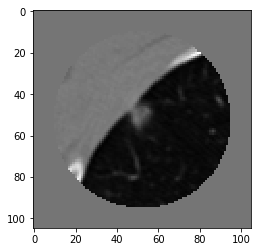

In [14]:
nodule(file_list0)
nodule(file_list1)

In [122]:
os.listdir("/home/atul/major/data_process/")

['images_0375_0301.npy',
 'images_0536_0016.npy',
 'images_0379_0328.npy',
 'images_0366_0157.npy',
 'pos_0752_0648.npy',
 'masks_0735_0422.npy',
 'nodule_0175_0104.npy',
 'images_0723_0264.npy',
 'images_0009_0939.npy',
 'images_0152_0440.npy',
 'pos_0114_0605.npy',
 'nodule_0653_0458.npy',
 'images_0165_0726.npy',
 'nodule_0270_0011.npy',
 'pos_0188_0169.npy',
 'nodule_0398_0595.npy',
 'images_0196_0322.npy',
 'nodule_0319_0779.npy',
 'images_0411_0837.npy',
 'pos_0710_0919.npy',
 'images_0027_0536.npy',
 'nodule_0710_0924.npy',
 'images_0168_0765.npy',
 'nodule_0591_0852.npy',
 'masks_0294_0412.npy',
 'pos_0303_0522.npy',
 'pos_0594_0878.npy',
 'masks_0767_0834.npy',
 'pos_0038_1017.npy',
 'pos_0694_1023.npy',
 'masks_0722_0239.npy',
 'nodule_0026_0348.npy',
 'masks_0464_0208.npy',
 'pos_0104_1062.npy',
 'pos_0095_0936.npy',
 'masks_0125_0308.npy',
 'pos_0420_0955.npy',
 'masks_0145_0855.npy',
 'nodule_0491_0598.npy',
 'pos_0536_0016.npy',
 'images_0478_0366.npy',
 'nodule_0392_0476

In [5]:
def load_node(target):
    names=os.listdir(target)
    x=[]
    for j in names:
            path_final=os.path.join(target,j)
            if j.startswith("nodule") & j.endswith(".npy"):
                print(path_final)
                x.append(path_final)
    return x

In [6]:
dt=load_node("/home/atul/major/data_all/0")

/home/atul/major/data_all/0/nodule_0409_359600.npy
/home/atul/major/data_all/0/nodule_0098_448100.npy
/home/atul/major/data_all/0/nodule_0713_0400.npy
/home/atul/major/data_all/0/nodule_0601_424800.npy
/home/atul/major/data_all/0/nodule_0846_252000.npy
/home/atul/major/data_all/0/nodule_0331_421100.npy
/home/atul/major/data_all/0/nodule_0068_173500.npy
/home/atul/major/data_all/0/nodule_0511_416700.npy
/home/atul/major/data_all/0/nodule_0847_275100.npy
/home/atul/major/data_all/0/nodule_0098_447600.npy
/home/atul/major/data_all/0/nodule_0699_501300.npy
/home/atul/major/data_all/0/nodule_0799_495300.npy
/home/atul/major/data_all/0/nodule_0695_471000.npy
/home/atul/major/data_all/0/nodule_0699_501000.npy
/home/atul/major/data_all/0/nodule_0247_467000.npy
/home/atul/major/data_all/0/nodule_0150_171300.npy
/home/atul/major/data_all/0/nodule_0708_300500.npy
/home/atul/major/data_all/0/nodule_0337_474000.npy
/home/atul/major/data_all/0/nodule_0882_535500.npy
/home/atul/major/data_all/0/nodul

/home/atul/major/data_all/0/nodule_0546_93900.npy
/home/atul/major/data_all/0/nodule_0751_283700.npy
/home/atul/major/data_all/0/nodule_0746_257100.npy
/home/atul/major/data_all/0/nodule_0169_354200.npy
/home/atul/major/data_all/0/nodule_0673_309500.npy
/home/atul/major/data_all/0/nodule_0050_524500.npy
/home/atul/major/data_all/0/nodule_0564_144900.npy
/home/atul/major/data_all/0/nodule_0614_496600.npy
/home/atul/major/data_all/0/nodule_0438_526300.npy
/home/atul/major/data_all/0/nodule_0537_30000.npy
/home/atul/major/data_all/0/nodule_0721_111000.npy
/home/atul/major/data_all/0/nodule_0699_501100.npy
/home/atul/major/data_all/0/nodule_0288_177700.npy
/home/atul/major/data_all/0/nodule_0645_74900.npy
/home/atul/major/data_all/0/nodule_0748_269000.npy
/home/atul/major/data_all/0/nodule_0785_505500.npy
/home/atul/major/data_all/0/nodule_0089_3900.npy
/home/atul/major/data_all/0/nodule_0496_294700.npy
/home/atul/major/data_all/0/nodule_0331_420400.npy
/home/atul/major/data_all/0/nodule_0

0


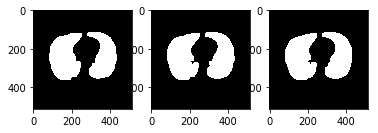

1


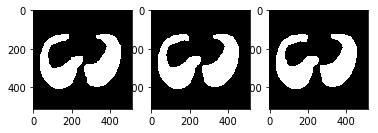

2


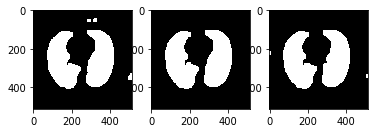

3


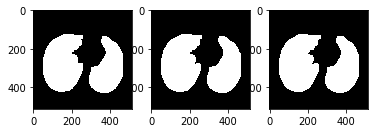

4


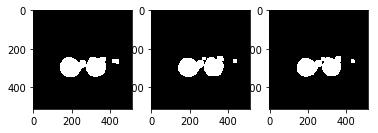

5


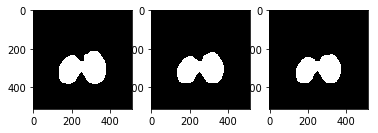

6


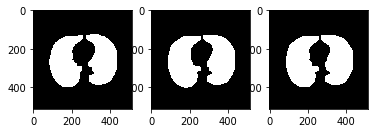

7


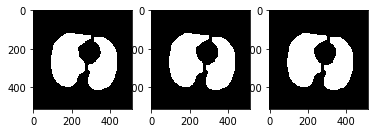

8


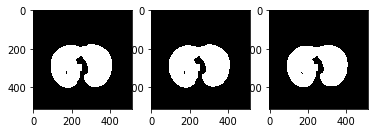

9


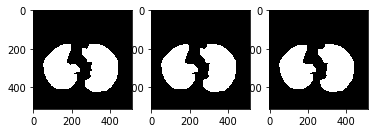

10


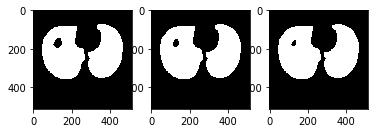

In [5]:

for ct,i in enumerate(dt):
    name=i.replace("nodule","lungmask")
    data=np.load(name)
    print (ct)
    plt.subplot(1,3,1)
    plt.imshow(data[0],cmap='gray')
    plt.subplot(1,3,2)
    plt.imshow(data[1],cmap='gray')
    plt.subplot(1,3,3)
    plt.imshow(data[2],cmap='gray')
    plt.show()
    if ct==10:
        break

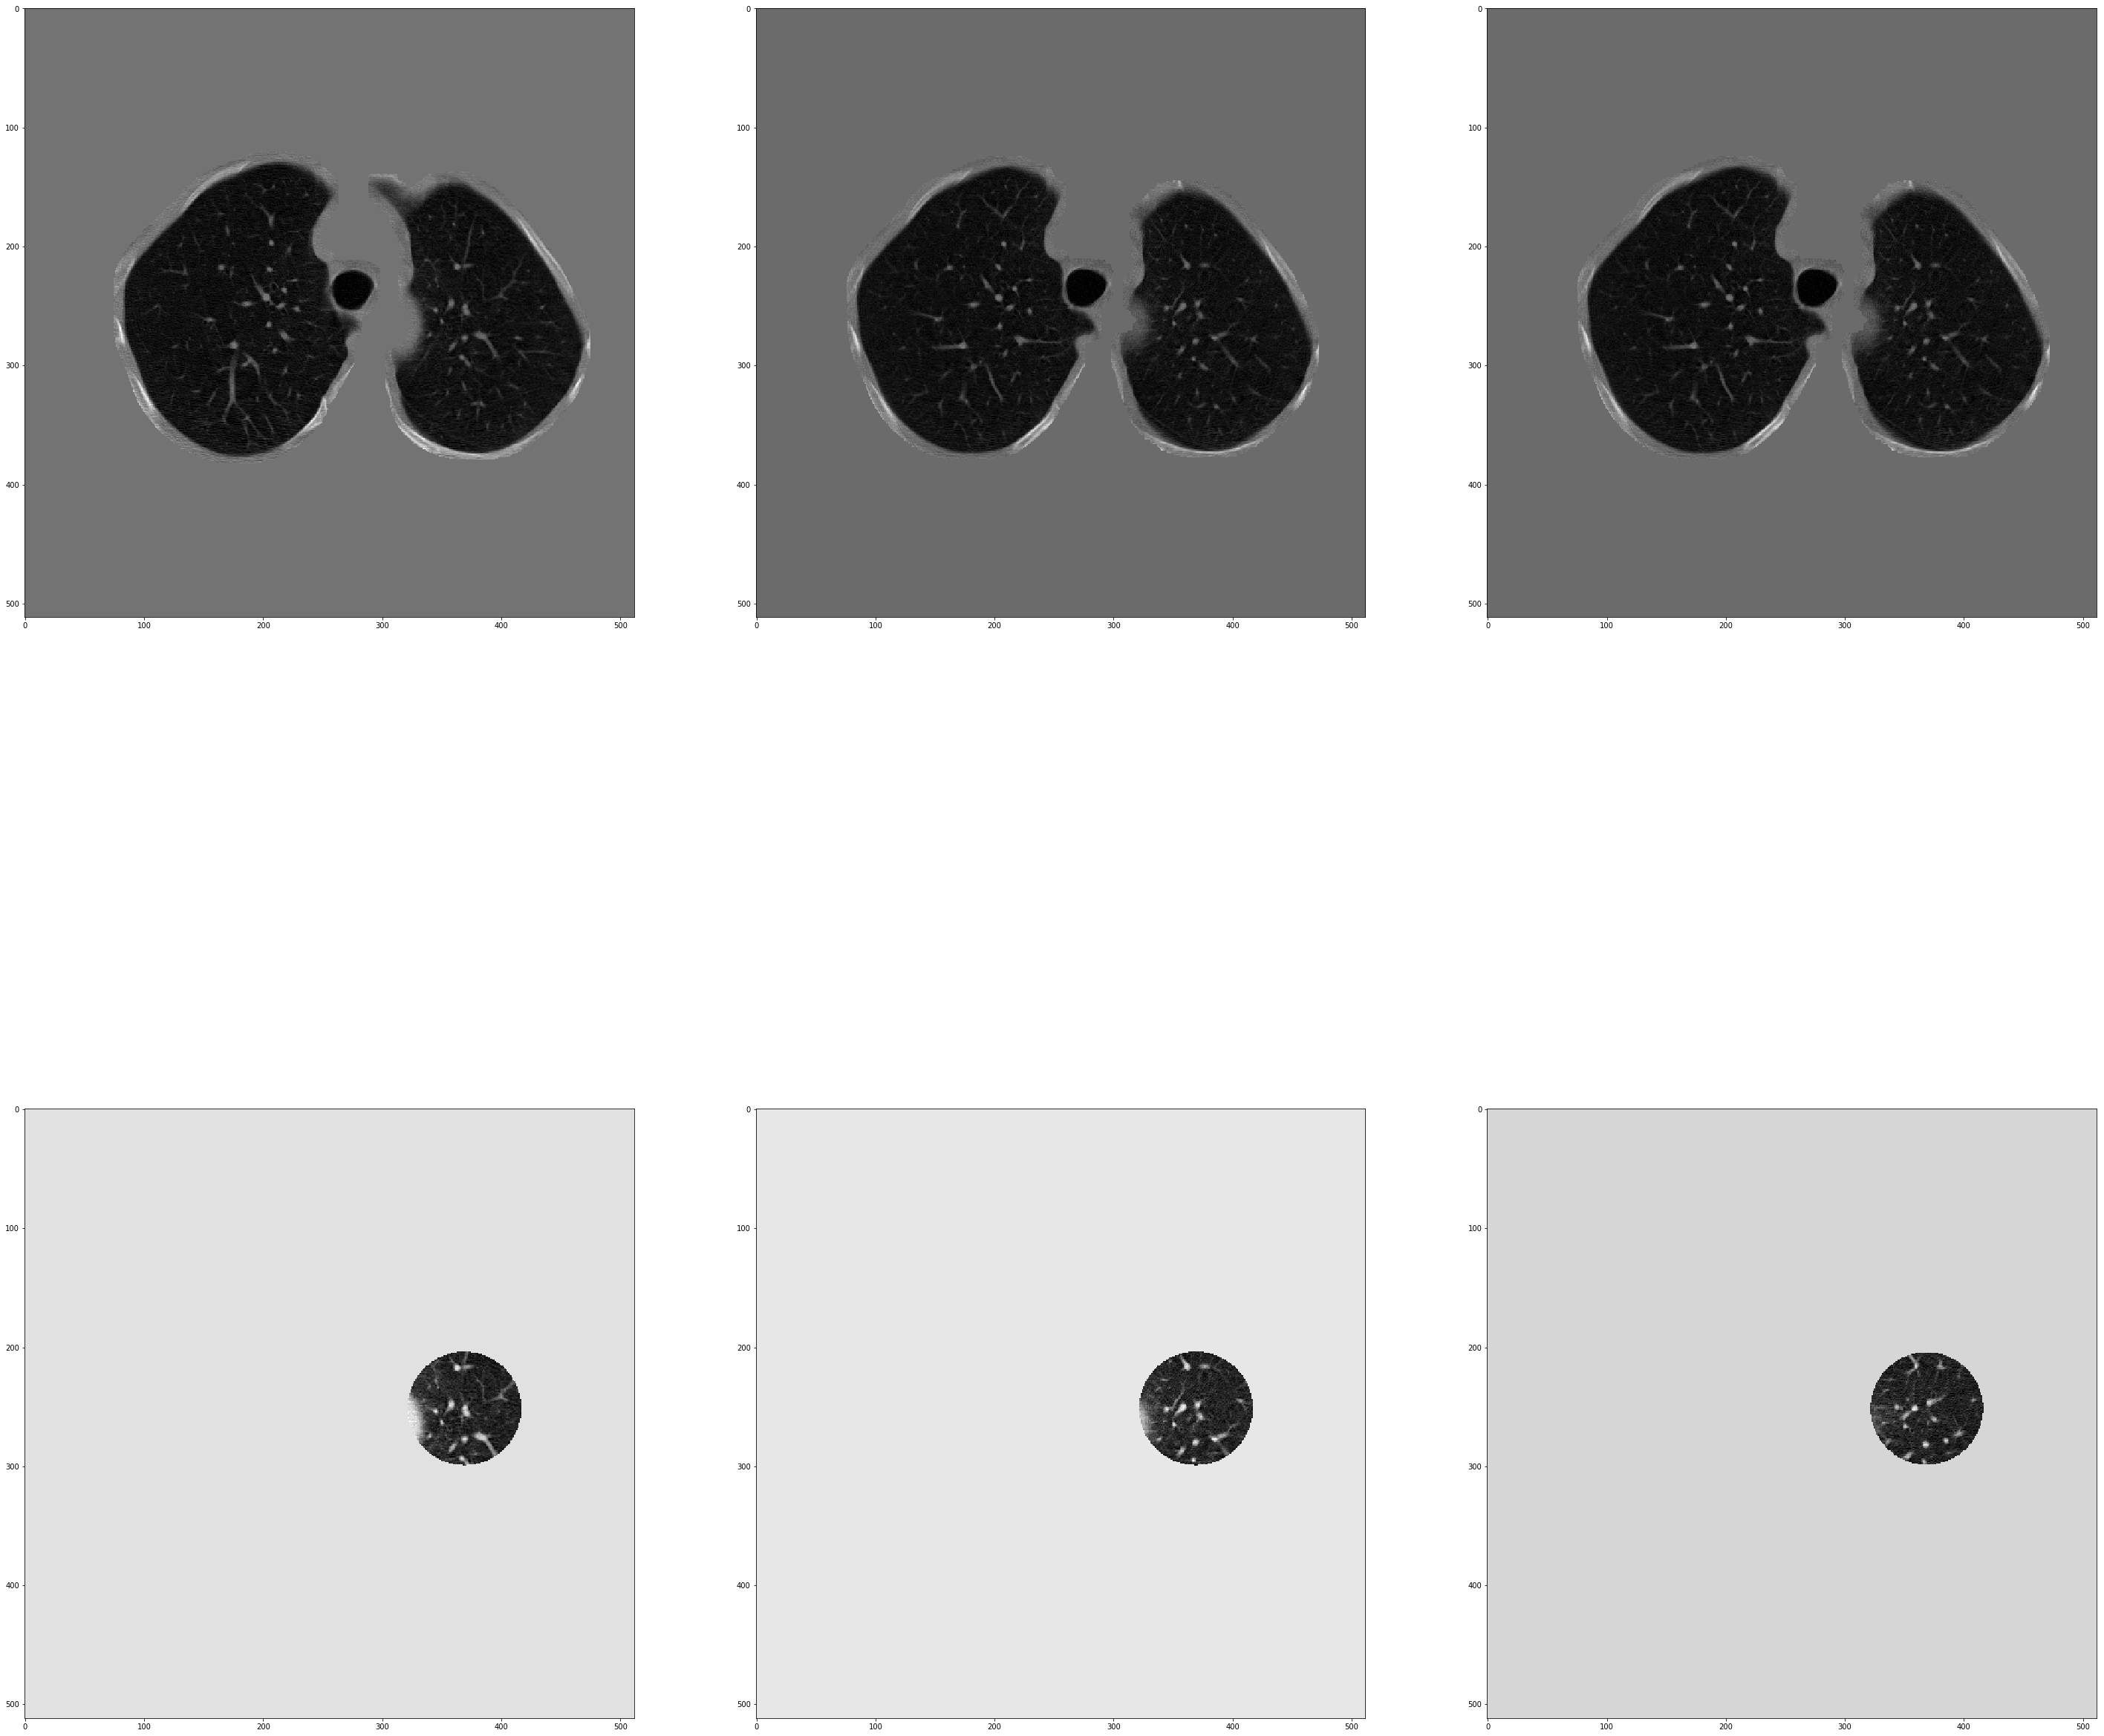

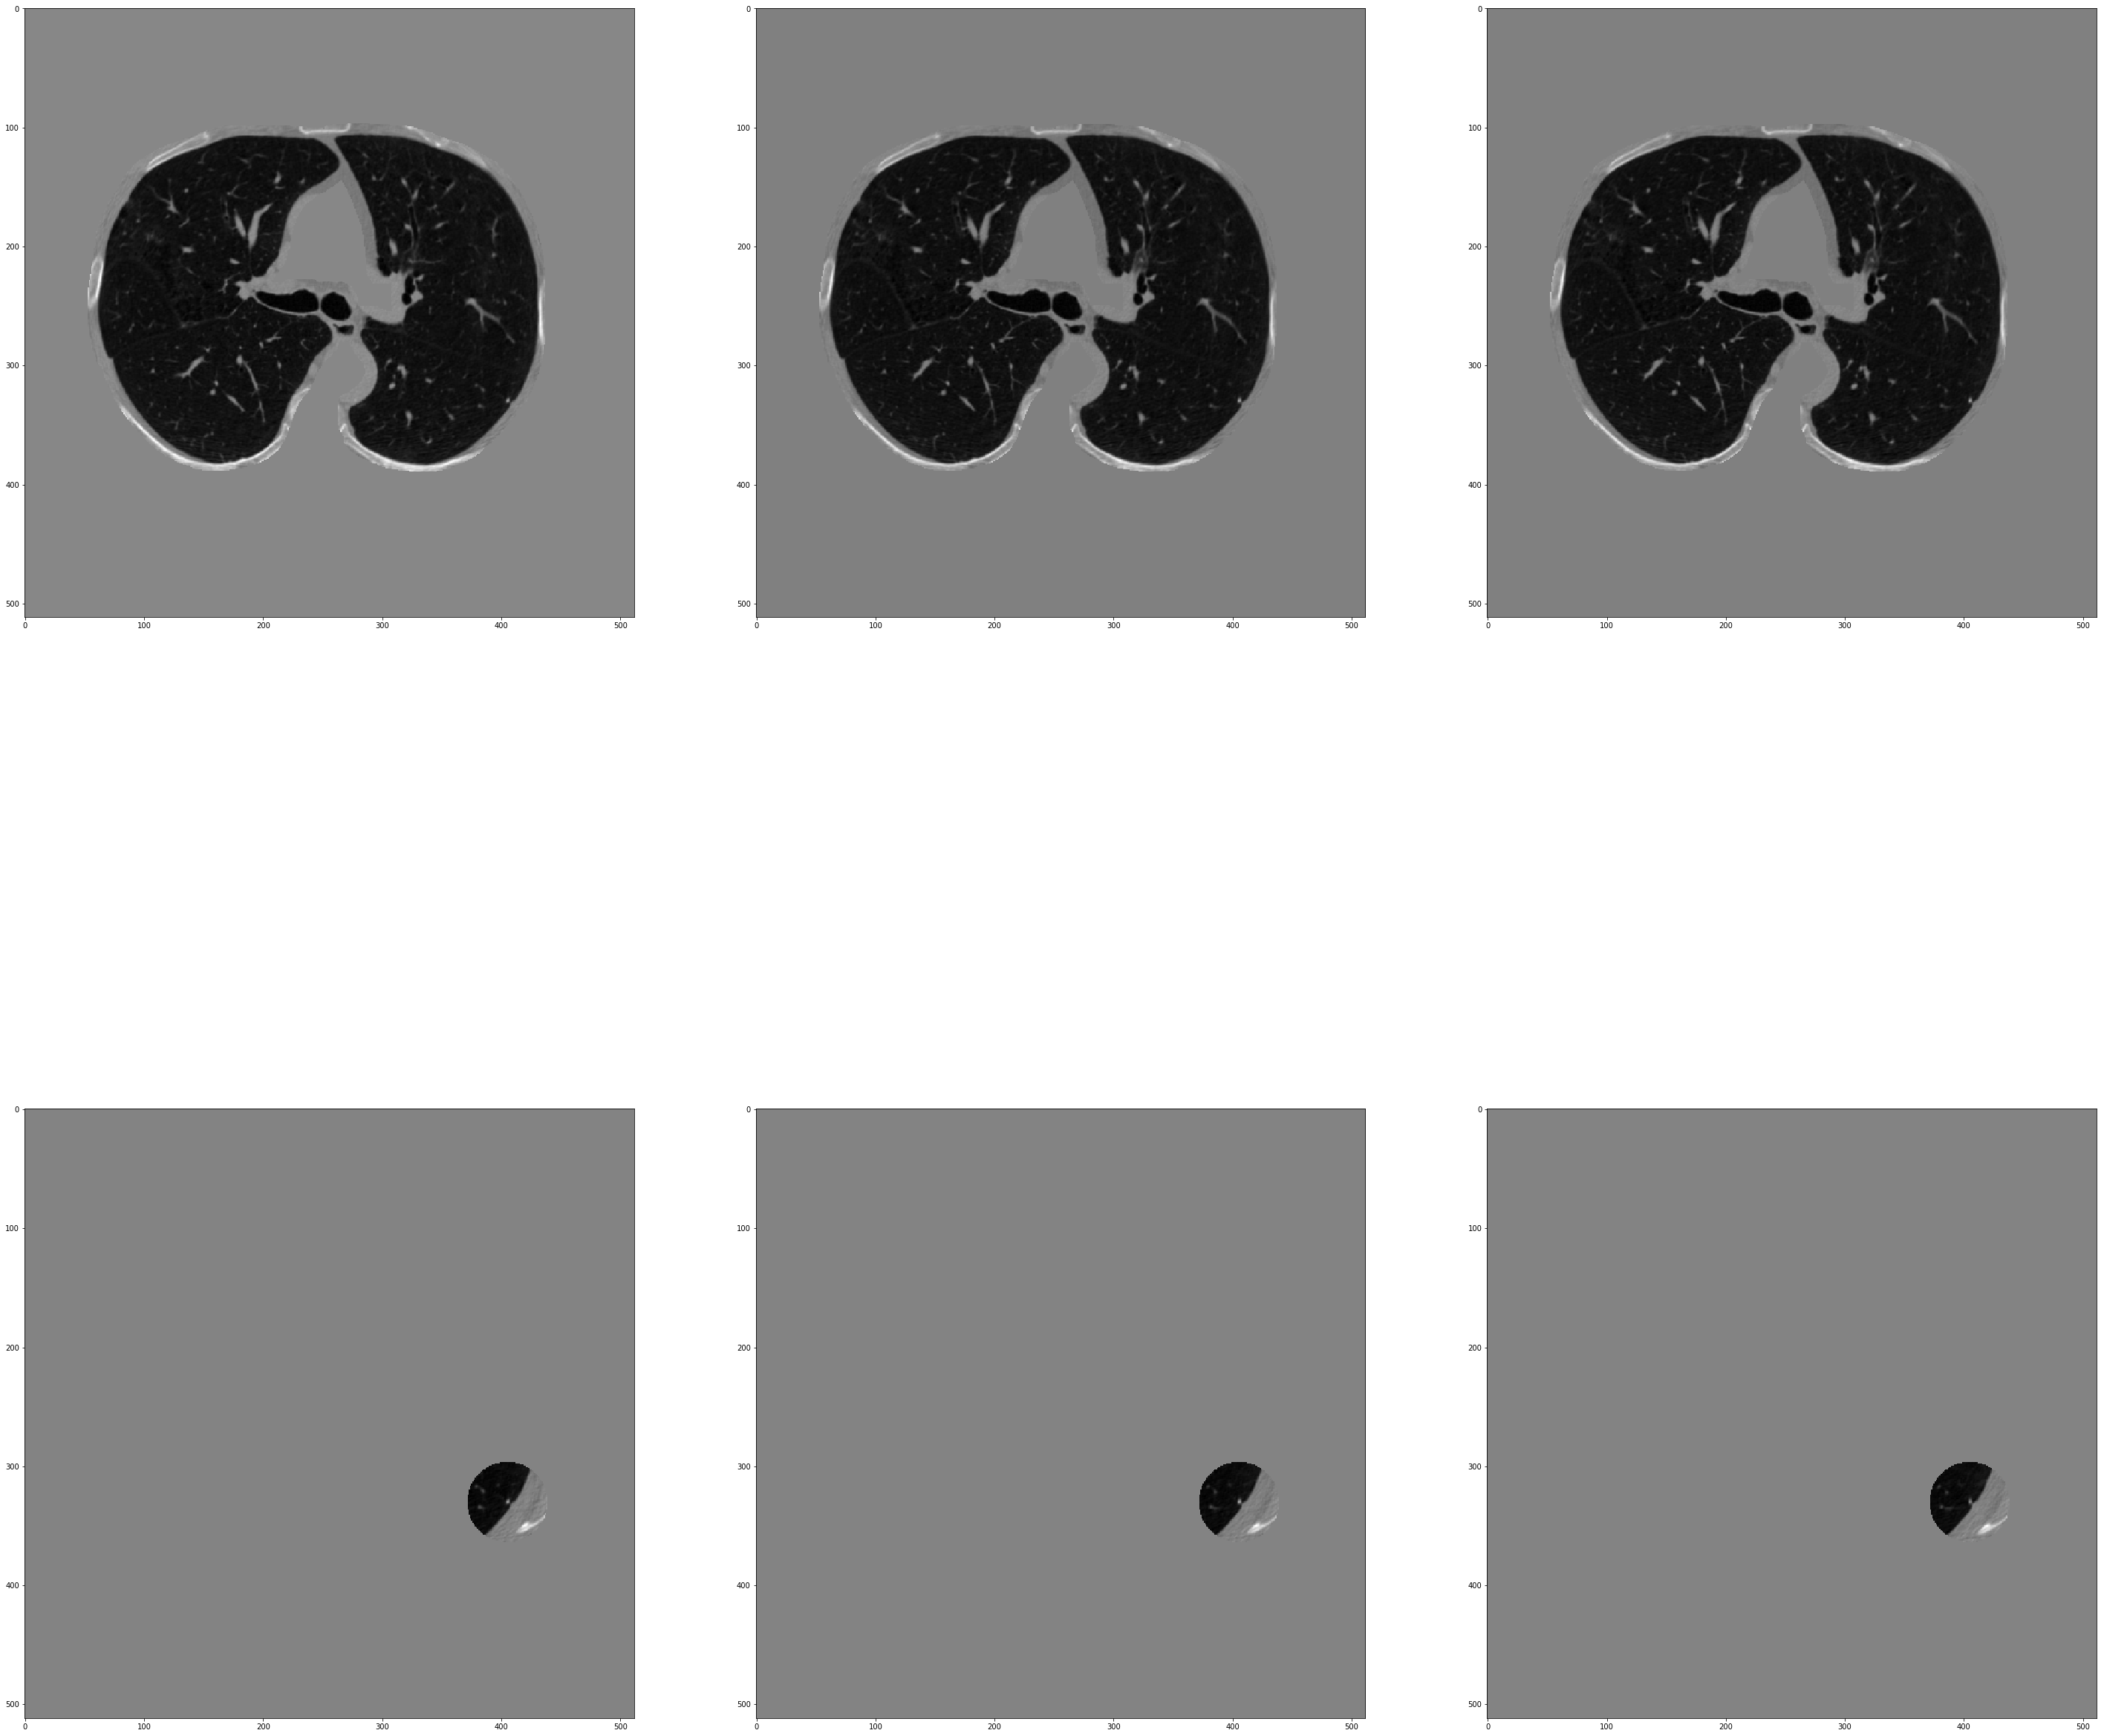

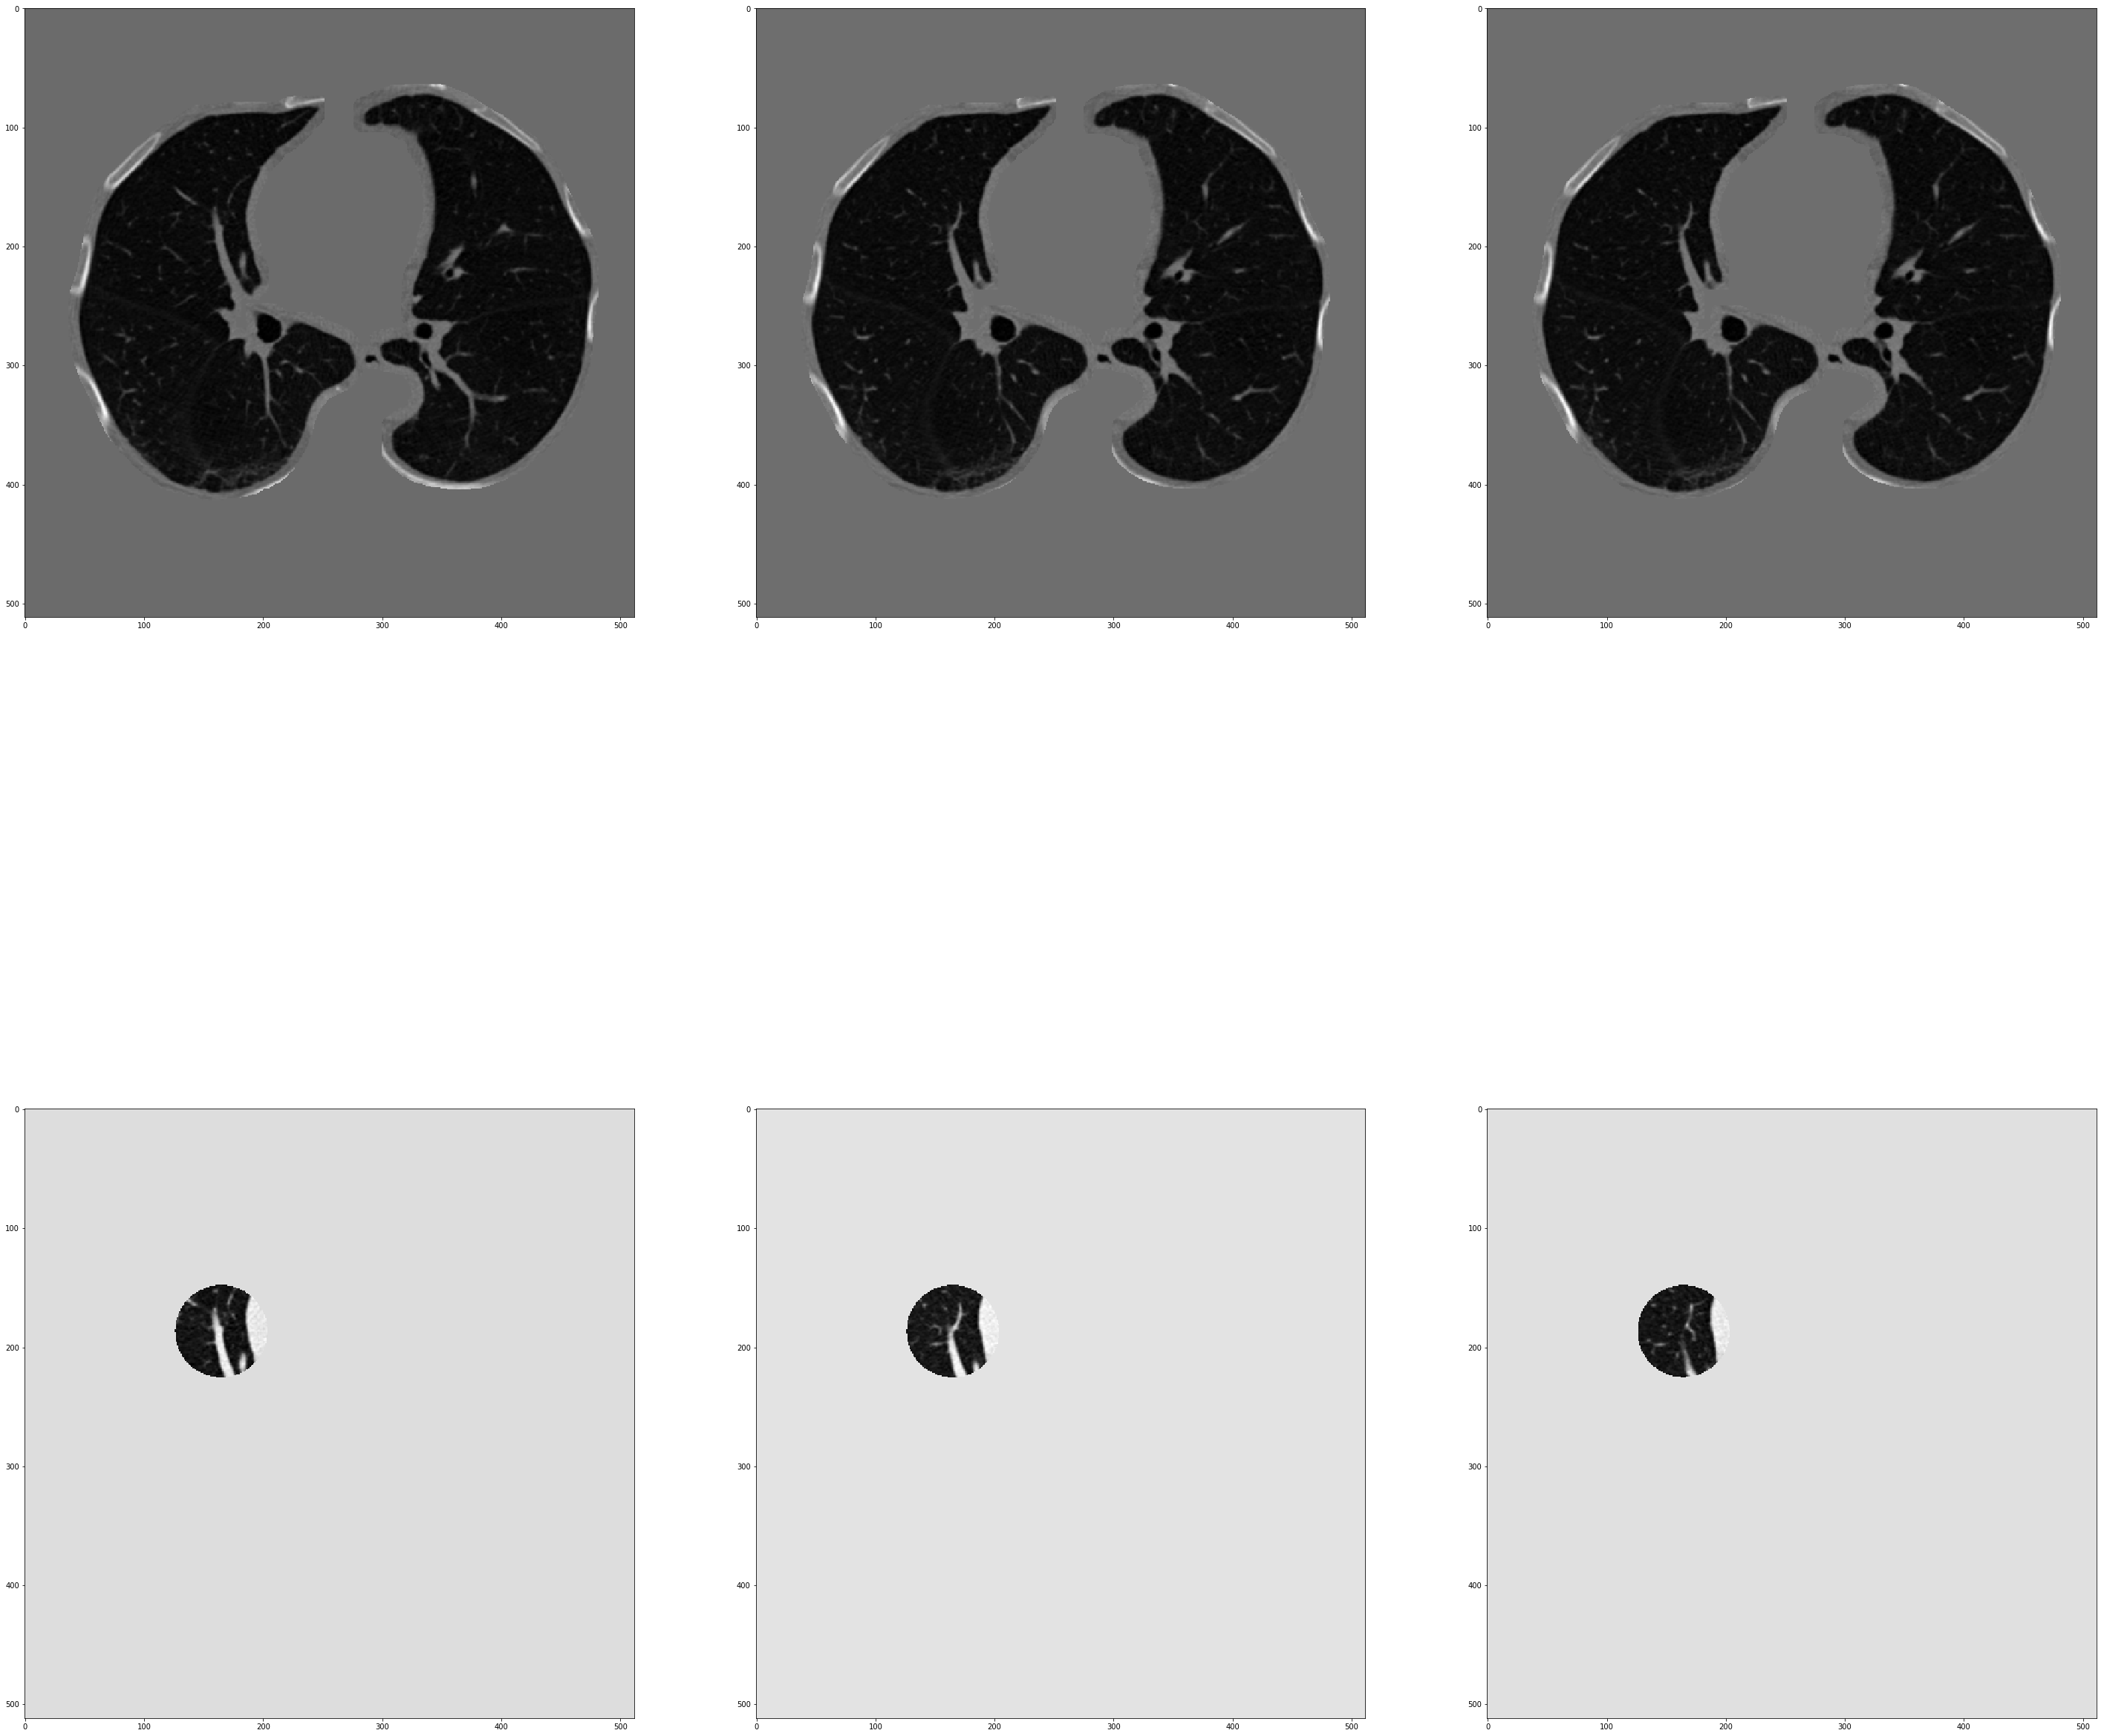

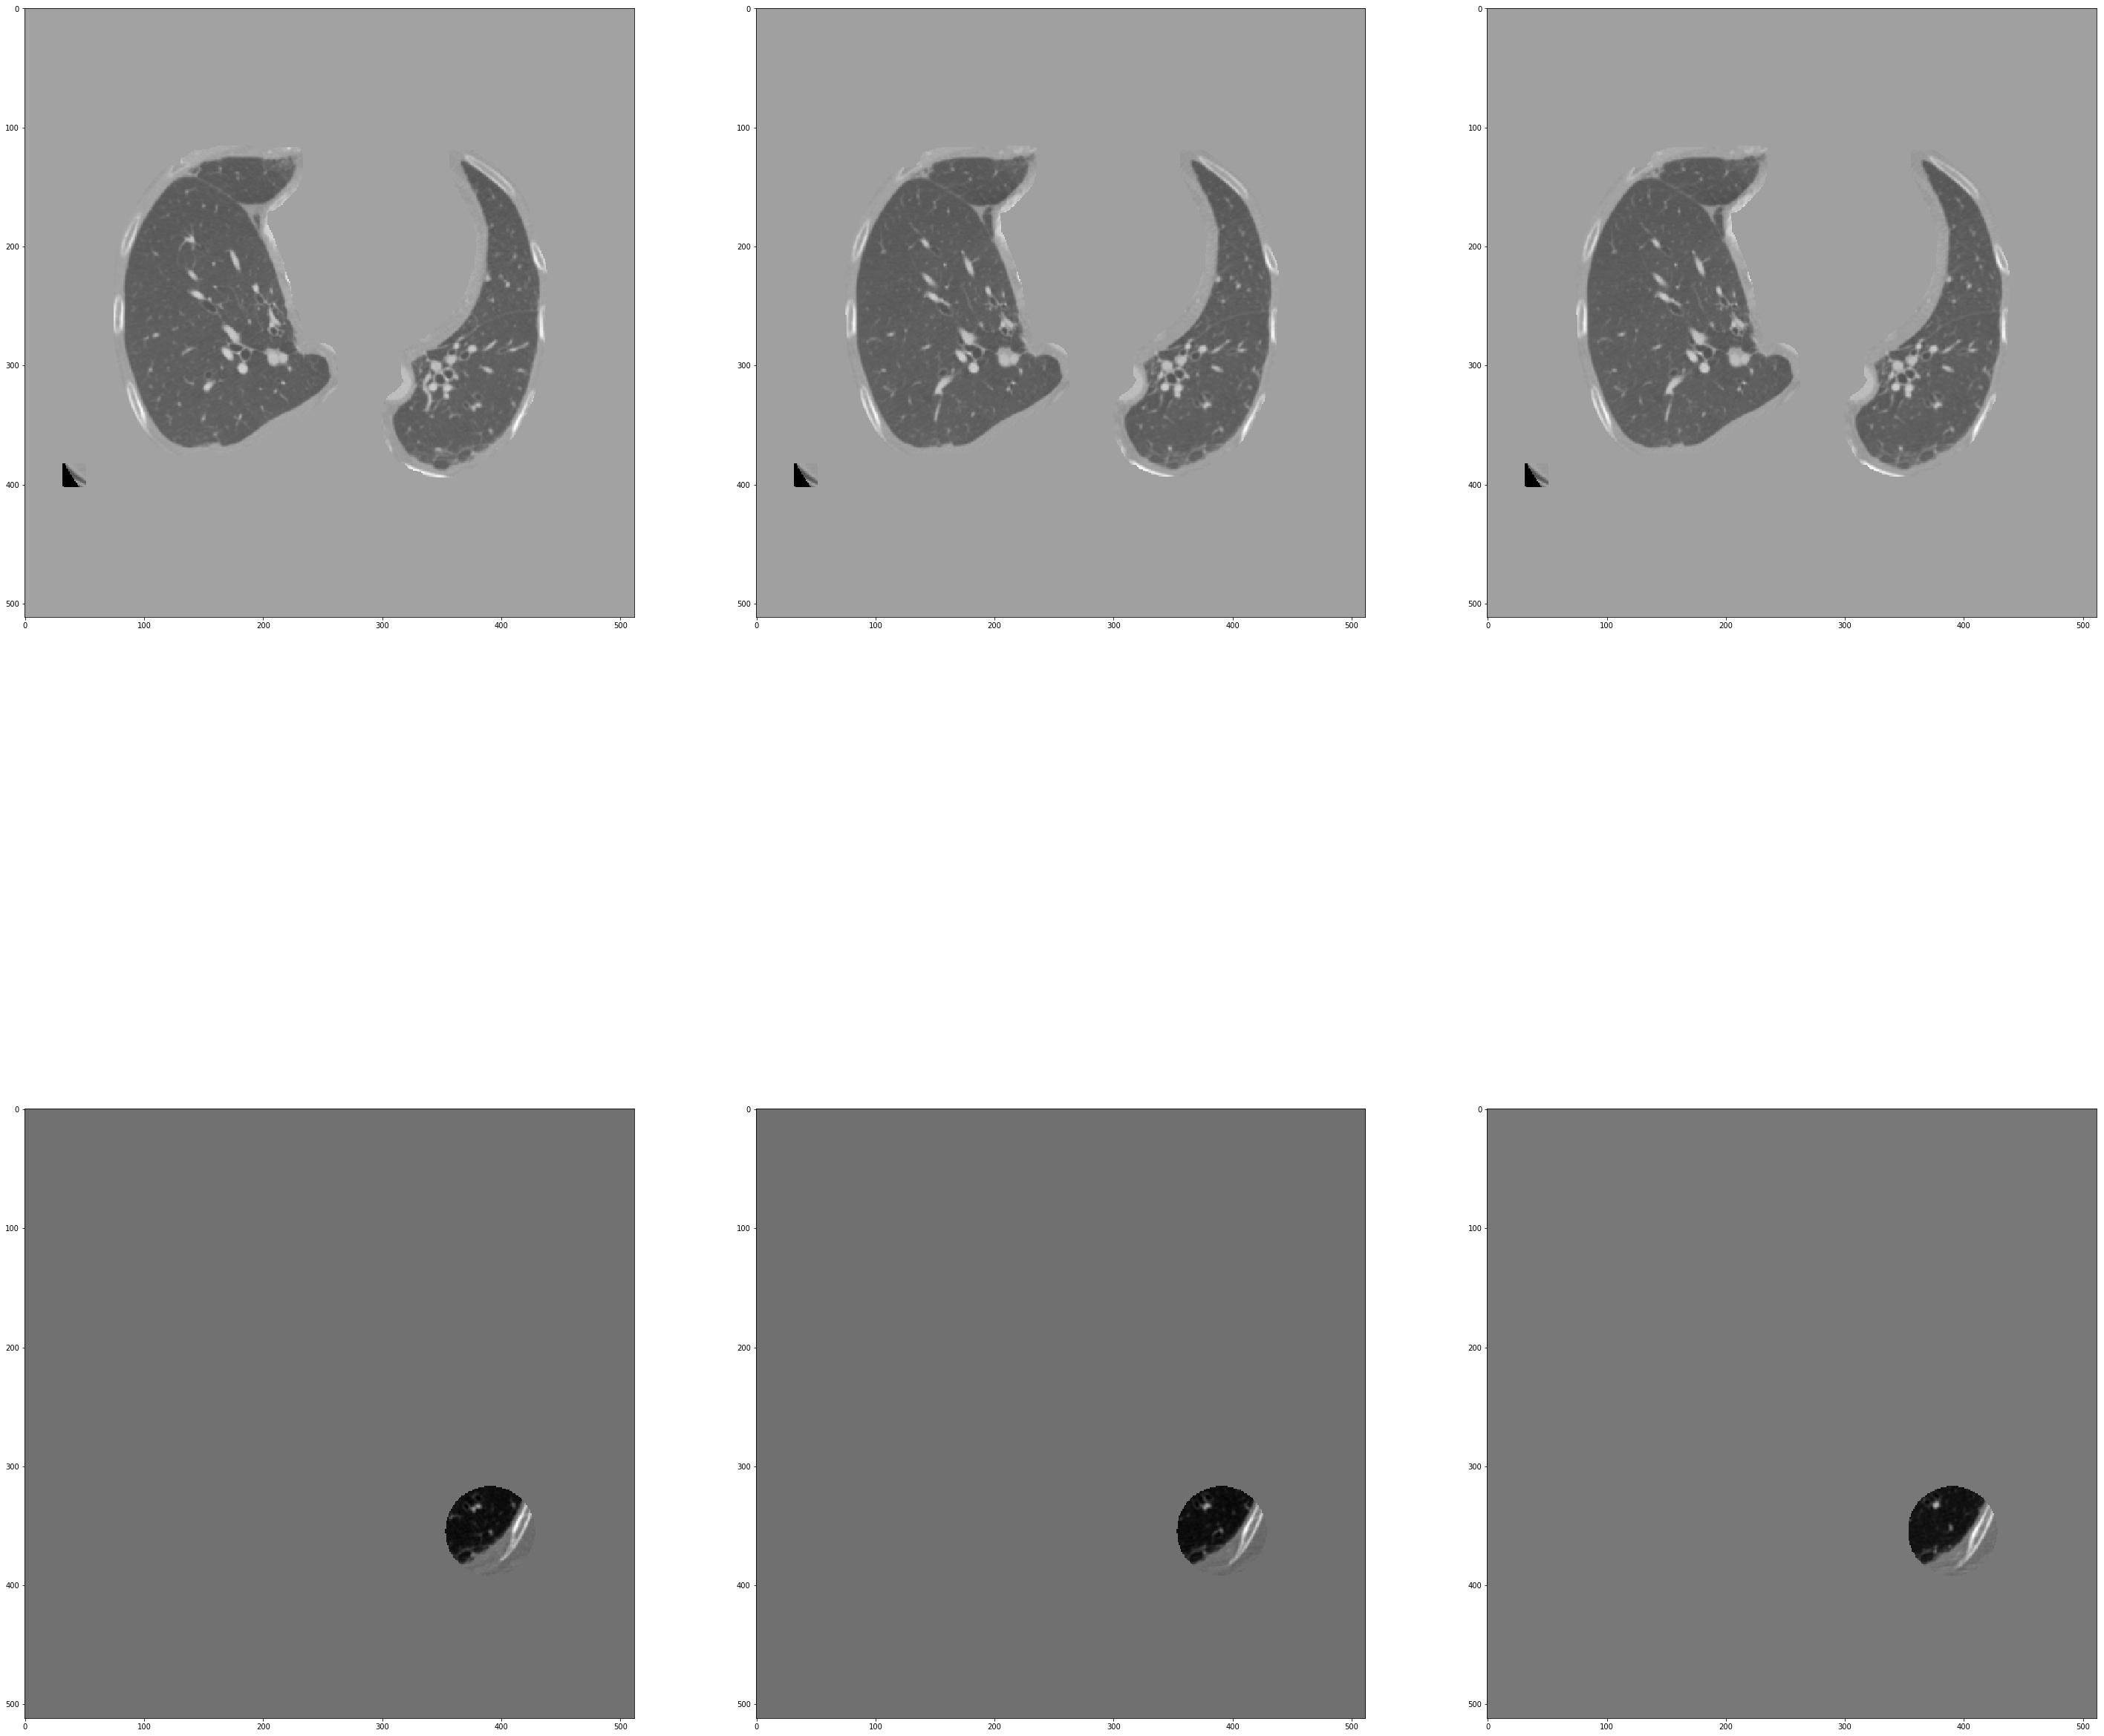

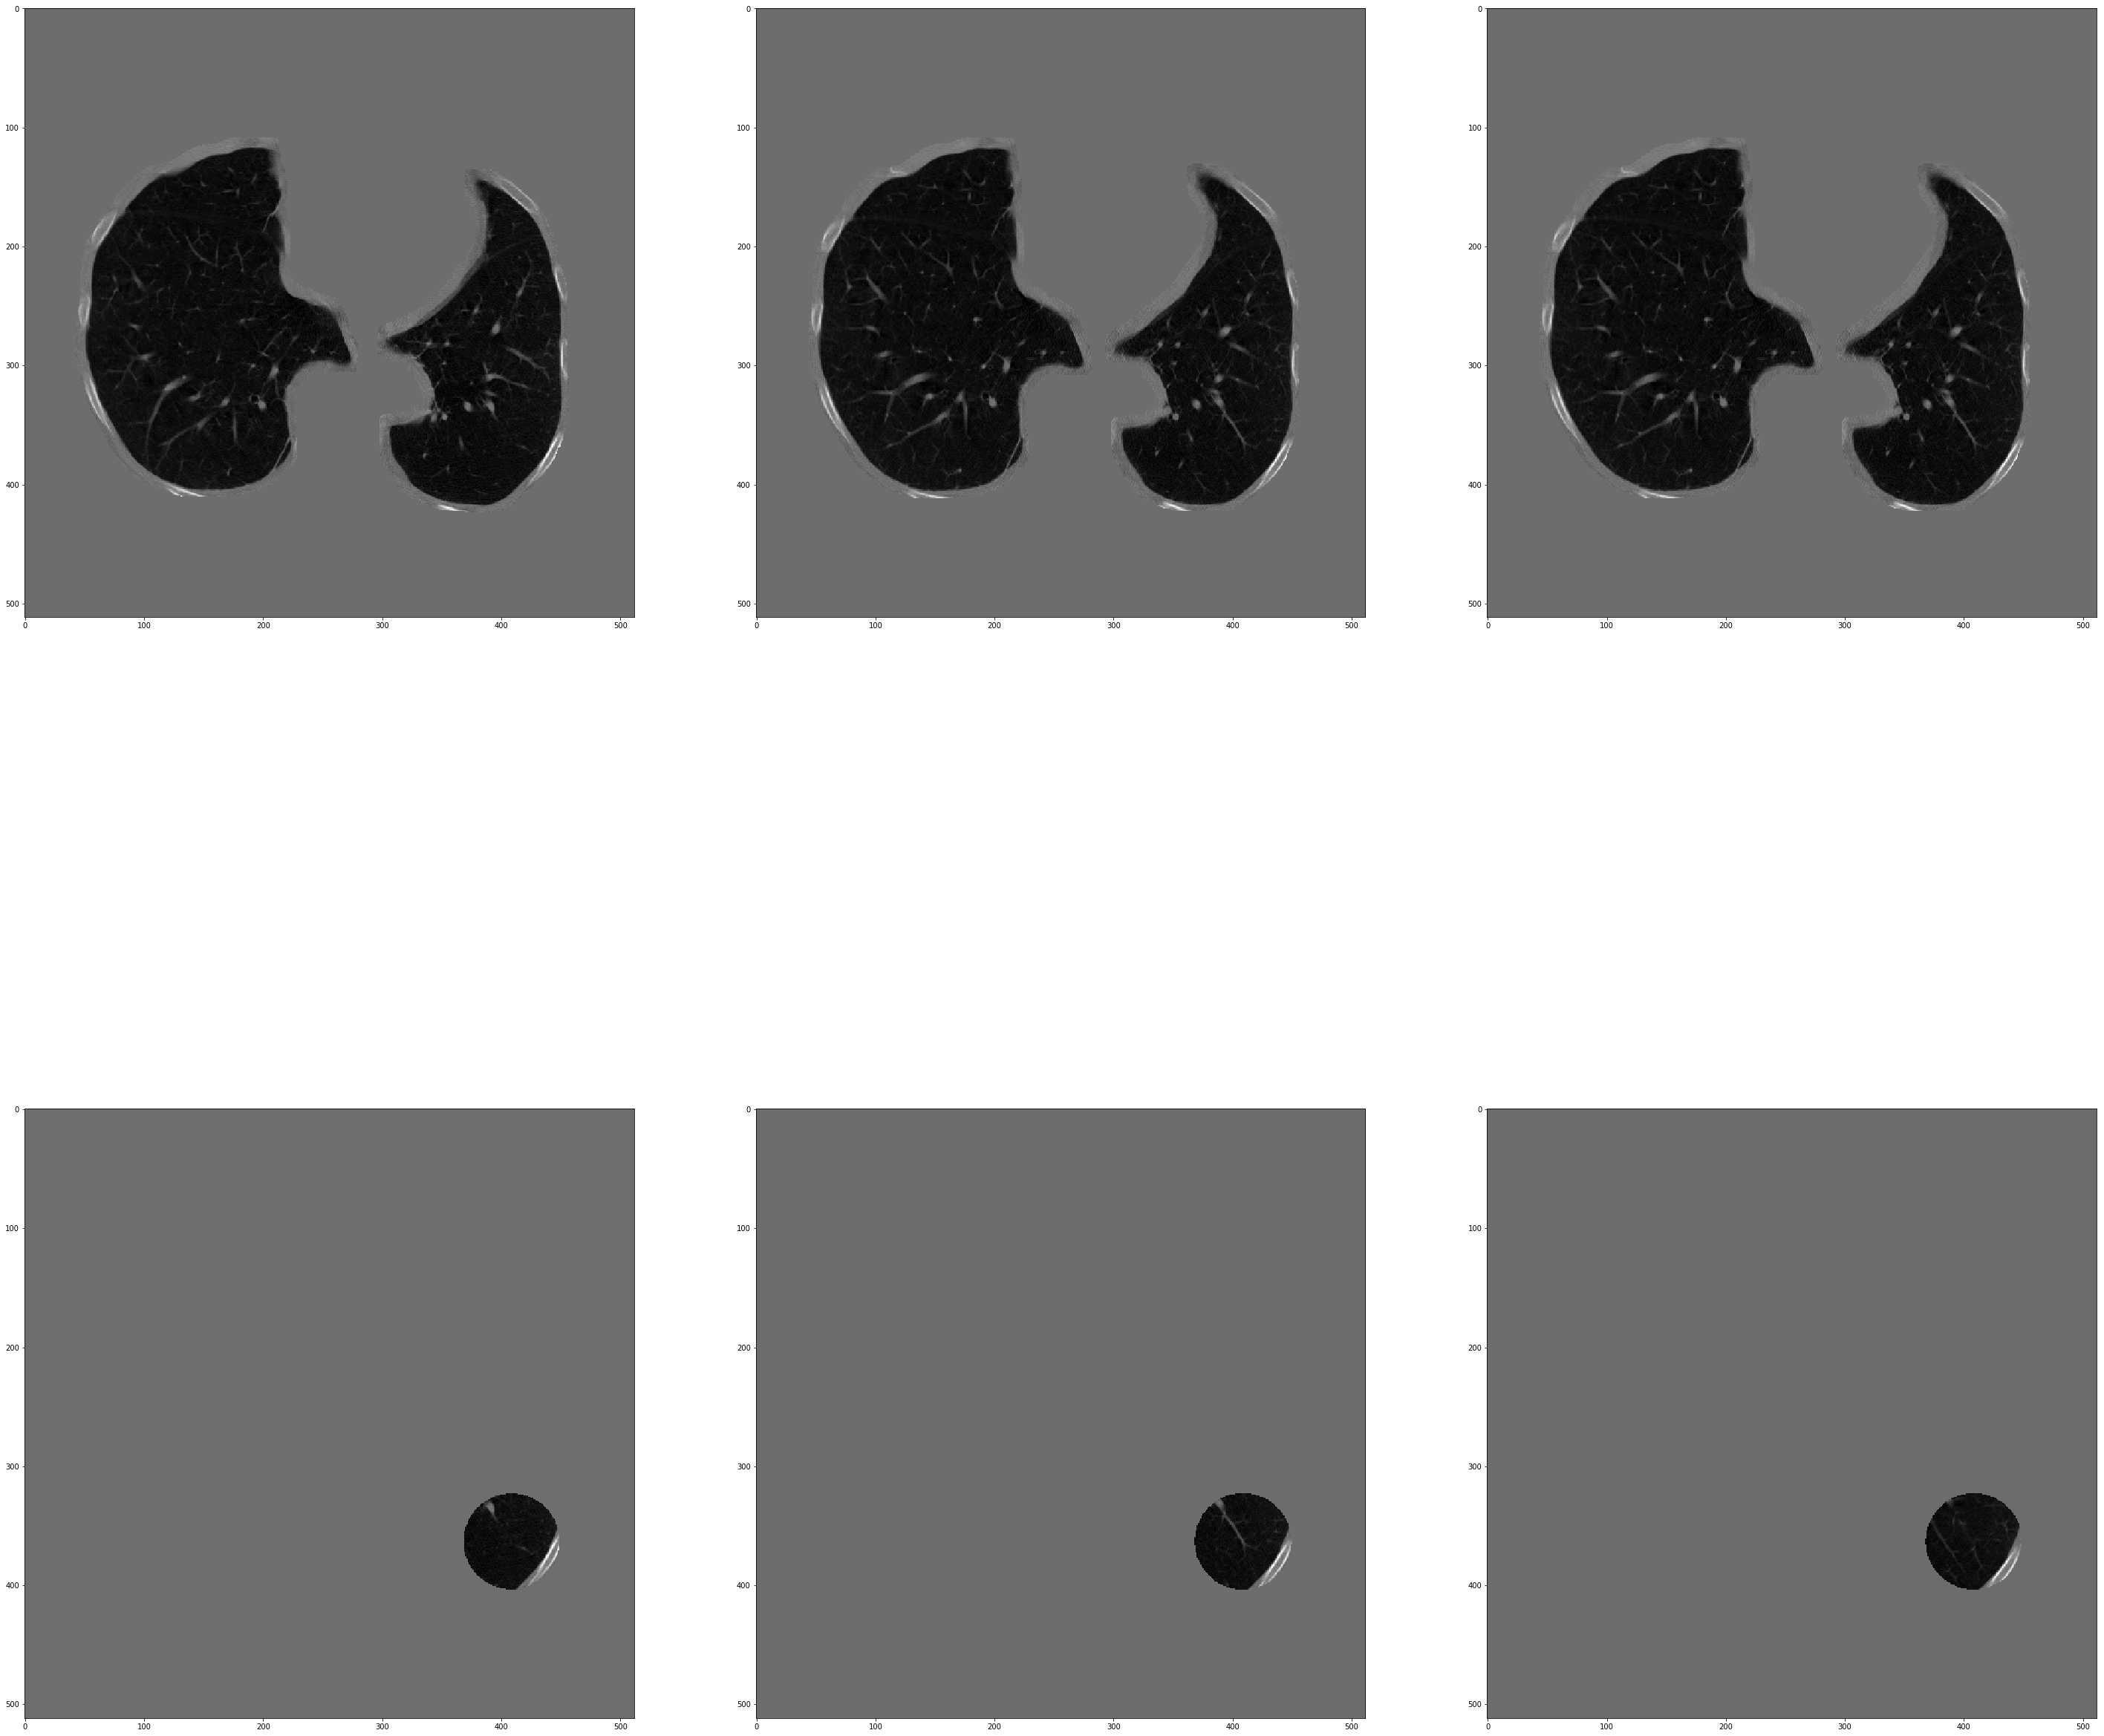

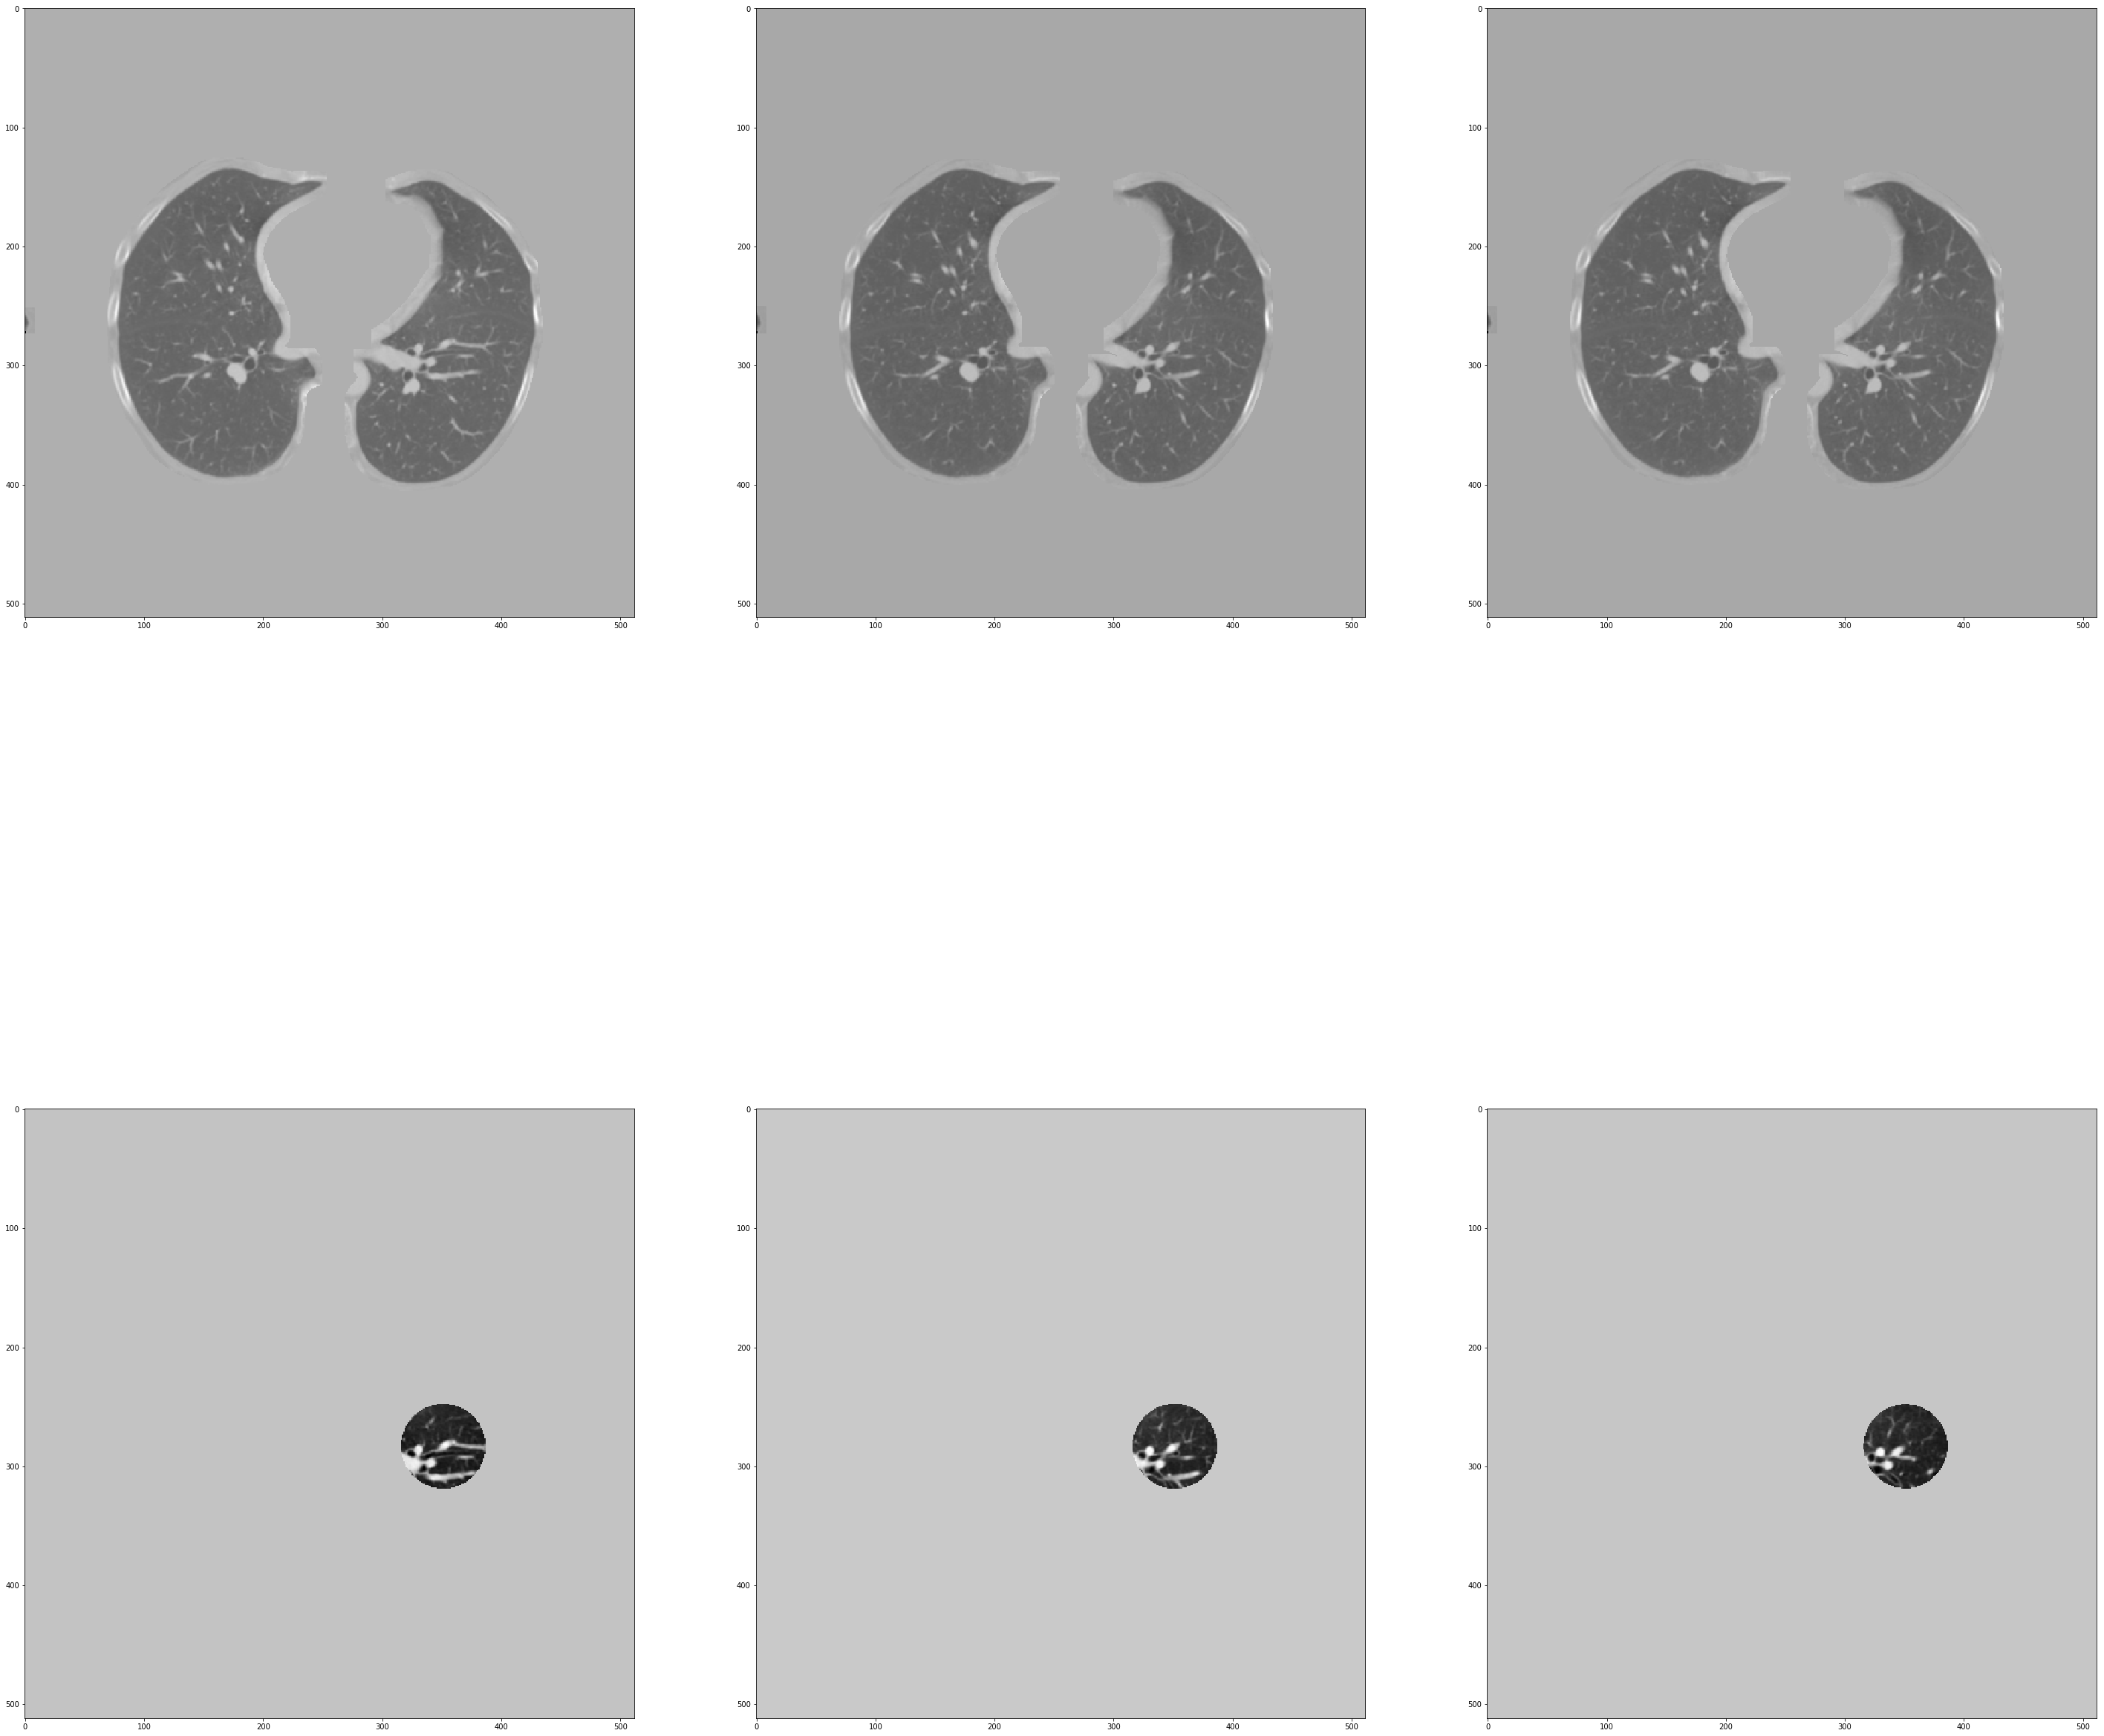

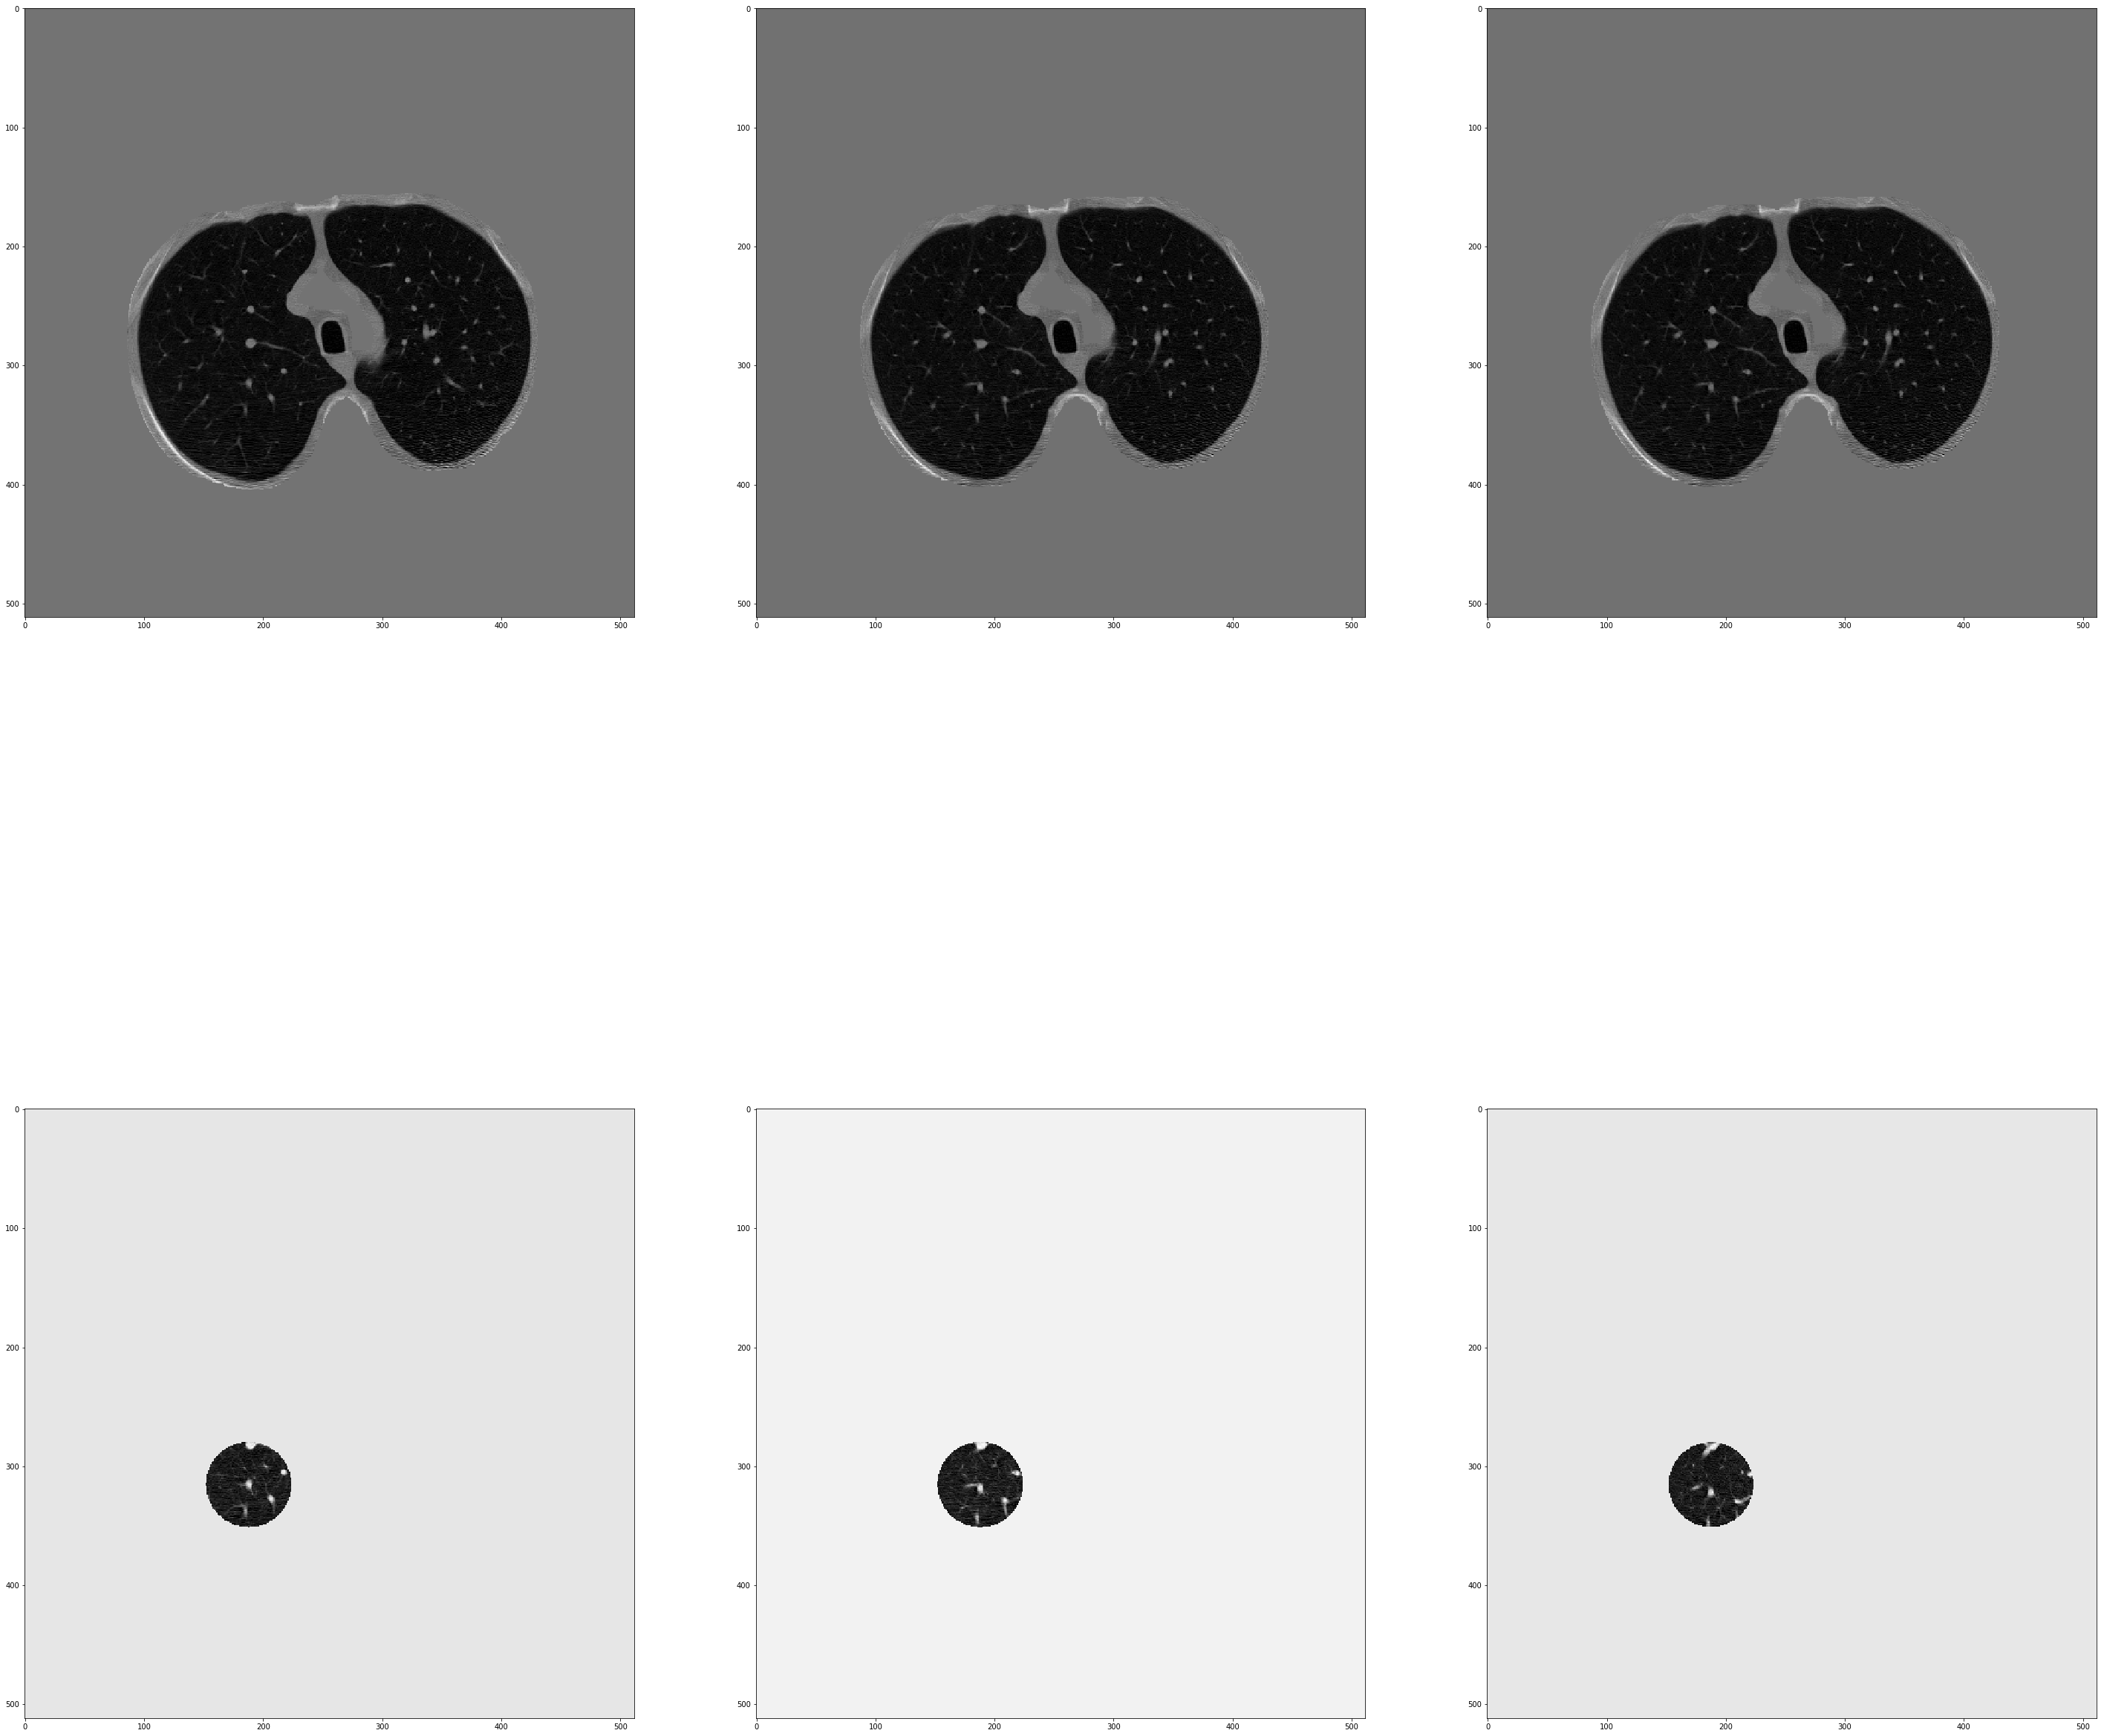

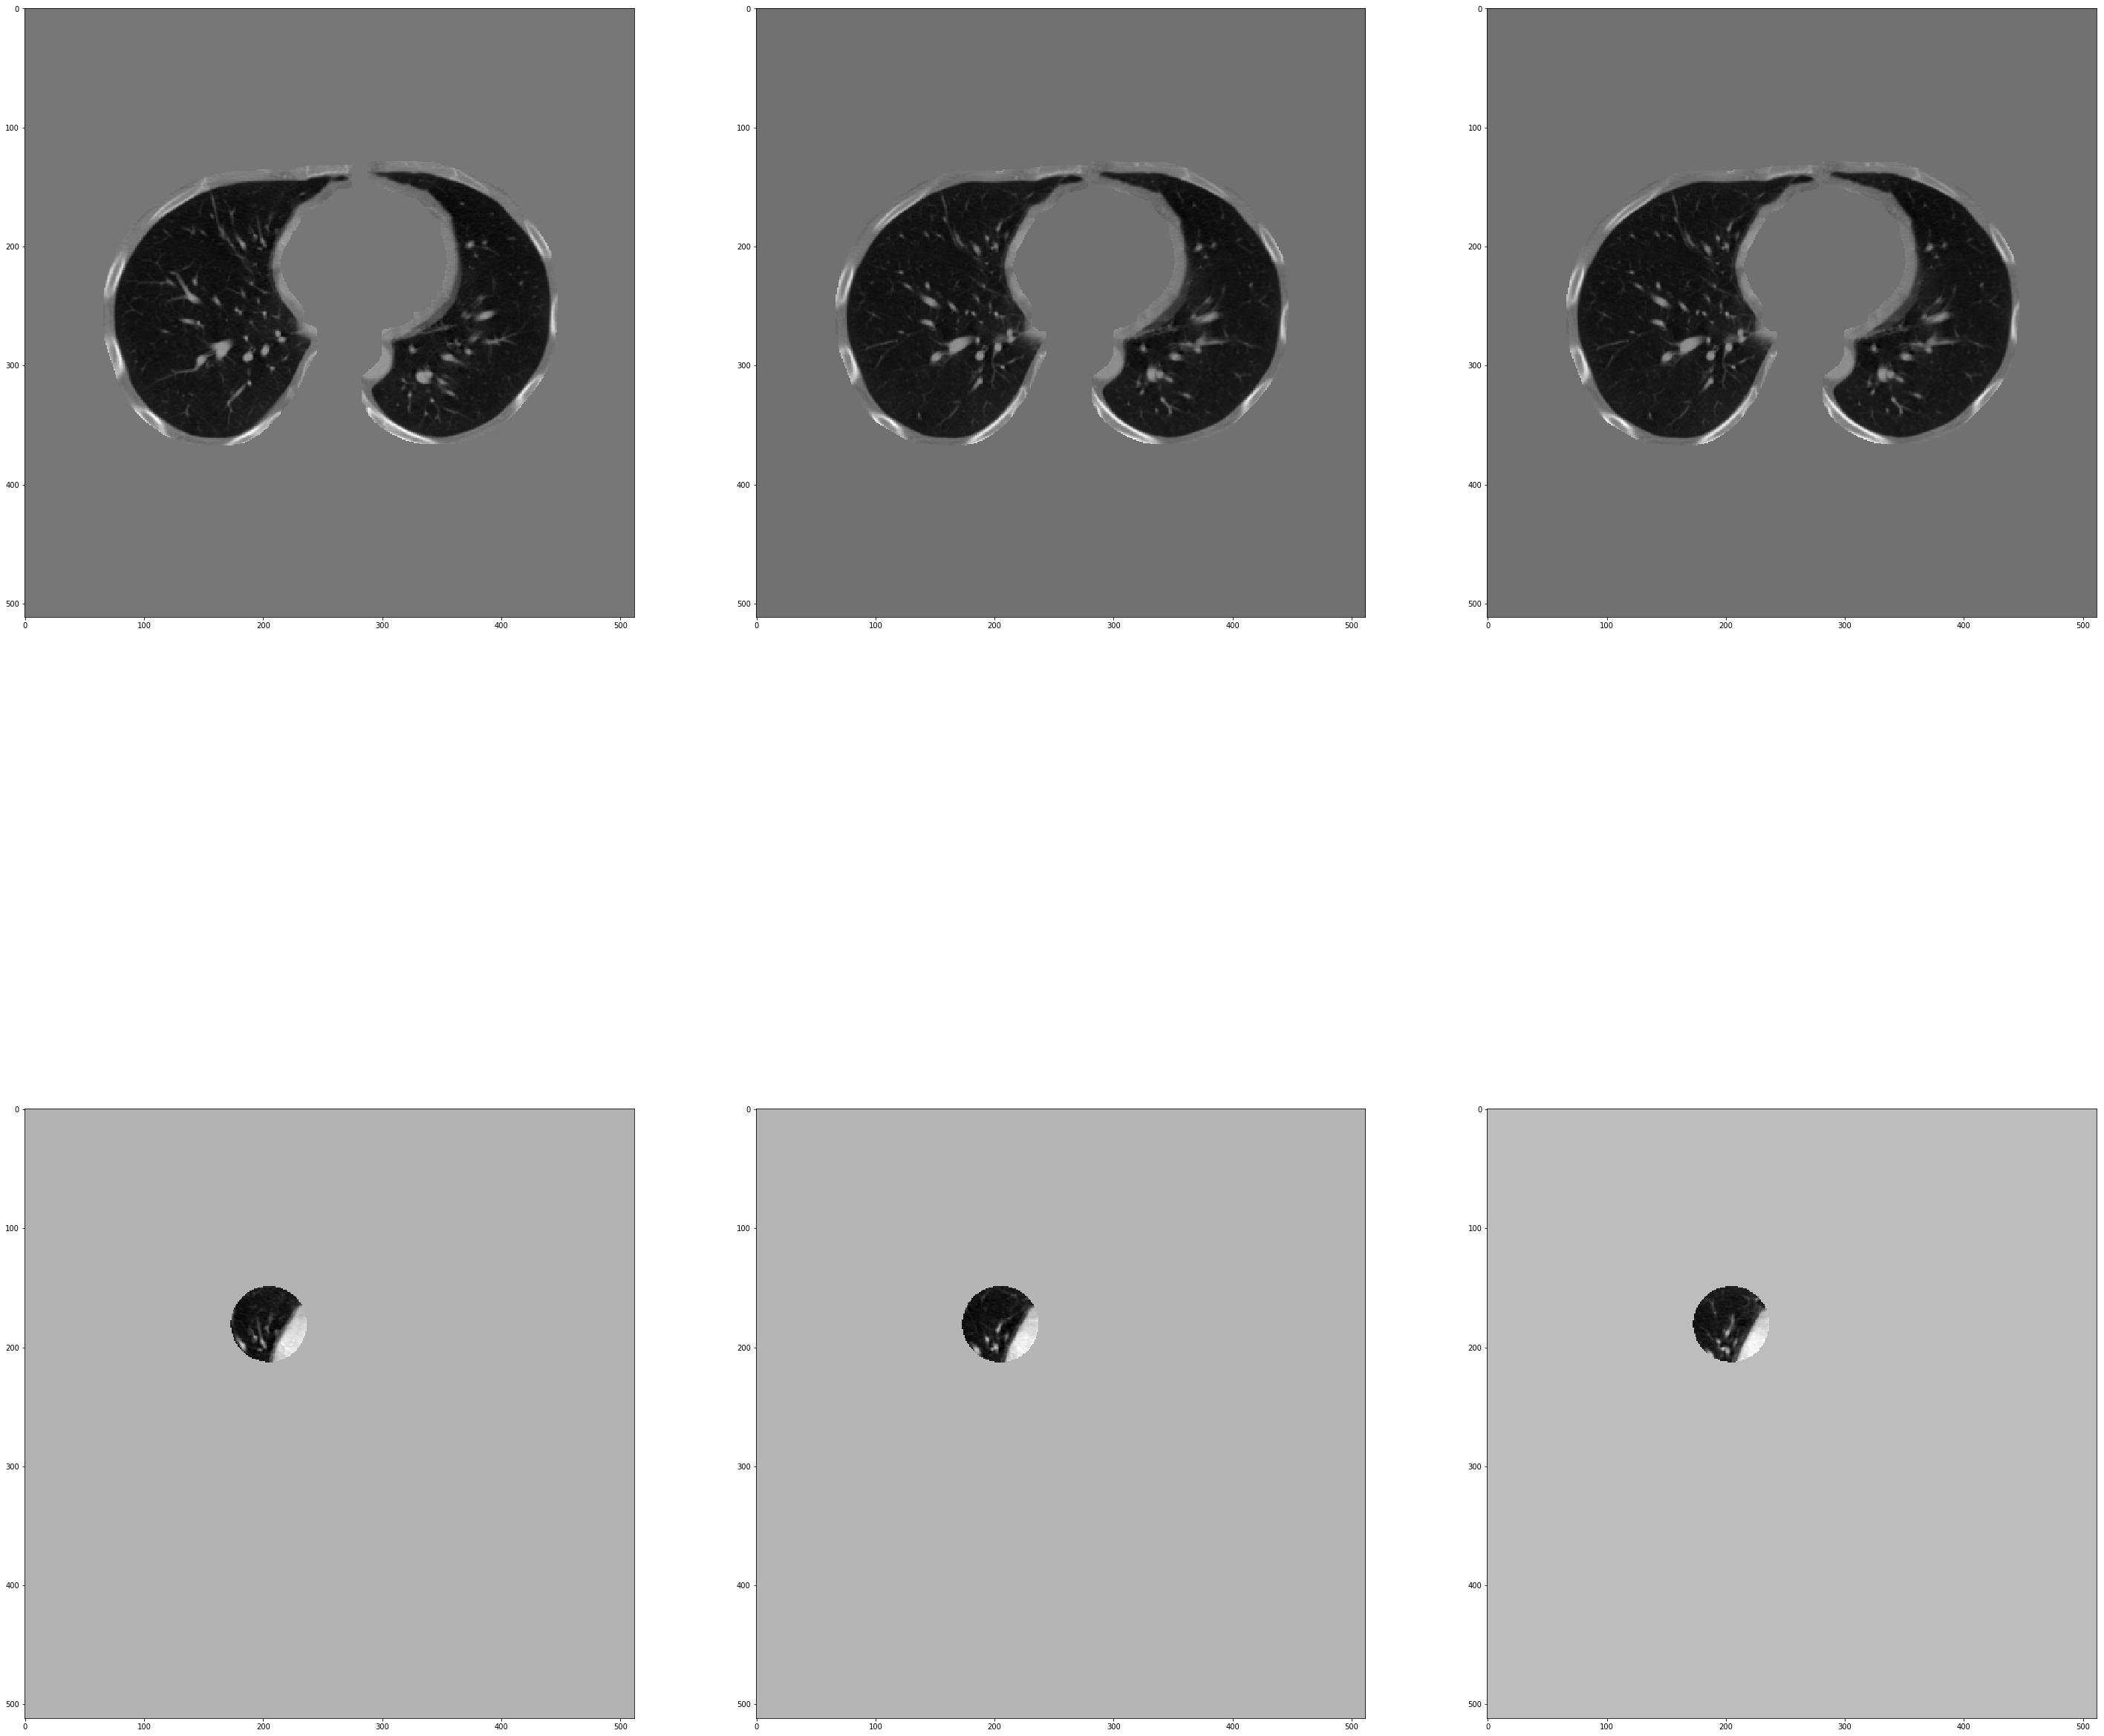

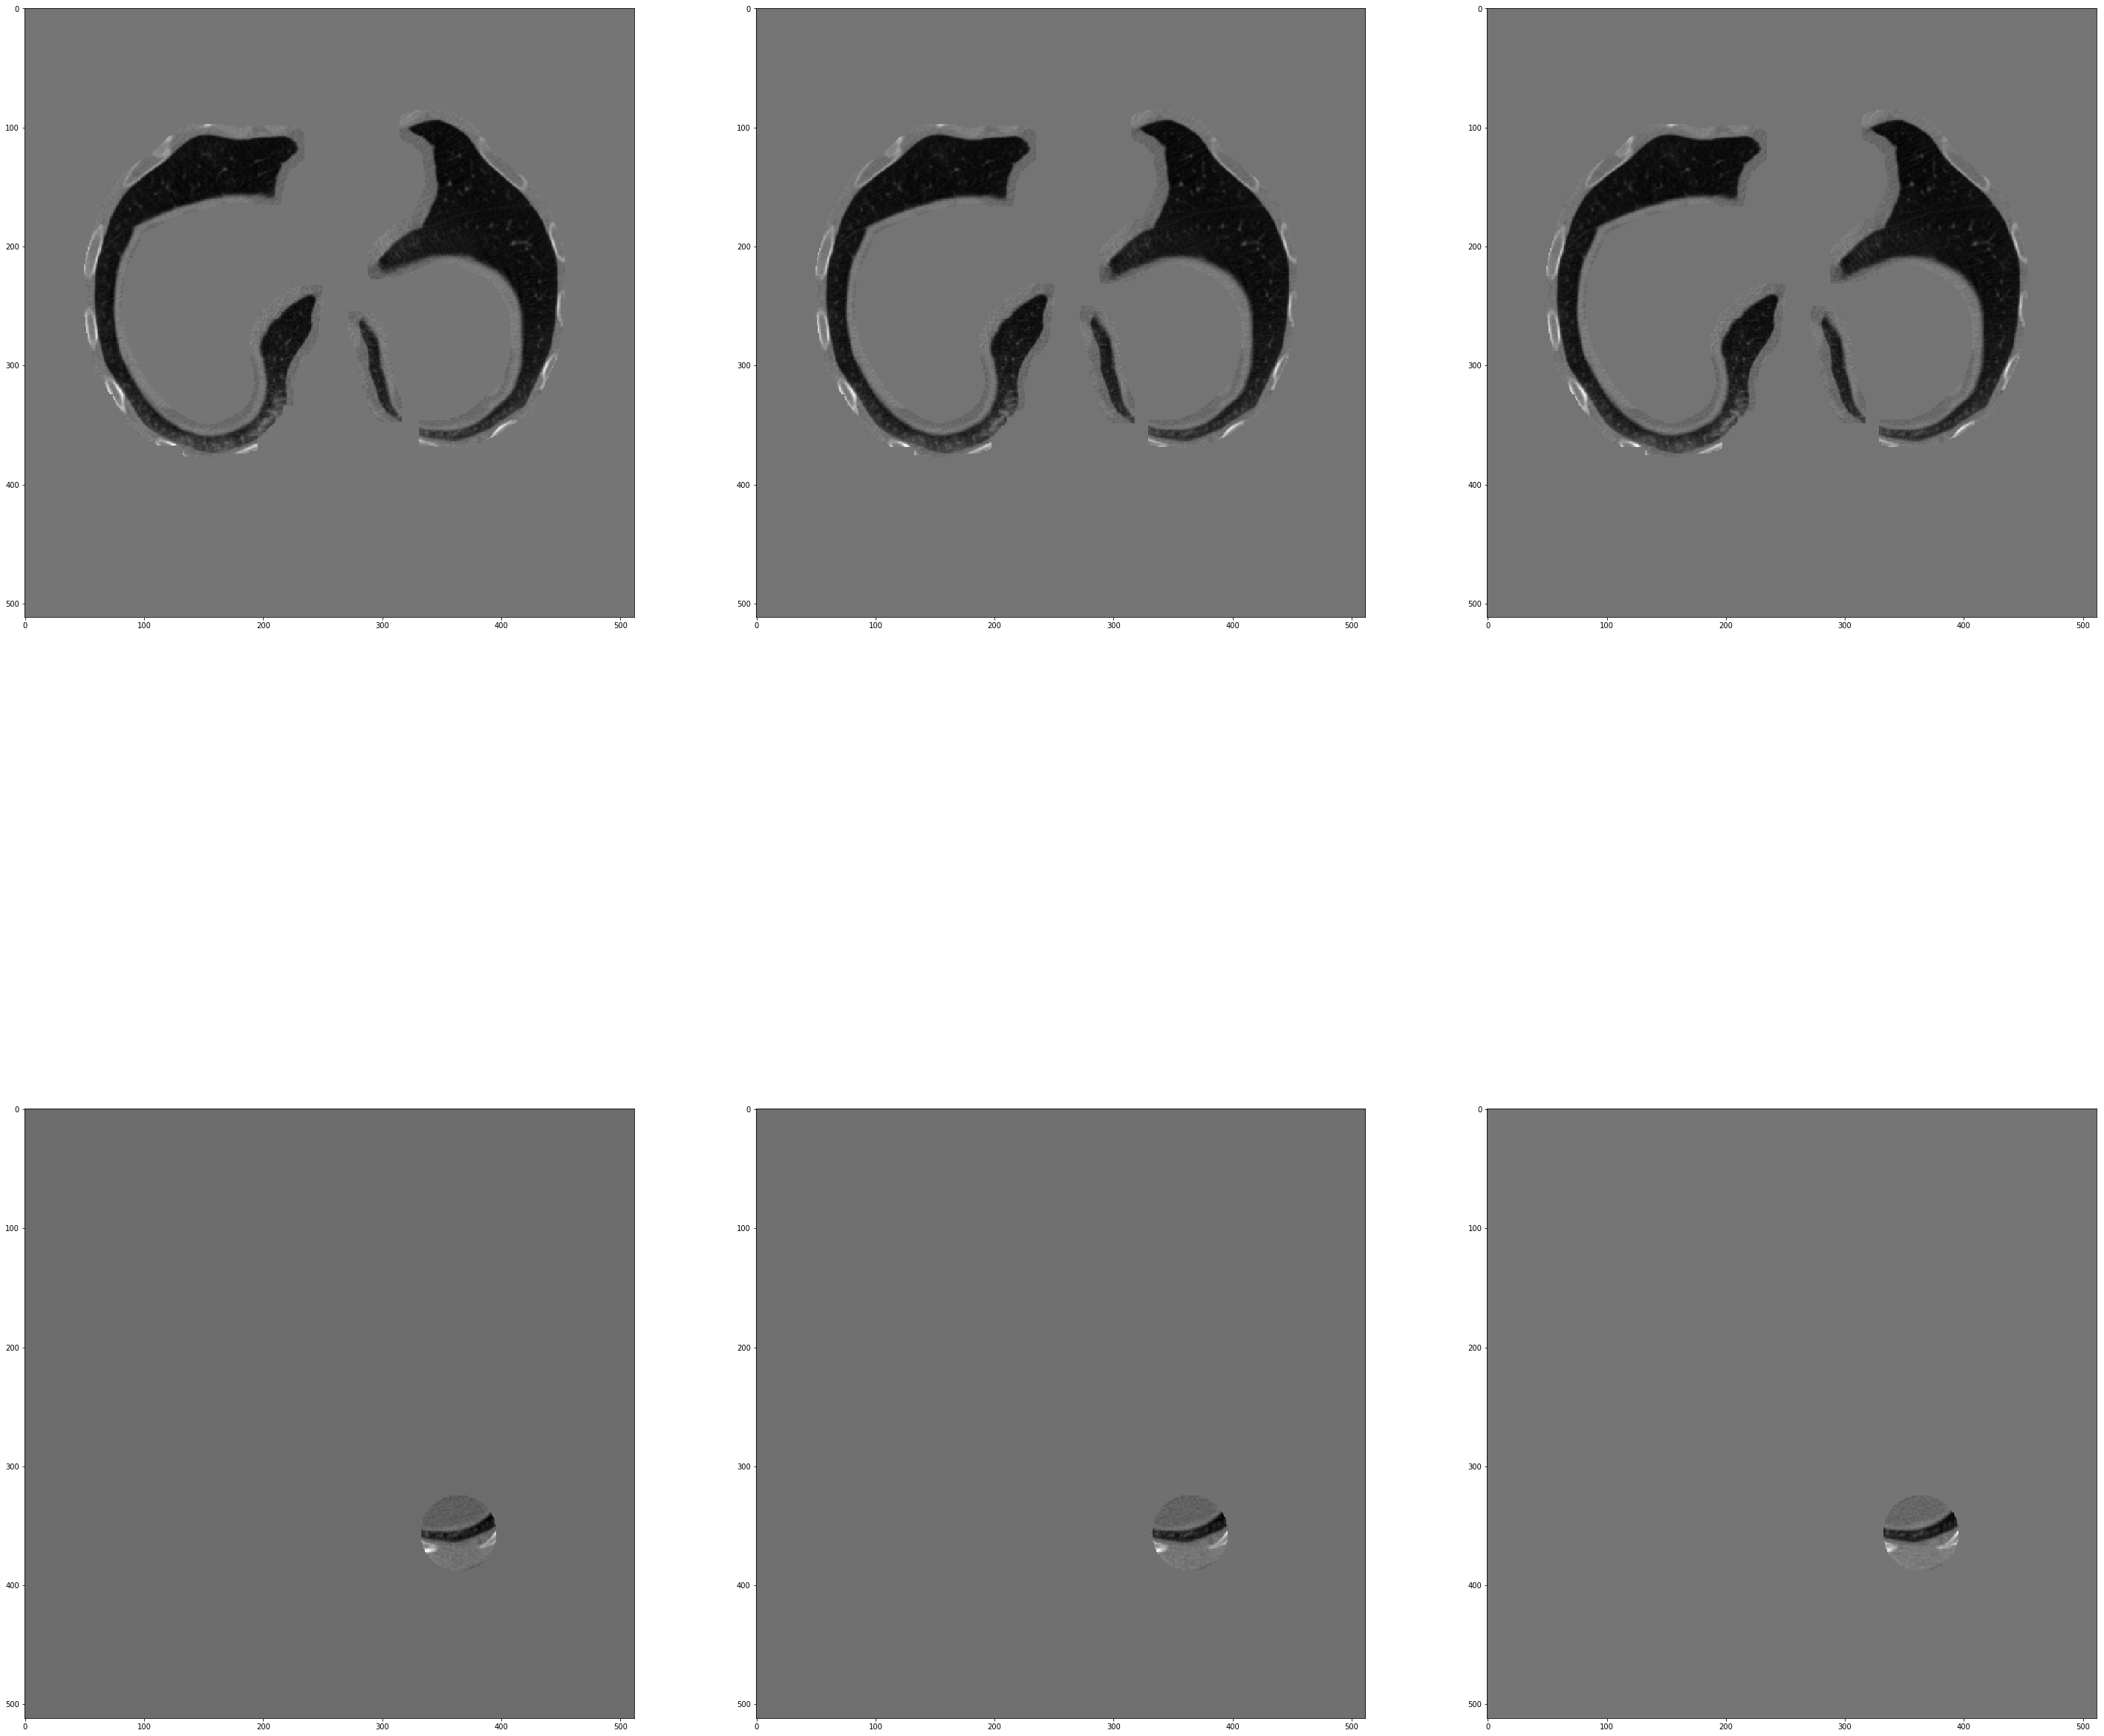

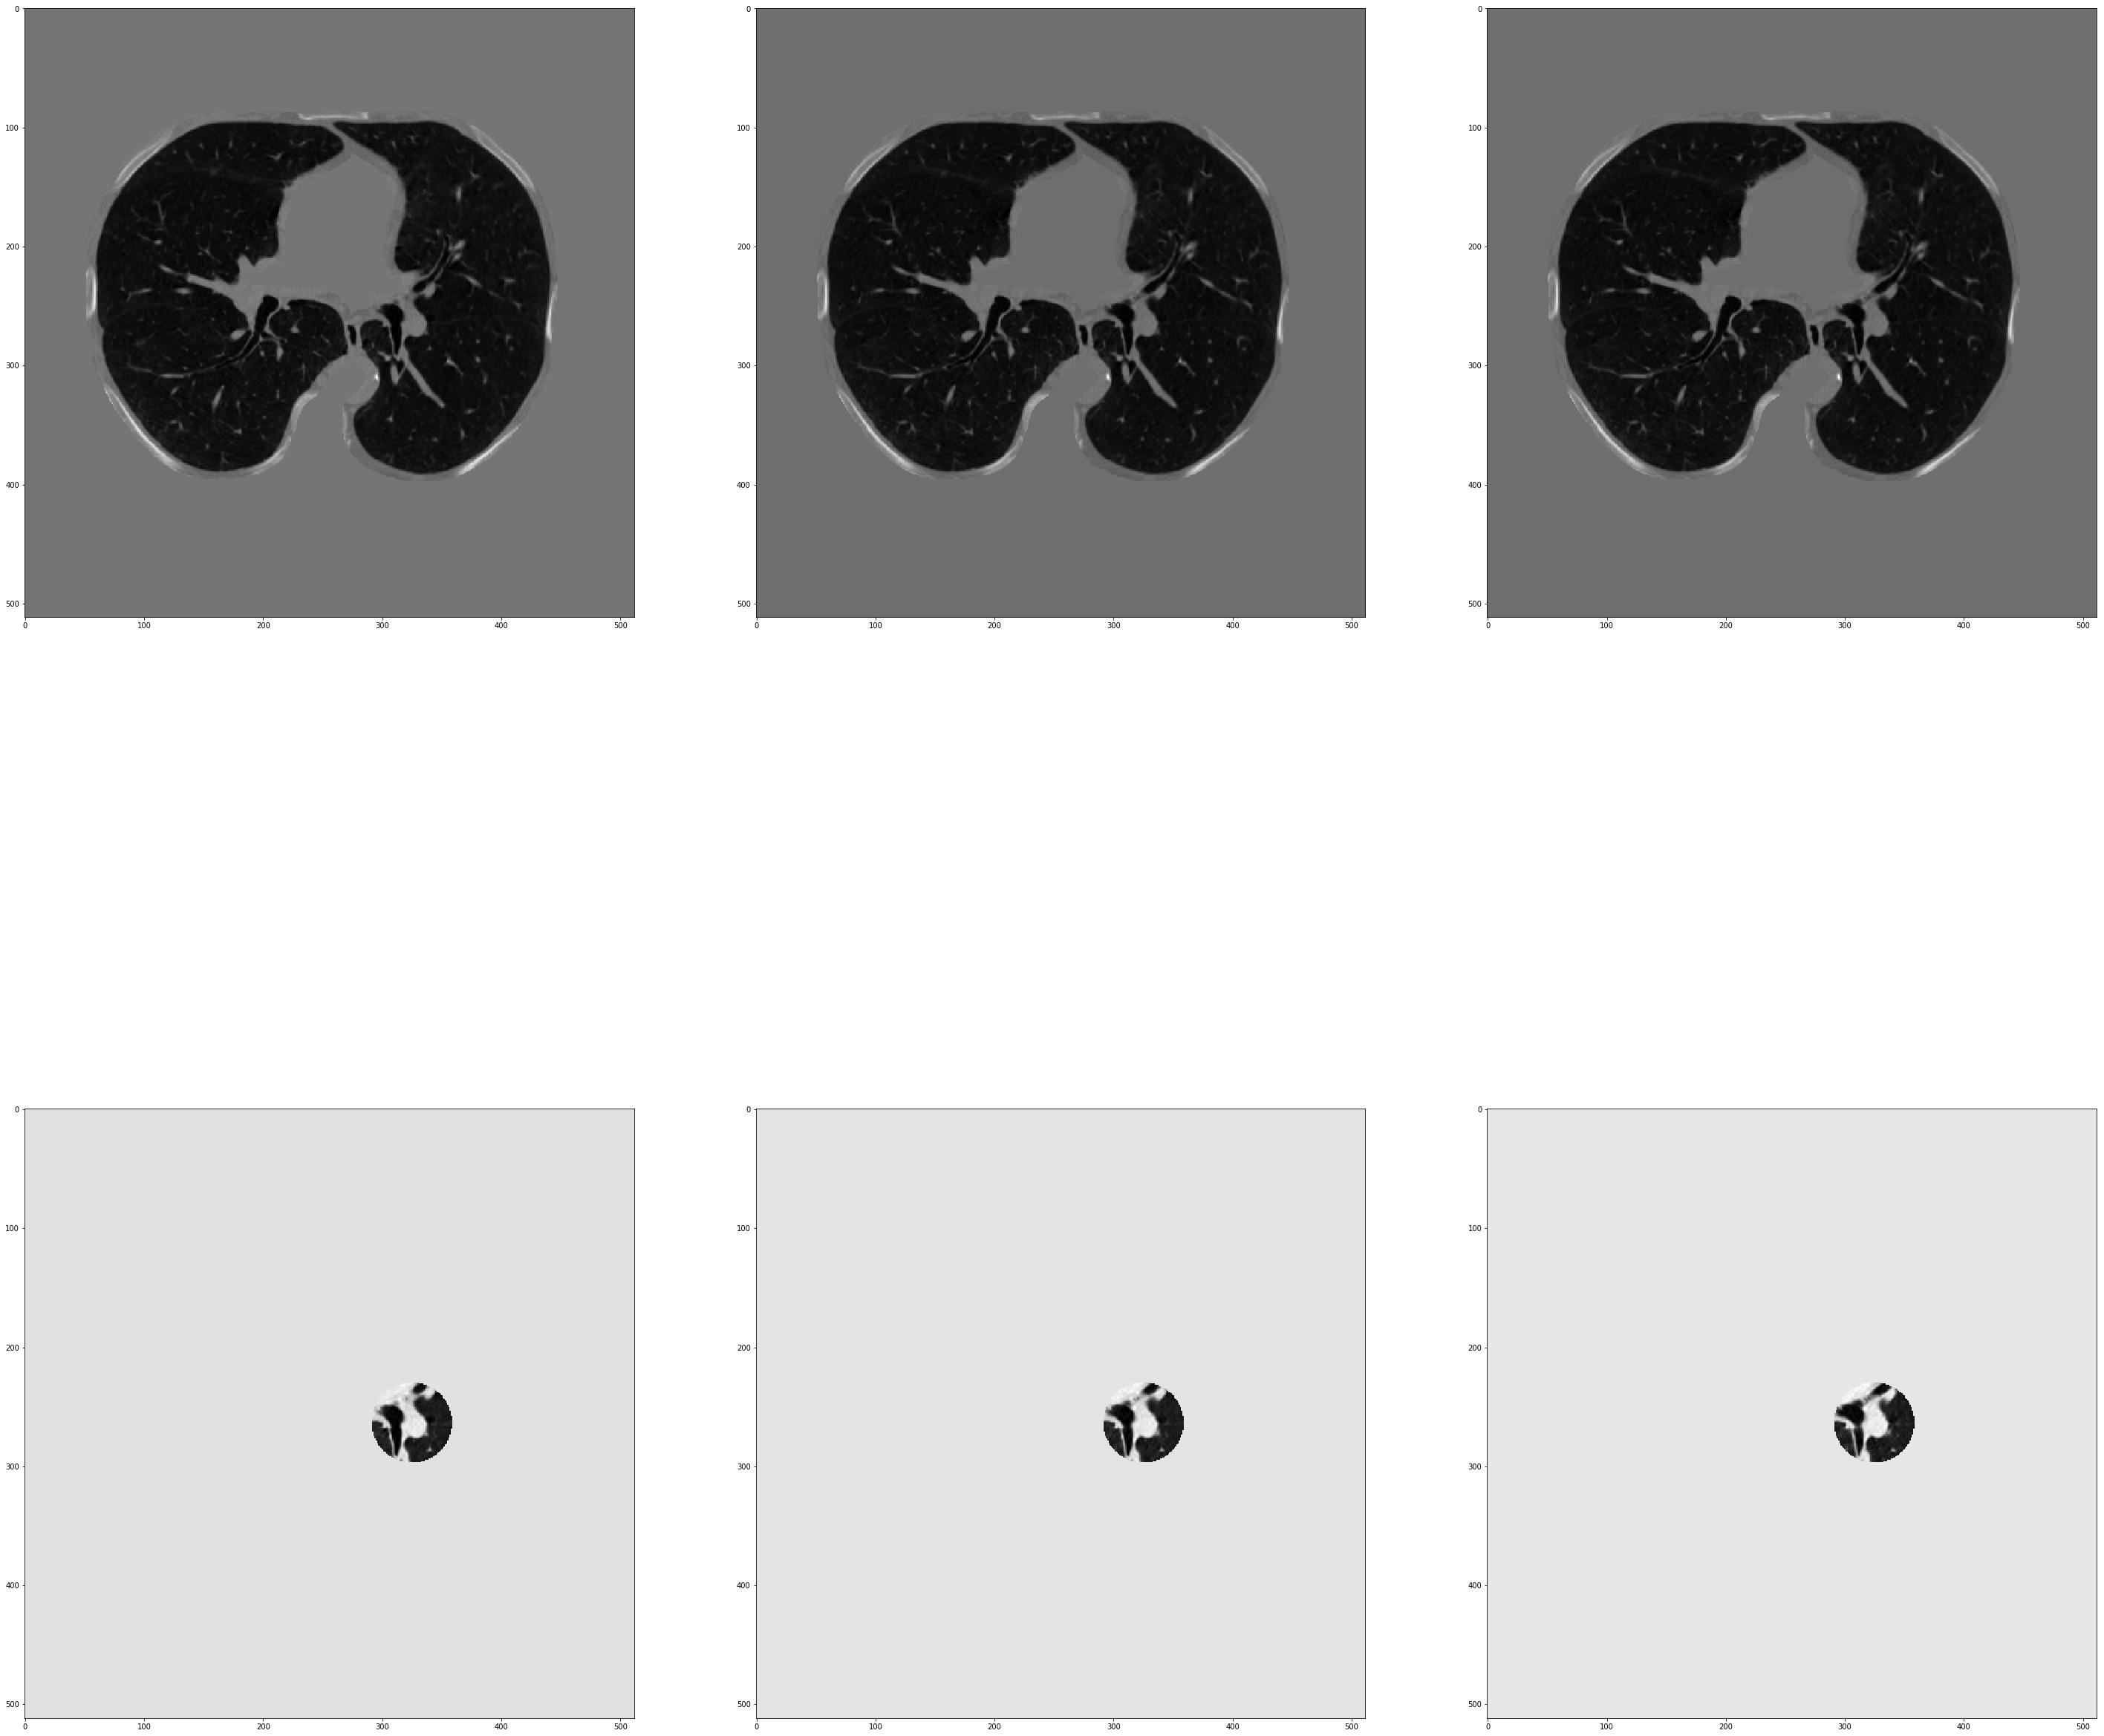

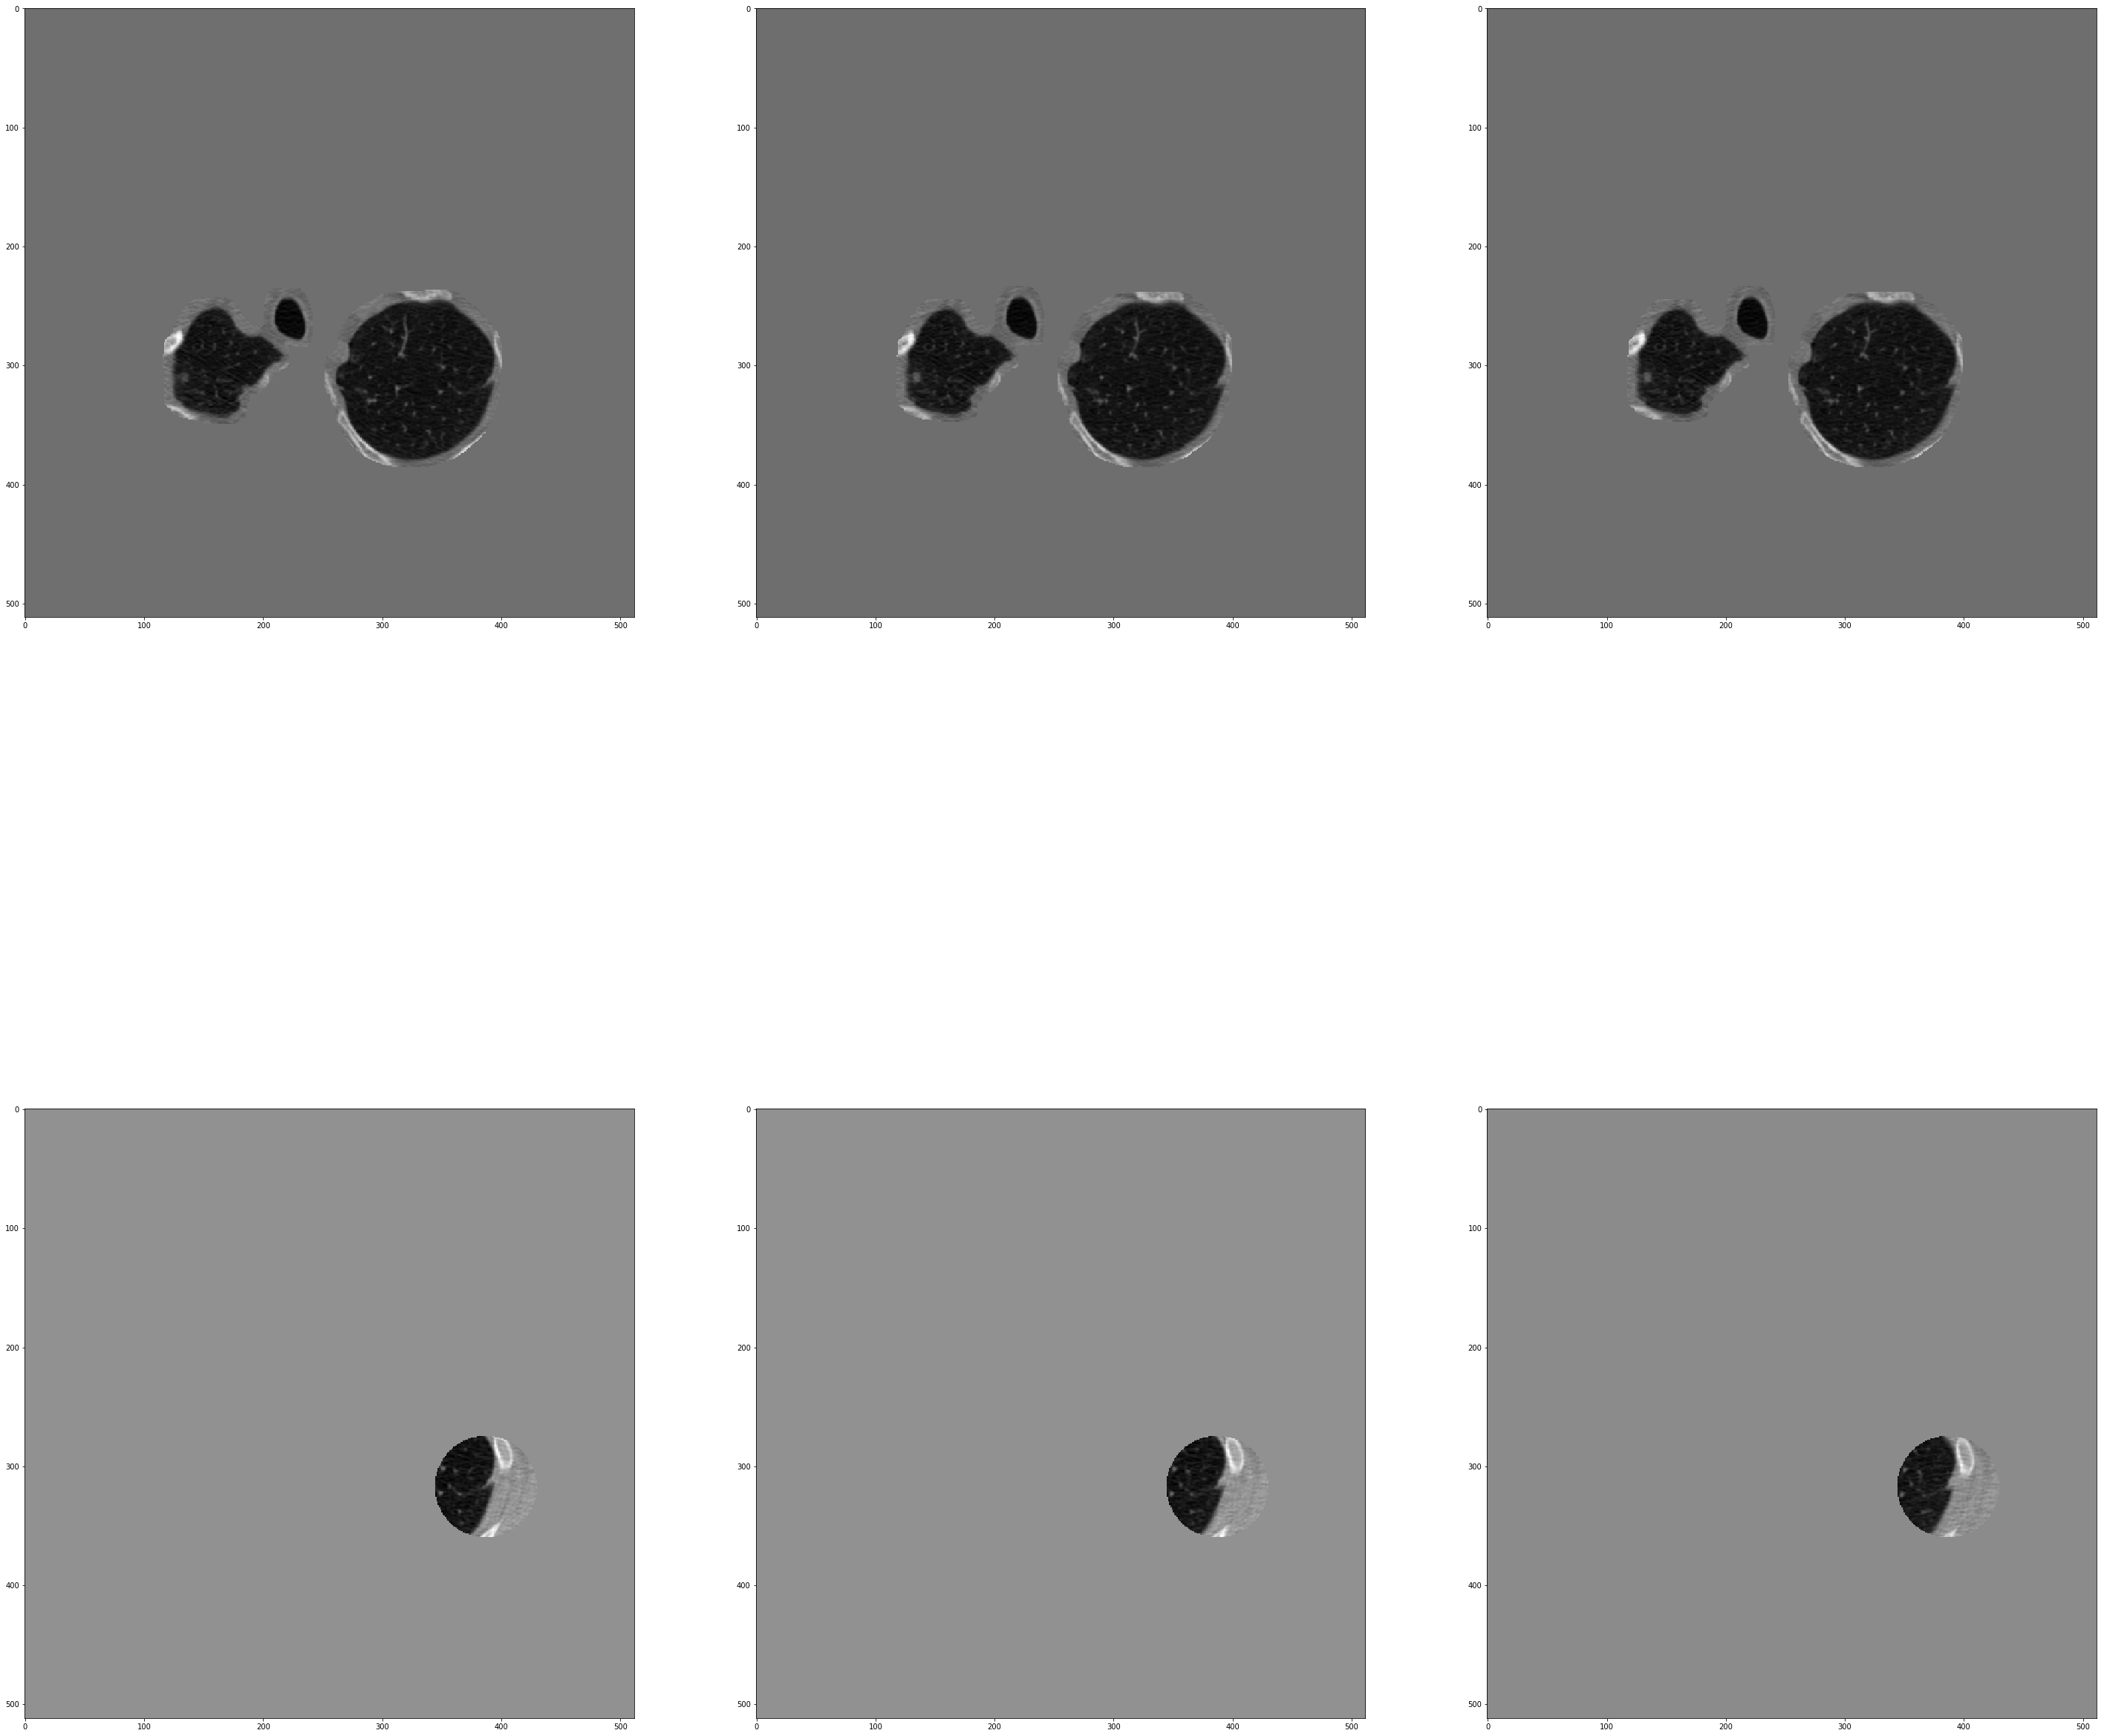

In [7]:
for ct,i in enumerate(dt):
    data=np.load(i)
    data1=np.load(i.replace("nodule","lungmask"))
    data2=np.load(i.replace("nodule","images"))
    data3=np.load(i.replace("nodule","masks"))

    fig,ax = plt.subplots(2,3,figsize=[50,50])
    ax[0,0].imshow(data1[0]*data2[0],cmap='gray')
    ax[0,1].imshow(data1[1]*data2[1],cmap='gray')
    ax[0,2].imshow(data1[1]*data2[1],cmap='gray') 
    ax[1,0].imshow(data3[0]*data2[0],cmap='gray')
    ax[1,1].imshow(data3[1]*data2[1],cmap='gray')
    ax[1,2].imshow(data3[2]*data2[2],cmap='gray') 
    plt.show()
    if ct==10:
        break




In [ ]:
print (len(imgs))
for i in range(len(imgs)):
    print ("image %d" % i)
    fig,ax = plt.subplots(2,2,figsize=[50,50])
    ax[0,0].imshow(imgs[i],cmap='gray')
    ax[0,1].imshow(masks[i],cmap='gray')
    ax[1,0].imshow(imgs[i]*masks[i],cmap='gray')
    ax[0,1].imshow(n,cmap='gray')    
    plt.show()

In [107]:
data=np.load("/home/atul/major/data_process/pos_0375_0301.npy")

In [108]:
data

array([[   0, -137],
       [   0, -288]])